In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.models import load_model

import os

In [2]:
save_path = ('figures/1a2')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_CLASSES = 3

no_folds = 5

l_r = 0.01
epochs = 1000


batch_sizes = [4,4,4,4,4,8,8,8,8,8,16,16,16,16,16,32,32,32,32,32,64,64,64,64,64]
num_neurons = 10
seed = 10


np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
batch_time = []
paras = [[0,0,0,0]]

In [6]:
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')

X, Y = train_input[1:, :21], train_input[1:,-1].astype(int)

X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
Y = Y-1

no_data = len(X)

idx = np.arange(no_data)
np.random.shuffle(idx)

trainX, trainY= X[idx],Y[idx]

In [7]:
class time_for_batch(Callback):
    def __init__(self, logs={}):
        self.times=[]
    def on_train_batch_begin(self, batch, logs={}):
        self.starttime = time.time()
    def on_train_batch_end(self, batch, logs={}):
        self.times.append(time.time()-self.starttime)

tb = time_for_batch()

In [8]:
class time_for_epoch(Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
te = time_for_epoch()

In [9]:
testX = trainX[-638:]
testY = trainY[-638:]

trainX = trainX[:1488]
trainY = trainY[:1488]


no_data = len(trainX)
print(no_data)

1488


In [10]:
nf = no_data//no_folds

Epoch 1/1000
298/298 - 0s - loss: 0.7164 - accuracy: 0.7557 - val_loss: 0.6235 - val_accuracy: 0.7946
Epoch 2/1000
298/298 - 0s - loss: 0.6464 - accuracy: 0.7708 - val_loss: 0.5863 - val_accuracy: 0.7946
Epoch 3/1000
298/298 - 0s - loss: 0.6072 - accuracy: 0.7708 - val_loss: 0.5510 - val_accuracy: 0.7946
Epoch 4/1000
298/298 - 0s - loss: 0.5686 - accuracy: 0.7708 - val_loss: 0.5175 - val_accuracy: 0.7980
Epoch 5/1000
298/298 - 0s - loss: 0.5339 - accuracy: 0.7851 - val_loss: 0.4865 - val_accuracy: 0.8047
Epoch 6/1000
298/298 - 0s - loss: 0.5004 - accuracy: 0.7918 - val_loss: 0.4628 - val_accuracy: 0.8249
Epoch 7/1000
298/298 - 0s - loss: 0.4723 - accuracy: 0.8018 - val_loss: 0.4372 - val_accuracy: 0.8283
Epoch 8/1000
298/298 - 0s - loss: 0.4461 - accuracy: 0.8195 - val_loss: 0.4128 - val_accuracy: 0.8182
Epoch 9/1000
298/298 - 0s - loss: 0.4255 - accuracy: 0.8279 - val_loss: 0.3926 - val_accuracy: 0.8418
Epoch 10/1000
298/298 - 0s - loss: 0.4056 - accuracy: 0.8354 - val_loss: 0.3757 - 

Epoch 81/1000
298/298 - 0s - loss: 0.2453 - accuracy: 0.9001 - val_loss: 0.2407 - val_accuracy: 0.8956
Epoch 82/1000
298/298 - 0s - loss: 0.2438 - accuracy: 0.8892 - val_loss: 0.2411 - val_accuracy: 0.8990
Epoch 83/1000
298/298 - 0s - loss: 0.2437 - accuracy: 0.8976 - val_loss: 0.2550 - val_accuracy: 0.8956
Epoch 84/1000
298/298 - 0s - loss: 0.2444 - accuracy: 0.8967 - val_loss: 0.2444 - val_accuracy: 0.9024
Epoch 85/1000
298/298 - 0s - loss: 0.2416 - accuracy: 0.8925 - val_loss: 0.2460 - val_accuracy: 0.8990
Epoch 86/1000
298/298 - 0s - loss: 0.2427 - accuracy: 0.8976 - val_loss: 0.2518 - val_accuracy: 0.8956
Epoch 87/1000
298/298 - 0s - loss: 0.2447 - accuracy: 0.8959 - val_loss: 0.2393 - val_accuracy: 0.8990
Epoch 88/1000
298/298 - 0s - loss: 0.2419 - accuracy: 0.8959 - val_loss: 0.2422 - val_accuracy: 0.9024
Epoch 89/1000
298/298 - 0s - loss: 0.2434 - accuracy: 0.8976 - val_loss: 0.2434 - val_accuracy: 0.9024
Epoch 90/1000
298/298 - 0s - loss: 0.2441 - accuracy: 0.8984 - val_loss: 

Epoch 160/1000
298/298 - 0s - loss: 0.2327 - accuracy: 0.9001 - val_loss: 0.2485 - val_accuracy: 0.8889
Epoch 161/1000
298/298 - 0s - loss: 0.2323 - accuracy: 0.9026 - val_loss: 0.2541 - val_accuracy: 0.9091
Epoch 162/1000
298/298 - 0s - loss: 0.2313 - accuracy: 0.9009 - val_loss: 0.2412 - val_accuracy: 0.9057
Epoch 163/1000
298/298 - 0s - loss: 0.2319 - accuracy: 0.9068 - val_loss: 0.2379 - val_accuracy: 0.9024
Epoch 164/1000
298/298 - 0s - loss: 0.2313 - accuracy: 0.8992 - val_loss: 0.2399 - val_accuracy: 0.8990
Epoch 165/1000
298/298 - 0s - loss: 0.2302 - accuracy: 0.9026 - val_loss: 0.2533 - val_accuracy: 0.8923
Epoch 166/1000
298/298 - 0s - loss: 0.2286 - accuracy: 0.9026 - val_loss: 0.2345 - val_accuracy: 0.8990
Epoch 167/1000
298/298 - 0s - loss: 0.2306 - accuracy: 0.8992 - val_loss: 0.2362 - val_accuracy: 0.8990
Epoch 168/1000
298/298 - 0s - loss: 0.2312 - accuracy: 0.9001 - val_loss: 0.2397 - val_accuracy: 0.8990
Epoch 169/1000
298/298 - 0s - loss: 0.2304 - accuracy: 0.8959 - 

Epoch 239/1000
298/298 - 0s - loss: 0.2181 - accuracy: 0.9076 - val_loss: 0.2391 - val_accuracy: 0.8923
Epoch 240/1000
298/298 - 0s - loss: 0.2168 - accuracy: 0.9085 - val_loss: 0.2585 - val_accuracy: 0.9158
Epoch 241/1000
298/298 - 0s - loss: 0.2203 - accuracy: 0.9034 - val_loss: 0.2426 - val_accuracy: 0.9192
Epoch 242/1000
298/298 - 0s - loss: 0.2188 - accuracy: 0.9026 - val_loss: 0.2395 - val_accuracy: 0.8923
Epoch 243/1000
298/298 - 0s - loss: 0.2206 - accuracy: 0.9085 - val_loss: 0.2344 - val_accuracy: 0.8956
Epoch 244/1000
298/298 - 0s - loss: 0.2208 - accuracy: 0.9060 - val_loss: 0.2389 - val_accuracy: 0.8956
Epoch 245/1000
298/298 - 0s - loss: 0.2162 - accuracy: 0.9051 - val_loss: 0.2430 - val_accuracy: 0.9057
Epoch 246/1000
298/298 - 0s - loss: 0.2194 - accuracy: 0.9043 - val_loss: 0.2466 - val_accuracy: 0.8956
Epoch 247/1000
298/298 - 0s - loss: 0.2175 - accuracy: 0.9076 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 248/1000
298/298 - 0s - loss: 0.2181 - accuracy: 0.9085 - 

Epoch 318/1000
298/298 - 0s - loss: 0.2048 - accuracy: 0.9102 - val_loss: 0.2365 - val_accuracy: 0.8923
Epoch 319/1000
298/298 - 0s - loss: 0.2086 - accuracy: 0.9051 - val_loss: 0.2453 - val_accuracy: 0.9192
Epoch 320/1000
298/298 - 0s - loss: 0.2093 - accuracy: 0.9102 - val_loss: 0.2447 - val_accuracy: 0.8990
Epoch 321/1000
298/298 - 0s - loss: 0.2072 - accuracy: 0.9110 - val_loss: 0.2489 - val_accuracy: 0.8990
Epoch 322/1000
298/298 - 0s - loss: 0.2077 - accuracy: 0.9102 - val_loss: 0.2392 - val_accuracy: 0.9024
Epoch 323/1000
298/298 - 0s - loss: 0.2065 - accuracy: 0.9076 - val_loss: 0.2406 - val_accuracy: 0.8923
Epoch 324/1000
298/298 - 0s - loss: 0.2099 - accuracy: 0.9076 - val_loss: 0.2385 - val_accuracy: 0.9024
Epoch 325/1000
298/298 - 0s - loss: 0.2084 - accuracy: 0.9085 - val_loss: 0.2459 - val_accuracy: 0.8956
Epoch 326/1000
298/298 - 0s - loss: 0.2105 - accuracy: 0.9051 - val_loss: 0.2390 - val_accuracy: 0.8990
Epoch 327/1000
298/298 - 0s - loss: 0.2073 - accuracy: 0.9043 - 

Epoch 397/1000
298/298 - 0s - loss: 0.1996 - accuracy: 0.9160 - val_loss: 0.2465 - val_accuracy: 0.9158
Epoch 398/1000
298/298 - 0s - loss: 0.2037 - accuracy: 0.9169 - val_loss: 0.2384 - val_accuracy: 0.8990
Epoch 399/1000
298/298 - 0s - loss: 0.2035 - accuracy: 0.9135 - val_loss: 0.2346 - val_accuracy: 0.8923
Epoch 400/1000
298/298 - 0s - loss: 0.1987 - accuracy: 0.9127 - val_loss: 0.2418 - val_accuracy: 0.9024
Epoch 401/1000
298/298 - 0s - loss: 0.2022 - accuracy: 0.9068 - val_loss: 0.2323 - val_accuracy: 0.8990
Epoch 402/1000
298/298 - 0s - loss: 0.2025 - accuracy: 0.9160 - val_loss: 0.2350 - val_accuracy: 0.8990
Epoch 403/1000
298/298 - 0s - loss: 0.2018 - accuracy: 0.9144 - val_loss: 0.2330 - val_accuracy: 0.8956
Epoch 404/1000
298/298 - 0s - loss: 0.1993 - accuracy: 0.9177 - val_loss: 0.2359 - val_accuracy: 0.9024
Epoch 405/1000
298/298 - 0s - loss: 0.2008 - accuracy: 0.9076 - val_loss: 0.2394 - val_accuracy: 0.9024
Epoch 406/1000
298/298 - 0s - loss: 0.2006 - accuracy: 0.9160 - 

Epoch 476/1000
298/298 - 0s - loss: 0.1930 - accuracy: 0.9202 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 477/1000
298/298 - 0s - loss: 0.1953 - accuracy: 0.9169 - val_loss: 0.2437 - val_accuracy: 0.9024
Epoch 478/1000
298/298 - 0s - loss: 0.1960 - accuracy: 0.9194 - val_loss: 0.2370 - val_accuracy: 0.9024
Epoch 479/1000
298/298 - 0s - loss: 0.1981 - accuracy: 0.9110 - val_loss: 0.2359 - val_accuracy: 0.8990
Epoch 480/1000
298/298 - 0s - loss: 0.1951 - accuracy: 0.9144 - val_loss: 0.2323 - val_accuracy: 0.8990
Epoch 481/1000
298/298 - 0s - loss: 0.1922 - accuracy: 0.9211 - val_loss: 0.2437 - val_accuracy: 0.9125
Epoch 482/1000
298/298 - 0s - loss: 0.1974 - accuracy: 0.9160 - val_loss: 0.2346 - val_accuracy: 0.9024
Epoch 483/1000
298/298 - 0s - loss: 0.1919 - accuracy: 0.9102 - val_loss: 0.2360 - val_accuracy: 0.8990
Epoch 484/1000
298/298 - 0s - loss: 0.1944 - accuracy: 0.9169 - val_loss: 0.2409 - val_accuracy: 0.9091
Epoch 485/1000
298/298 - 0s - loss: 0.1971 - accuracy: 0.9177 - 

Epoch 555/1000
298/298 - 0s - loss: 0.1888 - accuracy: 0.9202 - val_loss: 0.2354 - val_accuracy: 0.8956
Epoch 556/1000
298/298 - 0s - loss: 0.1923 - accuracy: 0.9219 - val_loss: 0.2411 - val_accuracy: 0.9057
Epoch 557/1000
298/298 - 0s - loss: 0.1925 - accuracy: 0.9194 - val_loss: 0.2340 - val_accuracy: 0.9024
Epoch 558/1000
298/298 - 0s - loss: 0.1927 - accuracy: 0.9144 - val_loss: 0.2434 - val_accuracy: 0.9125
Epoch 559/1000
298/298 - 0s - loss: 0.1937 - accuracy: 0.9144 - val_loss: 0.2317 - val_accuracy: 0.9024
Epoch 560/1000
298/298 - 0s - loss: 0.1904 - accuracy: 0.9169 - val_loss: 0.2334 - val_accuracy: 0.8990
Epoch 561/1000
298/298 - 0s - loss: 0.1920 - accuracy: 0.9102 - val_loss: 0.2337 - val_accuracy: 0.8990
Epoch 562/1000
298/298 - 0s - loss: 0.1937 - accuracy: 0.9211 - val_loss: 0.2338 - val_accuracy: 0.9057
Epoch 563/1000
298/298 - 0s - loss: 0.1918 - accuracy: 0.9236 - val_loss: 0.2352 - val_accuracy: 0.8990
Epoch 564/1000
298/298 - 0s - loss: 0.1933 - accuracy: 0.9194 - 

Epoch 634/1000
298/298 - 0s - loss: 0.1899 - accuracy: 0.9228 - val_loss: 0.2322 - val_accuracy: 0.9024
Epoch 635/1000
298/298 - 0s - loss: 0.1881 - accuracy: 0.9219 - val_loss: 0.2451 - val_accuracy: 0.9057
Epoch 636/1000
298/298 - 0s - loss: 0.1923 - accuracy: 0.9194 - val_loss: 0.2387 - val_accuracy: 0.8990
Epoch 637/1000
298/298 - 0s - loss: 0.1910 - accuracy: 0.9169 - val_loss: 0.2462 - val_accuracy: 0.9091
Epoch 638/1000
298/298 - 0s - loss: 0.1861 - accuracy: 0.9177 - val_loss: 0.2436 - val_accuracy: 0.9024
Epoch 639/1000
298/298 - 0s - loss: 0.1881 - accuracy: 0.9244 - val_loss: 0.2444 - val_accuracy: 0.9057
Epoch 640/1000
298/298 - 0s - loss: 0.1900 - accuracy: 0.9177 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 641/1000
298/298 - 0s - loss: 0.1881 - accuracy: 0.9236 - val_loss: 0.2307 - val_accuracy: 0.9057
Epoch 642/1000
298/298 - 0s - loss: 0.1895 - accuracy: 0.9211 - val_loss: 0.2343 - val_accuracy: 0.9024
Epoch 643/1000
298/298 - 0s - loss: 0.1877 - accuracy: 0.9261 - 

Epoch 713/1000
298/298 - 0s - loss: 0.1869 - accuracy: 0.9295 - val_loss: 0.2333 - val_accuracy: 0.8956
Epoch 714/1000
298/298 - 0s - loss: 0.1861 - accuracy: 0.9228 - val_loss: 0.2307 - val_accuracy: 0.9091
Epoch 715/1000
298/298 - 0s - loss: 0.1870 - accuracy: 0.9228 - val_loss: 0.2320 - val_accuracy: 0.9024
Epoch 716/1000
298/298 - 0s - loss: 0.1845 - accuracy: 0.9219 - val_loss: 0.2338 - val_accuracy: 0.9057
Epoch 717/1000
298/298 - 0s - loss: 0.1812 - accuracy: 0.9295 - val_loss: 0.2429 - val_accuracy: 0.9057
Epoch 718/1000
298/298 - 0s - loss: 0.1888 - accuracy: 0.9186 - val_loss: 0.2370 - val_accuracy: 0.9091
Epoch 719/1000
298/298 - 0s - loss: 0.1835 - accuracy: 0.9261 - val_loss: 0.2406 - val_accuracy: 0.9024
Epoch 720/1000
298/298 - 0s - loss: 0.1887 - accuracy: 0.9219 - val_loss: 0.2334 - val_accuracy: 0.9125
Epoch 721/1000
298/298 - 0s - loss: 0.1842 - accuracy: 0.9219 - val_loss: 0.2324 - val_accuracy: 0.9091
Epoch 722/1000
298/298 - 0s - loss: 0.1883 - accuracy: 0.9152 - 

Epoch 792/1000
298/298 - 0s - loss: 0.1843 - accuracy: 0.9244 - val_loss: 0.2399 - val_accuracy: 0.8990
Epoch 793/1000
298/298 - 0s - loss: 0.1849 - accuracy: 0.9202 - val_loss: 0.2368 - val_accuracy: 0.9057
Epoch 794/1000
298/298 - 0s - loss: 0.1850 - accuracy: 0.9219 - val_loss: 0.2314 - val_accuracy: 0.9024
Epoch 795/1000
298/298 - 0s - loss: 0.1863 - accuracy: 0.9219 - val_loss: 0.2303 - val_accuracy: 0.9091
Epoch 796/1000
298/298 - 0s - loss: 0.1859 - accuracy: 0.9194 - val_loss: 0.2392 - val_accuracy: 0.9091
Epoch 797/1000
298/298 - 0s - loss: 0.1820 - accuracy: 0.9186 - val_loss: 0.2316 - val_accuracy: 0.8990
Epoch 798/1000
298/298 - 0s - loss: 0.1850 - accuracy: 0.9303 - val_loss: 0.2385 - val_accuracy: 0.9091
Epoch 799/1000
298/298 - 0s - loss: 0.1828 - accuracy: 0.9236 - val_loss: 0.2504 - val_accuracy: 0.9024
Epoch 800/1000
298/298 - 0s - loss: 0.1827 - accuracy: 0.9261 - val_loss: 0.2328 - val_accuracy: 0.9091
Epoch 801/1000
298/298 - 0s - loss: 0.1831 - accuracy: 0.9219 - 

Epoch 871/1000
298/298 - 0s - loss: 0.1815 - accuracy: 0.9253 - val_loss: 0.2390 - val_accuracy: 0.9091
Epoch 872/1000
298/298 - 0s - loss: 0.1813 - accuracy: 0.9236 - val_loss: 0.2407 - val_accuracy: 0.9024
Epoch 873/1000
298/298 - 0s - loss: 0.1812 - accuracy: 0.9261 - val_loss: 0.2357 - val_accuracy: 0.9091
Epoch 874/1000
298/298 - 0s - loss: 0.1810 - accuracy: 0.9278 - val_loss: 0.2337 - val_accuracy: 0.9057
Epoch 875/1000
298/298 - 0s - loss: 0.1797 - accuracy: 0.9194 - val_loss: 0.2649 - val_accuracy: 0.9024
Epoch 876/1000
298/298 - 0s - loss: 0.1831 - accuracy: 0.9244 - val_loss: 0.2358 - val_accuracy: 0.9057
Epoch 877/1000
298/298 - 0s - loss: 0.1828 - accuracy: 0.9194 - val_loss: 0.2441 - val_accuracy: 0.8990
Epoch 878/1000
298/298 - 0s - loss: 0.1818 - accuracy: 0.9253 - val_loss: 0.2470 - val_accuracy: 0.8956
Epoch 879/1000
298/298 - 0s - loss: 0.1801 - accuracy: 0.9236 - val_loss: 0.2427 - val_accuracy: 0.9091
Epoch 880/1000
298/298 - 0s - loss: 0.1827 - accuracy: 0.9236 - 

Epoch 950/1000
298/298 - 0s - loss: 0.1797 - accuracy: 0.9219 - val_loss: 0.2352 - val_accuracy: 0.9024
Epoch 951/1000
298/298 - 0s - loss: 0.1765 - accuracy: 0.9236 - val_loss: 0.2458 - val_accuracy: 0.9024
Epoch 952/1000
298/298 - 0s - loss: 0.1792 - accuracy: 0.9278 - val_loss: 0.2610 - val_accuracy: 0.9024
Epoch 953/1000
298/298 - 0s - loss: 0.1809 - accuracy: 0.9236 - val_loss: 0.2339 - val_accuracy: 0.8990
Epoch 954/1000
298/298 - 0s - loss: 0.1751 - accuracy: 0.9278 - val_loss: 0.2406 - val_accuracy: 0.9024
Epoch 955/1000
298/298 - 0s - loss: 0.1817 - accuracy: 0.9270 - val_loss: 0.2351 - val_accuracy: 0.9024
Epoch 956/1000
298/298 - 0s - loss: 0.1759 - accuracy: 0.9278 - val_loss: 0.2344 - val_accuracy: 0.9024
Epoch 957/1000
298/298 - 0s - loss: 0.1761 - accuracy: 0.9244 - val_loss: 0.2347 - val_accuracy: 0.9091
Epoch 958/1000
298/298 - 0s - loss: 0.1774 - accuracy: 0.9194 - val_loss: 0.2381 - val_accuracy: 0.9091
Epoch 959/1000
298/298 - 0s - loss: 0.1784 - accuracy: 0.9236 - 

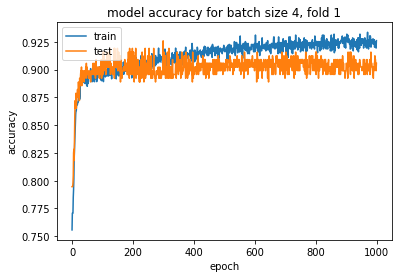

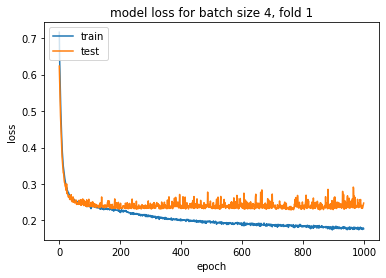

Epoch 1/1000
298/298 - 0s - loss: 0.7559 - accuracy: 0.7229 - val_loss: 0.6450 - val_accuracy: 0.7576
Epoch 2/1000
298/298 - 0s - loss: 0.6026 - accuracy: 0.7800 - val_loss: 0.5980 - val_accuracy: 0.7576
Epoch 3/1000
298/298 - 0s - loss: 0.5675 - accuracy: 0.7800 - val_loss: 0.5556 - val_accuracy: 0.7576
Epoch 4/1000
298/298 - 0s - loss: 0.5348 - accuracy: 0.7809 - val_loss: 0.5158 - val_accuracy: 0.7576
Epoch 5/1000
298/298 - 0s - loss: 0.5026 - accuracy: 0.7867 - val_loss: 0.4780 - val_accuracy: 0.7811
Epoch 6/1000
298/298 - 0s - loss: 0.4717 - accuracy: 0.7968 - val_loss: 0.4490 - val_accuracy: 0.8249
Epoch 7/1000
298/298 - 0s - loss: 0.4456 - accuracy: 0.8170 - val_loss: 0.4176 - val_accuracy: 0.8350
Epoch 8/1000
298/298 - 0s - loss: 0.4217 - accuracy: 0.8237 - val_loss: 0.3925 - val_accuracy: 0.8283
Epoch 9/1000
298/298 - 0s - loss: 0.4035 - accuracy: 0.8296 - val_loss: 0.3751 - val_accuracy: 0.8586
Epoch 10/1000
298/298 - 0s - loss: 0.3861 - accuracy: 0.8413 - val_loss: 0.3568 - 

Epoch 81/1000
298/298 - 0s - loss: 0.2326 - accuracy: 0.9009 - val_loss: 0.2626 - val_accuracy: 0.8923
Epoch 82/1000
298/298 - 0s - loss: 0.2317 - accuracy: 0.8984 - val_loss: 0.2525 - val_accuracy: 0.9024
Epoch 83/1000
298/298 - 0s - loss: 0.2315 - accuracy: 0.9051 - val_loss: 0.2490 - val_accuracy: 0.9024
Epoch 84/1000
298/298 - 0s - loss: 0.2301 - accuracy: 0.8976 - val_loss: 0.2522 - val_accuracy: 0.8923
Epoch 85/1000
298/298 - 0s - loss: 0.2271 - accuracy: 0.9009 - val_loss: 0.2476 - val_accuracy: 0.8956
Epoch 86/1000
298/298 - 0s - loss: 0.2306 - accuracy: 0.8984 - val_loss: 0.2451 - val_accuracy: 0.9024
Epoch 87/1000
298/298 - 0s - loss: 0.2303 - accuracy: 0.9001 - val_loss: 0.2576 - val_accuracy: 0.8889
Epoch 88/1000
298/298 - 0s - loss: 0.2268 - accuracy: 0.9034 - val_loss: 0.2565 - val_accuracy: 0.8956
Epoch 89/1000
298/298 - 0s - loss: 0.2283 - accuracy: 0.9026 - val_loss: 0.2548 - val_accuracy: 0.8923
Epoch 90/1000
298/298 - 0s - loss: 0.2286 - accuracy: 0.9001 - val_loss: 

Epoch 160/1000
298/298 - 0s - loss: 0.2117 - accuracy: 0.9026 - val_loss: 0.2445 - val_accuracy: 0.8990
Epoch 161/1000
298/298 - 0s - loss: 0.2087 - accuracy: 0.9118 - val_loss: 0.2553 - val_accuracy: 0.8923
Epoch 162/1000
298/298 - 0s - loss: 0.2088 - accuracy: 0.9076 - val_loss: 0.2432 - val_accuracy: 0.9024
Epoch 163/1000
298/298 - 0s - loss: 0.2090 - accuracy: 0.9068 - val_loss: 0.2431 - val_accuracy: 0.8990
Epoch 164/1000
298/298 - 0s - loss: 0.2114 - accuracy: 0.9043 - val_loss: 0.2426 - val_accuracy: 0.9057
Epoch 165/1000
298/298 - 0s - loss: 0.2071 - accuracy: 0.9110 - val_loss: 0.2546 - val_accuracy: 0.8822
Epoch 166/1000
298/298 - 0s - loss: 0.2062 - accuracy: 0.9076 - val_loss: 0.2568 - val_accuracy: 0.8923
Epoch 167/1000
298/298 - 0s - loss: 0.2074 - accuracy: 0.9152 - val_loss: 0.2505 - val_accuracy: 0.8923
Epoch 168/1000
298/298 - 0s - loss: 0.2079 - accuracy: 0.9076 - val_loss: 0.2371 - val_accuracy: 0.9091
Epoch 169/1000
298/298 - 0s - loss: 0.2090 - accuracy: 0.9093 - 

Epoch 239/1000
298/298 - 0s - loss: 0.1946 - accuracy: 0.9152 - val_loss: 0.2336 - val_accuracy: 0.9091
Epoch 240/1000
298/298 - 0s - loss: 0.1946 - accuracy: 0.9160 - val_loss: 0.2530 - val_accuracy: 0.8889
Epoch 241/1000
298/298 - 0s - loss: 0.1966 - accuracy: 0.9118 - val_loss: 0.2453 - val_accuracy: 0.8990
Epoch 242/1000
298/298 - 0s - loss: 0.1934 - accuracy: 0.9118 - val_loss: 0.2275 - val_accuracy: 0.9293
Epoch 243/1000
298/298 - 0s - loss: 0.1969 - accuracy: 0.9118 - val_loss: 0.2417 - val_accuracy: 0.9024
Epoch 244/1000
298/298 - 0s - loss: 0.1983 - accuracy: 0.9127 - val_loss: 0.2408 - val_accuracy: 0.9091
Epoch 245/1000
298/298 - 0s - loss: 0.1928 - accuracy: 0.9186 - val_loss: 0.2312 - val_accuracy: 0.9192
Epoch 246/1000
298/298 - 0s - loss: 0.1967 - accuracy: 0.9135 - val_loss: 0.2432 - val_accuracy: 0.9057
Epoch 247/1000
298/298 - 0s - loss: 0.1934 - accuracy: 0.9127 - val_loss: 0.2641 - val_accuracy: 0.8956
Epoch 248/1000
298/298 - 0s - loss: 0.1949 - accuracy: 0.9118 - 

Epoch 318/1000
298/298 - 0s - loss: 0.1860 - accuracy: 0.9186 - val_loss: 0.2512 - val_accuracy: 0.8990
Epoch 319/1000
298/298 - 0s - loss: 0.1877 - accuracy: 0.9135 - val_loss: 0.2340 - val_accuracy: 0.9158
Epoch 320/1000
298/298 - 0s - loss: 0.1867 - accuracy: 0.9127 - val_loss: 0.2347 - val_accuracy: 0.9192
Epoch 321/1000
298/298 - 0s - loss: 0.1865 - accuracy: 0.9211 - val_loss: 0.2375 - val_accuracy: 0.9125
Epoch 322/1000
298/298 - 0s - loss: 0.1862 - accuracy: 0.9202 - val_loss: 0.2362 - val_accuracy: 0.9125
Epoch 323/1000
298/298 - 0s - loss: 0.1851 - accuracy: 0.9202 - val_loss: 0.2451 - val_accuracy: 0.9057
Epoch 324/1000
298/298 - 0s - loss: 0.1859 - accuracy: 0.9169 - val_loss: 0.2394 - val_accuracy: 0.9125
Epoch 325/1000
298/298 - 0s - loss: 0.1866 - accuracy: 0.9135 - val_loss: 0.2400 - val_accuracy: 0.9057
Epoch 326/1000
298/298 - 0s - loss: 0.1879 - accuracy: 0.9152 - val_loss: 0.2430 - val_accuracy: 0.9125
Epoch 327/1000
298/298 - 0s - loss: 0.1826 - accuracy: 0.9118 - 

Epoch 397/1000
298/298 - 0s - loss: 0.1786 - accuracy: 0.9219 - val_loss: 0.2347 - val_accuracy: 0.9125
Epoch 398/1000
298/298 - 0s - loss: 0.1780 - accuracy: 0.9202 - val_loss: 0.2352 - val_accuracy: 0.9158
Epoch 399/1000
298/298 - 0s - loss: 0.1807 - accuracy: 0.9118 - val_loss: 0.2464 - val_accuracy: 0.9057
Epoch 400/1000
298/298 - 0s - loss: 0.1751 - accuracy: 0.9219 - val_loss: 0.2378 - val_accuracy: 0.9259
Epoch 401/1000
298/298 - 0s - loss: 0.1766 - accuracy: 0.9194 - val_loss: 0.2617 - val_accuracy: 0.8855
Epoch 402/1000
298/298 - 0s - loss: 0.1796 - accuracy: 0.9177 - val_loss: 0.2368 - val_accuracy: 0.9192
Epoch 403/1000
298/298 - 0s - loss: 0.1780 - accuracy: 0.9211 - val_loss: 0.2465 - val_accuracy: 0.9125
Epoch 404/1000
298/298 - 0s - loss: 0.1781 - accuracy: 0.9177 - val_loss: 0.2619 - val_accuracy: 0.9024
Epoch 405/1000
298/298 - 0s - loss: 0.1775 - accuracy: 0.9194 - val_loss: 0.2596 - val_accuracy: 0.9024
Epoch 406/1000
298/298 - 0s - loss: 0.1793 - accuracy: 0.9202 - 

Epoch 476/1000
298/298 - 0s - loss: 0.1704 - accuracy: 0.9244 - val_loss: 0.2412 - val_accuracy: 0.9125
Epoch 477/1000
298/298 - 0s - loss: 0.1680 - accuracy: 0.9253 - val_loss: 0.2286 - val_accuracy: 0.9226
Epoch 478/1000
298/298 - 0s - loss: 0.1703 - accuracy: 0.9253 - val_loss: 0.2540 - val_accuracy: 0.9091
Epoch 479/1000
298/298 - 0s - loss: 0.1705 - accuracy: 0.9211 - val_loss: 0.2410 - val_accuracy: 0.9057
Epoch 480/1000
298/298 - 0s - loss: 0.1686 - accuracy: 0.9270 - val_loss: 0.2720 - val_accuracy: 0.9024
Epoch 481/1000
298/298 - 0s - loss: 0.1685 - accuracy: 0.9270 - val_loss: 0.2409 - val_accuracy: 0.9091
Epoch 482/1000
298/298 - 0s - loss: 0.1659 - accuracy: 0.9202 - val_loss: 0.2620 - val_accuracy: 0.8923
Epoch 483/1000
298/298 - 0s - loss: 0.1685 - accuracy: 0.9270 - val_loss: 0.2542 - val_accuracy: 0.8990
Epoch 484/1000
298/298 - 0s - loss: 0.1707 - accuracy: 0.9228 - val_loss: 0.2342 - val_accuracy: 0.9192
Epoch 485/1000
298/298 - 0s - loss: 0.1715 - accuracy: 0.9211 - 

Epoch 555/1000
298/298 - 0s - loss: 0.1613 - accuracy: 0.9295 - val_loss: 0.2436 - val_accuracy: 0.9125
Epoch 556/1000
298/298 - 0s - loss: 0.1638 - accuracy: 0.9244 - val_loss: 0.2580 - val_accuracy: 0.9024
Epoch 557/1000
298/298 - 0s - loss: 0.1652 - accuracy: 0.9270 - val_loss: 0.2491 - val_accuracy: 0.9057
Epoch 558/1000
298/298 - 0s - loss: 0.1646 - accuracy: 0.9261 - val_loss: 0.2392 - val_accuracy: 0.9158
Epoch 559/1000
298/298 - 0s - loss: 0.1637 - accuracy: 0.9270 - val_loss: 0.2550 - val_accuracy: 0.9024
Epoch 560/1000
298/298 - 0s - loss: 0.1621 - accuracy: 0.9320 - val_loss: 0.2534 - val_accuracy: 0.9057
Epoch 561/1000
298/298 - 0s - loss: 0.1637 - accuracy: 0.9244 - val_loss: 0.2513 - val_accuracy: 0.9024
Epoch 562/1000
298/298 - 0s - loss: 0.1594 - accuracy: 0.9278 - val_loss: 0.2529 - val_accuracy: 0.9091
Epoch 563/1000
298/298 - 0s - loss: 0.1624 - accuracy: 0.9295 - val_loss: 0.2346 - val_accuracy: 0.9158
Epoch 564/1000
298/298 - 0s - loss: 0.1647 - accuracy: 0.9261 - 

Epoch 634/1000
298/298 - 0s - loss: 0.1585 - accuracy: 0.9295 - val_loss: 0.2468 - val_accuracy: 0.9024
Epoch 635/1000
298/298 - 0s - loss: 0.1571 - accuracy: 0.9320 - val_loss: 0.2492 - val_accuracy: 0.9125
Epoch 636/1000
298/298 - 0s - loss: 0.1580 - accuracy: 0.9236 - val_loss: 0.2343 - val_accuracy: 0.9158
Epoch 637/1000
298/298 - 0s - loss: 0.1586 - accuracy: 0.9278 - val_loss: 0.2353 - val_accuracy: 0.9158
Epoch 638/1000
298/298 - 0s - loss: 0.1548 - accuracy: 0.9286 - val_loss: 0.2467 - val_accuracy: 0.9057
Epoch 639/1000
298/298 - 0s - loss: 0.1567 - accuracy: 0.9370 - val_loss: 0.2371 - val_accuracy: 0.9226
Epoch 640/1000
298/298 - 0s - loss: 0.1562 - accuracy: 0.9345 - val_loss: 0.2579 - val_accuracy: 0.8990
Epoch 641/1000
298/298 - 0s - loss: 0.1569 - accuracy: 0.9320 - val_loss: 0.2420 - val_accuracy: 0.9125
Epoch 642/1000
298/298 - 0s - loss: 0.1553 - accuracy: 0.9312 - val_loss: 0.2468 - val_accuracy: 0.9158
Epoch 643/1000
298/298 - 0s - loss: 0.1558 - accuracy: 0.9278 - 

Epoch 713/1000
298/298 - 0s - loss: 0.1507 - accuracy: 0.9278 - val_loss: 0.2457 - val_accuracy: 0.9226
Epoch 714/1000
298/298 - 0s - loss: 0.1531 - accuracy: 0.9362 - val_loss: 0.2468 - val_accuracy: 0.9125
Epoch 715/1000
298/298 - 0s - loss: 0.1513 - accuracy: 0.9353 - val_loss: 0.2516 - val_accuracy: 0.9158
Epoch 716/1000
298/298 - 0s - loss: 0.1505 - accuracy: 0.9353 - val_loss: 0.2485 - val_accuracy: 0.9158
Epoch 717/1000
298/298 - 0s - loss: 0.1522 - accuracy: 0.9353 - val_loss: 0.2442 - val_accuracy: 0.9158
Epoch 718/1000
298/298 - 0s - loss: 0.1508 - accuracy: 0.9370 - val_loss: 0.2460 - val_accuracy: 0.9158
Epoch 719/1000
298/298 - 0s - loss: 0.1496 - accuracy: 0.9345 - val_loss: 0.2573 - val_accuracy: 0.9125
Epoch 720/1000
298/298 - 0s - loss: 0.1513 - accuracy: 0.9362 - val_loss: 0.2545 - val_accuracy: 0.9125
Epoch 721/1000
298/298 - 0s - loss: 0.1527 - accuracy: 0.9295 - val_loss: 0.2570 - val_accuracy: 0.9024
Epoch 722/1000
298/298 - 0s - loss: 0.1522 - accuracy: 0.9337 - 

Epoch 792/1000
298/298 - 0s - loss: 0.1471 - accuracy: 0.9379 - val_loss: 0.2514 - val_accuracy: 0.9192
Epoch 793/1000
298/298 - 0s - loss: 0.1447 - accuracy: 0.9353 - val_loss: 0.2642 - val_accuracy: 0.9024
Epoch 794/1000
298/298 - 0s - loss: 0.1472 - accuracy: 0.9353 - val_loss: 0.2638 - val_accuracy: 0.9057
Epoch 795/1000
298/298 - 0s - loss: 0.1461 - accuracy: 0.9362 - val_loss: 0.2680 - val_accuracy: 0.9024
Epoch 796/1000
298/298 - 0s - loss: 0.1479 - accuracy: 0.9353 - val_loss: 0.2534 - val_accuracy: 0.9226
Epoch 797/1000
298/298 - 0s - loss: 0.1459 - accuracy: 0.9379 - val_loss: 0.2686 - val_accuracy: 0.9024
Epoch 798/1000
298/298 - 0s - loss: 0.1474 - accuracy: 0.9446 - val_loss: 0.2678 - val_accuracy: 0.9057
Epoch 799/1000
298/298 - 0s - loss: 0.1474 - accuracy: 0.9320 - val_loss: 0.2470 - val_accuracy: 0.9192
Epoch 800/1000
298/298 - 0s - loss: 0.1455 - accuracy: 0.9362 - val_loss: 0.2687 - val_accuracy: 0.9057
Epoch 801/1000
298/298 - 0s - loss: 0.1483 - accuracy: 0.9362 - 

Epoch 871/1000
298/298 - 0s - loss: 0.1419 - accuracy: 0.9446 - val_loss: 0.2554 - val_accuracy: 0.9192
Epoch 872/1000
298/298 - 0s - loss: 0.1417 - accuracy: 0.9437 - val_loss: 0.2543 - val_accuracy: 0.9259
Epoch 873/1000
298/298 - 0s - loss: 0.1433 - accuracy: 0.9395 - val_loss: 0.2567 - val_accuracy: 0.9158
Epoch 874/1000
298/298 - 0s - loss: 0.1433 - accuracy: 0.9370 - val_loss: 0.2390 - val_accuracy: 0.9327
Epoch 875/1000
298/298 - 0s - loss: 0.1398 - accuracy: 0.9362 - val_loss: 0.2766 - val_accuracy: 0.9057
Epoch 876/1000
298/298 - 0s - loss: 0.1423 - accuracy: 0.9412 - val_loss: 0.2650 - val_accuracy: 0.9125
Epoch 877/1000
298/298 - 0s - loss: 0.1442 - accuracy: 0.9387 - val_loss: 0.2611 - val_accuracy: 0.9158
Epoch 878/1000
298/298 - 0s - loss: 0.1441 - accuracy: 0.9337 - val_loss: 0.2535 - val_accuracy: 0.9192
Epoch 879/1000
298/298 - 0s - loss: 0.1427 - accuracy: 0.9345 - val_loss: 0.2554 - val_accuracy: 0.9259
Epoch 880/1000
298/298 - 0s - loss: 0.1429 - accuracy: 0.9379 - 

Epoch 950/1000
298/298 - 0s - loss: 0.1401 - accuracy: 0.9353 - val_loss: 0.2732 - val_accuracy: 0.9024
Epoch 951/1000
298/298 - 0s - loss: 0.1417 - accuracy: 0.9379 - val_loss: 0.2872 - val_accuracy: 0.9024
Epoch 952/1000
298/298 - 0s - loss: 0.1388 - accuracy: 0.9412 - val_loss: 0.2834 - val_accuracy: 0.9024
Epoch 953/1000
298/298 - 0s - loss: 0.1404 - accuracy: 0.9404 - val_loss: 0.2765 - val_accuracy: 0.9024
Epoch 954/1000
298/298 - 0s - loss: 0.1350 - accuracy: 0.9454 - val_loss: 0.2632 - val_accuracy: 0.9192
Epoch 955/1000
298/298 - 0s - loss: 0.1403 - accuracy: 0.9387 - val_loss: 0.2663 - val_accuracy: 0.9125
Epoch 956/1000
298/298 - 0s - loss: 0.1370 - accuracy: 0.9471 - val_loss: 0.2977 - val_accuracy: 0.8956
Epoch 957/1000
298/298 - 0s - loss: 0.1390 - accuracy: 0.9429 - val_loss: 0.2583 - val_accuracy: 0.9192
Epoch 958/1000
298/298 - 0s - loss: 0.1400 - accuracy: 0.9404 - val_loss: 0.2597 - val_accuracy: 0.9259
Epoch 959/1000
298/298 - 0s - loss: 0.1404 - accuracy: 0.9337 - 

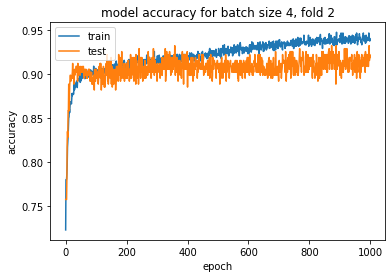

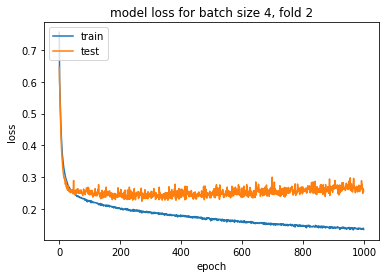

Epoch 1/1000
298/298 - 0s - loss: 0.7584 - accuracy: 0.7313 - val_loss: 0.5808 - val_accuracy: 0.7980
Epoch 2/1000
298/298 - 0s - loss: 0.5939 - accuracy: 0.7699 - val_loss: 0.5218 - val_accuracy: 0.7980
Epoch 3/1000
298/298 - 0s - loss: 0.5432 - accuracy: 0.7699 - val_loss: 0.4787 - val_accuracy: 0.8047
Epoch 4/1000
298/298 - 0s - loss: 0.5009 - accuracy: 0.7809 - val_loss: 0.4484 - val_accuracy: 0.8283
Epoch 5/1000
298/298 - 0s - loss: 0.4666 - accuracy: 0.7993 - val_loss: 0.4112 - val_accuracy: 0.8249
Epoch 6/1000
298/298 - 0s - loss: 0.4366 - accuracy: 0.8136 - val_loss: 0.3990 - val_accuracy: 0.8552
Epoch 7/1000
298/298 - 0s - loss: 0.4132 - accuracy: 0.8287 - val_loss: 0.3692 - val_accuracy: 0.8687
Epoch 8/1000
298/298 - 0s - loss: 0.3914 - accuracy: 0.8371 - val_loss: 0.3509 - val_accuracy: 0.8687
Epoch 9/1000
298/298 - 0s - loss: 0.3754 - accuracy: 0.8539 - val_loss: 0.3423 - val_accuracy: 0.8687
Epoch 10/1000
298/298 - 0s - loss: 0.3602 - accuracy: 0.8564 - val_loss: 0.3264 - 

Epoch 81/1000
298/298 - 0s - loss: 0.2363 - accuracy: 0.8959 - val_loss: 0.2450 - val_accuracy: 0.9057
Epoch 82/1000
298/298 - 0s - loss: 0.2361 - accuracy: 0.8942 - val_loss: 0.2360 - val_accuracy: 0.8990
Epoch 83/1000
298/298 - 0s - loss: 0.2361 - accuracy: 0.8976 - val_loss: 0.2160 - val_accuracy: 0.9091
Epoch 84/1000
298/298 - 0s - loss: 0.2337 - accuracy: 0.8967 - val_loss: 0.2200 - val_accuracy: 0.9057
Epoch 85/1000
298/298 - 0s - loss: 0.2322 - accuracy: 0.9001 - val_loss: 0.2156 - val_accuracy: 0.8889
Epoch 86/1000
298/298 - 0s - loss: 0.2334 - accuracy: 0.8950 - val_loss: 0.2179 - val_accuracy: 0.8956
Epoch 87/1000
298/298 - 0s - loss: 0.2334 - accuracy: 0.8925 - val_loss: 0.2192 - val_accuracy: 0.9057
Epoch 88/1000
298/298 - 0s - loss: 0.2305 - accuracy: 0.9043 - val_loss: 0.2144 - val_accuracy: 0.9057
Epoch 89/1000
298/298 - 0s - loss: 0.2325 - accuracy: 0.9001 - val_loss: 0.2131 - val_accuracy: 0.9024
Epoch 90/1000
298/298 - 0s - loss: 0.2327 - accuracy: 0.9009 - val_loss: 

Epoch 160/1000
298/298 - 0s - loss: 0.2166 - accuracy: 0.9060 - val_loss: 0.2034 - val_accuracy: 0.9091
Epoch 161/1000
298/298 - 0s - loss: 0.2133 - accuracy: 0.9102 - val_loss: 0.2378 - val_accuracy: 0.8889
Epoch 162/1000
298/298 - 0s - loss: 0.2155 - accuracy: 0.9026 - val_loss: 0.2037 - val_accuracy: 0.9158
Epoch 163/1000
298/298 - 0s - loss: 0.2116 - accuracy: 0.9018 - val_loss: 0.2398 - val_accuracy: 0.8956
Epoch 164/1000
298/298 - 0s - loss: 0.2153 - accuracy: 0.9051 - val_loss: 0.2100 - val_accuracy: 0.9091
Epoch 165/1000
298/298 - 0s - loss: 0.2113 - accuracy: 0.9076 - val_loss: 0.2002 - val_accuracy: 0.9226
Epoch 166/1000
298/298 - 0s - loss: 0.2111 - accuracy: 0.9018 - val_loss: 0.2012 - val_accuracy: 0.9192
Epoch 167/1000
298/298 - 0s - loss: 0.2146 - accuracy: 0.9034 - val_loss: 0.2182 - val_accuracy: 0.9091
Epoch 168/1000
298/298 - 0s - loss: 0.2135 - accuracy: 0.9060 - val_loss: 0.2070 - val_accuracy: 0.9057
Epoch 169/1000
298/298 - 0s - loss: 0.2146 - accuracy: 0.9093 - 

Epoch 239/1000
298/298 - 0s - loss: 0.2004 - accuracy: 0.9076 - val_loss: 0.2083 - val_accuracy: 0.9158
Epoch 240/1000
298/298 - 0s - loss: 0.1997 - accuracy: 0.9110 - val_loss: 0.2105 - val_accuracy: 0.9125
Epoch 241/1000
298/298 - 0s - loss: 0.2026 - accuracy: 0.9060 - val_loss: 0.2225 - val_accuracy: 0.8956
Epoch 242/1000
298/298 - 0s - loss: 0.1998 - accuracy: 0.9085 - val_loss: 0.1980 - val_accuracy: 0.9226
Epoch 243/1000
298/298 - 0s - loss: 0.2030 - accuracy: 0.9085 - val_loss: 0.1994 - val_accuracy: 0.9226
Epoch 244/1000
298/298 - 0s - loss: 0.2044 - accuracy: 0.9102 - val_loss: 0.2015 - val_accuracy: 0.9192
Epoch 245/1000
298/298 - 0s - loss: 0.2005 - accuracy: 0.9060 - val_loss: 0.2123 - val_accuracy: 0.9158
Epoch 246/1000
298/298 - 0s - loss: 0.2025 - accuracy: 0.9051 - val_loss: 0.1989 - val_accuracy: 0.9192
Epoch 247/1000
298/298 - 0s - loss: 0.1967 - accuracy: 0.9186 - val_loss: 0.2117 - val_accuracy: 0.9158
Epoch 248/1000
298/298 - 0s - loss: 0.2007 - accuracy: 0.9102 - 

Epoch 318/1000
298/298 - 0s - loss: 0.1971 - accuracy: 0.9085 - val_loss: 0.1904 - val_accuracy: 0.9226
Epoch 319/1000
298/298 - 0s - loss: 0.1966 - accuracy: 0.9076 - val_loss: 0.1953 - val_accuracy: 0.9226
Epoch 320/1000
298/298 - 0s - loss: 0.1944 - accuracy: 0.9102 - val_loss: 0.1997 - val_accuracy: 0.9259
Epoch 321/1000
298/298 - 0s - loss: 0.1960 - accuracy: 0.9102 - val_loss: 0.2176 - val_accuracy: 0.9024
Epoch 322/1000
298/298 - 0s - loss: 0.1944 - accuracy: 0.9135 - val_loss: 0.2025 - val_accuracy: 0.9226
Epoch 323/1000
298/298 - 0s - loss: 0.1952 - accuracy: 0.9102 - val_loss: 0.1906 - val_accuracy: 0.9226
Epoch 324/1000
298/298 - 0s - loss: 0.1942 - accuracy: 0.9102 - val_loss: 0.2144 - val_accuracy: 0.9057
Epoch 325/1000
298/298 - 0s - loss: 0.1939 - accuracy: 0.9152 - val_loss: 0.1910 - val_accuracy: 0.9226
Epoch 326/1000
298/298 - 0s - loss: 0.1952 - accuracy: 0.9093 - val_loss: 0.1885 - val_accuracy: 0.9226
Epoch 327/1000
298/298 - 0s - loss: 0.1939 - accuracy: 0.9127 - 

Epoch 397/1000
298/298 - 0s - loss: 0.1908 - accuracy: 0.9152 - val_loss: 0.2150 - val_accuracy: 0.8990
Epoch 398/1000
298/298 - 0s - loss: 0.1912 - accuracy: 0.9135 - val_loss: 0.1918 - val_accuracy: 0.9192
Epoch 399/1000
298/298 - 0s - loss: 0.1931 - accuracy: 0.9127 - val_loss: 0.1932 - val_accuracy: 0.9226
Epoch 400/1000
298/298 - 0s - loss: 0.1887 - accuracy: 0.9160 - val_loss: 0.1938 - val_accuracy: 0.9226
Epoch 401/1000
298/298 - 0s - loss: 0.1896 - accuracy: 0.9177 - val_loss: 0.1862 - val_accuracy: 0.9293
Epoch 402/1000
298/298 - 0s - loss: 0.1908 - accuracy: 0.9085 - val_loss: 0.1892 - val_accuracy: 0.9226
Epoch 403/1000
298/298 - 0s - loss: 0.1915 - accuracy: 0.9118 - val_loss: 0.1943 - val_accuracy: 0.9226
Epoch 404/1000
298/298 - 0s - loss: 0.1900 - accuracy: 0.9118 - val_loss: 0.2323 - val_accuracy: 0.8889
Epoch 405/1000
298/298 - 0s - loss: 0.1865 - accuracy: 0.9219 - val_loss: 0.2149 - val_accuracy: 0.8923
Epoch 406/1000
298/298 - 0s - loss: 0.1918 - accuracy: 0.9169 - 

Epoch 476/1000
298/298 - 0s - loss: 0.1858 - accuracy: 0.9152 - val_loss: 0.2055 - val_accuracy: 0.8990
Epoch 477/1000
298/298 - 0s - loss: 0.1860 - accuracy: 0.9186 - val_loss: 0.1982 - val_accuracy: 0.9125
Epoch 478/1000
298/298 - 0s - loss: 0.1873 - accuracy: 0.9194 - val_loss: 0.1984 - val_accuracy: 0.9192
Epoch 479/1000
298/298 - 0s - loss: 0.1872 - accuracy: 0.9169 - val_loss: 0.1997 - val_accuracy: 0.9192
Epoch 480/1000
298/298 - 0s - loss: 0.1860 - accuracy: 0.9144 - val_loss: 0.2168 - val_accuracy: 0.8822
Epoch 481/1000
298/298 - 0s - loss: 0.1873 - accuracy: 0.9118 - val_loss: 0.1959 - val_accuracy: 0.9125
Epoch 482/1000
298/298 - 0s - loss: 0.1815 - accuracy: 0.9194 - val_loss: 0.1886 - val_accuracy: 0.9360
Epoch 483/1000
298/298 - 0s - loss: 0.1871 - accuracy: 0.9135 - val_loss: 0.2117 - val_accuracy: 0.8990
Epoch 484/1000
298/298 - 0s - loss: 0.1859 - accuracy: 0.9202 - val_loss: 0.2014 - val_accuracy: 0.9091
Epoch 485/1000
298/298 - 0s - loss: 0.1870 - accuracy: 0.9152 - 

Epoch 555/1000
298/298 - 0s - loss: 0.1819 - accuracy: 0.9186 - val_loss: 0.1868 - val_accuracy: 0.9226
Epoch 556/1000
298/298 - 0s - loss: 0.1851 - accuracy: 0.9177 - val_loss: 0.1949 - val_accuracy: 0.9125
Epoch 557/1000
298/298 - 0s - loss: 0.1849 - accuracy: 0.9160 - val_loss: 0.1839 - val_accuracy: 0.9360
Epoch 558/1000
298/298 - 0s - loss: 0.1832 - accuracy: 0.9228 - val_loss: 0.2523 - val_accuracy: 0.8855
Epoch 559/1000
298/298 - 0s - loss: 0.1854 - accuracy: 0.9127 - val_loss: 0.1843 - val_accuracy: 0.9327
Epoch 560/1000
298/298 - 0s - loss: 0.1840 - accuracy: 0.9186 - val_loss: 0.1991 - val_accuracy: 0.9057
Epoch 561/1000
298/298 - 0s - loss: 0.1828 - accuracy: 0.9135 - val_loss: 0.1882 - val_accuracy: 0.9192
Epoch 562/1000
298/298 - 0s - loss: 0.1828 - accuracy: 0.9169 - val_loss: 0.2004 - val_accuracy: 0.9091
Epoch 563/1000
298/298 - 0s - loss: 0.1842 - accuracy: 0.9202 - val_loss: 0.2000 - val_accuracy: 0.9226
Epoch 564/1000
298/298 - 0s - loss: 0.1871 - accuracy: 0.9152 - 

Epoch 634/1000
298/298 - 0s - loss: 0.1810 - accuracy: 0.9219 - val_loss: 0.1890 - val_accuracy: 0.9192
Epoch 635/1000
298/298 - 0s - loss: 0.1825 - accuracy: 0.9177 - val_loss: 0.1863 - val_accuracy: 0.9192
Epoch 636/1000
298/298 - 0s - loss: 0.1806 - accuracy: 0.9177 - val_loss: 0.1849 - val_accuracy: 0.9226
Epoch 637/1000
298/298 - 0s - loss: 0.1830 - accuracy: 0.9202 - val_loss: 0.1871 - val_accuracy: 0.9259
Epoch 638/1000
298/298 - 0s - loss: 0.1786 - accuracy: 0.9219 - val_loss: 0.2376 - val_accuracy: 0.8855
Epoch 639/1000
298/298 - 0s - loss: 0.1835 - accuracy: 0.9236 - val_loss: 0.1950 - val_accuracy: 0.9057
Epoch 640/1000
298/298 - 0s - loss: 0.1820 - accuracy: 0.9169 - val_loss: 0.2026 - val_accuracy: 0.9024
Epoch 641/1000
298/298 - 0s - loss: 0.1817 - accuracy: 0.9177 - val_loss: 0.2079 - val_accuracy: 0.8990
Epoch 642/1000
298/298 - 0s - loss: 0.1826 - accuracy: 0.9169 - val_loss: 0.1909 - val_accuracy: 0.9226
Epoch 643/1000
298/298 - 0s - loss: 0.1821 - accuracy: 0.9219 - 

Epoch 713/1000
298/298 - 0s - loss: 0.1807 - accuracy: 0.9202 - val_loss: 0.1843 - val_accuracy: 0.9158
Epoch 714/1000
298/298 - 0s - loss: 0.1815 - accuracy: 0.9135 - val_loss: 0.1870 - val_accuracy: 0.9091
Epoch 715/1000
298/298 - 0s - loss: 0.1814 - accuracy: 0.9177 - val_loss: 0.1836 - val_accuracy: 0.9158
Epoch 716/1000
298/298 - 0s - loss: 0.1774 - accuracy: 0.9236 - val_loss: 0.1788 - val_accuracy: 0.9192
Epoch 717/1000
298/298 - 0s - loss: 0.1799 - accuracy: 0.9194 - val_loss: 0.1797 - val_accuracy: 0.9192
Epoch 718/1000
298/298 - 0s - loss: 0.1798 - accuracy: 0.9144 - val_loss: 0.1849 - val_accuracy: 0.9293
Epoch 719/1000
298/298 - 0s - loss: 0.1753 - accuracy: 0.9228 - val_loss: 0.1765 - val_accuracy: 0.9293
Epoch 720/1000
298/298 - 0s - loss: 0.1817 - accuracy: 0.9127 - val_loss: 0.1796 - val_accuracy: 0.9259
Epoch 721/1000
298/298 - 0s - loss: 0.1794 - accuracy: 0.9211 - val_loss: 0.1766 - val_accuracy: 0.9192
Epoch 722/1000
298/298 - 0s - loss: 0.1810 - accuracy: 0.9177 - 

Epoch 792/1000
298/298 - 0s - loss: 0.1784 - accuracy: 0.9202 - val_loss: 0.1830 - val_accuracy: 0.9259
Epoch 793/1000
298/298 - 0s - loss: 0.1768 - accuracy: 0.9177 - val_loss: 0.1900 - val_accuracy: 0.9125
Epoch 794/1000
298/298 - 0s - loss: 0.1794 - accuracy: 0.9194 - val_loss: 0.1771 - val_accuracy: 0.9226
Epoch 795/1000
298/298 - 0s - loss: 0.1750 - accuracy: 0.9219 - val_loss: 0.1837 - val_accuracy: 0.9158
Epoch 796/1000
298/298 - 0s - loss: 0.1786 - accuracy: 0.9160 - val_loss: 0.1817 - val_accuracy: 0.9226
Epoch 797/1000
298/298 - 0s - loss: 0.1762 - accuracy: 0.9202 - val_loss: 0.1826 - val_accuracy: 0.9158
Epoch 798/1000
298/298 - 0s - loss: 0.1795 - accuracy: 0.9236 - val_loss: 0.1847 - val_accuracy: 0.9192
Epoch 799/1000
298/298 - 0s - loss: 0.1782 - accuracy: 0.9202 - val_loss: 0.1934 - val_accuracy: 0.9259
Epoch 800/1000
298/298 - 0s - loss: 0.1788 - accuracy: 0.9186 - val_loss: 0.1835 - val_accuracy: 0.9226
Epoch 801/1000
298/298 - 0s - loss: 0.1784 - accuracy: 0.9194 - 

Epoch 871/1000
298/298 - 0s - loss: 0.1768 - accuracy: 0.9177 - val_loss: 0.1764 - val_accuracy: 0.9192
Epoch 872/1000
298/298 - 0s - loss: 0.1762 - accuracy: 0.9169 - val_loss: 0.1826 - val_accuracy: 0.9259
Epoch 873/1000
298/298 - 0s - loss: 0.1782 - accuracy: 0.9135 - val_loss: 0.1786 - val_accuracy: 0.9259
Epoch 874/1000
298/298 - 0s - loss: 0.1740 - accuracy: 0.9219 - val_loss: 0.1917 - val_accuracy: 0.9024
Epoch 875/1000
298/298 - 0s - loss: 0.1749 - accuracy: 0.9152 - val_loss: 0.2172 - val_accuracy: 0.9024
Epoch 876/1000
298/298 - 0s - loss: 0.1744 - accuracy: 0.9228 - val_loss: 0.1869 - val_accuracy: 0.9057
Epoch 877/1000
298/298 - 0s - loss: 0.1767 - accuracy: 0.9194 - val_loss: 0.1953 - val_accuracy: 0.9057
Epoch 878/1000
298/298 - 0s - loss: 0.1783 - accuracy: 0.9211 - val_loss: 0.1754 - val_accuracy: 0.9259
Epoch 879/1000
298/298 - 0s - loss: 0.1765 - accuracy: 0.9211 - val_loss: 0.2105 - val_accuracy: 0.8956
Epoch 880/1000
298/298 - 0s - loss: 0.1764 - accuracy: 0.9211 - 

Epoch 950/1000
298/298 - 0s - loss: 0.1723 - accuracy: 0.9228 - val_loss: 0.1717 - val_accuracy: 0.9226
Epoch 951/1000
298/298 - 0s - loss: 0.1766 - accuracy: 0.9236 - val_loss: 0.1854 - val_accuracy: 0.9158
Epoch 952/1000
298/298 - 0s - loss: 0.1737 - accuracy: 0.9202 - val_loss: 0.1817 - val_accuracy: 0.9226
Epoch 953/1000
298/298 - 0s - loss: 0.1713 - accuracy: 0.9186 - val_loss: 0.1847 - val_accuracy: 0.9327
Epoch 954/1000
298/298 - 0s - loss: 0.1713 - accuracy: 0.9219 - val_loss: 0.1903 - val_accuracy: 0.9192
Epoch 955/1000
298/298 - 0s - loss: 0.1730 - accuracy: 0.9236 - val_loss: 0.1763 - val_accuracy: 0.9226
Epoch 956/1000
298/298 - 0s - loss: 0.1730 - accuracy: 0.9236 - val_loss: 0.1753 - val_accuracy: 0.9394
Epoch 957/1000
298/298 - 0s - loss: 0.1748 - accuracy: 0.9286 - val_loss: 0.1736 - val_accuracy: 0.9327
Epoch 958/1000
298/298 - 0s - loss: 0.1770 - accuracy: 0.9228 - val_loss: 0.1740 - val_accuracy: 0.9192
Epoch 959/1000
298/298 - 0s - loss: 0.1761 - accuracy: 0.9194 - 

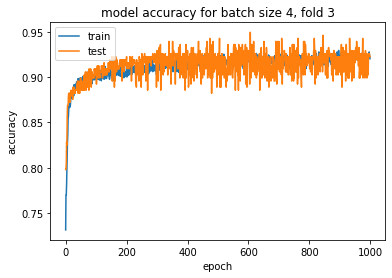

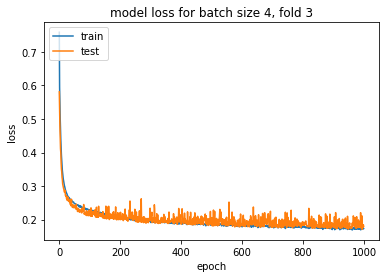

Epoch 1/1000
298/298 - 0s - loss: 0.6359 - accuracy: 0.7750 - val_loss: 0.6198 - val_accuracy: 0.7441
Epoch 2/1000
298/298 - 0s - loss: 0.5241 - accuracy: 0.7859 - val_loss: 0.5830 - val_accuracy: 0.7441
Epoch 3/1000
298/298 - 0s - loss: 0.4794 - accuracy: 0.7918 - val_loss: 0.5341 - val_accuracy: 0.7879
Epoch 4/1000
298/298 - 0s - loss: 0.4413 - accuracy: 0.8086 - val_loss: 0.5033 - val_accuracy: 0.8013
Epoch 5/1000
298/298 - 0s - loss: 0.4153 - accuracy: 0.8245 - val_loss: 0.4853 - val_accuracy: 0.7946
Epoch 6/1000
298/298 - 0s - loss: 0.3899 - accuracy: 0.8371 - val_loss: 0.4598 - val_accuracy: 0.8249
Epoch 7/1000
298/298 - 0s - loss: 0.3729 - accuracy: 0.8505 - val_loss: 0.4455 - val_accuracy: 0.8384
Epoch 8/1000
298/298 - 0s - loss: 0.3565 - accuracy: 0.8573 - val_loss: 0.4329 - val_accuracy: 0.8350
Epoch 9/1000
298/298 - 0s - loss: 0.3450 - accuracy: 0.8640 - val_loss: 0.4212 - val_accuracy: 0.8350
Epoch 10/1000
298/298 - 0s - loss: 0.3346 - accuracy: 0.8615 - val_loss: 0.4273 - 

Epoch 81/1000
298/298 - 0s - loss: 0.2216 - accuracy: 0.9093 - val_loss: 0.3345 - val_accuracy: 0.8384
Epoch 82/1000
298/298 - 0s - loss: 0.2192 - accuracy: 0.9127 - val_loss: 0.3195 - val_accuracy: 0.8451
Epoch 83/1000
298/298 - 0s - loss: 0.2206 - accuracy: 0.9043 - val_loss: 0.3528 - val_accuracy: 0.8485
Epoch 84/1000
298/298 - 0s - loss: 0.2199 - accuracy: 0.9060 - val_loss: 0.3358 - val_accuracy: 0.8418
Epoch 85/1000
298/298 - 0s - loss: 0.2187 - accuracy: 0.9102 - val_loss: 0.3385 - val_accuracy: 0.8418
Epoch 86/1000
298/298 - 0s - loss: 0.2181 - accuracy: 0.9135 - val_loss: 0.3217 - val_accuracy: 0.8519
Epoch 87/1000
298/298 - 0s - loss: 0.2200 - accuracy: 0.9085 - val_loss: 0.3227 - val_accuracy: 0.8485
Epoch 88/1000
298/298 - 0s - loss: 0.2177 - accuracy: 0.9085 - val_loss: 0.3305 - val_accuracy: 0.8451
Epoch 89/1000
298/298 - 0s - loss: 0.2156 - accuracy: 0.9118 - val_loss: 0.3226 - val_accuracy: 0.8519
Epoch 90/1000
298/298 - 0s - loss: 0.2185 - accuracy: 0.9110 - val_loss: 

Epoch 160/1000
298/298 - 0s - loss: 0.2019 - accuracy: 0.9169 - val_loss: 0.3359 - val_accuracy: 0.8418
Epoch 161/1000
298/298 - 0s - loss: 0.2006 - accuracy: 0.9144 - val_loss: 0.3140 - val_accuracy: 0.8687
Epoch 162/1000
298/298 - 0s - loss: 0.2008 - accuracy: 0.9160 - val_loss: 0.3294 - val_accuracy: 0.8519
Epoch 163/1000
298/298 - 0s - loss: 0.2000 - accuracy: 0.9144 - val_loss: 0.3208 - val_accuracy: 0.8620
Epoch 164/1000
298/298 - 0s - loss: 0.2008 - accuracy: 0.9177 - val_loss: 0.3360 - val_accuracy: 0.8552
Epoch 165/1000
298/298 - 0s - loss: 0.1991 - accuracy: 0.9202 - val_loss: 0.3433 - val_accuracy: 0.8485
Epoch 166/1000
298/298 - 0s - loss: 0.2007 - accuracy: 0.9068 - val_loss: 0.3412 - val_accuracy: 0.8451
Epoch 167/1000
298/298 - 0s - loss: 0.1998 - accuracy: 0.9110 - val_loss: 0.3148 - val_accuracy: 0.8552
Epoch 168/1000
298/298 - 0s - loss: 0.2003 - accuracy: 0.9144 - val_loss: 0.3292 - val_accuracy: 0.8485
Epoch 169/1000
298/298 - 0s - loss: 0.2004 - accuracy: 0.9135 - 

Epoch 239/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9236 - val_loss: 0.3220 - val_accuracy: 0.8552
Epoch 240/1000
298/298 - 0s - loss: 0.1876 - accuracy: 0.9160 - val_loss: 0.3252 - val_accuracy: 0.8552
Epoch 241/1000
298/298 - 0s - loss: 0.1911 - accuracy: 0.9102 - val_loss: 0.3136 - val_accuracy: 0.8620
Epoch 242/1000
298/298 - 0s - loss: 0.1880 - accuracy: 0.9177 - val_loss: 0.3355 - val_accuracy: 0.8519
Epoch 243/1000
298/298 - 0s - loss: 0.1898 - accuracy: 0.9144 - val_loss: 0.3286 - val_accuracy: 0.8586
Epoch 244/1000
298/298 - 0s - loss: 0.1905 - accuracy: 0.9152 - val_loss: 0.3336 - val_accuracy: 0.8552
Epoch 245/1000
298/298 - 0s - loss: 0.1908 - accuracy: 0.9177 - val_loss: 0.3207 - val_accuracy: 0.8552
Epoch 246/1000
298/298 - 0s - loss: 0.1889 - accuracy: 0.9152 - val_loss: 0.3340 - val_accuracy: 0.8586
Epoch 247/1000
298/298 - 0s - loss: 0.1854 - accuracy: 0.9194 - val_loss: 0.3149 - val_accuracy: 0.8586
Epoch 248/1000
298/298 - 0s - loss: 0.1891 - accuracy: 0.9194 - 

Epoch 318/1000
298/298 - 0s - loss: 0.1828 - accuracy: 0.9177 - val_loss: 0.3278 - val_accuracy: 0.8620
Epoch 319/1000
298/298 - 0s - loss: 0.1837 - accuracy: 0.9194 - val_loss: 0.3157 - val_accuracy: 0.8721
Epoch 320/1000
298/298 - 0s - loss: 0.1814 - accuracy: 0.9228 - val_loss: 0.3401 - val_accuracy: 0.8586
Epoch 321/1000
298/298 - 0s - loss: 0.1821 - accuracy: 0.9177 - val_loss: 0.3155 - val_accuracy: 0.8653
Epoch 322/1000
298/298 - 0s - loss: 0.1808 - accuracy: 0.9152 - val_loss: 0.3120 - val_accuracy: 0.8620
Epoch 323/1000
298/298 - 0s - loss: 0.1812 - accuracy: 0.9186 - val_loss: 0.3175 - val_accuracy: 0.8687
Epoch 324/1000
298/298 - 0s - loss: 0.1802 - accuracy: 0.9144 - val_loss: 0.3158 - val_accuracy: 0.8721
Epoch 325/1000
298/298 - 0s - loss: 0.1808 - accuracy: 0.9219 - val_loss: 0.3204 - val_accuracy: 0.8586
Epoch 326/1000
298/298 - 0s - loss: 0.1810 - accuracy: 0.9194 - val_loss: 0.3387 - val_accuracy: 0.8552
Epoch 327/1000
298/298 - 0s - loss: 0.1815 - accuracy: 0.9194 - 

Epoch 397/1000
298/298 - 0s - loss: 0.1723 - accuracy: 0.9202 - val_loss: 0.3224 - val_accuracy: 0.8552
Epoch 398/1000
298/298 - 0s - loss: 0.1755 - accuracy: 0.9186 - val_loss: 0.3414 - val_accuracy: 0.8552
Epoch 399/1000
298/298 - 0s - loss: 0.1753 - accuracy: 0.9211 - val_loss: 0.3103 - val_accuracy: 0.8687
Epoch 400/1000
298/298 - 0s - loss: 0.1719 - accuracy: 0.9253 - val_loss: 0.3110 - val_accuracy: 0.8687
Epoch 401/1000
298/298 - 0s - loss: 0.1718 - accuracy: 0.9219 - val_loss: 0.3180 - val_accuracy: 0.8653
Epoch 402/1000
298/298 - 0s - loss: 0.1734 - accuracy: 0.9219 - val_loss: 0.3223 - val_accuracy: 0.8620
Epoch 403/1000
298/298 - 0s - loss: 0.1734 - accuracy: 0.9219 - val_loss: 0.3198 - val_accuracy: 0.8653
Epoch 404/1000
298/298 - 0s - loss: 0.1741 - accuracy: 0.9186 - val_loss: 0.3176 - val_accuracy: 0.8620
Epoch 405/1000
298/298 - 0s - loss: 0.1716 - accuracy: 0.9144 - val_loss: 0.3068 - val_accuracy: 0.8620
Epoch 406/1000
298/298 - 0s - loss: 0.1738 - accuracy: 0.9219 - 

Epoch 476/1000
298/298 - 0s - loss: 0.1675 - accuracy: 0.9278 - val_loss: 0.3365 - val_accuracy: 0.8653
Epoch 477/1000
298/298 - 0s - loss: 0.1668 - accuracy: 0.9211 - val_loss: 0.3249 - val_accuracy: 0.8687
Epoch 478/1000
298/298 - 0s - loss: 0.1679 - accuracy: 0.9194 - val_loss: 0.3192 - val_accuracy: 0.8620
Epoch 479/1000
298/298 - 0s - loss: 0.1667 - accuracy: 0.9228 - val_loss: 0.3396 - val_accuracy: 0.8586
Epoch 480/1000
298/298 - 0s - loss: 0.1662 - accuracy: 0.9236 - val_loss: 0.3168 - val_accuracy: 0.8653
Epoch 481/1000
298/298 - 0s - loss: 0.1672 - accuracy: 0.9244 - val_loss: 0.3251 - val_accuracy: 0.8519
Epoch 482/1000
298/298 - 0s - loss: 0.1624 - accuracy: 0.9253 - val_loss: 0.3365 - val_accuracy: 0.8620
Epoch 483/1000
298/298 - 0s - loss: 0.1663 - accuracy: 0.9228 - val_loss: 0.3231 - val_accuracy: 0.8653
Epoch 484/1000
298/298 - 0s - loss: 0.1665 - accuracy: 0.9261 - val_loss: 0.3218 - val_accuracy: 0.8620
Epoch 485/1000
298/298 - 0s - loss: 0.1669 - accuracy: 0.9219 - 

Epoch 555/1000
298/298 - 0s - loss: 0.1591 - accuracy: 0.9320 - val_loss: 0.3248 - val_accuracy: 0.8586
Epoch 556/1000
298/298 - 0s - loss: 0.1610 - accuracy: 0.9320 - val_loss: 0.3222 - val_accuracy: 0.8586
Epoch 557/1000
298/298 - 0s - loss: 0.1599 - accuracy: 0.9328 - val_loss: 0.3394 - val_accuracy: 0.8586
Epoch 558/1000
298/298 - 0s - loss: 0.1616 - accuracy: 0.9270 - val_loss: 0.3311 - val_accuracy: 0.8653
Epoch 559/1000
298/298 - 0s - loss: 0.1616 - accuracy: 0.9219 - val_loss: 0.3559 - val_accuracy: 0.8552
Epoch 560/1000
298/298 - 0s - loss: 0.1615 - accuracy: 0.9236 - val_loss: 0.3400 - val_accuracy: 0.8586
Epoch 561/1000
298/298 - 0s - loss: 0.1580 - accuracy: 0.9261 - val_loss: 0.3386 - val_accuracy: 0.8485
Epoch 562/1000
298/298 - 0s - loss: 0.1589 - accuracy: 0.9295 - val_loss: 0.3341 - val_accuracy: 0.8519
Epoch 563/1000
298/298 - 0s - loss: 0.1613 - accuracy: 0.9261 - val_loss: 0.3720 - val_accuracy: 0.8586
Epoch 564/1000
298/298 - 0s - loss: 0.1581 - accuracy: 0.9312 - 

Epoch 634/1000
298/298 - 0s - loss: 0.1556 - accuracy: 0.9295 - val_loss: 0.3447 - val_accuracy: 0.8586
Epoch 635/1000
298/298 - 0s - loss: 0.1539 - accuracy: 0.9362 - val_loss: 0.3478 - val_accuracy: 0.8384
Epoch 636/1000
298/298 - 0s - loss: 0.1533 - accuracy: 0.9337 - val_loss: 0.3507 - val_accuracy: 0.8586
Epoch 637/1000
298/298 - 0s - loss: 0.1543 - accuracy: 0.9312 - val_loss: 0.3501 - val_accuracy: 0.8586
Epoch 638/1000
298/298 - 0s - loss: 0.1544 - accuracy: 0.9312 - val_loss: 0.3444 - val_accuracy: 0.8485
Epoch 639/1000
298/298 - 0s - loss: 0.1534 - accuracy: 0.9328 - val_loss: 0.3507 - val_accuracy: 0.8552
Epoch 640/1000
298/298 - 0s - loss: 0.1517 - accuracy: 0.9345 - val_loss: 0.3449 - val_accuracy: 0.8653
Epoch 641/1000
298/298 - 0s - loss: 0.1541 - accuracy: 0.9337 - val_loss: 0.3418 - val_accuracy: 0.8451
Epoch 642/1000
298/298 - 0s - loss: 0.1542 - accuracy: 0.9328 - val_loss: 0.3353 - val_accuracy: 0.8653
Epoch 643/1000
298/298 - 0s - loss: 0.1556 - accuracy: 0.9261 - 

Epoch 713/1000
298/298 - 0s - loss: 0.1518 - accuracy: 0.9353 - val_loss: 0.3610 - val_accuracy: 0.8586
Epoch 714/1000
298/298 - 0s - loss: 0.1489 - accuracy: 0.9270 - val_loss: 0.3497 - val_accuracy: 0.8485
Epoch 715/1000
298/298 - 0s - loss: 0.1501 - accuracy: 0.9286 - val_loss: 0.3345 - val_accuracy: 0.8586
Epoch 716/1000
298/298 - 0s - loss: 0.1510 - accuracy: 0.9312 - val_loss: 0.3549 - val_accuracy: 0.8552
Epoch 717/1000
298/298 - 0s - loss: 0.1514 - accuracy: 0.9278 - val_loss: 0.3555 - val_accuracy: 0.8552
Epoch 718/1000
298/298 - 0s - loss: 0.1504 - accuracy: 0.9337 - val_loss: 0.3450 - val_accuracy: 0.8519
Epoch 719/1000
298/298 - 0s - loss: 0.1475 - accuracy: 0.9379 - val_loss: 0.3618 - val_accuracy: 0.8620
Epoch 720/1000
298/298 - 0s - loss: 0.1499 - accuracy: 0.9370 - val_loss: 0.3434 - val_accuracy: 0.8519
Epoch 721/1000
298/298 - 0s - loss: 0.1504 - accuracy: 0.9370 - val_loss: 0.3380 - val_accuracy: 0.8586
Epoch 722/1000
298/298 - 0s - loss: 0.1492 - accuracy: 0.9337 - 

Epoch 792/1000
298/298 - 0s - loss: 0.1503 - accuracy: 0.9345 - val_loss: 0.3667 - val_accuracy: 0.8485
Epoch 793/1000
298/298 - 0s - loss: 0.1467 - accuracy: 0.9362 - val_loss: 0.3554 - val_accuracy: 0.8653
Epoch 794/1000
298/298 - 0s - loss: 0.1484 - accuracy: 0.9320 - val_loss: 0.3614 - val_accuracy: 0.8552
Epoch 795/1000
298/298 - 0s - loss: 0.1458 - accuracy: 0.9370 - val_loss: 0.3764 - val_accuracy: 0.8653
Epoch 796/1000
298/298 - 0s - loss: 0.1474 - accuracy: 0.9345 - val_loss: 0.3562 - val_accuracy: 0.8485
Epoch 797/1000
298/298 - 0s - loss: 0.1466 - accuracy: 0.9370 - val_loss: 0.3563 - val_accuracy: 0.8519
Epoch 798/1000
298/298 - 0s - loss: 0.1457 - accuracy: 0.9379 - val_loss: 0.3633 - val_accuracy: 0.8519
Epoch 799/1000
298/298 - 0s - loss: 0.1465 - accuracy: 0.9395 - val_loss: 0.3821 - val_accuracy: 0.8586
Epoch 800/1000
298/298 - 0s - loss: 0.1459 - accuracy: 0.9328 - val_loss: 0.3537 - val_accuracy: 0.8620
Epoch 801/1000
298/298 - 0s - loss: 0.1478 - accuracy: 0.9362 - 

Epoch 871/1000
298/298 - 0s - loss: 0.1455 - accuracy: 0.9404 - val_loss: 0.3636 - val_accuracy: 0.8485
Epoch 872/1000
298/298 - 0s - loss: 0.1441 - accuracy: 0.9395 - val_loss: 0.3645 - val_accuracy: 0.8586
Epoch 873/1000
298/298 - 0s - loss: 0.1444 - accuracy: 0.9337 - val_loss: 0.3991 - val_accuracy: 0.8586
Epoch 874/1000
298/298 - 0s - loss: 0.1436 - accuracy: 0.9421 - val_loss: 0.3622 - val_accuracy: 0.8552
Epoch 875/1000
298/298 - 0s - loss: 0.1444 - accuracy: 0.9362 - val_loss: 0.3623 - val_accuracy: 0.8552
Epoch 876/1000
298/298 - 0s - loss: 0.1410 - accuracy: 0.9362 - val_loss: 0.3585 - val_accuracy: 0.8552
Epoch 877/1000
298/298 - 0s - loss: 0.1435 - accuracy: 0.9379 - val_loss: 0.3551 - val_accuracy: 0.8485
Epoch 878/1000
298/298 - 0s - loss: 0.1414 - accuracy: 0.9379 - val_loss: 0.3749 - val_accuracy: 0.8552
Epoch 879/1000
298/298 - 0s - loss: 0.1437 - accuracy: 0.9379 - val_loss: 0.3601 - val_accuracy: 0.8451
Epoch 880/1000
298/298 - 0s - loss: 0.1445 - accuracy: 0.9387 - 

Epoch 950/1000
298/298 - 0s - loss: 0.1407 - accuracy: 0.9379 - val_loss: 0.4123 - val_accuracy: 0.8620
Epoch 951/1000
298/298 - 0s - loss: 0.1437 - accuracy: 0.9345 - val_loss: 0.3683 - val_accuracy: 0.8519
Epoch 952/1000
298/298 - 0s - loss: 0.1428 - accuracy: 0.9362 - val_loss: 0.3672 - val_accuracy: 0.8451
Epoch 953/1000
298/298 - 0s - loss: 0.1394 - accuracy: 0.9429 - val_loss: 0.3766 - val_accuracy: 0.8620
Epoch 954/1000
298/298 - 0s - loss: 0.1397 - accuracy: 0.9387 - val_loss: 0.3869 - val_accuracy: 0.8350
Epoch 955/1000
298/298 - 0s - loss: 0.1401 - accuracy: 0.9395 - val_loss: 0.4020 - val_accuracy: 0.8586
Epoch 956/1000
298/298 - 0s - loss: 0.1405 - accuracy: 0.9395 - val_loss: 0.4029 - val_accuracy: 0.8620
Epoch 957/1000
298/298 - 0s - loss: 0.1432 - accuracy: 0.9404 - val_loss: 0.3750 - val_accuracy: 0.8519
Epoch 958/1000
298/298 - 0s - loss: 0.1418 - accuracy: 0.9337 - val_loss: 0.3654 - val_accuracy: 0.8485
Epoch 959/1000
298/298 - 0s - loss: 0.1416 - accuracy: 0.9412 - 

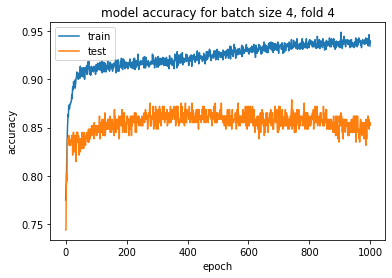

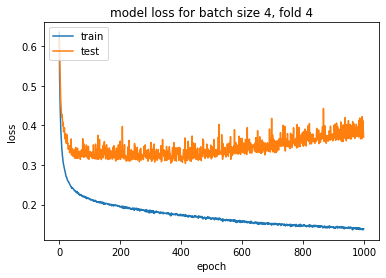

Epoch 1/1000
298/298 - 0s - loss: 0.7304 - accuracy: 0.7557 - val_loss: 0.6401 - val_accuracy: 0.7845
Epoch 2/1000
298/298 - 0s - loss: 0.6393 - accuracy: 0.7733 - val_loss: 0.6026 - val_accuracy: 0.7845
Epoch 3/1000
298/298 - 0s - loss: 0.6046 - accuracy: 0.7733 - val_loss: 0.5707 - val_accuracy: 0.7845
Epoch 4/1000
298/298 - 0s - loss: 0.5696 - accuracy: 0.7733 - val_loss: 0.5423 - val_accuracy: 0.7845
Epoch 5/1000
298/298 - 0s - loss: 0.5388 - accuracy: 0.7733 - val_loss: 0.5106 - val_accuracy: 0.7845
Epoch 6/1000
298/298 - 0s - loss: 0.5105 - accuracy: 0.7733 - val_loss: 0.4897 - val_accuracy: 0.7845
Epoch 7/1000
298/298 - 0s - loss: 0.4868 - accuracy: 0.7733 - val_loss: 0.4712 - val_accuracy: 0.7912
Epoch 8/1000
298/298 - 0s - loss: 0.4646 - accuracy: 0.7775 - val_loss: 0.4511 - val_accuracy: 0.8013
Epoch 9/1000
298/298 - 0s - loss: 0.4450 - accuracy: 0.7842 - val_loss: 0.4355 - val_accuracy: 0.8081
Epoch 10/1000
298/298 - 0s - loss: 0.4260 - accuracy: 0.7909 - val_loss: 0.4212 - 

Epoch 81/1000
298/298 - 0s - loss: 0.2425 - accuracy: 0.8908 - val_loss: 0.2442 - val_accuracy: 0.8923
Epoch 82/1000
298/298 - 0s - loss: 0.2408 - accuracy: 0.8992 - val_loss: 0.2506 - val_accuracy: 0.8822
Epoch 83/1000
298/298 - 0s - loss: 0.2427 - accuracy: 0.8959 - val_loss: 0.2365 - val_accuracy: 0.8956
Epoch 84/1000
298/298 - 0s - loss: 0.2422 - accuracy: 0.8900 - val_loss: 0.2366 - val_accuracy: 0.8889
Epoch 85/1000
298/298 - 0s - loss: 0.2414 - accuracy: 0.9009 - val_loss: 0.2356 - val_accuracy: 0.9125
Epoch 86/1000
298/298 - 0s - loss: 0.2419 - accuracy: 0.8984 - val_loss: 0.2346 - val_accuracy: 0.9091
Epoch 87/1000
298/298 - 0s - loss: 0.2415 - accuracy: 0.8950 - val_loss: 0.2377 - val_accuracy: 0.8923
Epoch 88/1000
298/298 - 0s - loss: 0.2413 - accuracy: 0.8959 - val_loss: 0.2352 - val_accuracy: 0.9125
Epoch 89/1000
298/298 - 0s - loss: 0.2403 - accuracy: 0.8925 - val_loss: 0.2338 - val_accuracy: 0.9091
Epoch 90/1000
298/298 - 0s - loss: 0.2405 - accuracy: 0.8925 - val_loss: 

Epoch 160/1000
298/298 - 0s - loss: 0.2246 - accuracy: 0.9001 - val_loss: 0.2266 - val_accuracy: 0.9091
Epoch 161/1000
298/298 - 0s - loss: 0.2236 - accuracy: 0.8992 - val_loss: 0.2370 - val_accuracy: 0.8889
Epoch 162/1000
298/298 - 0s - loss: 0.2238 - accuracy: 0.9018 - val_loss: 0.2269 - val_accuracy: 0.8923
Epoch 163/1000
298/298 - 0s - loss: 0.2212 - accuracy: 0.9026 - val_loss: 0.2379 - val_accuracy: 0.8923
Epoch 164/1000
298/298 - 0s - loss: 0.2235 - accuracy: 0.9009 - val_loss: 0.2342 - val_accuracy: 0.8990
Epoch 165/1000
298/298 - 0s - loss: 0.2205 - accuracy: 0.9051 - val_loss: 0.2264 - val_accuracy: 0.8889
Epoch 166/1000
298/298 - 0s - loss: 0.2219 - accuracy: 0.9009 - val_loss: 0.2318 - val_accuracy: 0.9091
Epoch 167/1000
298/298 - 0s - loss: 0.2219 - accuracy: 0.9018 - val_loss: 0.2417 - val_accuracy: 0.8923
Epoch 168/1000
298/298 - 0s - loss: 0.2217 - accuracy: 0.9060 - val_loss: 0.2314 - val_accuracy: 0.9057
Epoch 169/1000
298/298 - 0s - loss: 0.2220 - accuracy: 0.9018 - 

Epoch 239/1000
298/298 - 0s - loss: 0.2054 - accuracy: 0.9085 - val_loss: 0.2188 - val_accuracy: 0.9057
Epoch 240/1000
298/298 - 0s - loss: 0.2065 - accuracy: 0.9068 - val_loss: 0.2206 - val_accuracy: 0.8956
Epoch 241/1000
298/298 - 0s - loss: 0.2072 - accuracy: 0.9001 - val_loss: 0.2238 - val_accuracy: 0.9091
Epoch 242/1000
298/298 - 0s - loss: 0.2034 - accuracy: 0.9102 - val_loss: 0.2197 - val_accuracy: 0.9091
Epoch 243/1000
298/298 - 0s - loss: 0.2066 - accuracy: 0.9009 - val_loss: 0.2266 - val_accuracy: 0.9057
Epoch 244/1000
298/298 - 0s - loss: 0.2076 - accuracy: 0.9076 - val_loss: 0.2222 - val_accuracy: 0.9091
Epoch 245/1000
298/298 - 0s - loss: 0.2063 - accuracy: 0.9085 - val_loss: 0.2223 - val_accuracy: 0.9057
Epoch 246/1000
298/298 - 0s - loss: 0.2034 - accuracy: 0.9043 - val_loss: 0.2241 - val_accuracy: 0.9024
Epoch 247/1000
298/298 - 0s - loss: 0.2026 - accuracy: 0.9102 - val_loss: 0.2191 - val_accuracy: 0.9057
Epoch 248/1000
298/298 - 0s - loss: 0.2034 - accuracy: 0.9093 - 

Epoch 318/1000
298/298 - 0s - loss: 0.1891 - accuracy: 0.9144 - val_loss: 0.2207 - val_accuracy: 0.9057
Epoch 319/1000
298/298 - 0s - loss: 0.1892 - accuracy: 0.9102 - val_loss: 0.2155 - val_accuracy: 0.9091
Epoch 320/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9135 - val_loss: 0.2206 - val_accuracy: 0.9091
Epoch 321/1000
298/298 - 0s - loss: 0.1898 - accuracy: 0.9202 - val_loss: 0.2247 - val_accuracy: 0.8923
Epoch 322/1000
298/298 - 0s - loss: 0.1869 - accuracy: 0.9177 - val_loss: 0.2217 - val_accuracy: 0.8923
Epoch 323/1000
298/298 - 0s - loss: 0.1857 - accuracy: 0.9236 - val_loss: 0.2151 - val_accuracy: 0.9091
Epoch 324/1000
298/298 - 0s - loss: 0.1883 - accuracy: 0.9194 - val_loss: 0.2186 - val_accuracy: 0.9057
Epoch 325/1000
298/298 - 0s - loss: 0.1858 - accuracy: 0.9211 - val_loss: 0.2130 - val_accuracy: 0.9057
Epoch 326/1000
298/298 - 0s - loss: 0.1857 - accuracy: 0.9169 - val_loss: 0.2239 - val_accuracy: 0.8990
Epoch 327/1000
298/298 - 0s - loss: 0.1878 - accuracy: 0.9160 - 

Epoch 397/1000
298/298 - 0s - loss: 0.1712 - accuracy: 0.9261 - val_loss: 0.2265 - val_accuracy: 0.8990
Epoch 398/1000
298/298 - 0s - loss: 0.1734 - accuracy: 0.9278 - val_loss: 0.2107 - val_accuracy: 0.9024
Epoch 399/1000
298/298 - 0s - loss: 0.1730 - accuracy: 0.9186 - val_loss: 0.2154 - val_accuracy: 0.9024
Epoch 400/1000
298/298 - 0s - loss: 0.1733 - accuracy: 0.9278 - val_loss: 0.2104 - val_accuracy: 0.9057
Epoch 401/1000
298/298 - 0s - loss: 0.1711 - accuracy: 0.9219 - val_loss: 0.2069 - val_accuracy: 0.9125
Epoch 402/1000
298/298 - 0s - loss: 0.1742 - accuracy: 0.9219 - val_loss: 0.2092 - val_accuracy: 0.9057
Epoch 403/1000
298/298 - 0s - loss: 0.1749 - accuracy: 0.9202 - val_loss: 0.2063 - val_accuracy: 0.9091
Epoch 404/1000
298/298 - 0s - loss: 0.1724 - accuracy: 0.9236 - val_loss: 0.2254 - val_accuracy: 0.9024
Epoch 405/1000
298/298 - 0s - loss: 0.1706 - accuracy: 0.9270 - val_loss: 0.2046 - val_accuracy: 0.9057
Epoch 406/1000
298/298 - 0s - loss: 0.1742 - accuracy: 0.9219 - 

Epoch 476/1000
298/298 - 0s - loss: 0.1602 - accuracy: 0.9328 - val_loss: 0.2106 - val_accuracy: 0.9158
Epoch 477/1000
298/298 - 0s - loss: 0.1575 - accuracy: 0.9328 - val_loss: 0.2090 - val_accuracy: 0.9024
Epoch 478/1000
298/298 - 0s - loss: 0.1589 - accuracy: 0.9312 - val_loss: 0.2138 - val_accuracy: 0.8990
Epoch 479/1000
298/298 - 0s - loss: 0.1601 - accuracy: 0.9328 - val_loss: 0.2112 - val_accuracy: 0.9057
Epoch 480/1000
298/298 - 0s - loss: 0.1582 - accuracy: 0.9286 - val_loss: 0.2029 - val_accuracy: 0.9057
Epoch 481/1000
298/298 - 0s - loss: 0.1596 - accuracy: 0.9337 - val_loss: 0.2070 - val_accuracy: 0.9091
Epoch 482/1000
298/298 - 0s - loss: 0.1599 - accuracy: 0.9303 - val_loss: 0.2026 - val_accuracy: 0.9091
Epoch 483/1000
298/298 - 0s - loss: 0.1567 - accuracy: 0.9328 - val_loss: 0.2114 - val_accuracy: 0.9057
Epoch 484/1000
298/298 - 0s - loss: 0.1594 - accuracy: 0.9286 - val_loss: 0.2077 - val_accuracy: 0.9024
Epoch 485/1000
298/298 - 0s - loss: 0.1569 - accuracy: 0.9379 - 

Epoch 555/1000
298/298 - 0s - loss: 0.1476 - accuracy: 0.9395 - val_loss: 0.2095 - val_accuracy: 0.9057
Epoch 556/1000
298/298 - 0s - loss: 0.1475 - accuracy: 0.9387 - val_loss: 0.2008 - val_accuracy: 0.9024
Epoch 557/1000
298/298 - 0s - loss: 0.1463 - accuracy: 0.9387 - val_loss: 0.2077 - val_accuracy: 0.9091
Epoch 558/1000
298/298 - 0s - loss: 0.1484 - accuracy: 0.9362 - val_loss: 0.2056 - val_accuracy: 0.8990
Epoch 559/1000
298/298 - 0s - loss: 0.1486 - accuracy: 0.9328 - val_loss: 0.2183 - val_accuracy: 0.8956
Epoch 560/1000
298/298 - 0s - loss: 0.1460 - accuracy: 0.9337 - val_loss: 0.2115 - val_accuracy: 0.9057
Epoch 561/1000
298/298 - 0s - loss: 0.1477 - accuracy: 0.9337 - val_loss: 0.1989 - val_accuracy: 0.9057
Epoch 562/1000
298/298 - 0s - loss: 0.1467 - accuracy: 0.9379 - val_loss: 0.2122 - val_accuracy: 0.9024
Epoch 563/1000
298/298 - 0s - loss: 0.1456 - accuracy: 0.9387 - val_loss: 0.2112 - val_accuracy: 0.9057
Epoch 564/1000
298/298 - 0s - loss: 0.1472 - accuracy: 0.9362 - 

Epoch 634/1000
298/298 - 0s - loss: 0.1379 - accuracy: 0.9387 - val_loss: 0.1942 - val_accuracy: 0.9125
Epoch 635/1000
298/298 - 0s - loss: 0.1377 - accuracy: 0.9437 - val_loss: 0.2022 - val_accuracy: 0.9057
Epoch 636/1000
298/298 - 0s - loss: 0.1379 - accuracy: 0.9421 - val_loss: 0.2071 - val_accuracy: 0.8956
Epoch 637/1000
298/298 - 0s - loss: 0.1358 - accuracy: 0.9370 - val_loss: 0.1942 - val_accuracy: 0.9057
Epoch 638/1000
298/298 - 0s - loss: 0.1359 - accuracy: 0.9404 - val_loss: 0.1939 - val_accuracy: 0.9125
Epoch 639/1000
298/298 - 0s - loss: 0.1365 - accuracy: 0.9429 - val_loss: 0.1982 - val_accuracy: 0.9057
Epoch 640/1000
298/298 - 0s - loss: 0.1392 - accuracy: 0.9370 - val_loss: 0.2003 - val_accuracy: 0.9057
Epoch 641/1000
298/298 - 0s - loss: 0.1367 - accuracy: 0.9429 - val_loss: 0.2001 - val_accuracy: 0.9091
Epoch 642/1000
298/298 - 0s - loss: 0.1367 - accuracy: 0.9421 - val_loss: 0.1957 - val_accuracy: 0.9091
Epoch 643/1000
298/298 - 0s - loss: 0.1381 - accuracy: 0.9387 - 

Epoch 713/1000
298/298 - 0s - loss: 0.1316 - accuracy: 0.9454 - val_loss: 0.1911 - val_accuracy: 0.9158
Epoch 714/1000
298/298 - 0s - loss: 0.1291 - accuracy: 0.9454 - val_loss: 0.1851 - val_accuracy: 0.9125
Epoch 715/1000
298/298 - 0s - loss: 0.1315 - accuracy: 0.9471 - val_loss: 0.1865 - val_accuracy: 0.9192
Epoch 716/1000
298/298 - 0s - loss: 0.1277 - accuracy: 0.9421 - val_loss: 0.1954 - val_accuracy: 0.9125
Epoch 717/1000
298/298 - 0s - loss: 0.1294 - accuracy: 0.9412 - val_loss: 0.1963 - val_accuracy: 0.9091
Epoch 718/1000
298/298 - 0s - loss: 0.1277 - accuracy: 0.9463 - val_loss: 0.1881 - val_accuracy: 0.9158
Epoch 719/1000
298/298 - 0s - loss: 0.1258 - accuracy: 0.9513 - val_loss: 0.1928 - val_accuracy: 0.9192
Epoch 720/1000
298/298 - 0s - loss: 0.1299 - accuracy: 0.9421 - val_loss: 0.1979 - val_accuracy: 0.9091
Epoch 721/1000
298/298 - 0s - loss: 0.1287 - accuracy: 0.9471 - val_loss: 0.1886 - val_accuracy: 0.9226
Epoch 722/1000
298/298 - 0s - loss: 0.1302 - accuracy: 0.9454 - 

Epoch 792/1000
298/298 - 0s - loss: 0.1250 - accuracy: 0.9429 - val_loss: 0.2037 - val_accuracy: 0.9091
Epoch 793/1000
298/298 - 0s - loss: 0.1262 - accuracy: 0.9463 - val_loss: 0.2074 - val_accuracy: 0.9057
Epoch 794/1000
298/298 - 0s - loss: 0.1224 - accuracy: 0.9505 - val_loss: 0.1875 - val_accuracy: 0.9158
Epoch 795/1000
298/298 - 0s - loss: 0.1244 - accuracy: 0.9471 - val_loss: 0.1885 - val_accuracy: 0.9158
Epoch 796/1000
298/298 - 0s - loss: 0.1244 - accuracy: 0.9505 - val_loss: 0.1793 - val_accuracy: 0.9192
Epoch 797/1000
298/298 - 0s - loss: 0.1229 - accuracy: 0.9505 - val_loss: 0.1860 - val_accuracy: 0.9192
Epoch 798/1000
298/298 - 0s - loss: 0.1235 - accuracy: 0.9488 - val_loss: 0.1884 - val_accuracy: 0.9192
Epoch 799/1000
298/298 - 0s - loss: 0.1222 - accuracy: 0.9471 - val_loss: 0.1952 - val_accuracy: 0.9125
Epoch 800/1000
298/298 - 0s - loss: 0.1258 - accuracy: 0.9513 - val_loss: 0.1926 - val_accuracy: 0.9259
Epoch 801/1000
298/298 - 0s - loss: 0.1211 - accuracy: 0.9547 - 

Epoch 871/1000
298/298 - 0s - loss: 0.1202 - accuracy: 0.9572 - val_loss: 0.1838 - val_accuracy: 0.9192
Epoch 872/1000
298/298 - 0s - loss: 0.1182 - accuracy: 0.9538 - val_loss: 0.1942 - val_accuracy: 0.9226
Epoch 873/1000
298/298 - 0s - loss: 0.1195 - accuracy: 0.9547 - val_loss: 0.1862 - val_accuracy: 0.9192
Epoch 874/1000
298/298 - 0s - loss: 0.1190 - accuracy: 0.9530 - val_loss: 0.1956 - val_accuracy: 0.9158
Epoch 875/1000
298/298 - 0s - loss: 0.1164 - accuracy: 0.9521 - val_loss: 0.2058 - val_accuracy: 0.9158
Epoch 876/1000
298/298 - 0s - loss: 0.1178 - accuracy: 0.9521 - val_loss: 0.1847 - val_accuracy: 0.9293
Epoch 877/1000
298/298 - 0s - loss: 0.1187 - accuracy: 0.9563 - val_loss: 0.1800 - val_accuracy: 0.9226
Epoch 878/1000
298/298 - 0s - loss: 0.1190 - accuracy: 0.9496 - val_loss: 0.1942 - val_accuracy: 0.9125
Epoch 879/1000
298/298 - 0s - loss: 0.1199 - accuracy: 0.9505 - val_loss: 0.1861 - val_accuracy: 0.9158
Epoch 880/1000
298/298 - 0s - loss: 0.1166 - accuracy: 0.9547 - 

Epoch 950/1000
298/298 - 0s - loss: 0.1112 - accuracy: 0.9547 - val_loss: 0.1885 - val_accuracy: 0.9192
Epoch 951/1000
298/298 - 0s - loss: 0.1144 - accuracy: 0.9538 - val_loss: 0.2108 - val_accuracy: 0.9226
Epoch 952/1000
298/298 - 0s - loss: 0.1174 - accuracy: 0.9521 - val_loss: 0.1986 - val_accuracy: 0.9226
Epoch 953/1000
298/298 - 0s - loss: 0.1120 - accuracy: 0.9563 - val_loss: 0.1859 - val_accuracy: 0.9226
Epoch 954/1000
298/298 - 0s - loss: 0.1145 - accuracy: 0.9572 - val_loss: 0.1963 - val_accuracy: 0.9192
Epoch 955/1000
298/298 - 0s - loss: 0.1157 - accuracy: 0.9530 - val_loss: 0.1914 - val_accuracy: 0.9192
Epoch 956/1000
298/298 - 0s - loss: 0.1159 - accuracy: 0.9521 - val_loss: 0.1922 - val_accuracy: 0.9192
Epoch 957/1000
298/298 - 0s - loss: 0.1149 - accuracy: 0.9505 - val_loss: 0.1902 - val_accuracy: 0.9158
Epoch 958/1000
298/298 - 0s - loss: 0.1115 - accuracy: 0.9538 - val_loss: 0.1900 - val_accuracy: 0.9158
Epoch 959/1000
298/298 - 0s - loss: 0.1119 - accuracy: 0.9563 - 

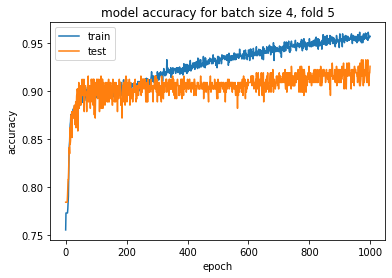

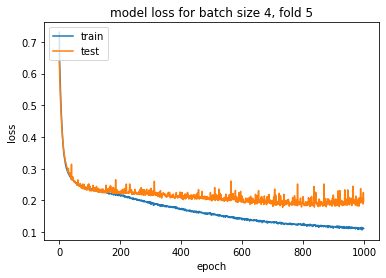

Epoch 1/1000
149/149 - 0s - loss: 0.7635 - accuracy: 0.7641 - val_loss: 0.6349 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6536 - accuracy: 0.7708 - val_loss: 0.6022 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.6269 - accuracy: 0.7708 - val_loss: 0.5787 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.6025 - accuracy: 0.7708 - val_loss: 0.5582 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.5791 - accuracy: 0.7708 - val_loss: 0.5384 - val_accuracy: 0.7946
Epoch 6/1000
149/149 - 0s - loss: 0.5557 - accuracy: 0.7708 - val_loss: 0.5194 - val_accuracy: 0.7946
Epoch 7/1000
149/149 - 0s - loss: 0.5335 - accuracy: 0.7708 - val_loss: 0.5011 - val_accuracy: 0.7946
Epoch 8/1000
149/149 - 0s - loss: 0.5140 - accuracy: 0.7708 - val_loss: 0.4819 - val_accuracy: 0.7946
Epoch 9/1000
149/149 - 0s - loss: 0.4970 - accuracy: 0.7716 - val_loss: 0.4671 - val_accuracy: 0.8013
Epoch 10/1000
149/149 - 0s - loss: 0.4816 - accuracy: 0.7800 - val_loss: 0.4545 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2643 - accuracy: 0.8908 - val_loss: 0.2609 - val_accuracy: 0.8956
Epoch 82/1000
149/149 - 0s - loss: 0.2647 - accuracy: 0.8908 - val_loss: 0.2607 - val_accuracy: 0.9024
Epoch 83/1000
149/149 - 0s - loss: 0.2638 - accuracy: 0.8908 - val_loss: 0.2637 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2637 - accuracy: 0.8900 - val_loss: 0.2612 - val_accuracy: 0.9057
Epoch 85/1000
149/149 - 0s - loss: 0.2624 - accuracy: 0.8942 - val_loss: 0.2591 - val_accuracy: 0.8956
Epoch 86/1000
149/149 - 0s - loss: 0.2628 - accuracy: 0.8883 - val_loss: 0.2604 - val_accuracy: 0.9024
Epoch 87/1000
149/149 - 0s - loss: 0.2626 - accuracy: 0.8858 - val_loss: 0.2578 - val_accuracy: 0.8990
Epoch 88/1000
149/149 - 0s - loss: 0.2607 - accuracy: 0.8942 - val_loss: 0.2590 - val_accuracy: 0.9057
Epoch 89/1000
149/149 - 0s - loss: 0.2612 - accuracy: 0.8917 - val_loss: 0.2580 - val_accuracy: 0.8956
Epoch 90/1000
149/149 - 0s - loss: 0.2610 - accuracy: 0.8917 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2395 - accuracy: 0.8992 - val_loss: 0.2466 - val_accuracy: 0.8956
Epoch 161/1000
149/149 - 0s - loss: 0.2396 - accuracy: 0.8984 - val_loss: 0.2456 - val_accuracy: 0.9024
Epoch 162/1000
149/149 - 0s - loss: 0.2378 - accuracy: 0.8967 - val_loss: 0.2452 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2381 - accuracy: 0.9009 - val_loss: 0.2457 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2385 - accuracy: 0.9001 - val_loss: 0.2466 - val_accuracy: 0.8990
Epoch 165/1000
149/149 - 0s - loss: 0.2374 - accuracy: 0.9026 - val_loss: 0.2508 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2368 - accuracy: 0.8967 - val_loss: 0.2469 - val_accuracy: 0.8956
Epoch 167/1000
149/149 - 0s - loss: 0.2371 - accuracy: 0.8992 - val_loss: 0.2465 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2380 - accuracy: 0.9001 - val_loss: 0.2458 - val_accuracy: 0.9057
Epoch 169/1000
149/149 - 0s - loss: 0.2370 - accuracy: 0.8967 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9018 - val_loss: 0.2380 - val_accuracy: 0.8990
Epoch 240/1000
149/149 - 0s - loss: 0.2232 - accuracy: 0.9043 - val_loss: 0.2456 - val_accuracy: 0.9158
Epoch 241/1000
149/149 - 0s - loss: 0.2255 - accuracy: 0.9026 - val_loss: 0.2358 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2233 - accuracy: 0.9043 - val_loss: 0.2425 - val_accuracy: 0.8990
Epoch 243/1000
149/149 - 0s - loss: 0.2248 - accuracy: 0.9018 - val_loss: 0.2343 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2250 - accuracy: 0.9034 - val_loss: 0.2367 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9085 - val_loss: 0.2355 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2243 - accuracy: 0.9018 - val_loss: 0.2371 - val_accuracy: 0.9057
Epoch 247/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9018 - val_loss: 0.2335 - val_accuracy: 0.9057
Epoch 248/1000
149/149 - 0s - loss: 0.2236 - accuracy: 0.9076 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9009 - val_loss: 0.2253 - val_accuracy: 0.8990
Epoch 319/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9093 - val_loss: 0.2276 - val_accuracy: 0.9125
Epoch 320/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9076 - val_loss: 0.2301 - val_accuracy: 0.8990
Epoch 321/1000
149/149 - 0s - loss: 0.2136 - accuracy: 0.9051 - val_loss: 0.2287 - val_accuracy: 0.8990
Epoch 322/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9043 - val_loss: 0.2294 - val_accuracy: 0.8990
Epoch 323/1000
149/149 - 0s - loss: 0.2126 - accuracy: 0.9068 - val_loss: 0.2324 - val_accuracy: 0.8990
Epoch 324/1000
149/149 - 0s - loss: 0.2139 - accuracy: 0.9026 - val_loss: 0.2249 - val_accuracy: 0.9091
Epoch 325/1000
149/149 - 0s - loss: 0.2143 - accuracy: 0.9051 - val_loss: 0.2250 - val_accuracy: 0.8990
Epoch 326/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9034 - val_loss: 0.2251 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9068 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2050 - accuracy: 0.9093 - val_loss: 0.2185 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.2047 - accuracy: 0.9085 - val_loss: 0.2206 - val_accuracy: 0.9057
Epoch 399/1000
149/149 - 0s - loss: 0.2056 - accuracy: 0.9085 - val_loss: 0.2188 - val_accuracy: 0.9024
Epoch 400/1000
149/149 - 0s - loss: 0.2025 - accuracy: 0.9118 - val_loss: 0.2193 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.2049 - accuracy: 0.9110 - val_loss: 0.2190 - val_accuracy: 0.8990
Epoch 402/1000
149/149 - 0s - loss: 0.2052 - accuracy: 0.9118 - val_loss: 0.2187 - val_accuracy: 0.9024
Epoch 403/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9127 - val_loss: 0.2187 - val_accuracy: 0.9024
Epoch 404/1000
149/149 - 0s - loss: 0.2028 - accuracy: 0.9135 - val_loss: 0.2213 - val_accuracy: 0.9125
Epoch 405/1000
149/149 - 0s - loss: 0.2038 - accuracy: 0.9118 - val_loss: 0.2167 - val_accuracy: 0.8990
Epoch 406/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9102 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9152 - val_loss: 0.2139 - val_accuracy: 0.9024
Epoch 477/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9169 - val_loss: 0.2178 - val_accuracy: 0.8889
Epoch 478/1000
149/149 - 0s - loss: 0.1984 - accuracy: 0.9169 - val_loss: 0.2130 - val_accuracy: 0.8990
Epoch 479/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9144 - val_loss: 0.2147 - val_accuracy: 0.8923
Epoch 480/1000
149/149 - 0s - loss: 0.1962 - accuracy: 0.9169 - val_loss: 0.2130 - val_accuracy: 0.9024
Epoch 481/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9152 - val_loss: 0.2175 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9118 - val_loss: 0.2143 - val_accuracy: 0.8956
Epoch 483/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9186 - val_loss: 0.2122 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9102 - val_loss: 0.2153 - val_accuracy: 0.9024
Epoch 485/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9169 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1909 - accuracy: 0.9152 - val_loss: 0.2120 - val_accuracy: 0.8923
Epoch 556/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9194 - val_loss: 0.2120 - val_accuracy: 0.8923
Epoch 557/1000
149/149 - 0s - loss: 0.1910 - accuracy: 0.9127 - val_loss: 0.2134 - val_accuracy: 0.9091
Epoch 558/1000
149/149 - 0s - loss: 0.1922 - accuracy: 0.9118 - val_loss: 0.2123 - val_accuracy: 0.8990
Epoch 559/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9219 - val_loss: 0.2123 - val_accuracy: 0.8889
Epoch 560/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9186 - val_loss: 0.2110 - val_accuracy: 0.9024
Epoch 561/1000
149/149 - 0s - loss: 0.1906 - accuracy: 0.9144 - val_loss: 0.2197 - val_accuracy: 0.8990
Epoch 562/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9177 - val_loss: 0.2120 - val_accuracy: 0.8923
Epoch 563/1000
149/149 - 0s - loss: 0.1909 - accuracy: 0.9186 - val_loss: 0.2111 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9177 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1866 - accuracy: 0.9186 - val_loss: 0.2081 - val_accuracy: 0.8956
Epoch 635/1000
149/149 - 0s - loss: 0.1869 - accuracy: 0.9169 - val_loss: 0.2123 - val_accuracy: 0.8889
Epoch 636/1000
149/149 - 0s - loss: 0.1864 - accuracy: 0.9177 - val_loss: 0.2089 - val_accuracy: 0.8956
Epoch 637/1000
149/149 - 0s - loss: 0.1872 - accuracy: 0.9177 - val_loss: 0.2151 - val_accuracy: 0.8889
Epoch 638/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9228 - val_loss: 0.2216 - val_accuracy: 0.9158
Epoch 639/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9186 - val_loss: 0.2088 - val_accuracy: 0.8956
Epoch 640/1000
149/149 - 0s - loss: 0.1865 - accuracy: 0.9228 - val_loss: 0.2085 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9202 - val_loss: 0.2070 - val_accuracy: 0.8990
Epoch 642/1000
149/149 - 0s - loss: 0.1872 - accuracy: 0.9144 - val_loss: 0.2081 - val_accuracy: 0.8923
Epoch 643/1000
149/149 - 0s - loss: 0.1846 - accuracy: 0.9202 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1814 - accuracy: 0.9244 - val_loss: 0.2122 - val_accuracy: 0.8923
Epoch 714/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9228 - val_loss: 0.2088 - val_accuracy: 0.8855
Epoch 715/1000
149/149 - 0s - loss: 0.1813 - accuracy: 0.9228 - val_loss: 0.2076 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.1819 - accuracy: 0.9253 - val_loss: 0.2061 - val_accuracy: 0.9024
Epoch 717/1000
149/149 - 0s - loss: 0.1782 - accuracy: 0.9244 - val_loss: 0.2195 - val_accuracy: 0.8956
Epoch 718/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9194 - val_loss: 0.2062 - val_accuracy: 0.9024
Epoch 719/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9211 - val_loss: 0.2096 - val_accuracy: 0.8956
Epoch 720/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9236 - val_loss: 0.2103 - val_accuracy: 0.8923
Epoch 721/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9270 - val_loss: 0.2060 - val_accuracy: 0.8990
Epoch 722/1000
149/149 - 0s - loss: 0.1821 - accuracy: 0.9236 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1787 - accuracy: 0.9270 - val_loss: 0.2073 - val_accuracy: 0.9024
Epoch 793/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9270 - val_loss: 0.2075 - val_accuracy: 0.9057
Epoch 794/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9228 - val_loss: 0.2059 - val_accuracy: 0.8956
Epoch 795/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9186 - val_loss: 0.2071 - val_accuracy: 0.9024
Epoch 796/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9253 - val_loss: 0.2117 - val_accuracy: 0.8956
Epoch 797/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9261 - val_loss: 0.2051 - val_accuracy: 0.9024
Epoch 798/1000
149/149 - 0s - loss: 0.1773 - accuracy: 0.9202 - val_loss: 0.2146 - val_accuracy: 0.8956
Epoch 799/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9253 - val_loss: 0.2087 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9202 - val_loss: 0.2049 - val_accuracy: 0.9057
Epoch 801/1000
149/149 - 0s - loss: 0.1770 - accuracy: 0.9219 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1735 - accuracy: 0.9219 - val_loss: 0.2091 - val_accuracy: 0.9024
Epoch 872/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9261 - val_loss: 0.2033 - val_accuracy: 0.9057
Epoch 873/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9261 - val_loss: 0.2045 - val_accuracy: 0.9024
Epoch 874/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9328 - val_loss: 0.2063 - val_accuracy: 0.9057
Epoch 875/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9270 - val_loss: 0.2114 - val_accuracy: 0.9125
Epoch 876/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9261 - val_loss: 0.2064 - val_accuracy: 0.9057
Epoch 877/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9219 - val_loss: 0.2045 - val_accuracy: 0.9057
Epoch 878/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9270 - val_loss: 0.2075 - val_accuracy: 0.9091
Epoch 879/1000
149/149 - 0s - loss: 0.1720 - accuracy: 0.9295 - val_loss: 0.2069 - val_accuracy: 0.9024
Epoch 880/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9253 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9295 - val_loss: 0.2044 - val_accuracy: 0.8990
Epoch 951/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9295 - val_loss: 0.2038 - val_accuracy: 0.9091
Epoch 952/1000
149/149 - 0s - loss: 0.1684 - accuracy: 0.9261 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 953/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9244 - val_loss: 0.2055 - val_accuracy: 0.9024
Epoch 954/1000
149/149 - 0s - loss: 0.1657 - accuracy: 0.9337 - val_loss: 0.2024 - val_accuracy: 0.9024
Epoch 955/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9261 - val_loss: 0.2041 - val_accuracy: 0.9024
Epoch 956/1000
149/149 - 0s - loss: 0.1660 - accuracy: 0.9328 - val_loss: 0.2026 - val_accuracy: 0.9057
Epoch 957/1000
149/149 - 0s - loss: 0.1677 - accuracy: 0.9286 - val_loss: 0.2076 - val_accuracy: 0.9024
Epoch 958/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9312 - val_loss: 0.2054 - val_accuracy: 0.9024
Epoch 959/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9261 - 

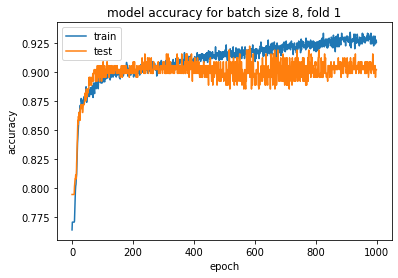

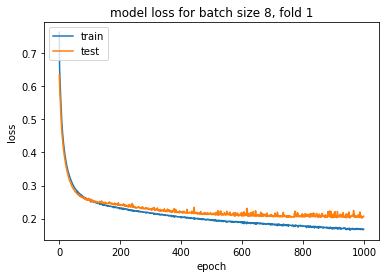

Epoch 1/1000
149/149 - 0s - loss: 0.8930 - accuracy: 0.6356 - val_loss: 0.7232 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.6595 - accuracy: 0.7800 - val_loss: 0.6665 - val_accuracy: 0.7576
Epoch 3/1000
149/149 - 0s - loss: 0.6250 - accuracy: 0.7800 - val_loss: 0.6371 - val_accuracy: 0.7576
Epoch 4/1000
149/149 - 0s - loss: 0.6042 - accuracy: 0.7800 - val_loss: 0.6112 - val_accuracy: 0.7576
Epoch 5/1000
149/149 - 0s - loss: 0.5862 - accuracy: 0.7800 - val_loss: 0.5886 - val_accuracy: 0.7576
Epoch 6/1000
149/149 - 0s - loss: 0.5690 - accuracy: 0.7800 - val_loss: 0.5666 - val_accuracy: 0.7710
Epoch 7/1000
149/149 - 0s - loss: 0.5531 - accuracy: 0.7825 - val_loss: 0.5477 - val_accuracy: 0.7710
Epoch 8/1000
149/149 - 0s - loss: 0.5386 - accuracy: 0.7901 - val_loss: 0.5314 - val_accuracy: 0.7710
Epoch 9/1000
149/149 - 0s - loss: 0.5248 - accuracy: 0.7901 - val_loss: 0.5131 - val_accuracy: 0.7811
Epoch 10/1000
149/149 - 0s - loss: 0.5112 - accuracy: 0.7968 - val_loss: 0.4973 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2593 - accuracy: 0.8959 - val_loss: 0.2587 - val_accuracy: 0.9192
Epoch 82/1000
149/149 - 0s - loss: 0.2580 - accuracy: 0.8908 - val_loss: 0.2551 - val_accuracy: 0.9192
Epoch 83/1000
149/149 - 0s - loss: 0.2571 - accuracy: 0.8942 - val_loss: 0.2532 - val_accuracy: 0.9091
Epoch 84/1000
149/149 - 0s - loss: 0.2560 - accuracy: 0.9001 - val_loss: 0.2531 - val_accuracy: 0.9091
Epoch 85/1000
149/149 - 0s - loss: 0.2546 - accuracy: 0.8942 - val_loss: 0.2534 - val_accuracy: 0.9192
Epoch 86/1000
149/149 - 0s - loss: 0.2554 - accuracy: 0.8917 - val_loss: 0.2546 - val_accuracy: 0.9158
Epoch 87/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8917 - val_loss: 0.2564 - val_accuracy: 0.9192
Epoch 88/1000
149/149 - 0s - loss: 0.2521 - accuracy: 0.8959 - val_loss: 0.2532 - val_accuracy: 0.9125
Epoch 89/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8967 - val_loss: 0.2536 - val_accuracy: 0.9125
Epoch 90/1000
149/149 - 0s - loss: 0.2522 - accuracy: 0.8934 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2251 - accuracy: 0.9051 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 161/1000
149/149 - 0s - loss: 0.2242 - accuracy: 0.9034 - val_loss: 0.2572 - val_accuracy: 0.8956
Epoch 162/1000
149/149 - 0s - loss: 0.2236 - accuracy: 0.9026 - val_loss: 0.2495 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2236 - accuracy: 0.9060 - val_loss: 0.2507 - val_accuracy: 0.9091
Epoch 164/1000
149/149 - 0s - loss: 0.2244 - accuracy: 0.9001 - val_loss: 0.2482 - val_accuracy: 0.9091
Epoch 165/1000
149/149 - 0s - loss: 0.2227 - accuracy: 0.9068 - val_loss: 0.2529 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2216 - accuracy: 0.9034 - val_loss: 0.2535 - val_accuracy: 0.9024
Epoch 167/1000
149/149 - 0s - loss: 0.2226 - accuracy: 0.9085 - val_loss: 0.2503 - val_accuracy: 0.9024
Epoch 168/1000
149/149 - 0s - loss: 0.2223 - accuracy: 0.9043 - val_loss: 0.2476 - val_accuracy: 0.9024
Epoch 169/1000
149/149 - 0s - loss: 0.2230 - accuracy: 0.9026 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2097 - accuracy: 0.9076 - val_loss: 0.2449 - val_accuracy: 0.9024
Epoch 240/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9093 - val_loss: 0.2532 - val_accuracy: 0.8923
Epoch 241/1000
149/149 - 0s - loss: 0.2107 - accuracy: 0.9068 - val_loss: 0.2467 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2088 - accuracy: 0.9127 - val_loss: 0.2435 - val_accuracy: 0.9125
Epoch 243/1000
149/149 - 0s - loss: 0.2101 - accuracy: 0.9068 - val_loss: 0.2468 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2101 - accuracy: 0.9110 - val_loss: 0.2483 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2078 - accuracy: 0.9085 - val_loss: 0.2419 - val_accuracy: 0.9125
Epoch 246/1000
149/149 - 0s - loss: 0.2098 - accuracy: 0.9093 - val_loss: 0.2485 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2073 - accuracy: 0.9118 - val_loss: 0.2517 - val_accuracy: 0.8990
Epoch 248/1000
149/149 - 0s - loss: 0.2084 - accuracy: 0.9127 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1995 - accuracy: 0.9135 - val_loss: 0.2499 - val_accuracy: 0.9024
Epoch 319/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9110 - val_loss: 0.2457 - val_accuracy: 0.9024
Epoch 320/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9102 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 321/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9093 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 322/1000
149/149 - 0s - loss: 0.2005 - accuracy: 0.9093 - val_loss: 0.2439 - val_accuracy: 0.9091
Epoch 323/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9085 - val_loss: 0.2462 - val_accuracy: 0.9024
Epoch 324/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9076 - val_loss: 0.2437 - val_accuracy: 0.9091
Epoch 325/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9093 - val_loss: 0.2467 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9093 - val_loss: 0.2457 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.1985 - accuracy: 0.9034 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9177 - val_loss: 0.2417 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9152 - val_loss: 0.2378 - val_accuracy: 0.9125
Epoch 399/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9135 - val_loss: 0.2416 - val_accuracy: 0.9057
Epoch 400/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9135 - val_loss: 0.2438 - val_accuracy: 0.9091
Epoch 401/1000
149/149 - 0s - loss: 0.1890 - accuracy: 0.9160 - val_loss: 0.2545 - val_accuracy: 0.8990
Epoch 402/1000
149/149 - 0s - loss: 0.1904 - accuracy: 0.9110 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 403/1000
149/149 - 0s - loss: 0.1895 - accuracy: 0.9135 - val_loss: 0.2463 - val_accuracy: 0.9024
Epoch 404/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9160 - val_loss: 0.2550 - val_accuracy: 0.8923
Epoch 405/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9152 - val_loss: 0.2489 - val_accuracy: 0.8990
Epoch 406/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9144 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1845 - accuracy: 0.9152 - val_loss: 0.2437 - val_accuracy: 0.9057
Epoch 477/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9202 - val_loss: 0.2365 - val_accuracy: 0.9091
Epoch 478/1000
149/149 - 0s - loss: 0.1830 - accuracy: 0.9194 - val_loss: 0.2417 - val_accuracy: 0.9057
Epoch 479/1000
149/149 - 0s - loss: 0.1835 - accuracy: 0.9186 - val_loss: 0.2420 - val_accuracy: 0.9057
Epoch 480/1000
149/149 - 0s - loss: 0.1821 - accuracy: 0.9202 - val_loss: 0.2546 - val_accuracy: 0.8923
Epoch 481/1000
149/149 - 0s - loss: 0.1831 - accuracy: 0.9194 - val_loss: 0.2417 - val_accuracy: 0.9057
Epoch 482/1000
149/149 - 0s - loss: 0.1823 - accuracy: 0.9160 - val_loss: 0.2537 - val_accuracy: 0.8956
Epoch 483/1000
149/149 - 0s - loss: 0.1826 - accuracy: 0.9186 - val_loss: 0.2481 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9169 - val_loss: 0.2414 - val_accuracy: 0.9024
Epoch 485/1000
149/149 - 0s - loss: 0.1836 - accuracy: 0.9152 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9236 - val_loss: 0.2449 - val_accuracy: 0.9024
Epoch 556/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9160 - val_loss: 0.2551 - val_accuracy: 0.8923
Epoch 557/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9186 - val_loss: 0.2508 - val_accuracy: 0.8956
Epoch 558/1000
149/149 - 0s - loss: 0.1785 - accuracy: 0.9186 - val_loss: 0.2373 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9244 - val_loss: 0.2515 - val_accuracy: 0.8990
Epoch 560/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9228 - val_loss: 0.2488 - val_accuracy: 0.8990
Epoch 561/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9211 - val_loss: 0.2515 - val_accuracy: 0.9024
Epoch 562/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9211 - val_loss: 0.2404 - val_accuracy: 0.9057
Epoch 563/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9211 - val_loss: 0.2397 - val_accuracy: 0.9091
Epoch 564/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9211 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9261 - val_loss: 0.2472 - val_accuracy: 0.8923
Epoch 635/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9211 - val_loss: 0.2495 - val_accuracy: 0.8990
Epoch 636/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9261 - val_loss: 0.2412 - val_accuracy: 0.9057
Epoch 637/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9211 - val_loss: 0.2451 - val_accuracy: 0.8956
Epoch 638/1000
149/149 - 0s - loss: 0.1719 - accuracy: 0.9236 - val_loss: 0.2505 - val_accuracy: 0.8956
Epoch 639/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9228 - val_loss: 0.2441 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.1729 - accuracy: 0.9228 - val_loss: 0.2490 - val_accuracy: 0.8956
Epoch 641/1000
149/149 - 0s - loss: 0.1724 - accuracy: 0.9270 - val_loss: 0.2427 - val_accuracy: 0.8990
Epoch 642/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9177 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 643/1000
149/149 - 0s - loss: 0.1715 - accuracy: 0.9286 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9320 - val_loss: 0.2473 - val_accuracy: 0.8923
Epoch 714/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9278 - val_loss: 0.2504 - val_accuracy: 0.8923
Epoch 715/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9253 - val_loss: 0.2489 - val_accuracy: 0.8956
Epoch 716/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9295 - val_loss: 0.2457 - val_accuracy: 0.8956
Epoch 717/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9211 - val_loss: 0.2459 - val_accuracy: 0.9057
Epoch 718/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9228 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 719/1000
149/149 - 0s - loss: 0.1682 - accuracy: 0.9303 - val_loss: 0.2540 - val_accuracy: 0.8990
Epoch 720/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9270 - val_loss: 0.2571 - val_accuracy: 0.8923
Epoch 721/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9278 - val_loss: 0.2549 - val_accuracy: 0.8889
Epoch 722/1000
149/149 - 0s - loss: 0.1700 - accuracy: 0.9303 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9270 - val_loss: 0.2472 - val_accuracy: 0.9057
Epoch 793/1000
149/149 - 0s - loss: 0.1640 - accuracy: 0.9286 - val_loss: 0.2529 - val_accuracy: 0.8889
Epoch 794/1000
149/149 - 0s - loss: 0.1670 - accuracy: 0.9320 - val_loss: 0.2522 - val_accuracy: 0.8990
Epoch 795/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9278 - val_loss: 0.2543 - val_accuracy: 0.8923
Epoch 796/1000
149/149 - 0s - loss: 0.1643 - accuracy: 0.9320 - val_loss: 0.2488 - val_accuracy: 0.8990
Epoch 797/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9312 - val_loss: 0.2573 - val_accuracy: 0.8855
Epoch 798/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9295 - val_loss: 0.2567 - val_accuracy: 0.8923
Epoch 799/1000
149/149 - 0s - loss: 0.1637 - accuracy: 0.9261 - val_loss: 0.2422 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1652 - accuracy: 0.9278 - val_loss: 0.2571 - val_accuracy: 0.8923
Epoch 801/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9228 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1600 - accuracy: 0.9320 - val_loss: 0.2448 - val_accuracy: 0.9057
Epoch 872/1000
149/149 - 0s - loss: 0.1613 - accuracy: 0.9312 - val_loss: 0.2529 - val_accuracy: 0.8956
Epoch 873/1000
149/149 - 0s - loss: 0.1607 - accuracy: 0.9312 - val_loss: 0.2521 - val_accuracy: 0.8956
Epoch 874/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9328 - val_loss: 0.2444 - val_accuracy: 0.9057
Epoch 875/1000
149/149 - 0s - loss: 0.1609 - accuracy: 0.9303 - val_loss: 0.2578 - val_accuracy: 0.8990
Epoch 876/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9295 - val_loss: 0.2603 - val_accuracy: 0.8956
Epoch 877/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9312 - val_loss: 0.2488 - val_accuracy: 0.9091
Epoch 878/1000
149/149 - 0s - loss: 0.1623 - accuracy: 0.9353 - val_loss: 0.2479 - val_accuracy: 0.9057
Epoch 879/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9295 - val_loss: 0.2507 - val_accuracy: 0.9057
Epoch 880/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9337 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1580 - accuracy: 0.9328 - val_loss: 0.2678 - val_accuracy: 0.8923
Epoch 951/1000
149/149 - 0s - loss: 0.1588 - accuracy: 0.9337 - val_loss: 0.2751 - val_accuracy: 0.8923
Epoch 952/1000
149/149 - 0s - loss: 0.1578 - accuracy: 0.9328 - val_loss: 0.2780 - val_accuracy: 0.8788
Epoch 953/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9328 - val_loss: 0.2709 - val_accuracy: 0.8855
Epoch 954/1000
149/149 - 0s - loss: 0.1568 - accuracy: 0.9362 - val_loss: 0.2520 - val_accuracy: 0.8956
Epoch 955/1000
149/149 - 0s - loss: 0.1583 - accuracy: 0.9312 - val_loss: 0.2650 - val_accuracy: 0.8923
Epoch 956/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9278 - val_loss: 0.2757 - val_accuracy: 0.8923
Epoch 957/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9337 - val_loss: 0.2522 - val_accuracy: 0.9024
Epoch 958/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9345 - val_loss: 0.2525 - val_accuracy: 0.8956
Epoch 959/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9353 - 

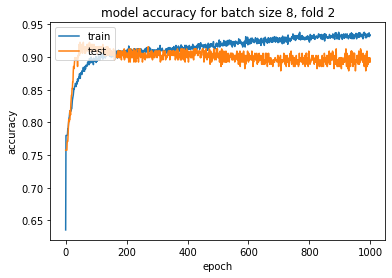

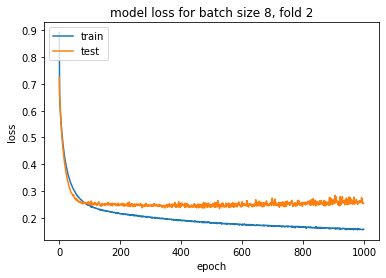

Epoch 1/1000
149/149 - 0s - loss: 0.7645 - accuracy: 0.7481 - val_loss: 0.6146 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6359 - accuracy: 0.7699 - val_loss: 0.5615 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.5934 - accuracy: 0.7699 - val_loss: 0.5298 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5650 - accuracy: 0.7691 - val_loss: 0.5095 - val_accuracy: 0.8013
Epoch 5/1000
149/149 - 0s - loss: 0.5420 - accuracy: 0.7691 - val_loss: 0.4849 - val_accuracy: 0.8081
Epoch 6/1000
149/149 - 0s - loss: 0.5219 - accuracy: 0.7767 - val_loss: 0.4729 - val_accuracy: 0.8215
Epoch 7/1000
149/149 - 0s - loss: 0.5052 - accuracy: 0.7909 - val_loss: 0.4525 - val_accuracy: 0.8215
Epoch 8/1000
149/149 - 0s - loss: 0.4892 - accuracy: 0.7951 - val_loss: 0.4360 - val_accuracy: 0.8215
Epoch 9/1000
149/149 - 0s - loss: 0.4748 - accuracy: 0.8010 - val_loss: 0.4256 - val_accuracy: 0.8350
Epoch 10/1000
149/149 - 0s - loss: 0.4607 - accuracy: 0.8010 - val_loss: 0.4111 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2570 - accuracy: 0.8917 - val_loss: 0.2546 - val_accuracy: 0.8923
Epoch 82/1000
149/149 - 0s - loss: 0.2568 - accuracy: 0.8875 - val_loss: 0.2499 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2567 - accuracy: 0.8917 - val_loss: 0.2381 - val_accuracy: 0.8956
Epoch 84/1000
149/149 - 0s - loss: 0.2546 - accuracy: 0.8934 - val_loss: 0.2390 - val_accuracy: 0.8754
Epoch 85/1000
149/149 - 0s - loss: 0.2540 - accuracy: 0.8959 - val_loss: 0.2412 - val_accuracy: 0.8788
Epoch 86/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8925 - val_loss: 0.2405 - val_accuracy: 0.8788
Epoch 87/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8900 - val_loss: 0.2383 - val_accuracy: 0.8754
Epoch 88/1000
149/149 - 0s - loss: 0.2520 - accuracy: 0.9001 - val_loss: 0.2353 - val_accuracy: 0.9024
Epoch 89/1000
149/149 - 0s - loss: 0.2533 - accuracy: 0.8942 - val_loss: 0.2354 - val_accuracy: 0.8889
Epoch 90/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8942 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2355 - accuracy: 0.9018 - val_loss: 0.2180 - val_accuracy: 0.8923
Epoch 161/1000
149/149 - 0s - loss: 0.2343 - accuracy: 0.9026 - val_loss: 0.2363 - val_accuracy: 0.9057
Epoch 162/1000
149/149 - 0s - loss: 0.2356 - accuracy: 0.9009 - val_loss: 0.2189 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2327 - accuracy: 0.8984 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9009 - val_loss: 0.2202 - val_accuracy: 0.8990
Epoch 165/1000
149/149 - 0s - loss: 0.2321 - accuracy: 0.9009 - val_loss: 0.2150 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2310 - accuracy: 0.9018 - val_loss: 0.2161 - val_accuracy: 0.9091
Epoch 167/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9009 - val_loss: 0.2208 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2336 - accuracy: 0.9026 - val_loss: 0.2183 - val_accuracy: 0.8990
Epoch 169/1000
149/149 - 0s - loss: 0.2334 - accuracy: 0.9018 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9018 - val_loss: 0.2178 - val_accuracy: 0.9125
Epoch 240/1000
149/149 - 0s - loss: 0.2218 - accuracy: 0.9034 - val_loss: 0.2210 - val_accuracy: 0.9125
Epoch 241/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9001 - val_loss: 0.2179 - val_accuracy: 0.9125
Epoch 242/1000
149/149 - 0s - loss: 0.2205 - accuracy: 0.9043 - val_loss: 0.2071 - val_accuracy: 0.9158
Epoch 243/1000
149/149 - 0s - loss: 0.2215 - accuracy: 0.9018 - val_loss: 0.2114 - val_accuracy: 0.9091
Epoch 244/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9026 - val_loss: 0.2096 - val_accuracy: 0.9091
Epoch 245/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9043 - val_loss: 0.2120 - val_accuracy: 0.9125
Epoch 246/1000
149/149 - 0s - loss: 0.2212 - accuracy: 0.8992 - val_loss: 0.2095 - val_accuracy: 0.9091
Epoch 247/1000
149/149 - 0s - loss: 0.2182 - accuracy: 0.9102 - val_loss: 0.2154 - val_accuracy: 0.9125
Epoch 248/1000
149/149 - 0s - loss: 0.2202 - accuracy: 0.9060 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9009 - val_loss: 0.2004 - val_accuracy: 0.9158
Epoch 319/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9001 - val_loss: 0.2052 - val_accuracy: 0.9158
Epoch 320/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9026 - val_loss: 0.2021 - val_accuracy: 0.9125
Epoch 321/1000
149/149 - 0s - loss: 0.2120 - accuracy: 0.9034 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 322/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9060 - val_loss: 0.2060 - val_accuracy: 0.9158
Epoch 323/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9043 - val_loss: 0.2006 - val_accuracy: 0.9125
Epoch 324/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9026 - val_loss: 0.2078 - val_accuracy: 0.9192
Epoch 325/1000
149/149 - 0s - loss: 0.2111 - accuracy: 0.9034 - val_loss: 0.2021 - val_accuracy: 0.9158
Epoch 326/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9009 - val_loss: 0.2026 - val_accuracy: 0.9158
Epoch 327/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.8992 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9076 - val_loss: 0.2104 - val_accuracy: 0.9057
Epoch 398/1000
149/149 - 0s - loss: 0.2047 - accuracy: 0.9076 - val_loss: 0.1984 - val_accuracy: 0.9158
Epoch 399/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9018 - val_loss: 0.1996 - val_accuracy: 0.9158
Epoch 400/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9127 - val_loss: 0.1969 - val_accuracy: 0.9192
Epoch 401/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9018 - val_loss: 0.1966 - val_accuracy: 0.9192
Epoch 402/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9026 - val_loss: 0.2001 - val_accuracy: 0.9125
Epoch 403/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9043 - val_loss: 0.1998 - val_accuracy: 0.9158
Epoch 404/1000
149/149 - 0s - loss: 0.2024 - accuracy: 0.9060 - val_loss: 0.2183 - val_accuracy: 0.9125
Epoch 405/1000
149/149 - 0s - loss: 0.2008 - accuracy: 0.9135 - val_loss: 0.2112 - val_accuracy: 0.9192
Epoch 406/1000
149/149 - 0s - loss: 0.2035 - accuracy: 0.9093 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9110 - val_loss: 0.2017 - val_accuracy: 0.9125
Epoch 477/1000
149/149 - 0s - loss: 0.1963 - accuracy: 0.9076 - val_loss: 0.2016 - val_accuracy: 0.9158
Epoch 478/1000
149/149 - 0s - loss: 0.1963 - accuracy: 0.9068 - val_loss: 0.2009 - val_accuracy: 0.9158
Epoch 479/1000
149/149 - 0s - loss: 0.1968 - accuracy: 0.9127 - val_loss: 0.1945 - val_accuracy: 0.9192
Epoch 480/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9043 - val_loss: 0.2117 - val_accuracy: 0.9091
Epoch 481/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9026 - val_loss: 0.2033 - val_accuracy: 0.9057
Epoch 482/1000
149/149 - 0s - loss: 0.1935 - accuracy: 0.9135 - val_loss: 0.1914 - val_accuracy: 0.9158
Epoch 483/1000
149/149 - 0s - loss: 0.1970 - accuracy: 0.9060 - val_loss: 0.2039 - val_accuracy: 0.9192
Epoch 484/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9076 - val_loss: 0.2027 - val_accuracy: 0.9125
Epoch 485/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9093 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1897 - accuracy: 0.9169 - val_loss: 0.1914 - val_accuracy: 0.9158
Epoch 556/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9076 - val_loss: 0.1975 - val_accuracy: 0.9125
Epoch 557/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9110 - val_loss: 0.1934 - val_accuracy: 0.9158
Epoch 558/1000
149/149 - 0s - loss: 0.1909 - accuracy: 0.9068 - val_loss: 0.2175 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9127 - val_loss: 0.1892 - val_accuracy: 0.9192
Epoch 560/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9152 - val_loss: 0.2042 - val_accuracy: 0.9125
Epoch 561/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9118 - val_loss: 0.1890 - val_accuracy: 0.9226
Epoch 562/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9144 - val_loss: 0.1961 - val_accuracy: 0.9158
Epoch 563/1000
149/149 - 0s - loss: 0.1903 - accuracy: 0.9110 - val_loss: 0.1933 - val_accuracy: 0.9226
Epoch 564/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9152 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1860 - accuracy: 0.9160 - val_loss: 0.1878 - val_accuracy: 0.9192
Epoch 635/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9152 - val_loss: 0.1877 - val_accuracy: 0.9158
Epoch 636/1000
149/149 - 0s - loss: 0.1850 - accuracy: 0.9160 - val_loss: 0.1866 - val_accuracy: 0.9226
Epoch 637/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9169 - val_loss: 0.1860 - val_accuracy: 0.9327
Epoch 638/1000
149/149 - 0s - loss: 0.1840 - accuracy: 0.9228 - val_loss: 0.2151 - val_accuracy: 0.9024
Epoch 639/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9127 - val_loss: 0.1901 - val_accuracy: 0.9192
Epoch 640/1000
149/149 - 0s - loss: 0.1864 - accuracy: 0.9152 - val_loss: 0.1922 - val_accuracy: 0.9192
Epoch 641/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9085 - val_loss: 0.1947 - val_accuracy: 0.9158
Epoch 642/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9110 - val_loss: 0.1892 - val_accuracy: 0.9158
Epoch 643/1000
149/149 - 0s - loss: 0.1859 - accuracy: 0.9160 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1828 - accuracy: 0.9144 - val_loss: 0.1834 - val_accuracy: 0.9293
Epoch 714/1000
149/149 - 0s - loss: 0.1831 - accuracy: 0.9160 - val_loss: 0.1867 - val_accuracy: 0.9226
Epoch 715/1000
149/149 - 0s - loss: 0.1842 - accuracy: 0.9135 - val_loss: 0.1896 - val_accuracy: 0.9158
Epoch 716/1000
149/149 - 0s - loss: 0.1813 - accuracy: 0.9194 - val_loss: 0.1826 - val_accuracy: 0.9293
Epoch 717/1000
149/149 - 0s - loss: 0.1837 - accuracy: 0.9177 - val_loss: 0.1859 - val_accuracy: 0.9226
Epoch 718/1000
149/149 - 0s - loss: 0.1817 - accuracy: 0.9135 - val_loss: 0.1836 - val_accuracy: 0.9226
Epoch 719/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9228 - val_loss: 0.1840 - val_accuracy: 0.9327
Epoch 720/1000
149/149 - 0s - loss: 0.1849 - accuracy: 0.9110 - val_loss: 0.1821 - val_accuracy: 0.9226
Epoch 721/1000
149/149 - 0s - loss: 0.1822 - accuracy: 0.9194 - val_loss: 0.1837 - val_accuracy: 0.9226
Epoch 722/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9202 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9169 - val_loss: 0.1804 - val_accuracy: 0.9293
Epoch 793/1000
149/149 - 0s - loss: 0.1780 - accuracy: 0.9202 - val_loss: 0.1840 - val_accuracy: 0.9259
Epoch 794/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9169 - val_loss: 0.1792 - val_accuracy: 0.9327
Epoch 795/1000
149/149 - 0s - loss: 0.1770 - accuracy: 0.9211 - val_loss: 0.1816 - val_accuracy: 0.9226
Epoch 796/1000
149/149 - 0s - loss: 0.1781 - accuracy: 0.9144 - val_loss: 0.1824 - val_accuracy: 0.9226
Epoch 797/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9211 - val_loss: 0.1831 - val_accuracy: 0.9226
Epoch 798/1000
149/149 - 0s - loss: 0.1791 - accuracy: 0.9152 - val_loss: 0.1863 - val_accuracy: 0.9125
Epoch 799/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9253 - val_loss: 0.1879 - val_accuracy: 0.9259
Epoch 800/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9160 - val_loss: 0.1856 - val_accuracy: 0.9226
Epoch 801/1000
149/149 - 0s - loss: 0.1793 - accuracy: 0.9236 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1760 - accuracy: 0.9169 - val_loss: 0.1793 - val_accuracy: 0.9327
Epoch 872/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9152 - val_loss: 0.1782 - val_accuracy: 0.9327
Epoch 873/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9186 - val_loss: 0.1789 - val_accuracy: 0.9293
Epoch 874/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9295 - val_loss: 0.1859 - val_accuracy: 0.9125
Epoch 875/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9135 - val_loss: 0.2049 - val_accuracy: 0.9024
Epoch 876/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9194 - val_loss: 0.1881 - val_accuracy: 0.9125
Epoch 877/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9152 - val_loss: 0.2012 - val_accuracy: 0.9091
Epoch 878/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9169 - val_loss: 0.1831 - val_accuracy: 0.9192
Epoch 879/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9160 - val_loss: 0.2073 - val_accuracy: 0.9024
Epoch 880/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9169 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9160 - val_loss: 0.1761 - val_accuracy: 0.9293
Epoch 951/1000
149/149 - 0s - loss: 0.1751 - accuracy: 0.9202 - val_loss: 0.1845 - val_accuracy: 0.9192
Epoch 952/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9219 - val_loss: 0.1855 - val_accuracy: 0.9192
Epoch 953/1000
149/149 - 0s - loss: 0.1730 - accuracy: 0.9211 - val_loss: 0.1772 - val_accuracy: 0.9293
Epoch 954/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9236 - val_loss: 0.1852 - val_accuracy: 0.9259
Epoch 955/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9211 - val_loss: 0.1813 - val_accuracy: 0.9327
Epoch 956/1000
149/149 - 0s - loss: 0.1735 - accuracy: 0.9270 - val_loss: 0.1767 - val_accuracy: 0.9428
Epoch 957/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9160 - val_loss: 0.1779 - val_accuracy: 0.9293
Epoch 958/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9160 - val_loss: 0.1766 - val_accuracy: 0.9360
Epoch 959/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9160 - 

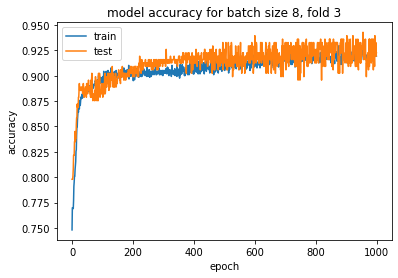

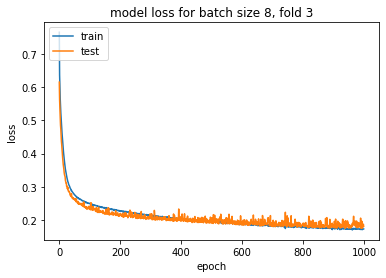

Epoch 1/1000
149/149 - 0s - loss: 0.7487 - accuracy: 0.7666 - val_loss: 0.7310 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6428 - accuracy: 0.7834 - val_loss: 0.7075 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.6181 - accuracy: 0.7834 - val_loss: 0.6819 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.5964 - accuracy: 0.7834 - val_loss: 0.6602 - val_accuracy: 0.7441
Epoch 5/1000
149/149 - 0s - loss: 0.5785 - accuracy: 0.7834 - val_loss: 0.6475 - val_accuracy: 0.7441
Epoch 6/1000
149/149 - 0s - loss: 0.5599 - accuracy: 0.7842 - val_loss: 0.6275 - val_accuracy: 0.7508
Epoch 7/1000
149/149 - 0s - loss: 0.5436 - accuracy: 0.7867 - val_loss: 0.6144 - val_accuracy: 0.7542
Epoch 8/1000
149/149 - 0s - loss: 0.5277 - accuracy: 0.7909 - val_loss: 0.6035 - val_accuracy: 0.7609
Epoch 9/1000
149/149 - 0s - loss: 0.5119 - accuracy: 0.7985 - val_loss: 0.5866 - val_accuracy: 0.7710
Epoch 10/1000
149/149 - 0s - loss: 0.4979 - accuracy: 0.8018 - val_loss: 0.5770 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2510 - accuracy: 0.9001 - val_loss: 0.3488 - val_accuracy: 0.8249
Epoch 82/1000
149/149 - 0s - loss: 0.2487 - accuracy: 0.9051 - val_loss: 0.3401 - val_accuracy: 0.8215
Epoch 83/1000
149/149 - 0s - loss: 0.2493 - accuracy: 0.9034 - val_loss: 0.3598 - val_accuracy: 0.8316
Epoch 84/1000
149/149 - 0s - loss: 0.2484 - accuracy: 0.9009 - val_loss: 0.3557 - val_accuracy: 0.8316
Epoch 85/1000
149/149 - 0s - loss: 0.2472 - accuracy: 0.9009 - val_loss: 0.3459 - val_accuracy: 0.8283
Epoch 86/1000
149/149 - 0s - loss: 0.2467 - accuracy: 0.9060 - val_loss: 0.3405 - val_accuracy: 0.8316
Epoch 87/1000
149/149 - 0s - loss: 0.2467 - accuracy: 0.8967 - val_loss: 0.3455 - val_accuracy: 0.8283
Epoch 88/1000
149/149 - 0s - loss: 0.2462 - accuracy: 0.9001 - val_loss: 0.3518 - val_accuracy: 0.8316
Epoch 89/1000
149/149 - 0s - loss: 0.2447 - accuracy: 0.9018 - val_loss: 0.3423 - val_accuracy: 0.8249
Epoch 90/1000
149/149 - 0s - loss: 0.2447 - accuracy: 0.9009 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2214 - accuracy: 0.9144 - val_loss: 0.3466 - val_accuracy: 0.8384
Epoch 161/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9118 - val_loss: 0.3319 - val_accuracy: 0.8519
Epoch 162/1000
149/149 - 0s - loss: 0.2205 - accuracy: 0.9093 - val_loss: 0.3422 - val_accuracy: 0.8418
Epoch 163/1000
149/149 - 0s - loss: 0.2199 - accuracy: 0.9118 - val_loss: 0.3337 - val_accuracy: 0.8485
Epoch 164/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9135 - val_loss: 0.3452 - val_accuracy: 0.8384
Epoch 165/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9118 - val_loss: 0.3537 - val_accuracy: 0.8384
Epoch 166/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9102 - val_loss: 0.3599 - val_accuracy: 0.8283
Epoch 167/1000
149/149 - 0s - loss: 0.2195 - accuracy: 0.9102 - val_loss: 0.3318 - val_accuracy: 0.8519
Epoch 168/1000
149/149 - 0s - loss: 0.2201 - accuracy: 0.9110 - val_loss: 0.3389 - val_accuracy: 0.8418
Epoch 169/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9076 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2054 - accuracy: 0.9160 - val_loss: 0.3424 - val_accuracy: 0.8485
Epoch 240/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.9194 - val_loss: 0.3493 - val_accuracy: 0.8384
Epoch 241/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.9160 - val_loss: 0.3405 - val_accuracy: 0.8451
Epoch 242/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9152 - val_loss: 0.3599 - val_accuracy: 0.8384
Epoch 243/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9144 - val_loss: 0.3468 - val_accuracy: 0.8485
Epoch 244/1000
149/149 - 0s - loss: 0.2066 - accuracy: 0.9177 - val_loss: 0.3610 - val_accuracy: 0.8384
Epoch 245/1000
149/149 - 0s - loss: 0.2071 - accuracy: 0.9160 - val_loss: 0.3480 - val_accuracy: 0.8451
Epoch 246/1000
149/149 - 0s - loss: 0.2067 - accuracy: 0.9152 - val_loss: 0.3498 - val_accuracy: 0.8384
Epoch 247/1000
149/149 - 0s - loss: 0.2047 - accuracy: 0.9118 - val_loss: 0.3470 - val_accuracy: 0.8485
Epoch 248/1000
149/149 - 0s - loss: 0.2055 - accuracy: 0.9144 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9144 - val_loss: 0.3423 - val_accuracy: 0.8519
Epoch 319/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9177 - val_loss: 0.3414 - val_accuracy: 0.8519
Epoch 320/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9177 - val_loss: 0.3540 - val_accuracy: 0.8485
Epoch 321/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9186 - val_loss: 0.3394 - val_accuracy: 0.8451
Epoch 322/1000
149/149 - 0s - loss: 0.1969 - accuracy: 0.9177 - val_loss: 0.3370 - val_accuracy: 0.8485
Epoch 323/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9194 - val_loss: 0.3415 - val_accuracy: 0.8519
Epoch 324/1000
149/149 - 0s - loss: 0.1967 - accuracy: 0.9144 - val_loss: 0.3355 - val_accuracy: 0.8485
Epoch 325/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9177 - val_loss: 0.3400 - val_accuracy: 0.8519
Epoch 326/1000
149/149 - 0s - loss: 0.1960 - accuracy: 0.9186 - val_loss: 0.3529 - val_accuracy: 0.8451
Epoch 327/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9152 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9219 - val_loss: 0.3290 - val_accuracy: 0.8418
Epoch 398/1000
149/149 - 0s - loss: 0.1892 - accuracy: 0.9211 - val_loss: 0.3471 - val_accuracy: 0.8451
Epoch 399/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9169 - val_loss: 0.3313 - val_accuracy: 0.8552
Epoch 400/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9169 - val_loss: 0.3289 - val_accuracy: 0.8552
Epoch 401/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9186 - val_loss: 0.3395 - val_accuracy: 0.8485
Epoch 402/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9177 - val_loss: 0.3401 - val_accuracy: 0.8485
Epoch 403/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9160 - val_loss: 0.3384 - val_accuracy: 0.8485
Epoch 404/1000
149/149 - 0s - loss: 0.1877 - accuracy: 0.9202 - val_loss: 0.3266 - val_accuracy: 0.8519
Epoch 405/1000
149/149 - 0s - loss: 0.1859 - accuracy: 0.9202 - val_loss: 0.3262 - val_accuracy: 0.8552
Epoch 406/1000
149/149 - 0s - loss: 0.1869 - accuracy: 0.9118 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1796 - accuracy: 0.9202 - val_loss: 0.3342 - val_accuracy: 0.8519
Epoch 477/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9236 - val_loss: 0.3313 - val_accuracy: 0.8519
Epoch 478/1000
149/149 - 0s - loss: 0.1794 - accuracy: 0.9202 - val_loss: 0.3273 - val_accuracy: 0.8552
Epoch 479/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9270 - val_loss: 0.3386 - val_accuracy: 0.8519
Epoch 480/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9219 - val_loss: 0.3270 - val_accuracy: 0.8519
Epoch 481/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9211 - val_loss: 0.3256 - val_accuracy: 0.8519
Epoch 482/1000
149/149 - 0s - loss: 0.1755 - accuracy: 0.9236 - val_loss: 0.3493 - val_accuracy: 0.8451
Epoch 483/1000
149/149 - 0s - loss: 0.1782 - accuracy: 0.9211 - val_loss: 0.3366 - val_accuracy: 0.8519
Epoch 484/1000
149/149 - 0s - loss: 0.1779 - accuracy: 0.9236 - val_loss: 0.3228 - val_accuracy: 0.8552
Epoch 485/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9228 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1710 - accuracy: 0.9261 - val_loss: 0.3303 - val_accuracy: 0.8519
Epoch 556/1000
149/149 - 0s - loss: 0.1704 - accuracy: 0.9253 - val_loss: 0.3240 - val_accuracy: 0.8552
Epoch 557/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9244 - val_loss: 0.3405 - val_accuracy: 0.8519
Epoch 558/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9194 - val_loss: 0.3249 - val_accuracy: 0.8586
Epoch 559/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9211 - val_loss: 0.3417 - val_accuracy: 0.8552
Epoch 560/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9211 - val_loss: 0.3321 - val_accuracy: 0.8485
Epoch 561/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9270 - val_loss: 0.3291 - val_accuracy: 0.8485
Epoch 562/1000
149/149 - 0s - loss: 0.1700 - accuracy: 0.9244 - val_loss: 0.3322 - val_accuracy: 0.8519
Epoch 563/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9228 - val_loss: 0.3481 - val_accuracy: 0.8552
Epoch 564/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9270 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1644 - accuracy: 0.9244 - val_loss: 0.3260 - val_accuracy: 0.8586
Epoch 635/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9312 - val_loss: 0.3310 - val_accuracy: 0.8552
Epoch 636/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9295 - val_loss: 0.3353 - val_accuracy: 0.8620
Epoch 637/1000
149/149 - 0s - loss: 0.1643 - accuracy: 0.9270 - val_loss: 0.3317 - val_accuracy: 0.8586
Epoch 638/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9270 - val_loss: 0.3311 - val_accuracy: 0.8552
Epoch 639/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9278 - val_loss: 0.3339 - val_accuracy: 0.8620
Epoch 640/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9286 - val_loss: 0.3270 - val_accuracy: 0.8620
Epoch 641/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9244 - val_loss: 0.3311 - val_accuracy: 0.8586
Epoch 642/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9253 - val_loss: 0.3235 - val_accuracy: 0.8620
Epoch 643/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9261 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1609 - accuracy: 0.9278 - val_loss: 0.3380 - val_accuracy: 0.8721
Epoch 714/1000
149/149 - 0s - loss: 0.1587 - accuracy: 0.9278 - val_loss: 0.3235 - val_accuracy: 0.8653
Epoch 715/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9278 - val_loss: 0.3186 - val_accuracy: 0.8687
Epoch 716/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9320 - val_loss: 0.3291 - val_accuracy: 0.8653
Epoch 717/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9303 - val_loss: 0.3356 - val_accuracy: 0.8687
Epoch 718/1000
149/149 - 0s - loss: 0.1593 - accuracy: 0.9295 - val_loss: 0.3321 - val_accuracy: 0.8721
Epoch 719/1000
149/149 - 0s - loss: 0.1571 - accuracy: 0.9328 - val_loss: 0.3504 - val_accuracy: 0.8620
Epoch 720/1000
149/149 - 0s - loss: 0.1594 - accuracy: 0.9278 - val_loss: 0.3257 - val_accuracy: 0.8653
Epoch 721/1000
149/149 - 0s - loss: 0.1592 - accuracy: 0.9286 - val_loss: 0.3185 - val_accuracy: 0.8687
Epoch 722/1000
149/149 - 0s - loss: 0.1593 - accuracy: 0.9295 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1575 - accuracy: 0.9295 - val_loss: 0.3351 - val_accuracy: 0.8721
Epoch 793/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9295 - val_loss: 0.3343 - val_accuracy: 0.8754
Epoch 794/1000
149/149 - 0s - loss: 0.1569 - accuracy: 0.9303 - val_loss: 0.3312 - val_accuracy: 0.8653
Epoch 795/1000
149/149 - 0s - loss: 0.1543 - accuracy: 0.9328 - val_loss: 0.3372 - val_accuracy: 0.8687
Epoch 796/1000
149/149 - 0s - loss: 0.1548 - accuracy: 0.9379 - val_loss: 0.3258 - val_accuracy: 0.8721
Epoch 797/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9337 - val_loss: 0.3254 - val_accuracy: 0.8687
Epoch 798/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9286 - val_loss: 0.3250 - val_accuracy: 0.8653
Epoch 799/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9312 - val_loss: 0.3416 - val_accuracy: 0.8687
Epoch 800/1000
149/149 - 0s - loss: 0.1559 - accuracy: 0.9295 - val_loss: 0.3212 - val_accuracy: 0.8687
Epoch 801/1000
149/149 - 0s - loss: 0.1556 - accuracy: 0.9328 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1519 - accuracy: 0.9328 - val_loss: 0.3229 - val_accuracy: 0.8721
Epoch 872/1000
149/149 - 0s - loss: 0.1525 - accuracy: 0.9253 - val_loss: 0.3214 - val_accuracy: 0.8687
Epoch 873/1000
149/149 - 0s - loss: 0.1536 - accuracy: 0.9278 - val_loss: 0.3488 - val_accuracy: 0.8687
Epoch 874/1000
149/149 - 0s - loss: 0.1518 - accuracy: 0.9370 - val_loss: 0.3195 - val_accuracy: 0.8653
Epoch 875/1000
149/149 - 0s - loss: 0.1527 - accuracy: 0.9286 - val_loss: 0.3168 - val_accuracy: 0.8788
Epoch 876/1000
149/149 - 0s - loss: 0.1507 - accuracy: 0.9337 - val_loss: 0.3199 - val_accuracy: 0.8653
Epoch 877/1000
149/149 - 0s - loss: 0.1517 - accuracy: 0.9353 - val_loss: 0.3197 - val_accuracy: 0.8687
Epoch 878/1000
149/149 - 0s - loss: 0.1526 - accuracy: 0.9362 - val_loss: 0.3373 - val_accuracy: 0.8721
Epoch 879/1000
149/149 - 0s - loss: 0.1531 - accuracy: 0.9353 - val_loss: 0.3212 - val_accuracy: 0.8754
Epoch 880/1000
149/149 - 0s - loss: 0.1517 - accuracy: 0.9404 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1488 - accuracy: 0.9337 - val_loss: 0.3607 - val_accuracy: 0.8788
Epoch 951/1000
149/149 - 0s - loss: 0.1514 - accuracy: 0.9303 - val_loss: 0.3203 - val_accuracy: 0.8687
Epoch 952/1000
149/149 - 0s - loss: 0.1509 - accuracy: 0.9328 - val_loss: 0.3323 - val_accuracy: 0.8687
Epoch 953/1000
149/149 - 0s - loss: 0.1492 - accuracy: 0.9328 - val_loss: 0.3351 - val_accuracy: 0.8653
Epoch 954/1000
149/149 - 0s - loss: 0.1482 - accuracy: 0.9337 - val_loss: 0.3395 - val_accuracy: 0.8687
Epoch 955/1000
149/149 - 0s - loss: 0.1484 - accuracy: 0.9379 - val_loss: 0.3544 - val_accuracy: 0.8687
Epoch 956/1000
149/149 - 0s - loss: 0.1491 - accuracy: 0.9404 - val_loss: 0.3506 - val_accuracy: 0.8653
Epoch 957/1000
149/149 - 0s - loss: 0.1509 - accuracy: 0.9337 - val_loss: 0.3310 - val_accuracy: 0.8653
Epoch 958/1000
149/149 - 0s - loss: 0.1503 - accuracy: 0.9328 - val_loss: 0.3179 - val_accuracy: 0.8754
Epoch 959/1000
149/149 - 0s - loss: 0.1505 - accuracy: 0.9328 - 

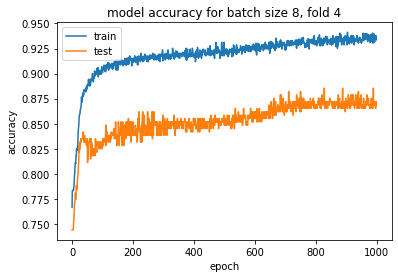

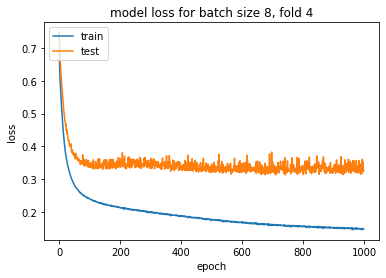

Epoch 1/1000
149/149 - 0s - loss: 0.8689 - accuracy: 0.6667 - val_loss: 0.6931 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6783 - accuracy: 0.7733 - val_loss: 0.6292 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.6339 - accuracy: 0.7733 - val_loss: 0.6014 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.6054 - accuracy: 0.7733 - val_loss: 0.5829 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5806 - accuracy: 0.7733 - val_loss: 0.5585 - val_accuracy: 0.7879
Epoch 6/1000
149/149 - 0s - loss: 0.5555 - accuracy: 0.7783 - val_loss: 0.5466 - val_accuracy: 0.8013
Epoch 7/1000
149/149 - 0s - loss: 0.5375 - accuracy: 0.7943 - val_loss: 0.5263 - val_accuracy: 0.8013
Epoch 8/1000
149/149 - 0s - loss: 0.5203 - accuracy: 0.7960 - val_loss: 0.5120 - val_accuracy: 0.8081
Epoch 9/1000
149/149 - 0s - loss: 0.5053 - accuracy: 0.8052 - val_loss: 0.4991 - val_accuracy: 0.8148
Epoch 10/1000
149/149 - 0s - loss: 0.4907 - accuracy: 0.8094 - val_loss: 0.4831 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2595 - accuracy: 0.8875 - val_loss: 0.2607 - val_accuracy: 0.8990
Epoch 82/1000
149/149 - 0s - loss: 0.2581 - accuracy: 0.8892 - val_loss: 0.2648 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2594 - accuracy: 0.8850 - val_loss: 0.2566 - val_accuracy: 0.9057
Epoch 84/1000
149/149 - 0s - loss: 0.2586 - accuracy: 0.8866 - val_loss: 0.2550 - val_accuracy: 0.9158
Epoch 85/1000
149/149 - 0s - loss: 0.2573 - accuracy: 0.8875 - val_loss: 0.2555 - val_accuracy: 0.9057
Epoch 86/1000
149/149 - 0s - loss: 0.2573 - accuracy: 0.8917 - val_loss: 0.2541 - val_accuracy: 0.9091
Epoch 87/1000
149/149 - 0s - loss: 0.2574 - accuracy: 0.8892 - val_loss: 0.2568 - val_accuracy: 0.8990
Epoch 88/1000
149/149 - 0s - loss: 0.2567 - accuracy: 0.8892 - val_loss: 0.2530 - val_accuracy: 0.9057
Epoch 89/1000
149/149 - 0s - loss: 0.2567 - accuracy: 0.8900 - val_loss: 0.2528 - val_accuracy: 0.9091
Epoch 90/1000
149/149 - 0s - loss: 0.2561 - accuracy: 0.8908 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2374 - accuracy: 0.8976 - val_loss: 0.2325 - val_accuracy: 0.9125
Epoch 161/1000
149/149 - 0s - loss: 0.2366 - accuracy: 0.8984 - val_loss: 0.2405 - val_accuracy: 0.8956
Epoch 162/1000
149/149 - 0s - loss: 0.2371 - accuracy: 0.8942 - val_loss: 0.2322 - val_accuracy: 0.9057
Epoch 163/1000
149/149 - 0s - loss: 0.2350 - accuracy: 0.8992 - val_loss: 0.2434 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2365 - accuracy: 0.8925 - val_loss: 0.2345 - val_accuracy: 0.9091
Epoch 165/1000
149/149 - 0s - loss: 0.2352 - accuracy: 0.9009 - val_loss: 0.2326 - val_accuracy: 0.9057
Epoch 166/1000
149/149 - 0s - loss: 0.2342 - accuracy: 0.8959 - val_loss: 0.2364 - val_accuracy: 0.9024
Epoch 167/1000
149/149 - 0s - loss: 0.2357 - accuracy: 0.8976 - val_loss: 0.2421 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2349 - accuracy: 0.9009 - val_loss: 0.2331 - val_accuracy: 0.9091
Epoch 169/1000
149/149 - 0s - loss: 0.2349 - accuracy: 0.8934 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2216 - accuracy: 0.9034 - val_loss: 0.2214 - val_accuracy: 0.9024
Epoch 240/1000
149/149 - 0s - loss: 0.2226 - accuracy: 0.9034 - val_loss: 0.2223 - val_accuracy: 0.8990
Epoch 241/1000
149/149 - 0s - loss: 0.2230 - accuracy: 0.8967 - val_loss: 0.2218 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2219 - accuracy: 0.8950 - val_loss: 0.2217 - val_accuracy: 0.9024
Epoch 243/1000
149/149 - 0s - loss: 0.2226 - accuracy: 0.8992 - val_loss: 0.2240 - val_accuracy: 0.9057
Epoch 244/1000
149/149 - 0s - loss: 0.2238 - accuracy: 0.9043 - val_loss: 0.2230 - val_accuracy: 0.9057
Epoch 245/1000
149/149 - 0s - loss: 0.2221 - accuracy: 0.9009 - val_loss: 0.2215 - val_accuracy: 0.9057
Epoch 246/1000
149/149 - 0s - loss: 0.2215 - accuracy: 0.8959 - val_loss: 0.2234 - val_accuracy: 0.9057
Epoch 247/1000
149/149 - 0s - loss: 0.2210 - accuracy: 0.9043 - val_loss: 0.2209 - val_accuracy: 0.8990
Epoch 248/1000
149/149 - 0s - loss: 0.2202 - accuracy: 0.9026 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2108 - accuracy: 0.9076 - val_loss: 0.2188 - val_accuracy: 0.9024
Epoch 319/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.9009 - val_loss: 0.2173 - val_accuracy: 0.9024
Epoch 320/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9060 - val_loss: 0.2178 - val_accuracy: 0.9024
Epoch 321/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9085 - val_loss: 0.2202 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2242 - val_accuracy: 0.8990
Epoch 323/1000
149/149 - 0s - loss: 0.2087 - accuracy: 0.9085 - val_loss: 0.2161 - val_accuracy: 0.8990
Epoch 324/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9060 - val_loss: 0.2165 - val_accuracy: 0.9024
Epoch 325/1000
149/149 - 0s - loss: 0.2079 - accuracy: 0.9110 - val_loss: 0.2162 - val_accuracy: 0.8990
Epoch 326/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9060 - val_loss: 0.2183 - val_accuracy: 0.9057
Epoch 327/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9034 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1979 - accuracy: 0.9102 - val_loss: 0.2256 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.1998 - accuracy: 0.9102 - val_loss: 0.2159 - val_accuracy: 0.9024
Epoch 399/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9152 - val_loss: 0.2143 - val_accuracy: 0.9024
Epoch 400/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9144 - val_loss: 0.2159 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9102 - val_loss: 0.2131 - val_accuracy: 0.8956
Epoch 402/1000
149/149 - 0s - loss: 0.1987 - accuracy: 0.9102 - val_loss: 0.2151 - val_accuracy: 0.9057
Epoch 403/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9110 - val_loss: 0.2154 - val_accuracy: 0.9057
Epoch 404/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9118 - val_loss: 0.2218 - val_accuracy: 0.9091
Epoch 405/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9102 - val_loss: 0.2132 - val_accuracy: 0.9024
Epoch 406/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9102 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1911 - accuracy: 0.9085 - val_loss: 0.2173 - val_accuracy: 0.9024
Epoch 477/1000
149/149 - 0s - loss: 0.1864 - accuracy: 0.9186 - val_loss: 0.2204 - val_accuracy: 0.9091
Epoch 478/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9118 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 479/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9152 - val_loss: 0.2178 - val_accuracy: 0.8990
Epoch 480/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9144 - val_loss: 0.2137 - val_accuracy: 0.9057
Epoch 481/1000
149/149 - 0s - loss: 0.1903 - accuracy: 0.9160 - val_loss: 0.2167 - val_accuracy: 0.9024
Epoch 482/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9160 - val_loss: 0.2145 - val_accuracy: 0.8990
Epoch 483/1000
149/149 - 0s - loss: 0.1881 - accuracy: 0.9144 - val_loss: 0.2161 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.1885 - accuracy: 0.9085 - val_loss: 0.2178 - val_accuracy: 0.9091
Epoch 485/1000
149/149 - 0s - loss: 0.1879 - accuracy: 0.9118 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1835 - accuracy: 0.9194 - val_loss: 0.2174 - val_accuracy: 0.9057
Epoch 556/1000
149/149 - 0s - loss: 0.1822 - accuracy: 0.9219 - val_loss: 0.2162 - val_accuracy: 0.9057
Epoch 557/1000
149/149 - 0s - loss: 0.1828 - accuracy: 0.9202 - val_loss: 0.2170 - val_accuracy: 0.9057
Epoch 558/1000
149/149 - 0s - loss: 0.1830 - accuracy: 0.9160 - val_loss: 0.2197 - val_accuracy: 0.8990
Epoch 559/1000
149/149 - 0s - loss: 0.1833 - accuracy: 0.9194 - val_loss: 0.2224 - val_accuracy: 0.8990
Epoch 560/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9186 - val_loss: 0.2209 - val_accuracy: 0.9057
Epoch 561/1000
149/149 - 0s - loss: 0.1821 - accuracy: 0.9177 - val_loss: 0.2179 - val_accuracy: 0.9091
Epoch 562/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9160 - val_loss: 0.2229 - val_accuracy: 0.9024
Epoch 563/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9160 - val_loss: 0.2226 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1821 - accuracy: 0.9202 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9169 - val_loss: 0.2186 - val_accuracy: 0.9024
Epoch 635/1000
149/149 - 0s - loss: 0.1785 - accuracy: 0.9278 - val_loss: 0.2210 - val_accuracy: 0.9091
Epoch 636/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9261 - val_loss: 0.2183 - val_accuracy: 0.9057
Epoch 637/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9261 - val_loss: 0.2188 - val_accuracy: 0.9057
Epoch 638/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9211 - val_loss: 0.2201 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9244 - val_loss: 0.2188 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9202 - val_loss: 0.2238 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9236 - val_loss: 0.2191 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9169 - val_loss: 0.2225 - val_accuracy: 0.8990
Epoch 643/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9219 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1751 - accuracy: 0.9211 - val_loss: 0.2250 - val_accuracy: 0.9024
Epoch 714/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9228 - val_loss: 0.2199 - val_accuracy: 0.9024
Epoch 715/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9253 - val_loss: 0.2192 - val_accuracy: 0.9057
Epoch 716/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9270 - val_loss: 0.2193 - val_accuracy: 0.9057
Epoch 717/1000
149/149 - 0s - loss: 0.1755 - accuracy: 0.9211 - val_loss: 0.2221 - val_accuracy: 0.9024
Epoch 718/1000
149/149 - 0s - loss: 0.1724 - accuracy: 0.9228 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 719/1000
149/149 - 0s - loss: 0.1714 - accuracy: 0.9303 - val_loss: 0.2268 - val_accuracy: 0.9024
Epoch 720/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9202 - val_loss: 0.2268 - val_accuracy: 0.9057
Epoch 721/1000
149/149 - 0s - loss: 0.1745 - accuracy: 0.9244 - val_loss: 0.2267 - val_accuracy: 0.9091
Epoch 722/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9219 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9211 - val_loss: 0.2215 - val_accuracy: 0.8990
Epoch 793/1000
149/149 - 0s - loss: 0.1726 - accuracy: 0.9270 - val_loss: 0.2234 - val_accuracy: 0.8990
Epoch 794/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9303 - val_loss: 0.2227 - val_accuracy: 0.9024
Epoch 795/1000
149/149 - 0s - loss: 0.1695 - accuracy: 0.9244 - val_loss: 0.2232 - val_accuracy: 0.8990
Epoch 796/1000
149/149 - 0s - loss: 0.1716 - accuracy: 0.9236 - val_loss: 0.2210 - val_accuracy: 0.9057
Epoch 797/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9236 - val_loss: 0.2225 - val_accuracy: 0.9024
Epoch 798/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9236 - val_loss: 0.2241 - val_accuracy: 0.9024
Epoch 799/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9244 - val_loss: 0.2217 - val_accuracy: 0.9057
Epoch 800/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9253 - val_loss: 0.2272 - val_accuracy: 0.9057
Epoch 801/1000
149/149 - 0s - loss: 0.1695 - accuracy: 0.9286 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9261 - val_loss: 0.2224 - val_accuracy: 0.9057
Epoch 872/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9228 - val_loss: 0.2224 - val_accuracy: 0.9024
Epoch 873/1000
149/149 - 0s - loss: 0.1675 - accuracy: 0.9303 - val_loss: 0.2260 - val_accuracy: 0.9057
Epoch 874/1000
149/149 - 0s - loss: 0.1672 - accuracy: 0.9270 - val_loss: 0.2267 - val_accuracy: 0.9091
Epoch 875/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9320 - val_loss: 0.2276 - val_accuracy: 0.9024
Epoch 876/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9211 - val_loss: 0.2214 - val_accuracy: 0.8990
Epoch 877/1000
149/149 - 0s - loss: 0.1679 - accuracy: 0.9270 - val_loss: 0.2226 - val_accuracy: 0.8990
Epoch 878/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9194 - val_loss: 0.2257 - val_accuracy: 0.9057
Epoch 879/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9295 - val_loss: 0.2240 - val_accuracy: 0.9024
Epoch 880/1000
149/149 - 0s - loss: 0.1648 - accuracy: 0.9362 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9278 - val_loss: 0.2279 - val_accuracy: 0.9057
Epoch 951/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9295 - val_loss: 0.2288 - val_accuracy: 0.9024
Epoch 952/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9270 - val_loss: 0.2259 - val_accuracy: 0.8990
Epoch 953/1000
149/149 - 0s - loss: 0.1637 - accuracy: 0.9337 - val_loss: 0.2227 - val_accuracy: 0.9057
Epoch 954/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9261 - val_loss: 0.2287 - val_accuracy: 0.8956
Epoch 955/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9253 - val_loss: 0.2272 - val_accuracy: 0.9024
Epoch 956/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9303 - val_loss: 0.2255 - val_accuracy: 0.9091
Epoch 957/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9337 - val_loss: 0.2253 - val_accuracy: 0.9057
Epoch 958/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9295 - val_loss: 0.2250 - val_accuracy: 0.8990
Epoch 959/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9295 - 

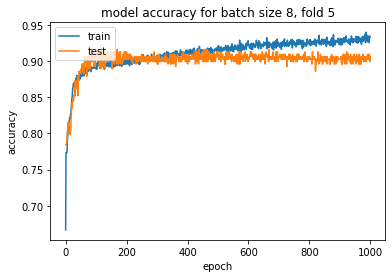

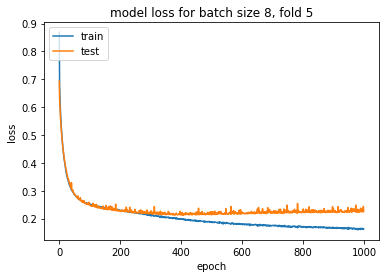

Epoch 1/1000
75/75 - 0s - loss: 0.7241 - accuracy: 0.7708 - val_loss: 0.6175 - val_accuracy: 0.7946
Epoch 2/1000
75/75 - 0s - loss: 0.6389 - accuracy: 0.7708 - val_loss: 0.5761 - val_accuracy: 0.7946
Epoch 3/1000
75/75 - 0s - loss: 0.6146 - accuracy: 0.7708 - val_loss: 0.5592 - val_accuracy: 0.7946
Epoch 4/1000
75/75 - 0s - loss: 0.6014 - accuracy: 0.7708 - val_loss: 0.5477 - val_accuracy: 0.7946
Epoch 5/1000
75/75 - 0s - loss: 0.5907 - accuracy: 0.7708 - val_loss: 0.5378 - val_accuracy: 0.7946
Epoch 6/1000
75/75 - 0s - loss: 0.5802 - accuracy: 0.7708 - val_loss: 0.5291 - val_accuracy: 0.7946
Epoch 7/1000
75/75 - 0s - loss: 0.5699 - accuracy: 0.7708 - val_loss: 0.5205 - val_accuracy: 0.7946
Epoch 8/1000
75/75 - 0s - loss: 0.5606 - accuracy: 0.7708 - val_loss: 0.5109 - val_accuracy: 0.7946
Epoch 9/1000
75/75 - 0s - loss: 0.5511 - accuracy: 0.7708 - val_loss: 0.5024 - val_accuracy: 0.7946
Epoch 10/1000
75/75 - 0s - loss: 0.5422 - accuracy: 0.7708 - val_loss: 0.4945 - val_accuracy: 0.7980

Epoch 83/1000
75/75 - 0s - loss: 0.3270 - accuracy: 0.8732 - val_loss: 0.3057 - val_accuracy: 0.8687
Epoch 84/1000
75/75 - 0s - loss: 0.3260 - accuracy: 0.8707 - val_loss: 0.3042 - val_accuracy: 0.8687
Epoch 85/1000
75/75 - 0s - loss: 0.3246 - accuracy: 0.8707 - val_loss: 0.3027 - val_accuracy: 0.8754
Epoch 86/1000
75/75 - 0s - loss: 0.3241 - accuracy: 0.8732 - val_loss: 0.3022 - val_accuracy: 0.8754
Epoch 87/1000
75/75 - 0s - loss: 0.3226 - accuracy: 0.8741 - val_loss: 0.3008 - val_accuracy: 0.8721
Epoch 88/1000
75/75 - 0s - loss: 0.3213 - accuracy: 0.8732 - val_loss: 0.3006 - val_accuracy: 0.8754
Epoch 89/1000
75/75 - 0s - loss: 0.3203 - accuracy: 0.8707 - val_loss: 0.2993 - val_accuracy: 0.8721
Epoch 90/1000
75/75 - 0s - loss: 0.3197 - accuracy: 0.8741 - val_loss: 0.2982 - val_accuracy: 0.8754
Epoch 91/1000
75/75 - 0s - loss: 0.3182 - accuracy: 0.8741 - val_loss: 0.2978 - val_accuracy: 0.8754
Epoch 92/1000
75/75 - 0s - loss: 0.3171 - accuracy: 0.8732 - val_loss: 0.2968 - val_accurac

Epoch 164/1000
75/75 - 0s - loss: 0.2727 - accuracy: 0.8925 - val_loss: 0.2603 - val_accuracy: 0.9024
Epoch 165/1000
75/75 - 0s - loss: 0.2718 - accuracy: 0.8908 - val_loss: 0.2609 - val_accuracy: 0.8956
Epoch 166/1000
75/75 - 0s - loss: 0.2714 - accuracy: 0.8959 - val_loss: 0.2596 - val_accuracy: 0.8956
Epoch 167/1000
75/75 - 0s - loss: 0.2712 - accuracy: 0.8967 - val_loss: 0.2609 - val_accuracy: 0.8889
Epoch 168/1000
75/75 - 0s - loss: 0.2712 - accuracy: 0.8959 - val_loss: 0.2591 - val_accuracy: 0.9024
Epoch 169/1000
75/75 - 0s - loss: 0.2708 - accuracy: 0.8900 - val_loss: 0.2591 - val_accuracy: 0.8956
Epoch 170/1000
75/75 - 0s - loss: 0.2702 - accuracy: 0.8959 - val_loss: 0.2588 - val_accuracy: 0.8956
Epoch 171/1000
75/75 - 0s - loss: 0.2693 - accuracy: 0.8967 - val_loss: 0.2586 - val_accuracy: 0.8956
Epoch 172/1000
75/75 - 0s - loss: 0.2691 - accuracy: 0.8934 - val_loss: 0.2577 - val_accuracy: 0.9024
Epoch 173/1000
75/75 - 0s - loss: 0.2690 - accuracy: 0.8925 - val_loss: 0.2581 - v

Epoch 245/1000
75/75 - 0s - loss: 0.2490 - accuracy: 0.8950 - val_loss: 0.2442 - val_accuracy: 0.9024
Epoch 246/1000
75/75 - 0s - loss: 0.2493 - accuracy: 0.8950 - val_loss: 0.2446 - val_accuracy: 0.8990
Epoch 247/1000
75/75 - 0s - loss: 0.2480 - accuracy: 0.8967 - val_loss: 0.2434 - val_accuracy: 0.9057
Epoch 248/1000
75/75 - 0s - loss: 0.2488 - accuracy: 0.8959 - val_loss: 0.2439 - val_accuracy: 0.8990
Epoch 249/1000
75/75 - 0s - loss: 0.2491 - accuracy: 0.8959 - val_loss: 0.2425 - val_accuracy: 0.8956
Epoch 250/1000
75/75 - 0s - loss: 0.2482 - accuracy: 0.8976 - val_loss: 0.2429 - val_accuracy: 0.8990
Epoch 251/1000
75/75 - 0s - loss: 0.2483 - accuracy: 0.8959 - val_loss: 0.2425 - val_accuracy: 0.9024
Epoch 252/1000
75/75 - 0s - loss: 0.2477 - accuracy: 0.8942 - val_loss: 0.2433 - val_accuracy: 0.8956
Epoch 253/1000
75/75 - 0s - loss: 0.2479 - accuracy: 0.8984 - val_loss: 0.2419 - val_accuracy: 0.8990
Epoch 254/1000
75/75 - 0s - loss: 0.2478 - accuracy: 0.8942 - val_loss: 0.2424 - v

Epoch 326/1000
75/75 - 0s - loss: 0.2366 - accuracy: 0.8976 - val_loss: 0.2363 - val_accuracy: 0.8990
Epoch 327/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.8950 - val_loss: 0.2356 - val_accuracy: 0.8990
Epoch 328/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.8959 - val_loss: 0.2371 - val_accuracy: 0.8990
Epoch 329/1000
75/75 - 0s - loss: 0.2356 - accuracy: 0.8984 - val_loss: 0.2348 - val_accuracy: 0.8923
Epoch 330/1000
75/75 - 0s - loss: 0.2359 - accuracy: 0.9009 - val_loss: 0.2351 - val_accuracy: 0.9024
Epoch 331/1000
75/75 - 0s - loss: 0.2355 - accuracy: 0.9018 - val_loss: 0.2343 - val_accuracy: 0.8956
Epoch 332/1000
75/75 - 0s - loss: 0.2354 - accuracy: 0.8992 - val_loss: 0.2342 - val_accuracy: 0.8956
Epoch 333/1000
75/75 - 0s - loss: 0.2349 - accuracy: 0.9001 - val_loss: 0.2360 - val_accuracy: 0.8889
Epoch 334/1000
75/75 - 0s - loss: 0.2347 - accuracy: 0.8976 - val_loss: 0.2340 - val_accuracy: 0.8956
Epoch 335/1000
75/75 - 0s - loss: 0.2345 - accuracy: 0.8984 - val_loss: 0.2341 - v

Epoch 407/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.9009 - val_loss: 0.2302 - val_accuracy: 0.8956
Epoch 408/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9009 - val_loss: 0.2302 - val_accuracy: 0.8956
Epoch 409/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9001 - val_loss: 0.2303 - val_accuracy: 0.8923
Epoch 410/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.9026 - val_loss: 0.2302 - val_accuracy: 0.8923
Epoch 411/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.9026 - val_loss: 0.2313 - val_accuracy: 0.9024
Epoch 412/1000
75/75 - 0s - loss: 0.2265 - accuracy: 0.9026 - val_loss: 0.2308 - val_accuracy: 0.8990
Epoch 413/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9026 - val_loss: 0.2308 - val_accuracy: 0.8923
Epoch 414/1000
75/75 - 0s - loss: 0.2265 - accuracy: 0.9034 - val_loss: 0.2308 - val_accuracy: 0.8923
Epoch 415/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9018 - val_loss: 0.2301 - val_accuracy: 0.8923
Epoch 416/1000
75/75 - 0s - loss: 0.2255 - accuracy: 0.9043 - val_loss: 0.2298 - v

Epoch 488/1000
75/75 - 0s - loss: 0.2190 - accuracy: 0.9051 - val_loss: 0.2295 - val_accuracy: 0.8956
Epoch 489/1000
75/75 - 0s - loss: 0.2192 - accuracy: 0.9026 - val_loss: 0.2285 - val_accuracy: 0.8923
Epoch 490/1000
75/75 - 0s - loss: 0.2184 - accuracy: 0.9060 - val_loss: 0.2288 - val_accuracy: 0.8923
Epoch 491/1000
75/75 - 0s - loss: 0.2190 - accuracy: 0.9034 - val_loss: 0.2284 - val_accuracy: 0.8923
Epoch 492/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9043 - val_loss: 0.2287 - val_accuracy: 0.8923
Epoch 493/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9026 - val_loss: 0.2286 - val_accuracy: 0.8923
Epoch 494/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9060 - val_loss: 0.2285 - val_accuracy: 0.8956
Epoch 495/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9068 - val_loss: 0.2285 - val_accuracy: 0.8923
Epoch 496/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9060 - val_loss: 0.2302 - val_accuracy: 0.8923
Epoch 497/1000
75/75 - 0s - loss: 0.2171 - accuracy: 0.9060 - val_loss: 0.2294 - v

Epoch 569/1000
75/75 - 0s - loss: 0.2124 - accuracy: 0.9076 - val_loss: 0.2268 - val_accuracy: 0.8923
Epoch 570/1000
75/75 - 0s - loss: 0.2124 - accuracy: 0.9043 - val_loss: 0.2288 - val_accuracy: 0.8889
Epoch 571/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9102 - val_loss: 0.2265 - val_accuracy: 0.8923
Epoch 572/1000
75/75 - 0s - loss: 0.2121 - accuracy: 0.9118 - val_loss: 0.2281 - val_accuracy: 0.8923
Epoch 573/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9085 - val_loss: 0.2274 - val_accuracy: 0.8923
Epoch 574/1000
75/75 - 0s - loss: 0.2123 - accuracy: 0.9102 - val_loss: 0.2286 - val_accuracy: 0.9192
Epoch 575/1000
75/75 - 0s - loss: 0.2126 - accuracy: 0.9102 - val_loss: 0.2262 - val_accuracy: 0.8923
Epoch 576/1000
75/75 - 0s - loss: 0.2118 - accuracy: 0.9051 - val_loss: 0.2273 - val_accuracy: 0.8990
Epoch 577/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9093 - val_loss: 0.2260 - val_accuracy: 0.8923
Epoch 578/1000
75/75 - 0s - loss: 0.2112 - accuracy: 0.9076 - val_loss: 0.2284 - v

Epoch 650/1000
75/75 - 0s - loss: 0.2086 - accuracy: 0.9068 - val_loss: 0.2262 - val_accuracy: 0.9024
Epoch 651/1000
75/75 - 0s - loss: 0.2073 - accuracy: 0.9110 - val_loss: 0.2265 - val_accuracy: 0.8990
Epoch 652/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9076 - val_loss: 0.2287 - val_accuracy: 0.8889
Epoch 653/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9093 - val_loss: 0.2264 - val_accuracy: 0.9057
Epoch 654/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9110 - val_loss: 0.2262 - val_accuracy: 0.9125
Epoch 655/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9093 - val_loss: 0.2258 - val_accuracy: 0.8956
Epoch 656/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9118 - val_loss: 0.2256 - val_accuracy: 0.8990
Epoch 657/1000
75/75 - 0s - loss: 0.2073 - accuracy: 0.9118 - val_loss: 0.2274 - val_accuracy: 0.8923
Epoch 658/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9076 - val_loss: 0.2258 - val_accuracy: 0.8956
Epoch 659/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9110 - val_loss: 0.2257 - v

Epoch 731/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9144 - val_loss: 0.2284 - val_accuracy: 0.8889
Epoch 732/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9135 - val_loss: 0.2264 - val_accuracy: 0.8990
Epoch 733/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9152 - val_loss: 0.2276 - val_accuracy: 0.8923
Epoch 734/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9144 - val_loss: 0.2257 - val_accuracy: 0.8990
Epoch 735/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9135 - val_loss: 0.2261 - val_accuracy: 0.9024
Epoch 736/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9110 - val_loss: 0.2268 - val_accuracy: 0.8990
Epoch 737/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9135 - val_loss: 0.2286 - val_accuracy: 0.8889
Epoch 738/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9068 - val_loss: 0.2259 - val_accuracy: 0.9024
Epoch 739/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9144 - val_loss: 0.2265 - val_accuracy: 0.9091
Epoch 740/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9118 - val_loss: 0.2279 - v

Epoch 812/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9144 - val_loss: 0.2277 - val_accuracy: 0.8956
Epoch 813/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9135 - val_loss: 0.2284 - val_accuracy: 0.8923
Epoch 814/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9110 - val_loss: 0.2265 - val_accuracy: 0.8990
Epoch 815/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9160 - val_loss: 0.2270 - val_accuracy: 0.8956
Epoch 816/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9169 - val_loss: 0.2274 - val_accuracy: 0.8923
Epoch 817/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9127 - val_loss: 0.2276 - val_accuracy: 0.8956
Epoch 818/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9144 - val_loss: 0.2267 - val_accuracy: 0.8990
Epoch 819/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9169 - val_loss: 0.2269 - val_accuracy: 0.9057
Epoch 820/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9135 - val_loss: 0.2300 - val_accuracy: 0.9192
Epoch 821/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9093 - val_loss: 0.2268 - v

Epoch 893/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9135 - val_loss: 0.2265 - val_accuracy: 0.8990
Epoch 894/1000
75/75 - 0s - loss: 0.1969 - accuracy: 0.9144 - val_loss: 0.2269 - val_accuracy: 0.8990
Epoch 895/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9152 - val_loss: 0.2273 - val_accuracy: 0.8990
Epoch 896/1000
75/75 - 0s - loss: 0.1961 - accuracy: 0.9177 - val_loss: 0.2277 - val_accuracy: 0.9158
Epoch 897/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9194 - val_loss: 0.2265 - val_accuracy: 0.8990
Epoch 898/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9177 - val_loss: 0.2271 - val_accuracy: 0.8956
Epoch 899/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9169 - val_loss: 0.2291 - val_accuracy: 0.9192
Epoch 900/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9177 - val_loss: 0.2271 - val_accuracy: 0.8990
Epoch 901/1000
75/75 - 0s - loss: 0.1949 - accuracy: 0.9144 - val_loss: 0.2301 - val_accuracy: 0.8923
Epoch 902/1000
75/75 - 0s - loss: 0.1957 - accuracy: 0.9160 - val_loss: 0.2289 - v

Epoch 974/1000
75/75 - 0s - loss: 0.1937 - accuracy: 0.9169 - val_loss: 0.2273 - val_accuracy: 0.8990
Epoch 975/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9152 - val_loss: 0.2277 - val_accuracy: 0.8956
Epoch 976/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9194 - val_loss: 0.2291 - val_accuracy: 0.8956
Epoch 977/1000
75/75 - 0s - loss: 0.1936 - accuracy: 0.9177 - val_loss: 0.2272 - val_accuracy: 0.8956
Epoch 978/1000
75/75 - 0s - loss: 0.1934 - accuracy: 0.9160 - val_loss: 0.2278 - val_accuracy: 0.8990
Epoch 979/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9135 - val_loss: 0.2275 - val_accuracy: 0.8990
Epoch 980/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9177 - val_loss: 0.2287 - val_accuracy: 0.9091
Epoch 981/1000
75/75 - 0s - loss: 0.1937 - accuracy: 0.9152 - val_loss: 0.2280 - val_accuracy: 0.8990
Epoch 982/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9194 - val_loss: 0.2299 - val_accuracy: 0.8923
Epoch 983/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9135 - val_loss: 0.2264 - v

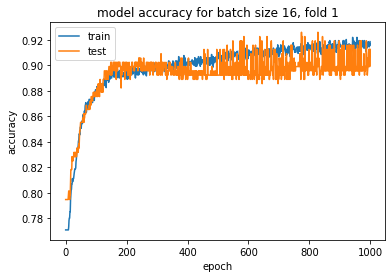

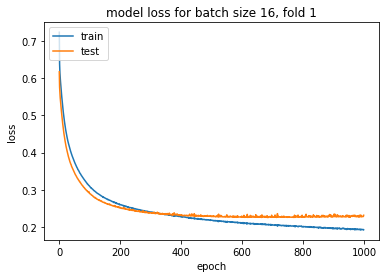

Epoch 1/1000
75/75 - 0s - loss: 0.9593 - accuracy: 0.6079 - val_loss: 0.7980 - val_accuracy: 0.7576
Epoch 2/1000
75/75 - 0s - loss: 0.7143 - accuracy: 0.7800 - val_loss: 0.7327 - val_accuracy: 0.7576
Epoch 3/1000
75/75 - 0s - loss: 0.6749 - accuracy: 0.7800 - val_loss: 0.7001 - val_accuracy: 0.7576
Epoch 4/1000
75/75 - 0s - loss: 0.6518 - accuracy: 0.7800 - val_loss: 0.6747 - val_accuracy: 0.7576
Epoch 5/1000
75/75 - 0s - loss: 0.6338 - accuracy: 0.7800 - val_loss: 0.6532 - val_accuracy: 0.7576
Epoch 6/1000
75/75 - 0s - loss: 0.6179 - accuracy: 0.7800 - val_loss: 0.6337 - val_accuracy: 0.7576
Epoch 7/1000
75/75 - 0s - loss: 0.6045 - accuracy: 0.7800 - val_loss: 0.6171 - val_accuracy: 0.7576
Epoch 8/1000
75/75 - 0s - loss: 0.5922 - accuracy: 0.7800 - val_loss: 0.6021 - val_accuracy: 0.7576
Epoch 9/1000
75/75 - 0s - loss: 0.5803 - accuracy: 0.7800 - val_loss: 0.5874 - val_accuracy: 0.7576
Epoch 10/1000
75/75 - 0s - loss: 0.5693 - accuracy: 0.7800 - val_loss: 0.5735 - val_accuracy: 0.7576

Epoch 83/1000
75/75 - 0s - loss: 0.3028 - accuracy: 0.8799 - val_loss: 0.2907 - val_accuracy: 0.8923
Epoch 84/1000
75/75 - 0s - loss: 0.3015 - accuracy: 0.8774 - val_loss: 0.2895 - val_accuracy: 0.8956
Epoch 85/1000
75/75 - 0s - loss: 0.3002 - accuracy: 0.8766 - val_loss: 0.2907 - val_accuracy: 0.8923
Epoch 86/1000
75/75 - 0s - loss: 0.3000 - accuracy: 0.8791 - val_loss: 0.2888 - val_accuracy: 0.8956
Epoch 87/1000
75/75 - 0s - loss: 0.2979 - accuracy: 0.8783 - val_loss: 0.2890 - val_accuracy: 0.8990
Epoch 88/1000
75/75 - 0s - loss: 0.2967 - accuracy: 0.8883 - val_loss: 0.2865 - val_accuracy: 0.8923
Epoch 89/1000
75/75 - 0s - loss: 0.2960 - accuracy: 0.8816 - val_loss: 0.2860 - val_accuracy: 0.8956
Epoch 90/1000
75/75 - 0s - loss: 0.2953 - accuracy: 0.8816 - val_loss: 0.2872 - val_accuracy: 0.8923
Epoch 91/1000
75/75 - 0s - loss: 0.2936 - accuracy: 0.8866 - val_loss: 0.2847 - val_accuracy: 0.8990
Epoch 92/1000
75/75 - 0s - loss: 0.2930 - accuracy: 0.8833 - val_loss: 0.2848 - val_accurac

Epoch 164/1000
75/75 - 0s - loss: 0.2566 - accuracy: 0.8900 - val_loss: 0.2650 - val_accuracy: 0.8990
Epoch 165/1000
75/75 - 0s - loss: 0.2562 - accuracy: 0.8900 - val_loss: 0.2644 - val_accuracy: 0.9057
Epoch 166/1000
75/75 - 0s - loss: 0.2548 - accuracy: 0.8917 - val_loss: 0.2647 - val_accuracy: 0.9024
Epoch 167/1000
75/75 - 0s - loss: 0.2553 - accuracy: 0.8950 - val_loss: 0.2645 - val_accuracy: 0.8990
Epoch 168/1000
75/75 - 0s - loss: 0.2555 - accuracy: 0.8917 - val_loss: 0.2635 - val_accuracy: 0.9024
Epoch 169/1000
75/75 - 0s - loss: 0.2555 - accuracy: 0.8925 - val_loss: 0.2666 - val_accuracy: 0.9057
Epoch 170/1000
75/75 - 0s - loss: 0.2544 - accuracy: 0.8925 - val_loss: 0.2641 - val_accuracy: 0.8990
Epoch 171/1000
75/75 - 0s - loss: 0.2547 - accuracy: 0.8917 - val_loss: 0.2627 - val_accuracy: 0.9024
Epoch 172/1000
75/75 - 0s - loss: 0.2538 - accuracy: 0.8950 - val_loss: 0.2621 - val_accuracy: 0.9024
Epoch 173/1000
75/75 - 0s - loss: 0.2542 - accuracy: 0.8942 - val_loss: 0.2634 - v

Epoch 245/1000
75/75 - 0s - loss: 0.2403 - accuracy: 0.8950 - val_loss: 0.2614 - val_accuracy: 0.9057
Epoch 246/1000
75/75 - 0s - loss: 0.2414 - accuracy: 0.8925 - val_loss: 0.2614 - val_accuracy: 0.8990
Epoch 247/1000
75/75 - 0s - loss: 0.2405 - accuracy: 0.8959 - val_loss: 0.2642 - val_accuracy: 0.9057
Epoch 248/1000
75/75 - 0s - loss: 0.2406 - accuracy: 0.8950 - val_loss: 0.2606 - val_accuracy: 0.8990
Epoch 249/1000
75/75 - 0s - loss: 0.2415 - accuracy: 0.8967 - val_loss: 0.2623 - val_accuracy: 0.9057
Epoch 250/1000
75/75 - 0s - loss: 0.2406 - accuracy: 0.8925 - val_loss: 0.2609 - val_accuracy: 0.9057
Epoch 251/1000
75/75 - 0s - loss: 0.2404 - accuracy: 0.8967 - val_loss: 0.2612 - val_accuracy: 0.9057
Epoch 252/1000
75/75 - 0s - loss: 0.2403 - accuracy: 0.8908 - val_loss: 0.2616 - val_accuracy: 0.9057
Epoch 253/1000
75/75 - 0s - loss: 0.2401 - accuracy: 0.8976 - val_loss: 0.2615 - val_accuracy: 0.9024
Epoch 254/1000
75/75 - 0s - loss: 0.2407 - accuracy: 0.8925 - val_loss: 0.2639 - v

Epoch 326/1000
75/75 - 0s - loss: 0.2328 - accuracy: 0.8984 - val_loss: 0.2598 - val_accuracy: 0.9024
Epoch 327/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.8934 - val_loss: 0.2605 - val_accuracy: 0.9024
Epoch 328/1000
75/75 - 0s - loss: 0.2332 - accuracy: 0.8967 - val_loss: 0.2605 - val_accuracy: 0.9057
Epoch 329/1000
75/75 - 0s - loss: 0.2325 - accuracy: 0.8992 - val_loss: 0.2637 - val_accuracy: 0.9024
Epoch 330/1000
75/75 - 0s - loss: 0.2327 - accuracy: 0.8976 - val_loss: 0.2622 - val_accuracy: 0.9057
Epoch 331/1000
75/75 - 0s - loss: 0.2321 - accuracy: 0.8984 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 332/1000
75/75 - 0s - loss: 0.2326 - accuracy: 0.8950 - val_loss: 0.2616 - val_accuracy: 0.9057
Epoch 333/1000
75/75 - 0s - loss: 0.2321 - accuracy: 0.8942 - val_loss: 0.2629 - val_accuracy: 0.8956
Epoch 334/1000
75/75 - 0s - loss: 0.2322 - accuracy: 0.9009 - val_loss: 0.2629 - val_accuracy: 0.9024
Epoch 335/1000
75/75 - 0s - loss: 0.2323 - accuracy: 0.8967 - val_loss: 0.2637 - v

Epoch 407/1000
75/75 - 0s - loss: 0.2264 - accuracy: 0.9009 - val_loss: 0.2618 - val_accuracy: 0.9057
Epoch 408/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9018 - val_loss: 0.2611 - val_accuracy: 0.8956
Epoch 409/1000
75/75 - 0s - loss: 0.2269 - accuracy: 0.8992 - val_loss: 0.2616 - val_accuracy: 0.9024
Epoch 410/1000
75/75 - 0s - loss: 0.2264 - accuracy: 0.9018 - val_loss: 0.2613 - val_accuracy: 0.8990
Epoch 411/1000
75/75 - 0s - loss: 0.2265 - accuracy: 0.9009 - val_loss: 0.2633 - val_accuracy: 0.9057
Epoch 412/1000
75/75 - 0s - loss: 0.2270 - accuracy: 0.8992 - val_loss: 0.2663 - val_accuracy: 0.9057
Epoch 413/1000
75/75 - 0s - loss: 0.2267 - accuracy: 0.9068 - val_loss: 0.2598 - val_accuracy: 0.9024
Epoch 414/1000
75/75 - 0s - loss: 0.2273 - accuracy: 0.9001 - val_loss: 0.2625 - val_accuracy: 0.8956
Epoch 415/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.9009 - val_loss: 0.2627 - val_accuracy: 0.8990
Epoch 416/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9026 - val_loss: 0.2617 - v

Epoch 488/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9009 - val_loss: 0.2596 - val_accuracy: 0.9024
Epoch 489/1000
75/75 - 0s - loss: 0.2237 - accuracy: 0.9034 - val_loss: 0.2610 - val_accuracy: 0.9057
Epoch 490/1000
75/75 - 0s - loss: 0.2210 - accuracy: 0.9001 - val_loss: 0.2657 - val_accuracy: 0.8923
Epoch 491/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.8976 - val_loss: 0.2605 - val_accuracy: 0.8990
Epoch 492/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9043 - val_loss: 0.2593 - val_accuracy: 0.9024
Epoch 493/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9009 - val_loss: 0.2589 - val_accuracy: 0.9024
Epoch 494/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9034 - val_loss: 0.2582 - val_accuracy: 0.9024
Epoch 495/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9043 - val_loss: 0.2635 - val_accuracy: 0.8990
Epoch 496/1000
75/75 - 0s - loss: 0.2197 - accuracy: 0.8992 - val_loss: 0.2595 - val_accuracy: 0.8990
Epoch 497/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9001 - val_loss: 0.2588 - v

Epoch 569/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9076 - val_loss: 0.2584 - val_accuracy: 0.9024
Epoch 570/1000
75/75 - 0s - loss: 0.2183 - accuracy: 0.9001 - val_loss: 0.2609 - val_accuracy: 0.9024
Epoch 571/1000
75/75 - 0s - loss: 0.2191 - accuracy: 0.9009 - val_loss: 0.2635 - val_accuracy: 0.8990
Epoch 572/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9043 - val_loss: 0.2574 - val_accuracy: 0.9024
Epoch 573/1000
75/75 - 0s - loss: 0.2186 - accuracy: 0.9018 - val_loss: 0.2544 - val_accuracy: 0.9024
Epoch 574/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9043 - val_loss: 0.2636 - val_accuracy: 0.8990
Epoch 575/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9043 - val_loss: 0.2599 - val_accuracy: 0.9024
Epoch 576/1000
75/75 - 0s - loss: 0.2174 - accuracy: 0.9026 - val_loss: 0.2554 - val_accuracy: 0.9024
Epoch 577/1000
75/75 - 0s - loss: 0.2181 - accuracy: 0.9051 - val_loss: 0.2587 - val_accuracy: 0.8990
Epoch 578/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9018 - val_loss: 0.2586 - v

Epoch 650/1000
75/75 - 0s - loss: 0.2157 - accuracy: 0.9026 - val_loss: 0.2609 - val_accuracy: 0.8990
Epoch 651/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9034 - val_loss: 0.2561 - val_accuracy: 0.9024
Epoch 652/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9034 - val_loss: 0.2620 - val_accuracy: 0.8956
Epoch 653/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.9034 - val_loss: 0.2583 - val_accuracy: 0.9024
Epoch 654/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9085 - val_loss: 0.2612 - val_accuracy: 0.8956
Epoch 655/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9026 - val_loss: 0.2635 - val_accuracy: 0.8990
Epoch 656/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9068 - val_loss: 0.2564 - val_accuracy: 0.9024
Epoch 657/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9034 - val_loss: 0.2588 - val_accuracy: 0.8990
Epoch 658/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9026 - val_loss: 0.2654 - val_accuracy: 0.8923
Epoch 659/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9085 - val_loss: 0.2630 - v

Epoch 731/1000
75/75 - 0s - loss: 0.2111 - accuracy: 0.9051 - val_loss: 0.2549 - val_accuracy: 0.8990
Epoch 732/1000
75/75 - 0s - loss: 0.2114 - accuracy: 0.9051 - val_loss: 0.2571 - val_accuracy: 0.8990
Epoch 733/1000
75/75 - 0s - loss: 0.2114 - accuracy: 0.9076 - val_loss: 0.2547 - val_accuracy: 0.9024
Epoch 734/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9043 - val_loss: 0.2610 - val_accuracy: 0.8956
Epoch 735/1000
75/75 - 0s - loss: 0.2112 - accuracy: 0.9034 - val_loss: 0.2600 - val_accuracy: 0.8956
Epoch 736/1000
75/75 - 0s - loss: 0.2103 - accuracy: 0.9068 - val_loss: 0.2595 - val_accuracy: 0.8956
Epoch 737/1000
75/75 - 0s - loss: 0.2108 - accuracy: 0.9034 - val_loss: 0.2541 - val_accuracy: 0.9024
Epoch 738/1000
75/75 - 0s - loss: 0.2110 - accuracy: 0.9009 - val_loss: 0.2561 - val_accuracy: 0.8990
Epoch 739/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9018 - val_loss: 0.2587 - val_accuracy: 0.8956
Epoch 740/1000
75/75 - 0s - loss: 0.2110 - accuracy: 0.9060 - val_loss: 0.2580 - v

Epoch 812/1000
75/75 - 0s - loss: 0.2065 - accuracy: 0.9009 - val_loss: 0.2590 - val_accuracy: 0.8990
Epoch 813/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9076 - val_loss: 0.2549 - val_accuracy: 0.8956
Epoch 814/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9110 - val_loss: 0.2574 - val_accuracy: 0.8956
Epoch 815/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9043 - val_loss: 0.2576 - val_accuracy: 0.8956
Epoch 816/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9043 - val_loss: 0.2559 - val_accuracy: 0.8956
Epoch 817/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9026 - val_loss: 0.2582 - val_accuracy: 0.8956
Epoch 818/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9068 - val_loss: 0.2568 - val_accuracy: 0.8956
Epoch 819/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9018 - val_loss: 0.2557 - val_accuracy: 0.8956
Epoch 820/1000
75/75 - 0s - loss: 0.2073 - accuracy: 0.9085 - val_loss: 0.2648 - val_accuracy: 0.8956
Epoch 821/1000
75/75 - 0s - loss: 0.2083 - accuracy: 0.9043 - val_loss: 0.2558 - v

Epoch 893/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.9085 - val_loss: 0.2559 - val_accuracy: 0.8990
Epoch 894/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9060 - val_loss: 0.2570 - val_accuracy: 0.8956
Epoch 895/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.8992 - val_loss: 0.2526 - val_accuracy: 0.8990
Epoch 896/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9068 - val_loss: 0.2538 - val_accuracy: 0.8956
Epoch 897/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9102 - val_loss: 0.2637 - val_accuracy: 0.8956
Epoch 898/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9110 - val_loss: 0.2558 - val_accuracy: 0.8990
Epoch 899/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.9068 - val_loss: 0.2526 - val_accuracy: 0.8956
Epoch 900/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9018 - val_loss: 0.2553 - val_accuracy: 0.8990
Epoch 901/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9043 - val_loss: 0.2613 - val_accuracy: 0.8923
Epoch 902/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9043 - val_loss: 0.2525 - v

Epoch 974/1000
75/75 - 0s - loss: 0.2022 - accuracy: 0.9034 - val_loss: 0.2549 - val_accuracy: 0.8956
Epoch 975/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9118 - val_loss: 0.2584 - val_accuracy: 0.8956
Epoch 976/1000
75/75 - 0s - loss: 0.2014 - accuracy: 0.9034 - val_loss: 0.2595 - val_accuracy: 0.8956
Epoch 977/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9060 - val_loss: 0.2518 - val_accuracy: 0.8956
Epoch 978/1000
75/75 - 0s - loss: 0.2009 - accuracy: 0.9043 - val_loss: 0.2549 - val_accuracy: 0.8990
Epoch 979/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9085 - val_loss: 0.2531 - val_accuracy: 0.8990
Epoch 980/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9068 - val_loss: 0.2485 - val_accuracy: 0.8990
Epoch 981/1000
75/75 - 0s - loss: 0.2022 - accuracy: 0.9085 - val_loss: 0.2567 - val_accuracy: 0.8990
Epoch 982/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9068 - val_loss: 0.2537 - val_accuracy: 0.8956
Epoch 983/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9068 - val_loss: 0.2558 - v

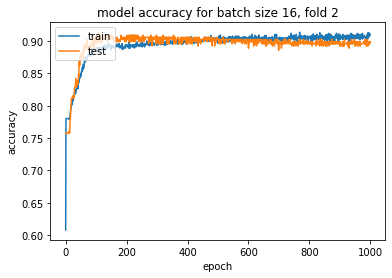

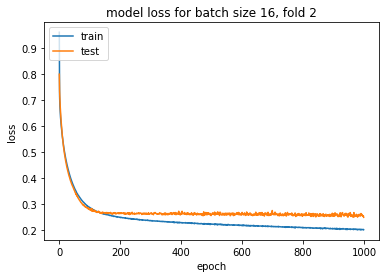

Epoch 1/1000
75/75 - 0s - loss: 1.0382 - accuracy: 0.5466 - val_loss: 0.9141 - val_accuracy: 0.7980
Epoch 2/1000
75/75 - 0s - loss: 0.8681 - accuracy: 0.7699 - val_loss: 0.7926 - val_accuracy: 0.7980
Epoch 3/1000
75/75 - 0s - loss: 0.7819 - accuracy: 0.7699 - val_loss: 0.7177 - val_accuracy: 0.7980
Epoch 4/1000
75/75 - 0s - loss: 0.7294 - accuracy: 0.7699 - val_loss: 0.6732 - val_accuracy: 0.7980
Epoch 5/1000
75/75 - 0s - loss: 0.6998 - accuracy: 0.7699 - val_loss: 0.6486 - val_accuracy: 0.7980
Epoch 6/1000
75/75 - 0s - loss: 0.6837 - accuracy: 0.7699 - val_loss: 0.6347 - val_accuracy: 0.7980
Epoch 7/1000
75/75 - 0s - loss: 0.6735 - accuracy: 0.7699 - val_loss: 0.6256 - val_accuracy: 0.7980
Epoch 8/1000
75/75 - 0s - loss: 0.6661 - accuracy: 0.7699 - val_loss: 0.6190 - val_accuracy: 0.7980
Epoch 9/1000
75/75 - 0s - loss: 0.6596 - accuracy: 0.7699 - val_loss: 0.6132 - val_accuracy: 0.7980
Epoch 10/1000
75/75 - 0s - loss: 0.6538 - accuracy: 0.7699 - val_loss: 0.6080 - val_accuracy: 0.7980

Epoch 83/1000
75/75 - 0s - loss: 0.3082 - accuracy: 0.8665 - val_loss: 0.2940 - val_accuracy: 0.8721
Epoch 84/1000
75/75 - 0s - loss: 0.3068 - accuracy: 0.8657 - val_loss: 0.2942 - val_accuracy: 0.8687
Epoch 85/1000
75/75 - 0s - loss: 0.3057 - accuracy: 0.8640 - val_loss: 0.2963 - val_accuracy: 0.8788
Epoch 86/1000
75/75 - 0s - loss: 0.3054 - accuracy: 0.8673 - val_loss: 0.2953 - val_accuracy: 0.8754
Epoch 87/1000
75/75 - 0s - loss: 0.3039 - accuracy: 0.8690 - val_loss: 0.2933 - val_accuracy: 0.8754
Epoch 88/1000
75/75 - 0s - loss: 0.3024 - accuracy: 0.8690 - val_loss: 0.2904 - val_accuracy: 0.8721
Epoch 89/1000
75/75 - 0s - loss: 0.3018 - accuracy: 0.8673 - val_loss: 0.2905 - val_accuracy: 0.8653
Epoch 90/1000
75/75 - 0s - loss: 0.3011 - accuracy: 0.8699 - val_loss: 0.2907 - val_accuracy: 0.8687
Epoch 91/1000
75/75 - 0s - loss: 0.2999 - accuracy: 0.8682 - val_loss: 0.2889 - val_accuracy: 0.8653
Epoch 92/1000
75/75 - 0s - loss: 0.2989 - accuracy: 0.8707 - val_loss: 0.2883 - val_accurac

Epoch 164/1000
75/75 - 0s - loss: 0.2631 - accuracy: 0.8917 - val_loss: 0.2618 - val_accuracy: 0.8822
Epoch 165/1000
75/75 - 0s - loss: 0.2623 - accuracy: 0.8900 - val_loss: 0.2604 - val_accuracy: 0.8822
Epoch 166/1000
75/75 - 0s - loss: 0.2613 - accuracy: 0.8850 - val_loss: 0.2593 - val_accuracy: 0.8855
Epoch 167/1000
75/75 - 0s - loss: 0.2625 - accuracy: 0.8908 - val_loss: 0.2609 - val_accuracy: 0.8889
Epoch 168/1000
75/75 - 0s - loss: 0.2618 - accuracy: 0.8883 - val_loss: 0.2605 - val_accuracy: 0.8855
Epoch 169/1000
75/75 - 0s - loss: 0.2618 - accuracy: 0.8892 - val_loss: 0.2614 - val_accuracy: 0.8855
Epoch 170/1000
75/75 - 0s - loss: 0.2605 - accuracy: 0.8900 - val_loss: 0.2589 - val_accuracy: 0.8822
Epoch 171/1000
75/75 - 0s - loss: 0.2606 - accuracy: 0.8883 - val_loss: 0.2590 - val_accuracy: 0.8822
Epoch 172/1000
75/75 - 0s - loss: 0.2606 - accuracy: 0.8883 - val_loss: 0.2601 - val_accuracy: 0.8855
Epoch 173/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8883 - val_loss: 0.2623 - v

Epoch 245/1000
75/75 - 0s - loss: 0.2473 - accuracy: 0.8950 - val_loss: 0.2429 - val_accuracy: 0.8923
Epoch 246/1000
75/75 - 0s - loss: 0.2474 - accuracy: 0.8942 - val_loss: 0.2435 - val_accuracy: 0.8923
Epoch 247/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8925 - val_loss: 0.2440 - val_accuracy: 0.8889
Epoch 248/1000
75/75 - 0s - loss: 0.2467 - accuracy: 0.8967 - val_loss: 0.2405 - val_accuracy: 0.8923
Epoch 249/1000
75/75 - 0s - loss: 0.2467 - accuracy: 0.8976 - val_loss: 0.2476 - val_accuracy: 0.8855
Epoch 250/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8950 - val_loss: 0.2414 - val_accuracy: 0.8923
Epoch 251/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8934 - val_loss: 0.2419 - val_accuracy: 0.8923
Epoch 252/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8934 - val_loss: 0.2410 - val_accuracy: 0.8889
Epoch 253/1000
75/75 - 0s - loss: 0.2464 - accuracy: 0.8959 - val_loss: 0.2399 - val_accuracy: 0.8889
Epoch 254/1000
75/75 - 0s - loss: 0.2462 - accuracy: 0.8950 - val_loss: 0.2443 - v

Epoch 326/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.9001 - val_loss: 0.2297 - val_accuracy: 0.8855
Epoch 327/1000
75/75 - 0s - loss: 0.2390 - accuracy: 0.8959 - val_loss: 0.2311 - val_accuracy: 0.8923
Epoch 328/1000
75/75 - 0s - loss: 0.2387 - accuracy: 0.8950 - val_loss: 0.2344 - val_accuracy: 0.8956
Epoch 329/1000
75/75 - 0s - loss: 0.2383 - accuracy: 0.8976 - val_loss: 0.2319 - val_accuracy: 0.8923
Epoch 330/1000
75/75 - 0s - loss: 0.2384 - accuracy: 0.9001 - val_loss: 0.2296 - val_accuracy: 0.8889
Epoch 331/1000
75/75 - 0s - loss: 0.2385 - accuracy: 0.8976 - val_loss: 0.2295 - val_accuracy: 0.8889
Epoch 332/1000
75/75 - 0s - loss: 0.2385 - accuracy: 0.8984 - val_loss: 0.2317 - val_accuracy: 0.8956
Epoch 333/1000
75/75 - 0s - loss: 0.2384 - accuracy: 0.8959 - val_loss: 0.2288 - val_accuracy: 0.8855
Epoch 334/1000
75/75 - 0s - loss: 0.2384 - accuracy: 0.9009 - val_loss: 0.2305 - val_accuracy: 0.8923
Epoch 335/1000
75/75 - 0s - loss: 0.2381 - accuracy: 0.8976 - val_loss: 0.2315 - v

Epoch 407/1000
75/75 - 0s - loss: 0.2324 - accuracy: 0.9001 - val_loss: 0.2281 - val_accuracy: 0.9091
Epoch 408/1000
75/75 - 0s - loss: 0.2325 - accuracy: 0.8976 - val_loss: 0.2223 - val_accuracy: 0.8990
Epoch 409/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.9043 - val_loss: 0.2249 - val_accuracy: 0.9024
Epoch 410/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9009 - val_loss: 0.2258 - val_accuracy: 0.9057
Epoch 411/1000
75/75 - 0s - loss: 0.2323 - accuracy: 0.9018 - val_loss: 0.2259 - val_accuracy: 0.9057
Epoch 412/1000
75/75 - 0s - loss: 0.2319 - accuracy: 0.8992 - val_loss: 0.2320 - val_accuracy: 0.9125
Epoch 413/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9026 - val_loss: 0.2216 - val_accuracy: 0.8956
Epoch 414/1000
75/75 - 0s - loss: 0.2328 - accuracy: 0.9009 - val_loss: 0.2223 - val_accuracy: 0.8990
Epoch 415/1000
75/75 - 0s - loss: 0.2329 - accuracy: 0.9009 - val_loss: 0.2261 - val_accuracy: 0.9125
Epoch 416/1000
75/75 - 0s - loss: 0.2310 - accuracy: 0.8967 - val_loss: 0.2203 - v

Epoch 488/1000
75/75 - 0s - loss: 0.2278 - accuracy: 0.8992 - val_loss: 0.2228 - val_accuracy: 0.9158
Epoch 489/1000
75/75 - 0s - loss: 0.2282 - accuracy: 0.9018 - val_loss: 0.2207 - val_accuracy: 0.9091
Epoch 490/1000
75/75 - 0s - loss: 0.2270 - accuracy: 0.8984 - val_loss: 0.2161 - val_accuracy: 0.9091
Epoch 491/1000
75/75 - 0s - loss: 0.2283 - accuracy: 0.9001 - val_loss: 0.2209 - val_accuracy: 0.9091
Epoch 492/1000
75/75 - 0s - loss: 0.2277 - accuracy: 0.9018 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 493/1000
75/75 - 0s - loss: 0.2279 - accuracy: 0.9026 - val_loss: 0.2234 - val_accuracy: 0.9158
Epoch 494/1000
75/75 - 0s - loss: 0.2274 - accuracy: 0.8984 - val_loss: 0.2253 - val_accuracy: 0.9125
Epoch 495/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.8976 - val_loss: 0.2176 - val_accuracy: 0.9158
Epoch 496/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.9001 - val_loss: 0.2159 - val_accuracy: 0.9057
Epoch 497/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9034 - val_loss: 0.2319 - v

Epoch 569/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9068 - val_loss: 0.2172 - val_accuracy: 0.9192
Epoch 570/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.8976 - val_loss: 0.2147 - val_accuracy: 0.9192
Epoch 571/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9001 - val_loss: 0.2215 - val_accuracy: 0.9125
Epoch 572/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.8992 - val_loss: 0.2154 - val_accuracy: 0.9226
Epoch 573/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9026 - val_loss: 0.2169 - val_accuracy: 0.9192
Epoch 574/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.8984 - val_loss: 0.2181 - val_accuracy: 0.9158
Epoch 575/1000
75/75 - 0s - loss: 0.2227 - accuracy: 0.9009 - val_loss: 0.2152 - val_accuracy: 0.9226
Epoch 576/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9034 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 577/1000
75/75 - 0s - loss: 0.2235 - accuracy: 0.9009 - val_loss: 0.2146 - val_accuracy: 0.9192
Epoch 578/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9034 - val_loss: 0.2199 - v

Epoch 650/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.9051 - val_loss: 0.2173 - val_accuracy: 0.9158
Epoch 651/1000
75/75 - 0s - loss: 0.2203 - accuracy: 0.9026 - val_loss: 0.2137 - val_accuracy: 0.9158
Epoch 652/1000
75/75 - 0s - loss: 0.2184 - accuracy: 0.9018 - val_loss: 0.2100 - val_accuracy: 0.9192
Epoch 653/1000
75/75 - 0s - loss: 0.2192 - accuracy: 0.9051 - val_loss: 0.2140 - val_accuracy: 0.9158
Epoch 654/1000
75/75 - 0s - loss: 0.2191 - accuracy: 0.9034 - val_loss: 0.2167 - val_accuracy: 0.9158
Epoch 655/1000
75/75 - 0s - loss: 0.2174 - accuracy: 0.9102 - val_loss: 0.2299 - val_accuracy: 0.9057
Epoch 656/1000
75/75 - 0s - loss: 0.2202 - accuracy: 0.9026 - val_loss: 0.2178 - val_accuracy: 0.9158
Epoch 657/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9076 - val_loss: 0.2150 - val_accuracy: 0.9158
Epoch 658/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9060 - val_loss: 0.2102 - val_accuracy: 0.9091
Epoch 659/1000
75/75 - 0s - loss: 0.2191 - accuracy: 0.9051 - val_loss: 0.2120 - v

Epoch 731/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9051 - val_loss: 0.2112 - val_accuracy: 0.9158
Epoch 732/1000
75/75 - 0s - loss: 0.2170 - accuracy: 0.9060 - val_loss: 0.2153 - val_accuracy: 0.9091
Epoch 733/1000
75/75 - 0s - loss: 0.2172 - accuracy: 0.9043 - val_loss: 0.2124 - val_accuracy: 0.9125
Epoch 734/1000
75/75 - 0s - loss: 0.2165 - accuracy: 0.9001 - val_loss: 0.2110 - val_accuracy: 0.9091
Epoch 735/1000
75/75 - 0s - loss: 0.2173 - accuracy: 0.9018 - val_loss: 0.2118 - val_accuracy: 0.9125
Epoch 736/1000
75/75 - 0s - loss: 0.2170 - accuracy: 0.9060 - val_loss: 0.2118 - val_accuracy: 0.9125
Epoch 737/1000
75/75 - 0s - loss: 0.2166 - accuracy: 0.9043 - val_loss: 0.2117 - val_accuracy: 0.9158
Epoch 738/1000
75/75 - 0s - loss: 0.2169 - accuracy: 0.9001 - val_loss: 0.2138 - val_accuracy: 0.9091
Epoch 739/1000
75/75 - 0s - loss: 0.2165 - accuracy: 0.9043 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 740/1000
75/75 - 0s - loss: 0.2174 - accuracy: 0.9009 - val_loss: 0.2111 - v

Epoch 812/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9051 - val_loss: 0.2075 - val_accuracy: 0.9192
Epoch 813/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.9018 - val_loss: 0.2081 - val_accuracy: 0.9125
Epoch 814/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9034 - val_loss: 0.2074 - val_accuracy: 0.9091
Epoch 815/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9093 - val_loss: 0.2087 - val_accuracy: 0.9125
Epoch 816/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9068 - val_loss: 0.2082 - val_accuracy: 0.9192
Epoch 817/1000
75/75 - 0s - loss: 0.2147 - accuracy: 0.8984 - val_loss: 0.2068 - val_accuracy: 0.9125
Epoch 818/1000
75/75 - 0s - loss: 0.2151 - accuracy: 0.9034 - val_loss: 0.2078 - val_accuracy: 0.9125
Epoch 819/1000
75/75 - 0s - loss: 0.2141 - accuracy: 0.9043 - val_loss: 0.2118 - val_accuracy: 0.9091
Epoch 820/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9110 - val_loss: 0.2250 - val_accuracy: 0.9091
Epoch 821/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9068 - val_loss: 0.2101 - v

Epoch 893/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9068 - val_loss: 0.2138 - val_accuracy: 0.9091
Epoch 894/1000
75/75 - 0s - loss: 0.2121 - accuracy: 0.9068 - val_loss: 0.2099 - val_accuracy: 0.9057
Epoch 895/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9051 - val_loss: 0.2096 - val_accuracy: 0.9024
Epoch 896/1000
75/75 - 0s - loss: 0.2125 - accuracy: 0.9060 - val_loss: 0.2108 - val_accuracy: 0.9057
Epoch 897/1000
75/75 - 0s - loss: 0.2108 - accuracy: 0.9102 - val_loss: 0.2122 - val_accuracy: 0.9125
Epoch 898/1000
75/75 - 0s - loss: 0.2126 - accuracy: 0.9051 - val_loss: 0.2072 - val_accuracy: 0.9091
Epoch 899/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9051 - val_loss: 0.2136 - val_accuracy: 0.9158
Epoch 900/1000
75/75 - 0s - loss: 0.2113 - accuracy: 0.9018 - val_loss: 0.2073 - val_accuracy: 0.9158
Epoch 901/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9085 - val_loss: 0.2103 - val_accuracy: 0.9091
Epoch 902/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9026 - val_loss: 0.2110 - v

Epoch 974/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9051 - val_loss: 0.2199 - val_accuracy: 0.9125
Epoch 975/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9076 - val_loss: 0.2062 - val_accuracy: 0.9091
Epoch 976/1000
75/75 - 0s - loss: 0.2103 - accuracy: 0.9068 - val_loss: 0.2051 - val_accuracy: 0.9192
Epoch 977/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9051 - val_loss: 0.2109 - val_accuracy: 0.9091
Epoch 978/1000
75/75 - 0s - loss: 0.2101 - accuracy: 0.9034 - val_loss: 0.2061 - val_accuracy: 0.9091
Epoch 979/1000
75/75 - 0s - loss: 0.2099 - accuracy: 0.9085 - val_loss: 0.2083 - val_accuracy: 0.9057
Epoch 980/1000
75/75 - 0s - loss: 0.2098 - accuracy: 0.9043 - val_loss: 0.2088 - val_accuracy: 0.9024
Epoch 981/1000
75/75 - 0s - loss: 0.2097 - accuracy: 0.9076 - val_loss: 0.2060 - val_accuracy: 0.9125
Epoch 982/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9060 - val_loss: 0.2048 - val_accuracy: 0.9226
Epoch 983/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9085 - val_loss: 0.2122 - v

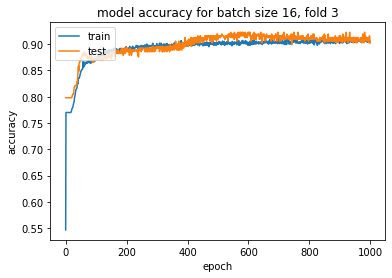

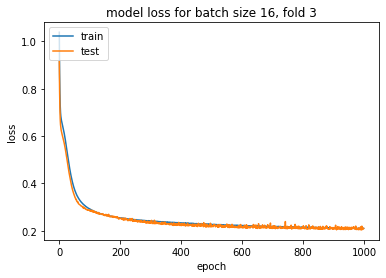

Epoch 1/1000
75/75 - 0s - loss: 0.8357 - accuracy: 0.7834 - val_loss: 0.8117 - val_accuracy: 0.7441
Epoch 2/1000
75/75 - 0s - loss: 0.7220 - accuracy: 0.7834 - val_loss: 0.7719 - val_accuracy: 0.7441
Epoch 3/1000
75/75 - 0s - loss: 0.6882 - accuracy: 0.7834 - val_loss: 0.7509 - val_accuracy: 0.7441
Epoch 4/1000
75/75 - 0s - loss: 0.6689 - accuracy: 0.7834 - val_loss: 0.7322 - val_accuracy: 0.7441
Epoch 5/1000
75/75 - 0s - loss: 0.6540 - accuracy: 0.7834 - val_loss: 0.7185 - val_accuracy: 0.7441
Epoch 6/1000
75/75 - 0s - loss: 0.6410 - accuracy: 0.7834 - val_loss: 0.7055 - val_accuracy: 0.7441
Epoch 7/1000
75/75 - 0s - loss: 0.6292 - accuracy: 0.7834 - val_loss: 0.6945 - val_accuracy: 0.7441
Epoch 8/1000
75/75 - 0s - loss: 0.6185 - accuracy: 0.7834 - val_loss: 0.6849 - val_accuracy: 0.7441
Epoch 9/1000
75/75 - 0s - loss: 0.6080 - accuracy: 0.7834 - val_loss: 0.6750 - val_accuracy: 0.7441
Epoch 10/1000
75/75 - 0s - loss: 0.5979 - accuracy: 0.7834 - val_loss: 0.6659 - val_accuracy: 0.7441

Epoch 83/1000
75/75 - 0s - loss: 0.2889 - accuracy: 0.8757 - val_loss: 0.3896 - val_accuracy: 0.8350
Epoch 84/1000
75/75 - 0s - loss: 0.2879 - accuracy: 0.8741 - val_loss: 0.3905 - val_accuracy: 0.8384
Epoch 85/1000
75/75 - 0s - loss: 0.2866 - accuracy: 0.8749 - val_loss: 0.3803 - val_accuracy: 0.8316
Epoch 86/1000
75/75 - 0s - loss: 0.2860 - accuracy: 0.8774 - val_loss: 0.3794 - val_accuracy: 0.8316
Epoch 87/1000
75/75 - 0s - loss: 0.2844 - accuracy: 0.8766 - val_loss: 0.3816 - val_accuracy: 0.8384
Epoch 88/1000
75/75 - 0s - loss: 0.2837 - accuracy: 0.8774 - val_loss: 0.3802 - val_accuracy: 0.8384
Epoch 89/1000
75/75 - 0s - loss: 0.2825 - accuracy: 0.8799 - val_loss: 0.3785 - val_accuracy: 0.8350
Epoch 90/1000
75/75 - 0s - loss: 0.2815 - accuracy: 0.8799 - val_loss: 0.3853 - val_accuracy: 0.8350
Epoch 91/1000
75/75 - 0s - loss: 0.2806 - accuracy: 0.8766 - val_loss: 0.3787 - val_accuracy: 0.8350
Epoch 92/1000
75/75 - 0s - loss: 0.2799 - accuracy: 0.8791 - val_loss: 0.3766 - val_accurac

Epoch 164/1000
75/75 - 0s - loss: 0.2408 - accuracy: 0.9018 - val_loss: 0.3471 - val_accuracy: 0.8283
Epoch 165/1000
75/75 - 0s - loss: 0.2408 - accuracy: 0.9009 - val_loss: 0.3452 - val_accuracy: 0.8283
Epoch 166/1000
75/75 - 0s - loss: 0.2403 - accuracy: 0.9001 - val_loss: 0.3519 - val_accuracy: 0.8350
Epoch 167/1000
75/75 - 0s - loss: 0.2407 - accuracy: 0.9001 - val_loss: 0.3388 - val_accuracy: 0.8249
Epoch 168/1000
75/75 - 0s - loss: 0.2400 - accuracy: 0.9043 - val_loss: 0.3405 - val_accuracy: 0.8283
Epoch 169/1000
75/75 - 0s - loss: 0.2397 - accuracy: 0.9043 - val_loss: 0.3408 - val_accuracy: 0.8283
Epoch 170/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.9026 - val_loss: 0.3476 - val_accuracy: 0.8316
Epoch 171/1000
75/75 - 0s - loss: 0.2390 - accuracy: 0.9026 - val_loss: 0.3440 - val_accuracy: 0.8316
Epoch 172/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.9051 - val_loss: 0.3440 - val_accuracy: 0.8283
Epoch 173/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.9051 - val_loss: 0.3411 - v

Epoch 245/1000
75/75 - 0s - loss: 0.2239 - accuracy: 0.9060 - val_loss: 0.3367 - val_accuracy: 0.8249
Epoch 246/1000
75/75 - 0s - loss: 0.2241 - accuracy: 0.9093 - val_loss: 0.3349 - val_accuracy: 0.8249
Epoch 247/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9102 - val_loss: 0.3369 - val_accuracy: 0.8283
Epoch 248/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9102 - val_loss: 0.3392 - val_accuracy: 0.8283
Epoch 249/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9093 - val_loss: 0.3288 - val_accuracy: 0.8316
Epoch 250/1000
75/75 - 0s - loss: 0.2229 - accuracy: 0.9085 - val_loss: 0.3399 - val_accuracy: 0.8283
Epoch 251/1000
75/75 - 0s - loss: 0.2231 - accuracy: 0.9118 - val_loss: 0.3355 - val_accuracy: 0.8249
Epoch 252/1000
75/75 - 0s - loss: 0.2227 - accuracy: 0.9093 - val_loss: 0.3321 - val_accuracy: 0.8316
Epoch 253/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9127 - val_loss: 0.3299 - val_accuracy: 0.8283
Epoch 254/1000
75/75 - 0s - loss: 0.2225 - accuracy: 0.9085 - val_loss: 0.3321 - v

Epoch 326/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9177 - val_loss: 0.3433 - val_accuracy: 0.8316
Epoch 327/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9127 - val_loss: 0.3329 - val_accuracy: 0.8283
Epoch 328/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9152 - val_loss: 0.3315 - val_accuracy: 0.8384
Epoch 329/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9152 - val_loss: 0.3349 - val_accuracy: 0.8283
Epoch 330/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9093 - val_loss: 0.3342 - val_accuracy: 0.8283
Epoch 331/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9152 - val_loss: 0.3293 - val_accuracy: 0.8384
Epoch 332/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9144 - val_loss: 0.3292 - val_accuracy: 0.8384
Epoch 333/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9118 - val_loss: 0.3334 - val_accuracy: 0.8350
Epoch 334/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9127 - val_loss: 0.3306 - val_accuracy: 0.8384
Epoch 335/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9135 - val_loss: 0.3362 - v

Epoch 407/1000
75/75 - 0s - loss: 0.2076 - accuracy: 0.9127 - val_loss: 0.3322 - val_accuracy: 0.8418
Epoch 408/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9169 - val_loss: 0.3394 - val_accuracy: 0.8316
Epoch 409/1000
75/75 - 0s - loss: 0.2075 - accuracy: 0.9144 - val_loss: 0.3339 - val_accuracy: 0.8418
Epoch 410/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9186 - val_loss: 0.3313 - val_accuracy: 0.8451
Epoch 411/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9102 - val_loss: 0.3363 - val_accuracy: 0.8418
Epoch 412/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9152 - val_loss: 0.3292 - val_accuracy: 0.8485
Epoch 413/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9169 - val_loss: 0.3358 - val_accuracy: 0.8451
Epoch 414/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9135 - val_loss: 0.3362 - val_accuracy: 0.8451
Epoch 415/1000
75/75 - 0s - loss: 0.2075 - accuracy: 0.9152 - val_loss: 0.3291 - val_accuracy: 0.8485
Epoch 416/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9152 - val_loss: 0.3355 - v

Epoch 488/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9169 - val_loss: 0.3353 - val_accuracy: 0.8418
Epoch 489/1000
75/75 - 0s - loss: 0.2009 - accuracy: 0.9169 - val_loss: 0.3311 - val_accuracy: 0.8451
Epoch 490/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9152 - val_loss: 0.3437 - val_accuracy: 0.8384
Epoch 491/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9169 - val_loss: 0.3343 - val_accuracy: 0.8451
Epoch 492/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9194 - val_loss: 0.3267 - val_accuracy: 0.8519
Epoch 493/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9186 - val_loss: 0.3281 - val_accuracy: 0.8519
Epoch 494/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9194 - val_loss: 0.3285 - val_accuracy: 0.8519
Epoch 495/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9160 - val_loss: 0.3344 - val_accuracy: 0.8418
Epoch 496/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9169 - val_loss: 0.3382 - val_accuracy: 0.8418
Epoch 497/1000
75/75 - 0s - loss: 0.2001 - accuracy: 0.9186 - val_loss: 0.3267 - v

Epoch 569/1000
75/75 - 0s - loss: 0.1951 - accuracy: 0.9160 - val_loss: 0.3287 - val_accuracy: 0.8586
Epoch 570/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9202 - val_loss: 0.3329 - val_accuracy: 0.8485
Epoch 571/1000
75/75 - 0s - loss: 0.1949 - accuracy: 0.9202 - val_loss: 0.3257 - val_accuracy: 0.8620
Epoch 572/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9194 - val_loss: 0.3326 - val_accuracy: 0.8485
Epoch 573/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9177 - val_loss: 0.3343 - val_accuracy: 0.8451
Epoch 574/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9202 - val_loss: 0.3395 - val_accuracy: 0.8451
Epoch 575/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9177 - val_loss: 0.3344 - val_accuracy: 0.8418
Epoch 576/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9202 - val_loss: 0.3436 - val_accuracy: 0.8418
Epoch 577/1000
75/75 - 0s - loss: 0.1950 - accuracy: 0.9177 - val_loss: 0.3359 - val_accuracy: 0.8485
Epoch 578/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9177 - val_loss: 0.3319 - v

Epoch 650/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9169 - val_loss: 0.3356 - val_accuracy: 0.8451
Epoch 651/1000
75/75 - 0s - loss: 0.1903 - accuracy: 0.9194 - val_loss: 0.3330 - val_accuracy: 0.8519
Epoch 652/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9194 - val_loss: 0.3473 - val_accuracy: 0.8418
Epoch 653/1000
75/75 - 0s - loss: 0.1891 - accuracy: 0.9202 - val_loss: 0.3391 - val_accuracy: 0.8451
Epoch 654/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9202 - val_loss: 0.3283 - val_accuracy: 0.8620
Epoch 655/1000
75/75 - 0s - loss: 0.1883 - accuracy: 0.9228 - val_loss: 0.3242 - val_accuracy: 0.8519
Epoch 656/1000
75/75 - 0s - loss: 0.1906 - accuracy: 0.9211 - val_loss: 0.3304 - val_accuracy: 0.8552
Epoch 657/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9202 - val_loss: 0.3259 - val_accuracy: 0.8620
Epoch 658/1000
75/75 - 0s - loss: 0.1889 - accuracy: 0.9244 - val_loss: 0.3446 - val_accuracy: 0.8451
Epoch 659/1000
75/75 - 0s - loss: 0.1901 - accuracy: 0.9219 - val_loss: 0.3402 - v

Epoch 731/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9219 - val_loss: 0.3305 - val_accuracy: 0.8552
Epoch 732/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9219 - val_loss: 0.3328 - val_accuracy: 0.8519
Epoch 733/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9219 - val_loss: 0.3371 - val_accuracy: 0.8485
Epoch 734/1000
75/75 - 0s - loss: 0.1851 - accuracy: 0.9219 - val_loss: 0.3417 - val_accuracy: 0.8418
Epoch 735/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9202 - val_loss: 0.3330 - val_accuracy: 0.8519
Epoch 736/1000
75/75 - 0s - loss: 0.1854 - accuracy: 0.9228 - val_loss: 0.3421 - val_accuracy: 0.8418
Epoch 737/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9228 - val_loss: 0.3321 - val_accuracy: 0.8519
Epoch 738/1000
75/75 - 0s - loss: 0.1852 - accuracy: 0.9236 - val_loss: 0.3253 - val_accuracy: 0.8519
Epoch 739/1000
75/75 - 0s - loss: 0.1855 - accuracy: 0.9253 - val_loss: 0.3352 - val_accuracy: 0.8519
Epoch 740/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9219 - val_loss: 0.3325 - v

Epoch 812/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9278 - val_loss: 0.3476 - val_accuracy: 0.8418
Epoch 813/1000
75/75 - 0s - loss: 0.1827 - accuracy: 0.9219 - val_loss: 0.3372 - val_accuracy: 0.8485
Epoch 814/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9219 - val_loss: 0.3468 - val_accuracy: 0.8418
Epoch 815/1000
75/75 - 0s - loss: 0.1827 - accuracy: 0.9253 - val_loss: 0.3353 - val_accuracy: 0.8519
Epoch 816/1000
75/75 - 0s - loss: 0.1818 - accuracy: 0.9253 - val_loss: 0.3438 - val_accuracy: 0.8384
Epoch 817/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9202 - val_loss: 0.3426 - val_accuracy: 0.8418
Epoch 818/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9186 - val_loss: 0.3344 - val_accuracy: 0.8485
Epoch 819/1000
75/75 - 0s - loss: 0.1816 - accuracy: 0.9211 - val_loss: 0.3380 - val_accuracy: 0.8485
Epoch 820/1000
75/75 - 0s - loss: 0.1806 - accuracy: 0.9228 - val_loss: 0.3256 - val_accuracy: 0.8552
Epoch 821/1000
75/75 - 0s - loss: 0.1809 - accuracy: 0.9261 - val_loss: 0.3517 - v

Epoch 893/1000
75/75 - 0s - loss: 0.1789 - accuracy: 0.9253 - val_loss: 0.3348 - val_accuracy: 0.8519
Epoch 894/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9253 - val_loss: 0.3296 - val_accuracy: 0.8485
Epoch 895/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9211 - val_loss: 0.3317 - val_accuracy: 0.8552
Epoch 896/1000
75/75 - 0s - loss: 0.1783 - accuracy: 0.9278 - val_loss: 0.3280 - val_accuracy: 0.8519
Epoch 897/1000
75/75 - 0s - loss: 0.1779 - accuracy: 0.9253 - val_loss: 0.3281 - val_accuracy: 0.8485
Epoch 898/1000
75/75 - 0s - loss: 0.1784 - accuracy: 0.9253 - val_loss: 0.3336 - val_accuracy: 0.8485
Epoch 899/1000
75/75 - 0s - loss: 0.1783 - accuracy: 0.9244 - val_loss: 0.3304 - val_accuracy: 0.8485
Epoch 900/1000
75/75 - 0s - loss: 0.1776 - accuracy: 0.9236 - val_loss: 0.3323 - val_accuracy: 0.8485
Epoch 901/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9261 - val_loss: 0.3350 - val_accuracy: 0.8519
Epoch 902/1000
75/75 - 0s - loss: 0.1784 - accuracy: 0.9219 - val_loss: 0.3283 - v

Epoch 974/1000
75/75 - 0s - loss: 0.1758 - accuracy: 0.9236 - val_loss: 0.3233 - val_accuracy: 0.8552
Epoch 975/1000
75/75 - 0s - loss: 0.1744 - accuracy: 0.9286 - val_loss: 0.3397 - val_accuracy: 0.8451
Epoch 976/1000
75/75 - 0s - loss: 0.1753 - accuracy: 0.9286 - val_loss: 0.3388 - val_accuracy: 0.8418
Epoch 977/1000
75/75 - 0s - loss: 0.1752 - accuracy: 0.9295 - val_loss: 0.3313 - val_accuracy: 0.8519
Epoch 978/1000
75/75 - 0s - loss: 0.1747 - accuracy: 0.9270 - val_loss: 0.3321 - val_accuracy: 0.8552
Epoch 979/1000
75/75 - 0s - loss: 0.1750 - accuracy: 0.9219 - val_loss: 0.3292 - val_accuracy: 0.8519
Epoch 980/1000
75/75 - 0s - loss: 0.1753 - accuracy: 0.9253 - val_loss: 0.3293 - val_accuracy: 0.8519
Epoch 981/1000
75/75 - 0s - loss: 0.1735 - accuracy: 0.9253 - val_loss: 0.3390 - val_accuracy: 0.8418
Epoch 982/1000
75/75 - 0s - loss: 0.1754 - accuracy: 0.9286 - val_loss: 0.3384 - val_accuracy: 0.8451
Epoch 983/1000
75/75 - 0s - loss: 0.1753 - accuracy: 0.9261 - val_loss: 0.3295 - v

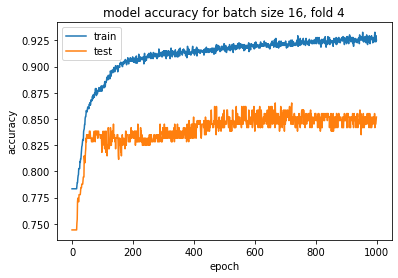

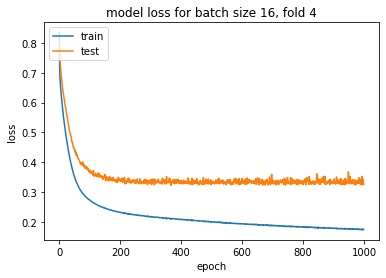

Epoch 1/1000
75/75 - 0s - loss: 0.9332 - accuracy: 0.6222 - val_loss: 0.7292 - val_accuracy: 0.7845
Epoch 2/1000
75/75 - 0s - loss: 0.7331 - accuracy: 0.7733 - val_loss: 0.6951 - val_accuracy: 0.7845
Epoch 3/1000
75/75 - 0s - loss: 0.7133 - accuracy: 0.7733 - val_loss: 0.6807 - val_accuracy: 0.7845
Epoch 4/1000
75/75 - 0s - loss: 0.6986 - accuracy: 0.7733 - val_loss: 0.6697 - val_accuracy: 0.7845
Epoch 5/1000
75/75 - 0s - loss: 0.6862 - accuracy: 0.7733 - val_loss: 0.6580 - val_accuracy: 0.7845
Epoch 6/1000
75/75 - 0s - loss: 0.6745 - accuracy: 0.7733 - val_loss: 0.6487 - val_accuracy: 0.7845
Epoch 7/1000
75/75 - 0s - loss: 0.6638 - accuracy: 0.7733 - val_loss: 0.6386 - val_accuracy: 0.7845
Epoch 8/1000
75/75 - 0s - loss: 0.6537 - accuracy: 0.7733 - val_loss: 0.6293 - val_accuracy: 0.7845
Epoch 9/1000
75/75 - 0s - loss: 0.6439 - accuracy: 0.7733 - val_loss: 0.6206 - val_accuracy: 0.7845
Epoch 10/1000
75/75 - 0s - loss: 0.6342 - accuracy: 0.7733 - val_loss: 0.6109 - val_accuracy: 0.7845

Epoch 83/1000
75/75 - 0s - loss: 0.3355 - accuracy: 0.8665 - val_loss: 0.3404 - val_accuracy: 0.8586
Epoch 84/1000
75/75 - 0s - loss: 0.3346 - accuracy: 0.8657 - val_loss: 0.3382 - val_accuracy: 0.8552
Epoch 85/1000
75/75 - 0s - loss: 0.3333 - accuracy: 0.8623 - val_loss: 0.3372 - val_accuracy: 0.8586
Epoch 86/1000
75/75 - 0s - loss: 0.3326 - accuracy: 0.8648 - val_loss: 0.3362 - val_accuracy: 0.8586
Epoch 87/1000
75/75 - 0s - loss: 0.3315 - accuracy: 0.8631 - val_loss: 0.3358 - val_accuracy: 0.8653
Epoch 88/1000
75/75 - 0s - loss: 0.3305 - accuracy: 0.8615 - val_loss: 0.3338 - val_accuracy: 0.8586
Epoch 89/1000
75/75 - 0s - loss: 0.3294 - accuracy: 0.8640 - val_loss: 0.3328 - val_accuracy: 0.8586
Epoch 90/1000
75/75 - 0s - loss: 0.3285 - accuracy: 0.8657 - val_loss: 0.3320 - val_accuracy: 0.8620
Epoch 91/1000
75/75 - 0s - loss: 0.3279 - accuracy: 0.8648 - val_loss: 0.3311 - val_accuracy: 0.8620
Epoch 92/1000
75/75 - 0s - loss: 0.3267 - accuracy: 0.8640 - val_loss: 0.3299 - val_accurac

Epoch 164/1000
75/75 - 0s - loss: 0.2841 - accuracy: 0.8808 - val_loss: 0.2819 - val_accuracy: 0.8956
Epoch 165/1000
75/75 - 0s - loss: 0.2843 - accuracy: 0.8774 - val_loss: 0.2815 - val_accuracy: 0.9057
Epoch 166/1000
75/75 - 0s - loss: 0.2826 - accuracy: 0.8783 - val_loss: 0.2827 - val_accuracy: 0.8822
Epoch 167/1000
75/75 - 0s - loss: 0.2837 - accuracy: 0.8799 - val_loss: 0.2834 - val_accuracy: 0.9057
Epoch 168/1000
75/75 - 0s - loss: 0.2826 - accuracy: 0.8774 - val_loss: 0.2803 - val_accuracy: 0.8923
Epoch 169/1000
75/75 - 0s - loss: 0.2826 - accuracy: 0.8825 - val_loss: 0.2823 - val_accuracy: 0.9057
Epoch 170/1000
75/75 - 0s - loss: 0.2805 - accuracy: 0.8816 - val_loss: 0.2811 - val_accuracy: 0.8855
Epoch 171/1000
75/75 - 0s - loss: 0.2821 - accuracy: 0.8816 - val_loss: 0.2798 - val_accuracy: 0.9057
Epoch 172/1000
75/75 - 0s - loss: 0.2817 - accuracy: 0.8757 - val_loss: 0.2783 - val_accuracy: 0.9057
Epoch 173/1000
75/75 - 0s - loss: 0.2808 - accuracy: 0.8791 - val_loss: 0.2804 - v

Epoch 245/1000
75/75 - 0s - loss: 0.2624 - accuracy: 0.8808 - val_loss: 0.2559 - val_accuracy: 0.9091
Epoch 246/1000
75/75 - 0s - loss: 0.2625 - accuracy: 0.8841 - val_loss: 0.2557 - val_accuracy: 0.9057
Epoch 247/1000
75/75 - 0s - loss: 0.2622 - accuracy: 0.8866 - val_loss: 0.2553 - val_accuracy: 0.9125
Epoch 248/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8900 - val_loss: 0.2552 - val_accuracy: 0.9125
Epoch 249/1000
75/75 - 0s - loss: 0.2610 - accuracy: 0.8883 - val_loss: 0.2596 - val_accuracy: 0.9057
Epoch 250/1000
75/75 - 0s - loss: 0.2613 - accuracy: 0.8892 - val_loss: 0.2553 - val_accuracy: 0.9057
Epoch 251/1000
75/75 - 0s - loss: 0.2617 - accuracy: 0.8866 - val_loss: 0.2547 - val_accuracy: 0.9091
Epoch 252/1000
75/75 - 0s - loss: 0.2613 - accuracy: 0.8866 - val_loss: 0.2550 - val_accuracy: 0.9125
Epoch 253/1000
75/75 - 0s - loss: 0.2606 - accuracy: 0.8841 - val_loss: 0.2557 - val_accuracy: 0.9091
Epoch 254/1000
75/75 - 0s - loss: 0.2602 - accuracy: 0.8850 - val_loss: 0.2545 - v

Epoch 326/1000
75/75 - 0s - loss: 0.2515 - accuracy: 0.8908 - val_loss: 0.2439 - val_accuracy: 0.9125
Epoch 327/1000
75/75 - 0s - loss: 0.2517 - accuracy: 0.8892 - val_loss: 0.2437 - val_accuracy: 0.9125
Epoch 328/1000
75/75 - 0s - loss: 0.2516 - accuracy: 0.8917 - val_loss: 0.2450 - val_accuracy: 0.9057
Epoch 329/1000
75/75 - 0s - loss: 0.2512 - accuracy: 0.8900 - val_loss: 0.2441 - val_accuracy: 0.9158
Epoch 330/1000
75/75 - 0s - loss: 0.2511 - accuracy: 0.8850 - val_loss: 0.2433 - val_accuracy: 0.9158
Epoch 331/1000
75/75 - 0s - loss: 0.2503 - accuracy: 0.8950 - val_loss: 0.2432 - val_accuracy: 0.9158
Epoch 332/1000
75/75 - 0s - loss: 0.2512 - accuracy: 0.8875 - val_loss: 0.2452 - val_accuracy: 0.9057
Epoch 333/1000
75/75 - 0s - loss: 0.2497 - accuracy: 0.8917 - val_loss: 0.2456 - val_accuracy: 0.9024
Epoch 334/1000
75/75 - 0s - loss: 0.2511 - accuracy: 0.8875 - val_loss: 0.2440 - val_accuracy: 0.9057
Epoch 335/1000
75/75 - 0s - loss: 0.2508 - accuracy: 0.8875 - val_loss: 0.2429 - v

Epoch 407/1000
75/75 - 0s - loss: 0.2434 - accuracy: 0.8976 - val_loss: 0.2354 - val_accuracy: 0.9125
Epoch 408/1000
75/75 - 0s - loss: 0.2432 - accuracy: 0.8934 - val_loss: 0.2355 - val_accuracy: 0.9125
Epoch 409/1000
75/75 - 0s - loss: 0.2435 - accuracy: 0.8917 - val_loss: 0.2351 - val_accuracy: 0.9125
Epoch 410/1000
75/75 - 0s - loss: 0.2430 - accuracy: 0.8950 - val_loss: 0.2359 - val_accuracy: 0.9024
Epoch 411/1000
75/75 - 0s - loss: 0.2425 - accuracy: 0.8950 - val_loss: 0.2352 - val_accuracy: 0.9158
Epoch 412/1000
75/75 - 0s - loss: 0.2421 - accuracy: 0.8917 - val_loss: 0.2368 - val_accuracy: 0.8990
Epoch 413/1000
75/75 - 0s - loss: 0.2427 - accuracy: 0.8934 - val_loss: 0.2350 - val_accuracy: 0.9158
Epoch 414/1000
75/75 - 0s - loss: 0.2414 - accuracy: 0.8942 - val_loss: 0.2380 - val_accuracy: 0.8923
Epoch 415/1000
75/75 - 0s - loss: 0.2424 - accuracy: 0.8934 - val_loss: 0.2346 - val_accuracy: 0.9192
Epoch 416/1000
75/75 - 0s - loss: 0.2412 - accuracy: 0.8959 - val_loss: 0.2360 - v

Epoch 488/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.8967 - val_loss: 0.2311 - val_accuracy: 0.9024
Epoch 489/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.8959 - val_loss: 0.2297 - val_accuracy: 0.9057
Epoch 490/1000
75/75 - 0s - loss: 0.2325 - accuracy: 0.8959 - val_loss: 0.2304 - val_accuracy: 0.9024
Epoch 491/1000
75/75 - 0s - loss: 0.2335 - accuracy: 0.8950 - val_loss: 0.2297 - val_accuracy: 0.9125
Epoch 492/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.8984 - val_loss: 0.2308 - val_accuracy: 0.9024
Epoch 493/1000
75/75 - 0s - loss: 0.2329 - accuracy: 0.8984 - val_loss: 0.2309 - val_accuracy: 0.9057
Epoch 494/1000
75/75 - 0s - loss: 0.2322 - accuracy: 0.9001 - val_loss: 0.2342 - val_accuracy: 0.8956
Epoch 495/1000
75/75 - 0s - loss: 0.2321 - accuracy: 0.8984 - val_loss: 0.2292 - val_accuracy: 0.9091
Epoch 496/1000
75/75 - 0s - loss: 0.2324 - accuracy: 0.8984 - val_loss: 0.2292 - val_accuracy: 0.9125
Epoch 497/1000
75/75 - 0s - loss: 0.2323 - accuracy: 0.8976 - val_loss: 0.2322 - v

Epoch 569/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8992 - val_loss: 0.2287 - val_accuracy: 0.9125
Epoch 570/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9018 - val_loss: 0.2284 - val_accuracy: 0.9125
Epoch 571/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9009 - val_loss: 0.2334 - val_accuracy: 0.8956
Epoch 572/1000
75/75 - 0s - loss: 0.2265 - accuracy: 0.9051 - val_loss: 0.2283 - val_accuracy: 0.9125
Epoch 573/1000
75/75 - 0s - loss: 0.2246 - accuracy: 0.9043 - val_loss: 0.2310 - val_accuracy: 0.8990
Epoch 574/1000
75/75 - 0s - loss: 0.2273 - accuracy: 0.8992 - val_loss: 0.2285 - val_accuracy: 0.9125
Epoch 575/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9034 - val_loss: 0.2284 - val_accuracy: 0.9125
Epoch 576/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.9009 - val_loss: 0.2280 - val_accuracy: 0.9125
Epoch 577/1000
75/75 - 0s - loss: 0.2260 - accuracy: 0.8992 - val_loss: 0.2291 - val_accuracy: 0.9091
Epoch 578/1000
75/75 - 0s - loss: 0.2257 - accuracy: 0.8976 - val_loss: 0.2285 - v

Epoch 650/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9018 - val_loss: 0.2262 - val_accuracy: 0.9091
Epoch 651/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9026 - val_loss: 0.2325 - val_accuracy: 0.8990
Epoch 652/1000
75/75 - 0s - loss: 0.2201 - accuracy: 0.9093 - val_loss: 0.2284 - val_accuracy: 0.8990
Epoch 653/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9001 - val_loss: 0.2264 - val_accuracy: 0.9091
Epoch 654/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9068 - val_loss: 0.2272 - val_accuracy: 0.9057
Epoch 655/1000
75/75 - 0s - loss: 0.2213 - accuracy: 0.9051 - val_loss: 0.2376 - val_accuracy: 0.8956
Epoch 656/1000
75/75 - 0s - loss: 0.2222 - accuracy: 0.9001 - val_loss: 0.2276 - val_accuracy: 0.9057
Epoch 657/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9018 - val_loss: 0.2297 - val_accuracy: 0.8990
Epoch 658/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9026 - val_loss: 0.2264 - val_accuracy: 0.9091
Epoch 659/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9026 - val_loss: 0.2261 - v

Epoch 731/1000
75/75 - 0s - loss: 0.2181 - accuracy: 0.9034 - val_loss: 0.2258 - val_accuracy: 0.9091
Epoch 732/1000
75/75 - 0s - loss: 0.2181 - accuracy: 0.9026 - val_loss: 0.2273 - val_accuracy: 0.9091
Epoch 733/1000
75/75 - 0s - loss: 0.2187 - accuracy: 0.9060 - val_loss: 0.2257 - val_accuracy: 0.9091
Epoch 734/1000
75/75 - 0s - loss: 0.2174 - accuracy: 0.9018 - val_loss: 0.2265 - val_accuracy: 0.9091
Epoch 735/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9051 - val_loss: 0.2251 - val_accuracy: 0.9091
Epoch 736/1000
75/75 - 0s - loss: 0.2192 - accuracy: 0.9001 - val_loss: 0.2246 - val_accuracy: 0.9057
Epoch 737/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9051 - val_loss: 0.2270 - val_accuracy: 0.9091
Epoch 738/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.8984 - val_loss: 0.2328 - val_accuracy: 0.8990
Epoch 739/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9060 - val_loss: 0.2252 - val_accuracy: 0.9091
Epoch 740/1000
75/75 - 0s - loss: 0.2191 - accuracy: 0.9001 - val_loss: 0.2254 - v

Epoch 812/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9034 - val_loss: 0.2251 - val_accuracy: 0.9091
Epoch 813/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9034 - val_loss: 0.2243 - val_accuracy: 0.9057
Epoch 814/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9018 - val_loss: 0.2248 - val_accuracy: 0.9091
Epoch 815/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9018 - val_loss: 0.2248 - val_accuracy: 0.9091
Epoch 816/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9026 - val_loss: 0.2243 - val_accuracy: 0.9057
Epoch 817/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9034 - val_loss: 0.2239 - val_accuracy: 0.9091
Epoch 818/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9009 - val_loss: 0.2245 - val_accuracy: 0.9057
Epoch 819/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.8992 - val_loss: 0.2274 - val_accuracy: 0.9057
Epoch 820/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.9068 - val_loss: 0.2274 - val_accuracy: 0.9057
Epoch 821/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9068 - val_loss: 0.2279 - v

Epoch 893/1000
75/75 - 0s - loss: 0.2118 - accuracy: 0.9076 - val_loss: 0.2224 - val_accuracy: 0.9091
Epoch 894/1000
75/75 - 0s - loss: 0.2111 - accuracy: 0.9068 - val_loss: 0.2229 - val_accuracy: 0.9091
Epoch 895/1000
75/75 - 0s - loss: 0.2104 - accuracy: 0.9060 - val_loss: 0.2218 - val_accuracy: 0.9125
Epoch 896/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9060 - val_loss: 0.2220 - val_accuracy: 0.9091
Epoch 897/1000
75/75 - 0s - loss: 0.2098 - accuracy: 0.9043 - val_loss: 0.2268 - val_accuracy: 0.9057
Epoch 898/1000
75/75 - 0s - loss: 0.2106 - accuracy: 0.9051 - val_loss: 0.2274 - val_accuracy: 0.9057
Epoch 899/1000
75/75 - 0s - loss: 0.2114 - accuracy: 0.9043 - val_loss: 0.2222 - val_accuracy: 0.9125
Epoch 900/1000
75/75 - 0s - loss: 0.2096 - accuracy: 0.9051 - val_loss: 0.2243 - val_accuracy: 0.9091
Epoch 901/1000
75/75 - 0s - loss: 0.2104 - accuracy: 0.9060 - val_loss: 0.2260 - val_accuracy: 0.9057
Epoch 902/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9026 - val_loss: 0.2239 - v

Epoch 974/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9093 - val_loss: 0.2314 - val_accuracy: 0.9091
Epoch 975/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9135 - val_loss: 0.2185 - val_accuracy: 0.9091
Epoch 976/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9093 - val_loss: 0.2204 - val_accuracy: 0.9091
Epoch 977/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9102 - val_loss: 0.2211 - val_accuracy: 0.9057
Epoch 978/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9110 - val_loss: 0.2185 - val_accuracy: 0.9091
Epoch 979/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9085 - val_loss: 0.2195 - val_accuracy: 0.9125
Epoch 980/1000
75/75 - 0s - loss: 0.2032 - accuracy: 0.9102 - val_loss: 0.2187 - val_accuracy: 0.9091
Epoch 981/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9110 - val_loss: 0.2214 - val_accuracy: 0.9091
Epoch 982/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9051 - val_loss: 0.2188 - val_accuracy: 0.9091
Epoch 983/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9068 - val_loss: 0.2234 - v

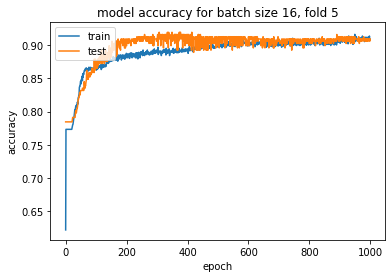

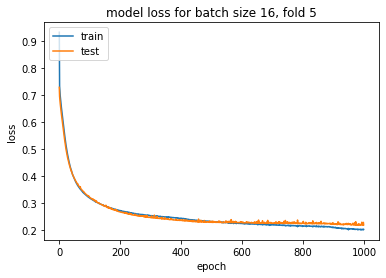

Epoch 1/1000
38/38 - 0s - loss: 1.0871 - accuracy: 0.3787 - val_loss: 1.0129 - val_accuracy: 0.7744
Epoch 2/1000
38/38 - 0s - loss: 0.9646 - accuracy: 0.7691 - val_loss: 0.9079 - val_accuracy: 0.7946
Epoch 3/1000
38/38 - 0s - loss: 0.8818 - accuracy: 0.7708 - val_loss: 0.8320 - val_accuracy: 0.7946
Epoch 4/1000
38/38 - 0s - loss: 0.8221 - accuracy: 0.7708 - val_loss: 0.7783 - val_accuracy: 0.7946
Epoch 5/1000
38/38 - 0s - loss: 0.7802 - accuracy: 0.7708 - val_loss: 0.7382 - val_accuracy: 0.7946
Epoch 6/1000
38/38 - 0s - loss: 0.7496 - accuracy: 0.7708 - val_loss: 0.7109 - val_accuracy: 0.7946
Epoch 7/1000
38/38 - 0s - loss: 0.7294 - accuracy: 0.7708 - val_loss: 0.6916 - val_accuracy: 0.7946
Epoch 8/1000
38/38 - 0s - loss: 0.7155 - accuracy: 0.7708 - val_loss: 0.6783 - val_accuracy: 0.7946
Epoch 9/1000
38/38 - 0s - loss: 0.7060 - accuracy: 0.7708 - val_loss: 0.6679 - val_accuracy: 0.7946
Epoch 10/1000
38/38 - 0s - loss: 0.6988 - accuracy: 0.7708 - val_loss: 0.6611 - val_accuracy: 0.7946

Epoch 83/1000
38/38 - 0s - loss: 0.4132 - accuracy: 0.8396 - val_loss: 0.4105 - val_accuracy: 0.8215
Epoch 84/1000
38/38 - 0s - loss: 0.4106 - accuracy: 0.8363 - val_loss: 0.4079 - val_accuracy: 0.8215
Epoch 85/1000
38/38 - 0s - loss: 0.4078 - accuracy: 0.8380 - val_loss: 0.4057 - val_accuracy: 0.8316
Epoch 86/1000
38/38 - 0s - loss: 0.4053 - accuracy: 0.8380 - val_loss: 0.4030 - val_accuracy: 0.8316
Epoch 87/1000
38/38 - 0s - loss: 0.4026 - accuracy: 0.8396 - val_loss: 0.4006 - val_accuracy: 0.8316
Epoch 88/1000
38/38 - 0s - loss: 0.3999 - accuracy: 0.8405 - val_loss: 0.3982 - val_accuracy: 0.8384
Epoch 89/1000
38/38 - 0s - loss: 0.3974 - accuracy: 0.8396 - val_loss: 0.3959 - val_accuracy: 0.8418
Epoch 90/1000
38/38 - 0s - loss: 0.3951 - accuracy: 0.8421 - val_loss: 0.3938 - val_accuracy: 0.8485
Epoch 91/1000
38/38 - 0s - loss: 0.3927 - accuracy: 0.8405 - val_loss: 0.3912 - val_accuracy: 0.8451
Epoch 92/1000
38/38 - 0s - loss: 0.3902 - accuracy: 0.8430 - val_loss: 0.3899 - val_accurac

Epoch 164/1000
38/38 - 0s - loss: 0.3053 - accuracy: 0.8732 - val_loss: 0.3044 - val_accuracy: 0.8788
Epoch 165/1000
38/38 - 0s - loss: 0.3045 - accuracy: 0.8757 - val_loss: 0.3040 - val_accuracy: 0.8788
Epoch 166/1000
38/38 - 0s - loss: 0.3040 - accuracy: 0.8741 - val_loss: 0.3031 - val_accuracy: 0.8788
Epoch 167/1000
38/38 - 0s - loss: 0.3033 - accuracy: 0.8749 - val_loss: 0.3034 - val_accuracy: 0.8822
Epoch 168/1000
38/38 - 0s - loss: 0.3030 - accuracy: 0.8732 - val_loss: 0.3023 - val_accuracy: 0.8822
Epoch 169/1000
38/38 - 0s - loss: 0.3024 - accuracy: 0.8783 - val_loss: 0.3014 - val_accuracy: 0.8822
Epoch 170/1000
38/38 - 0s - loss: 0.3018 - accuracy: 0.8749 - val_loss: 0.3007 - val_accuracy: 0.8788
Epoch 171/1000
38/38 - 0s - loss: 0.3009 - accuracy: 0.8791 - val_loss: 0.3001 - val_accuracy: 0.8788
Epoch 172/1000
38/38 - 0s - loss: 0.3004 - accuracy: 0.8757 - val_loss: 0.2996 - val_accuracy: 0.8822
Epoch 173/1000
38/38 - 0s - loss: 0.3001 - accuracy: 0.8766 - val_loss: 0.2992 - v

Epoch 245/1000
38/38 - 0s - loss: 0.2724 - accuracy: 0.8883 - val_loss: 0.2726 - val_accuracy: 0.8990
Epoch 246/1000
38/38 - 0s - loss: 0.2722 - accuracy: 0.8892 - val_loss: 0.2731 - val_accuracy: 0.8956
Epoch 247/1000
38/38 - 0s - loss: 0.2719 - accuracy: 0.8850 - val_loss: 0.2723 - val_accuracy: 0.8956
Epoch 248/1000
38/38 - 0s - loss: 0.2717 - accuracy: 0.8875 - val_loss: 0.2730 - val_accuracy: 0.8990
Epoch 249/1000
38/38 - 0s - loss: 0.2717 - accuracy: 0.8875 - val_loss: 0.2716 - val_accuracy: 0.8956
Epoch 250/1000
38/38 - 0s - loss: 0.2711 - accuracy: 0.8875 - val_loss: 0.2714 - val_accuracy: 0.8956
Epoch 251/1000
38/38 - 0s - loss: 0.2712 - accuracy: 0.8866 - val_loss: 0.2714 - val_accuracy: 0.8923
Epoch 252/1000
38/38 - 0s - loss: 0.2706 - accuracy: 0.8908 - val_loss: 0.2714 - val_accuracy: 0.8923
Epoch 253/1000
38/38 - 0s - loss: 0.2709 - accuracy: 0.8908 - val_loss: 0.2707 - val_accuracy: 0.8923
Epoch 254/1000
38/38 - 0s - loss: 0.2704 - accuracy: 0.8866 - val_loss: 0.2704 - v

Epoch 326/1000
38/38 - 0s - loss: 0.2572 - accuracy: 0.8925 - val_loss: 0.2602 - val_accuracy: 0.8956
Epoch 327/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8908 - val_loss: 0.2600 - val_accuracy: 0.8956
Epoch 328/1000
38/38 - 0s - loss: 0.2567 - accuracy: 0.8942 - val_loss: 0.2598 - val_accuracy: 0.8956
Epoch 329/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8942 - val_loss: 0.2587 - val_accuracy: 0.9024
Epoch 330/1000
38/38 - 0s - loss: 0.2565 - accuracy: 0.8950 - val_loss: 0.2585 - val_accuracy: 0.8990
Epoch 331/1000
38/38 - 0s - loss: 0.2565 - accuracy: 0.8934 - val_loss: 0.2581 - val_accuracy: 0.9024
Epoch 332/1000
38/38 - 0s - loss: 0.2562 - accuracy: 0.8942 - val_loss: 0.2582 - val_accuracy: 0.9024
Epoch 333/1000
38/38 - 0s - loss: 0.2558 - accuracy: 0.8967 - val_loss: 0.2589 - val_accuracy: 0.8990
Epoch 334/1000
38/38 - 0s - loss: 0.2558 - accuracy: 0.8959 - val_loss: 0.2584 - val_accuracy: 0.8956
Epoch 335/1000
38/38 - 0s - loss: 0.2559 - accuracy: 0.8917 - val_loss: 0.2583 - v

Epoch 407/1000
38/38 - 0s - loss: 0.2477 - accuracy: 0.8984 - val_loss: 0.2512 - val_accuracy: 0.8990
Epoch 408/1000
38/38 - 0s - loss: 0.2478 - accuracy: 0.8984 - val_loss: 0.2514 - val_accuracy: 0.9024
Epoch 409/1000
38/38 - 0s - loss: 0.2475 - accuracy: 0.8976 - val_loss: 0.2516 - val_accuracy: 0.9024
Epoch 410/1000
38/38 - 0s - loss: 0.2475 - accuracy: 0.8992 - val_loss: 0.2511 - val_accuracy: 0.8990
Epoch 411/1000
38/38 - 0s - loss: 0.2473 - accuracy: 0.8950 - val_loss: 0.2509 - val_accuracy: 0.8990
Epoch 412/1000
38/38 - 0s - loss: 0.2472 - accuracy: 0.8950 - val_loss: 0.2507 - val_accuracy: 0.8990
Epoch 413/1000
38/38 - 0s - loss: 0.2475 - accuracy: 0.8976 - val_loss: 0.2506 - val_accuracy: 0.8990
Epoch 414/1000
38/38 - 0s - loss: 0.2477 - accuracy: 0.8967 - val_loss: 0.2510 - val_accuracy: 0.9024
Epoch 415/1000
38/38 - 0s - loss: 0.2468 - accuracy: 0.8967 - val_loss: 0.2505 - val_accuracy: 0.8990
Epoch 416/1000
38/38 - 0s - loss: 0.2473 - accuracy: 0.8959 - val_loss: 0.2504 - v

Epoch 488/1000
38/38 - 0s - loss: 0.2414 - accuracy: 0.9034 - val_loss: 0.2460 - val_accuracy: 0.8990
Epoch 489/1000
38/38 - 0s - loss: 0.2414 - accuracy: 0.8992 - val_loss: 0.2460 - val_accuracy: 0.8990
Epoch 490/1000
38/38 - 0s - loss: 0.2410 - accuracy: 0.8976 - val_loss: 0.2470 - val_accuracy: 0.9024
Epoch 491/1000
38/38 - 0s - loss: 0.2412 - accuracy: 0.9009 - val_loss: 0.2463 - val_accuracy: 0.9024
Epoch 492/1000
38/38 - 0s - loss: 0.2408 - accuracy: 0.9018 - val_loss: 0.2460 - val_accuracy: 0.8990
Epoch 493/1000
38/38 - 0s - loss: 0.2409 - accuracy: 0.9026 - val_loss: 0.2455 - val_accuracy: 0.9024
Epoch 494/1000
38/38 - 0s - loss: 0.2412 - accuracy: 0.8984 - val_loss: 0.2456 - val_accuracy: 0.8990
Epoch 495/1000
38/38 - 0s - loss: 0.2409 - accuracy: 0.9001 - val_loss: 0.2457 - val_accuracy: 0.8990
Epoch 496/1000
38/38 - 0s - loss: 0.2405 - accuracy: 0.9001 - val_loss: 0.2477 - val_accuracy: 0.9024
Epoch 497/1000
38/38 - 0s - loss: 0.2407 - accuracy: 0.9018 - val_loss: 0.2455 - v

Epoch 569/1000
38/38 - 0s - loss: 0.2359 - accuracy: 0.9026 - val_loss: 0.2418 - val_accuracy: 0.8990
Epoch 570/1000
38/38 - 0s - loss: 0.2363 - accuracy: 0.8992 - val_loss: 0.2427 - val_accuracy: 0.9024
Epoch 571/1000
38/38 - 0s - loss: 0.2359 - accuracy: 0.9026 - val_loss: 0.2421 - val_accuracy: 0.8990
Epoch 572/1000
38/38 - 0s - loss: 0.2357 - accuracy: 0.9009 - val_loss: 0.2438 - val_accuracy: 0.9057
Epoch 573/1000
38/38 - 0s - loss: 0.2360 - accuracy: 0.9018 - val_loss: 0.2423 - val_accuracy: 0.8990
Epoch 574/1000
38/38 - 0s - loss: 0.2359 - accuracy: 0.9018 - val_loss: 0.2419 - val_accuracy: 0.8990
Epoch 575/1000
38/38 - 0s - loss: 0.2360 - accuracy: 0.9009 - val_loss: 0.2418 - val_accuracy: 0.8990
Epoch 576/1000
38/38 - 0s - loss: 0.2358 - accuracy: 0.9043 - val_loss: 0.2418 - val_accuracy: 0.8990
Epoch 577/1000
38/38 - 0s - loss: 0.2353 - accuracy: 0.9034 - val_loss: 0.2417 - val_accuracy: 0.8990
Epoch 578/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9026 - val_loss: 0.2415 - v

Epoch 650/1000
38/38 - 0s - loss: 0.2321 - accuracy: 0.9043 - val_loss: 0.2393 - val_accuracy: 0.9024
Epoch 651/1000
38/38 - 0s - loss: 0.2313 - accuracy: 0.9026 - val_loss: 0.2391 - val_accuracy: 0.9024
Epoch 652/1000
38/38 - 0s - loss: 0.2314 - accuracy: 0.9051 - val_loss: 0.2400 - val_accuracy: 0.9024
Epoch 653/1000
38/38 - 0s - loss: 0.2315 - accuracy: 0.9018 - val_loss: 0.2390 - val_accuracy: 0.8990
Epoch 654/1000
38/38 - 0s - loss: 0.2315 - accuracy: 0.9051 - val_loss: 0.2385 - val_accuracy: 0.8956
Epoch 655/1000
38/38 - 0s - loss: 0.2316 - accuracy: 0.9001 - val_loss: 0.2389 - val_accuracy: 0.8990
Epoch 656/1000
38/38 - 0s - loss: 0.2311 - accuracy: 0.9060 - val_loss: 0.2389 - val_accuracy: 0.8990
Epoch 657/1000
38/38 - 0s - loss: 0.2313 - accuracy: 0.9051 - val_loss: 0.2392 - val_accuracy: 0.8990
Epoch 658/1000
38/38 - 0s - loss: 0.2316 - accuracy: 0.9043 - val_loss: 0.2391 - val_accuracy: 0.8990
Epoch 659/1000
38/38 - 0s - loss: 0.2313 - accuracy: 0.9068 - val_loss: 0.2391 - v

Epoch 731/1000
38/38 - 0s - loss: 0.2276 - accuracy: 0.9060 - val_loss: 0.2390 - val_accuracy: 0.9024
Epoch 732/1000
38/38 - 0s - loss: 0.2277 - accuracy: 0.9085 - val_loss: 0.2375 - val_accuracy: 0.8990
Epoch 733/1000
38/38 - 0s - loss: 0.2278 - accuracy: 0.9060 - val_loss: 0.2384 - val_accuracy: 0.9024
Epoch 734/1000
38/38 - 0s - loss: 0.2277 - accuracy: 0.9051 - val_loss: 0.2380 - val_accuracy: 0.8990
Epoch 735/1000
38/38 - 0s - loss: 0.2279 - accuracy: 0.9068 - val_loss: 0.2373 - val_accuracy: 0.8990
Epoch 736/1000
38/38 - 0s - loss: 0.2277 - accuracy: 0.9093 - val_loss: 0.2373 - val_accuracy: 0.8956
Epoch 737/1000
38/38 - 0s - loss: 0.2276 - accuracy: 0.9068 - val_loss: 0.2386 - val_accuracy: 0.9024
Epoch 738/1000
38/38 - 0s - loss: 0.2273 - accuracy: 0.9060 - val_loss: 0.2380 - val_accuracy: 0.8990
Epoch 739/1000
38/38 - 0s - loss: 0.2276 - accuracy: 0.9043 - val_loss: 0.2370 - val_accuracy: 0.8956
Epoch 740/1000
38/38 - 0s - loss: 0.2274 - accuracy: 0.9093 - val_loss: 0.2375 - v

Epoch 812/1000
38/38 - 0s - loss: 0.2250 - accuracy: 0.9018 - val_loss: 0.2362 - val_accuracy: 0.8990
Epoch 813/1000
38/38 - 0s - loss: 0.2244 - accuracy: 0.9043 - val_loss: 0.2370 - val_accuracy: 0.9024
Epoch 814/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9110 - val_loss: 0.2373 - val_accuracy: 0.9057
Epoch 815/1000
38/38 - 0s - loss: 0.2242 - accuracy: 0.9093 - val_loss: 0.2359 - val_accuracy: 0.8990
Epoch 816/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9076 - val_loss: 0.2361 - val_accuracy: 0.8990
Epoch 817/1000
38/38 - 0s - loss: 0.2242 - accuracy: 0.9085 - val_loss: 0.2364 - val_accuracy: 0.9024
Epoch 818/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9093 - val_loss: 0.2372 - val_accuracy: 0.9057
Epoch 819/1000
38/38 - 0s - loss: 0.2237 - accuracy: 0.9110 - val_loss: 0.2358 - val_accuracy: 0.8956
Epoch 820/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9102 - val_loss: 0.2384 - val_accuracy: 0.8990
Epoch 821/1000
38/38 - 0s - loss: 0.2249 - accuracy: 0.9093 - val_loss: 0.2357 - v

Epoch 893/1000
38/38 - 0s - loss: 0.2212 - accuracy: 0.9118 - val_loss: 0.2345 - val_accuracy: 0.8990
Epoch 894/1000
38/38 - 0s - loss: 0.2211 - accuracy: 0.9118 - val_loss: 0.2344 - val_accuracy: 0.8990
Epoch 895/1000
38/38 - 0s - loss: 0.2208 - accuracy: 0.9110 - val_loss: 0.2344 - val_accuracy: 0.8990
Epoch 896/1000
38/38 - 0s - loss: 0.2210 - accuracy: 0.9076 - val_loss: 0.2342 - val_accuracy: 0.8990
Epoch 897/1000
38/38 - 0s - loss: 0.2204 - accuracy: 0.9093 - val_loss: 0.2347 - val_accuracy: 0.9057
Epoch 898/1000
38/38 - 0s - loss: 0.2212 - accuracy: 0.9093 - val_loss: 0.2345 - val_accuracy: 0.8990
Epoch 899/1000
38/38 - 0s - loss: 0.2203 - accuracy: 0.9093 - val_loss: 0.2343 - val_accuracy: 0.8956
Epoch 900/1000
38/38 - 0s - loss: 0.2211 - accuracy: 0.9085 - val_loss: 0.2343 - val_accuracy: 0.8990
Epoch 901/1000
38/38 - 0s - loss: 0.2204 - accuracy: 0.9076 - val_loss: 0.2348 - val_accuracy: 0.8990
Epoch 902/1000
38/38 - 0s - loss: 0.2200 - accuracy: 0.9110 - val_loss: 0.2348 - v

Epoch 974/1000
38/38 - 0s - loss: 0.2177 - accuracy: 0.9118 - val_loss: 0.2330 - val_accuracy: 0.9024
Epoch 975/1000
38/38 - 0s - loss: 0.2178 - accuracy: 0.9110 - val_loss: 0.2329 - val_accuracy: 0.8990
Epoch 976/1000
38/38 - 0s - loss: 0.2177 - accuracy: 0.9118 - val_loss: 0.2330 - val_accuracy: 0.9057
Epoch 977/1000
38/38 - 0s - loss: 0.2174 - accuracy: 0.9127 - val_loss: 0.2331 - val_accuracy: 0.9024
Epoch 978/1000
38/38 - 0s - loss: 0.2178 - accuracy: 0.9152 - val_loss: 0.2329 - val_accuracy: 0.9024
Epoch 979/1000
38/38 - 0s - loss: 0.2175 - accuracy: 0.9110 - val_loss: 0.2328 - val_accuracy: 0.9024
Epoch 980/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9118 - val_loss: 0.2329 - val_accuracy: 0.8990
Epoch 981/1000
38/38 - 0s - loss: 0.2175 - accuracy: 0.9110 - val_loss: 0.2329 - val_accuracy: 0.9024
Epoch 982/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9127 - val_loss: 0.2338 - val_accuracy: 0.8990
Epoch 983/1000
38/38 - 0s - loss: 0.2174 - accuracy: 0.9102 - val_loss: 0.2332 - v

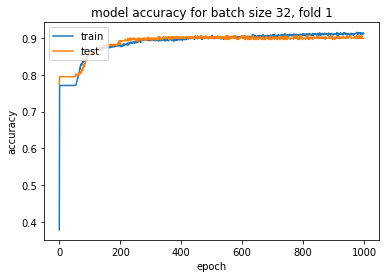

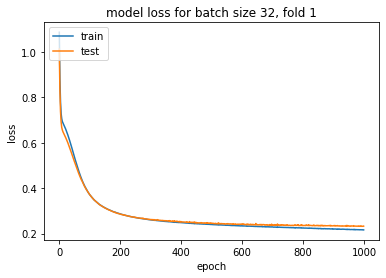

Epoch 1/1000
38/38 - 0s - loss: 1.1971 - accuracy: 0.3736 - val_loss: 0.9080 - val_accuracy: 0.7138
Epoch 2/1000
38/38 - 0s - loss: 0.7884 - accuracy: 0.7825 - val_loss: 0.7483 - val_accuracy: 0.7744
Epoch 3/1000
38/38 - 0s - loss: 0.6895 - accuracy: 0.7842 - val_loss: 0.6964 - val_accuracy: 0.7744
Epoch 4/1000
38/38 - 0s - loss: 0.6530 - accuracy: 0.7809 - val_loss: 0.6720 - val_accuracy: 0.7609
Epoch 5/1000
38/38 - 0s - loss: 0.6341 - accuracy: 0.7800 - val_loss: 0.6543 - val_accuracy: 0.7576
Epoch 6/1000
38/38 - 0s - loss: 0.6198 - accuracy: 0.7800 - val_loss: 0.6395 - val_accuracy: 0.7576
Epoch 7/1000
38/38 - 0s - loss: 0.6082 - accuracy: 0.7800 - val_loss: 0.6267 - val_accuracy: 0.7576
Epoch 8/1000
38/38 - 0s - loss: 0.5982 - accuracy: 0.7800 - val_loss: 0.6149 - val_accuracy: 0.7576
Epoch 9/1000
38/38 - 0s - loss: 0.5888 - accuracy: 0.7800 - val_loss: 0.6038 - val_accuracy: 0.7576
Epoch 10/1000
38/38 - 0s - loss: 0.5802 - accuracy: 0.7800 - val_loss: 0.5930 - val_accuracy: 0.7576

Epoch 83/1000
38/38 - 0s - loss: 0.3385 - accuracy: 0.8615 - val_loss: 0.3071 - val_accuracy: 0.8990
Epoch 84/1000
38/38 - 0s - loss: 0.3375 - accuracy: 0.8631 - val_loss: 0.3060 - val_accuracy: 0.8923
Epoch 85/1000
38/38 - 0s - loss: 0.3365 - accuracy: 0.8606 - val_loss: 0.3061 - val_accuracy: 0.8923
Epoch 86/1000
38/38 - 0s - loss: 0.3354 - accuracy: 0.8615 - val_loss: 0.3051 - val_accuracy: 0.8923
Epoch 87/1000
38/38 - 0s - loss: 0.3340 - accuracy: 0.8623 - val_loss: 0.3039 - val_accuracy: 0.8956
Epoch 88/1000
38/38 - 0s - loss: 0.3330 - accuracy: 0.8623 - val_loss: 0.3030 - val_accuracy: 0.8923
Epoch 89/1000
38/38 - 0s - loss: 0.3318 - accuracy: 0.8640 - val_loss: 0.3018 - val_accuracy: 0.8956
Epoch 90/1000
38/38 - 0s - loss: 0.3311 - accuracy: 0.8606 - val_loss: 0.3019 - val_accuracy: 0.8990
Epoch 91/1000
38/38 - 0s - loss: 0.3300 - accuracy: 0.8640 - val_loss: 0.3003 - val_accuracy: 0.8990
Epoch 92/1000
38/38 - 0s - loss: 0.3289 - accuracy: 0.8615 - val_loss: 0.3005 - val_accurac

Epoch 164/1000
38/38 - 0s - loss: 0.2825 - accuracy: 0.8808 - val_loss: 0.2662 - val_accuracy: 0.9057
Epoch 165/1000
38/38 - 0s - loss: 0.2821 - accuracy: 0.8850 - val_loss: 0.2656 - val_accuracy: 0.9024
Epoch 166/1000
38/38 - 0s - loss: 0.2813 - accuracy: 0.8850 - val_loss: 0.2647 - val_accuracy: 0.9024
Epoch 167/1000
38/38 - 0s - loss: 0.2810 - accuracy: 0.8825 - val_loss: 0.2643 - val_accuracy: 0.9057
Epoch 168/1000
38/38 - 0s - loss: 0.2810 - accuracy: 0.8833 - val_loss: 0.2642 - val_accuracy: 0.9024
Epoch 169/1000
38/38 - 0s - loss: 0.2806 - accuracy: 0.8816 - val_loss: 0.2652 - val_accuracy: 0.9057
Epoch 170/1000
38/38 - 0s - loss: 0.2798 - accuracy: 0.8841 - val_loss: 0.2642 - val_accuracy: 0.9024
Epoch 171/1000
38/38 - 0s - loss: 0.2793 - accuracy: 0.8825 - val_loss: 0.2644 - val_accuracy: 0.9057
Epoch 172/1000
38/38 - 0s - loss: 0.2789 - accuracy: 0.8866 - val_loss: 0.2641 - val_accuracy: 0.9091
Epoch 173/1000
38/38 - 0s - loss: 0.2792 - accuracy: 0.8841 - val_loss: 0.2636 - v

Epoch 245/1000
38/38 - 0s - loss: 0.2577 - accuracy: 0.8967 - val_loss: 0.2562 - val_accuracy: 0.9024
Epoch 246/1000
38/38 - 0s - loss: 0.2577 - accuracy: 0.8959 - val_loss: 0.2552 - val_accuracy: 0.9024
Epoch 247/1000
38/38 - 0s - loss: 0.2574 - accuracy: 0.8976 - val_loss: 0.2560 - val_accuracy: 0.9057
Epoch 248/1000
38/38 - 0s - loss: 0.2570 - accuracy: 0.8942 - val_loss: 0.2549 - val_accuracy: 0.9024
Epoch 249/1000
38/38 - 0s - loss: 0.2572 - accuracy: 0.8976 - val_loss: 0.2563 - val_accuracy: 0.9057
Epoch 250/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8959 - val_loss: 0.2556 - val_accuracy: 0.9057
Epoch 251/1000
38/38 - 0s - loss: 0.2566 - accuracy: 0.8984 - val_loss: 0.2560 - val_accuracy: 0.9057
Epoch 252/1000
38/38 - 0s - loss: 0.2564 - accuracy: 0.8942 - val_loss: 0.2560 - val_accuracy: 0.9057
Epoch 253/1000
38/38 - 0s - loss: 0.2564 - accuracy: 0.8934 - val_loss: 0.2553 - val_accuracy: 0.9024
Epoch 254/1000
38/38 - 0s - loss: 0.2564 - accuracy: 0.8959 - val_loss: 0.2585 - v

Epoch 326/1000
38/38 - 0s - loss: 0.2446 - accuracy: 0.8992 - val_loss: 0.2540 - val_accuracy: 0.8990
Epoch 327/1000
38/38 - 0s - loss: 0.2445 - accuracy: 0.8984 - val_loss: 0.2534 - val_accuracy: 0.8990
Epoch 328/1000
38/38 - 0s - loss: 0.2445 - accuracy: 0.9001 - val_loss: 0.2537 - val_accuracy: 0.8990
Epoch 329/1000
38/38 - 0s - loss: 0.2443 - accuracy: 0.8984 - val_loss: 0.2541 - val_accuracy: 0.9024
Epoch 330/1000
38/38 - 0s - loss: 0.2440 - accuracy: 0.8967 - val_loss: 0.2538 - val_accuracy: 0.9024
Epoch 331/1000
38/38 - 0s - loss: 0.2440 - accuracy: 0.8992 - val_loss: 0.2548 - val_accuracy: 0.9024
Epoch 332/1000
38/38 - 0s - loss: 0.2438 - accuracy: 0.8959 - val_loss: 0.2546 - val_accuracy: 0.9024
Epoch 333/1000
38/38 - 0s - loss: 0.2439 - accuracy: 0.8984 - val_loss: 0.2558 - val_accuracy: 0.8990
Epoch 334/1000
38/38 - 0s - loss: 0.2436 - accuracy: 0.8984 - val_loss: 0.2559 - val_accuracy: 0.8990
Epoch 335/1000
38/38 - 0s - loss: 0.2437 - accuracy: 0.9001 - val_loss: 0.2557 - v

Epoch 407/1000
38/38 - 0s - loss: 0.2356 - accuracy: 0.9018 - val_loss: 0.2578 - val_accuracy: 0.9024
Epoch 408/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.9051 - val_loss: 0.2557 - val_accuracy: 0.8956
Epoch 409/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.9034 - val_loss: 0.2559 - val_accuracy: 0.8956
Epoch 410/1000
38/38 - 0s - loss: 0.2353 - accuracy: 0.9018 - val_loss: 0.2555 - val_accuracy: 0.8956
Epoch 411/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9034 - val_loss: 0.2562 - val_accuracy: 0.9057
Epoch 412/1000
38/38 - 0s - loss: 0.2352 - accuracy: 0.9018 - val_loss: 0.2592 - val_accuracy: 0.9024
Epoch 413/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9018 - val_loss: 0.2575 - val_accuracy: 0.8956
Epoch 414/1000
38/38 - 0s - loss: 0.2356 - accuracy: 0.9009 - val_loss: 0.2561 - val_accuracy: 0.8956
Epoch 415/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9018 - val_loss: 0.2564 - val_accuracy: 0.8990
Epoch 416/1000
38/38 - 0s - loss: 0.2348 - accuracy: 0.9026 - val_loss: 0.2557 - v

Epoch 488/1000
38/38 - 0s - loss: 0.2298 - accuracy: 0.9026 - val_loss: 0.2563 - val_accuracy: 0.9057
Epoch 489/1000
38/38 - 0s - loss: 0.2299 - accuracy: 0.9043 - val_loss: 0.2557 - val_accuracy: 0.9057
Epoch 490/1000
38/38 - 0s - loss: 0.2290 - accuracy: 0.9051 - val_loss: 0.2552 - val_accuracy: 0.8990
Epoch 491/1000
38/38 - 0s - loss: 0.2299 - accuracy: 0.9026 - val_loss: 0.2551 - val_accuracy: 0.8956
Epoch 492/1000
38/38 - 0s - loss: 0.2292 - accuracy: 0.9043 - val_loss: 0.2547 - val_accuracy: 0.8956
Epoch 493/1000
38/38 - 0s - loss: 0.2293 - accuracy: 0.9043 - val_loss: 0.2548 - val_accuracy: 0.9024
Epoch 494/1000
38/38 - 0s - loss: 0.2296 - accuracy: 0.9018 - val_loss: 0.2544 - val_accuracy: 0.9024
Epoch 495/1000
38/38 - 0s - loss: 0.2291 - accuracy: 0.9034 - val_loss: 0.2566 - val_accuracy: 0.8956
Epoch 496/1000
38/38 - 0s - loss: 0.2281 - accuracy: 0.9009 - val_loss: 0.2545 - val_accuracy: 0.8990
Epoch 497/1000
38/38 - 0s - loss: 0.2293 - accuracy: 0.9018 - val_loss: 0.2546 - v

Epoch 569/1000
38/38 - 0s - loss: 0.2247 - accuracy: 0.9068 - val_loss: 0.2543 - val_accuracy: 0.8990
Epoch 570/1000
38/38 - 0s - loss: 0.2244 - accuracy: 0.9051 - val_loss: 0.2546 - val_accuracy: 0.8956
Epoch 571/1000
38/38 - 0s - loss: 0.2246 - accuracy: 0.9051 - val_loss: 0.2555 - val_accuracy: 0.9024
Epoch 572/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9068 - val_loss: 0.2539 - val_accuracy: 0.8990
Epoch 573/1000
38/38 - 0s - loss: 0.2246 - accuracy: 0.9060 - val_loss: 0.2531 - val_accuracy: 0.8990
Epoch 574/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9068 - val_loss: 0.2550 - val_accuracy: 0.9024
Epoch 575/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9068 - val_loss: 0.2546 - val_accuracy: 0.8990
Epoch 576/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9068 - val_loss: 0.2542 - val_accuracy: 0.8956
Epoch 577/1000
38/38 - 0s - loss: 0.2241 - accuracy: 0.9051 - val_loss: 0.2524 - val_accuracy: 0.8990
Epoch 578/1000
38/38 - 0s - loss: 0.2246 - accuracy: 0.9043 - val_loss: 0.2538 - v

Epoch 650/1000
38/38 - 0s - loss: 0.2214 - accuracy: 0.9060 - val_loss: 0.2541 - val_accuracy: 0.8923
Epoch 651/1000
38/38 - 0s - loss: 0.2203 - accuracy: 0.9068 - val_loss: 0.2538 - val_accuracy: 0.8990
Epoch 652/1000
38/38 - 0s - loss: 0.2200 - accuracy: 0.9093 - val_loss: 0.2554 - val_accuracy: 0.8923
Epoch 653/1000
38/38 - 0s - loss: 0.2205 - accuracy: 0.9060 - val_loss: 0.2556 - val_accuracy: 0.8923
Epoch 654/1000
38/38 - 0s - loss: 0.2201 - accuracy: 0.9068 - val_loss: 0.2557 - val_accuracy: 0.8990
Epoch 655/1000
38/38 - 0s - loss: 0.2203 - accuracy: 0.9085 - val_loss: 0.2566 - val_accuracy: 0.8990
Epoch 656/1000
38/38 - 0s - loss: 0.2202 - accuracy: 0.9076 - val_loss: 0.2545 - val_accuracy: 0.8923
Epoch 657/1000
38/38 - 0s - loss: 0.2200 - accuracy: 0.9085 - val_loss: 0.2548 - val_accuracy: 0.8923
Epoch 658/1000
38/38 - 0s - loss: 0.2203 - accuracy: 0.9076 - val_loss: 0.2579 - val_accuracy: 0.8889
Epoch 659/1000
38/38 - 0s - loss: 0.2207 - accuracy: 0.9085 - val_loss: 0.2553 - v

Epoch 731/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9076 - val_loss: 0.2514 - val_accuracy: 0.8923
Epoch 732/1000
38/38 - 0s - loss: 0.2173 - accuracy: 0.9085 - val_loss: 0.2514 - val_accuracy: 0.8956
Epoch 733/1000
38/38 - 0s - loss: 0.2168 - accuracy: 0.9076 - val_loss: 0.2500 - val_accuracy: 0.8956
Epoch 734/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9068 - val_loss: 0.2517 - val_accuracy: 0.8923
Epoch 735/1000
38/38 - 0s - loss: 0.2171 - accuracy: 0.9102 - val_loss: 0.2522 - val_accuracy: 0.8956
Epoch 736/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9093 - val_loss: 0.2525 - val_accuracy: 0.9024
Epoch 737/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9102 - val_loss: 0.2507 - val_accuracy: 0.8990
Epoch 738/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9102 - val_loss: 0.2505 - val_accuracy: 0.8990
Epoch 739/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9102 - val_loss: 0.2523 - val_accuracy: 0.9024
Epoch 740/1000
38/38 - 0s - loss: 0.2165 - accuracy: 0.9060 - val_loss: 0.2520 - v

Epoch 812/1000
38/38 - 0s - loss: 0.2134 - accuracy: 0.9068 - val_loss: 0.2515 - val_accuracy: 0.8923
Epoch 813/1000
38/38 - 0s - loss: 0.2143 - accuracy: 0.9076 - val_loss: 0.2507 - val_accuracy: 0.8956
Epoch 814/1000
38/38 - 0s - loss: 0.2135 - accuracy: 0.9093 - val_loss: 0.2516 - val_accuracy: 0.8923
Epoch 815/1000
38/38 - 0s - loss: 0.2138 - accuracy: 0.9093 - val_loss: 0.2504 - val_accuracy: 0.8956
Epoch 816/1000
38/38 - 0s - loss: 0.2136 - accuracy: 0.9076 - val_loss: 0.2497 - val_accuracy: 0.8990
Epoch 817/1000
38/38 - 0s - loss: 0.2136 - accuracy: 0.9085 - val_loss: 0.2519 - val_accuracy: 0.8923
Epoch 818/1000
38/38 - 0s - loss: 0.2141 - accuracy: 0.9093 - val_loss: 0.2529 - val_accuracy: 0.8889
Epoch 819/1000
38/38 - 0s - loss: 0.2136 - accuracy: 0.9060 - val_loss: 0.2510 - val_accuracy: 0.9024
Epoch 820/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.9051 - val_loss: 0.2566 - val_accuracy: 0.8956
Epoch 821/1000
38/38 - 0s - loss: 0.2145 - accuracy: 0.9060 - val_loss: 0.2512 - v

Epoch 893/1000
38/38 - 0s - loss: 0.2110 - accuracy: 0.9110 - val_loss: 0.2489 - val_accuracy: 0.8990
Epoch 894/1000
38/38 - 0s - loss: 0.2106 - accuracy: 0.9043 - val_loss: 0.2489 - val_accuracy: 0.9057
Epoch 895/1000
38/38 - 0s - loss: 0.2109 - accuracy: 0.9093 - val_loss: 0.2480 - val_accuracy: 0.9024
Epoch 896/1000
38/38 - 0s - loss: 0.2106 - accuracy: 0.9102 - val_loss: 0.2486 - val_accuracy: 0.9024
Epoch 897/1000
38/38 - 0s - loss: 0.2107 - accuracy: 0.9110 - val_loss: 0.2521 - val_accuracy: 0.8956
Epoch 898/1000
38/38 - 0s - loss: 0.2115 - accuracy: 0.9085 - val_loss: 0.2481 - val_accuracy: 0.9024
Epoch 899/1000
38/38 - 0s - loss: 0.2103 - accuracy: 0.9076 - val_loss: 0.2481 - val_accuracy: 0.9057
Epoch 900/1000
38/38 - 0s - loss: 0.2111 - accuracy: 0.9085 - val_loss: 0.2478 - val_accuracy: 0.9057
Epoch 901/1000
38/38 - 0s - loss: 0.2102 - accuracy: 0.9076 - val_loss: 0.2491 - val_accuracy: 0.8990
Epoch 902/1000
38/38 - 0s - loss: 0.2103 - accuracy: 0.9118 - val_loss: 0.2483 - v

Epoch 974/1000
38/38 - 0s - loss: 0.2087 - accuracy: 0.9102 - val_loss: 0.2473 - val_accuracy: 0.9057
Epoch 975/1000
38/38 - 0s - loss: 0.2077 - accuracy: 0.9102 - val_loss: 0.2487 - val_accuracy: 0.8956
Epoch 976/1000
38/38 - 0s - loss: 0.2083 - accuracy: 0.9093 - val_loss: 0.2484 - val_accuracy: 0.9024
Epoch 977/1000
38/38 - 0s - loss: 0.2080 - accuracy: 0.9085 - val_loss: 0.2483 - val_accuracy: 0.9057
Epoch 978/1000
38/38 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2491 - val_accuracy: 0.9057
Epoch 979/1000
38/38 - 0s - loss: 0.2079 - accuracy: 0.9085 - val_loss: 0.2483 - val_accuracy: 0.9057
Epoch 980/1000
38/38 - 0s - loss: 0.2072 - accuracy: 0.9102 - val_loss: 0.2478 - val_accuracy: 0.8990
Epoch 981/1000
38/38 - 0s - loss: 0.2084 - accuracy: 0.9110 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 982/1000
38/38 - 0s - loss: 0.2080 - accuracy: 0.9093 - val_loss: 0.2506 - val_accuracy: 0.8956
Epoch 983/1000
38/38 - 0s - loss: 0.2084 - accuracy: 0.9076 - val_loss: 0.2494 - v

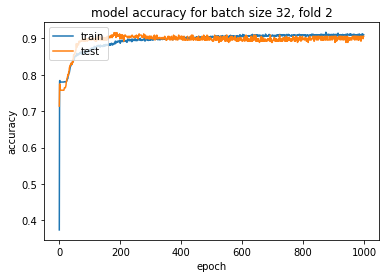

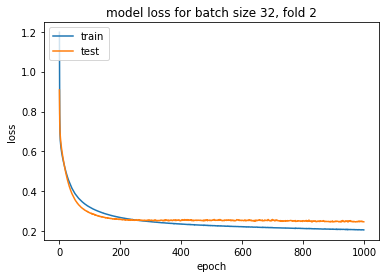

Epoch 1/1000
38/38 - 0s - loss: 0.9030 - accuracy: 0.7657 - val_loss: 0.7988 - val_accuracy: 0.7980
Epoch 2/1000
38/38 - 0s - loss: 0.7636 - accuracy: 0.7699 - val_loss: 0.7006 - val_accuracy: 0.7980
Epoch 3/1000
38/38 - 0s - loss: 0.7005 - accuracy: 0.7699 - val_loss: 0.6548 - val_accuracy: 0.7980
Epoch 4/1000
38/38 - 0s - loss: 0.6727 - accuracy: 0.7699 - val_loss: 0.6318 - val_accuracy: 0.7980
Epoch 5/1000
38/38 - 0s - loss: 0.6578 - accuracy: 0.7699 - val_loss: 0.6185 - val_accuracy: 0.7980
Epoch 6/1000
38/38 - 0s - loss: 0.6479 - accuracy: 0.7699 - val_loss: 0.6092 - val_accuracy: 0.7980
Epoch 7/1000
38/38 - 0s - loss: 0.6398 - accuracy: 0.7699 - val_loss: 0.6011 - val_accuracy: 0.7980
Epoch 8/1000
38/38 - 0s - loss: 0.6323 - accuracy: 0.7699 - val_loss: 0.5944 - val_accuracy: 0.7980
Epoch 9/1000
38/38 - 0s - loss: 0.6248 - accuracy: 0.7699 - val_loss: 0.5877 - val_accuracy: 0.7980
Epoch 10/1000
38/38 - 0s - loss: 0.6182 - accuracy: 0.7699 - val_loss: 0.5810 - val_accuracy: 0.7980

Epoch 83/1000
38/38 - 0s - loss: 0.3466 - accuracy: 0.8648 - val_loss: 0.3314 - val_accuracy: 0.8687
Epoch 84/1000
38/38 - 0s - loss: 0.3455 - accuracy: 0.8598 - val_loss: 0.3307 - val_accuracy: 0.8721
Epoch 85/1000
38/38 - 0s - loss: 0.3441 - accuracy: 0.8631 - val_loss: 0.3310 - val_accuracy: 0.8687
Epoch 86/1000
38/38 - 0s - loss: 0.3431 - accuracy: 0.8648 - val_loss: 0.3301 - val_accuracy: 0.8687
Epoch 87/1000
38/38 - 0s - loss: 0.3419 - accuracy: 0.8648 - val_loss: 0.3282 - val_accuracy: 0.8687
Epoch 88/1000
38/38 - 0s - loss: 0.3405 - accuracy: 0.8673 - val_loss: 0.3268 - val_accuracy: 0.8687
Epoch 89/1000
38/38 - 0s - loss: 0.3394 - accuracy: 0.8657 - val_loss: 0.3251 - val_accuracy: 0.8721
Epoch 90/1000
38/38 - 0s - loss: 0.3384 - accuracy: 0.8657 - val_loss: 0.3247 - val_accuracy: 0.8687
Epoch 91/1000
38/38 - 0s - loss: 0.3371 - accuracy: 0.8648 - val_loss: 0.3232 - val_accuracy: 0.8653
Epoch 92/1000
38/38 - 0s - loss: 0.3359 - accuracy: 0.8640 - val_loss: 0.3223 - val_accurac

Epoch 164/1000
38/38 - 0s - loss: 0.2884 - accuracy: 0.8816 - val_loss: 0.2825 - val_accuracy: 0.8754
Epoch 165/1000
38/38 - 0s - loss: 0.2879 - accuracy: 0.8783 - val_loss: 0.2818 - val_accuracy: 0.8754
Epoch 166/1000
38/38 - 0s - loss: 0.2872 - accuracy: 0.8808 - val_loss: 0.2805 - val_accuracy: 0.8687
Epoch 167/1000
38/38 - 0s - loss: 0.2871 - accuracy: 0.8816 - val_loss: 0.2816 - val_accuracy: 0.8721
Epoch 168/1000
38/38 - 0s - loss: 0.2866 - accuracy: 0.8799 - val_loss: 0.2810 - val_accuracy: 0.8754
Epoch 169/1000
38/38 - 0s - loss: 0.2863 - accuracy: 0.8825 - val_loss: 0.2807 - val_accuracy: 0.8721
Epoch 170/1000
38/38 - 0s - loss: 0.2857 - accuracy: 0.8808 - val_loss: 0.2798 - val_accuracy: 0.8721
Epoch 171/1000
38/38 - 0s - loss: 0.2854 - accuracy: 0.8833 - val_loss: 0.2806 - val_accuracy: 0.8721
Epoch 172/1000
38/38 - 0s - loss: 0.2851 - accuracy: 0.8825 - val_loss: 0.2805 - val_accuracy: 0.8754
Epoch 173/1000
38/38 - 0s - loss: 0.2857 - accuracy: 0.8799 - val_loss: 0.2802 - v

Epoch 245/1000
38/38 - 0s - loss: 0.2662 - accuracy: 0.8934 - val_loss: 0.2643 - val_accuracy: 0.8822
Epoch 246/1000
38/38 - 0s - loss: 0.2659 - accuracy: 0.8934 - val_loss: 0.2644 - val_accuracy: 0.8822
Epoch 247/1000
38/38 - 0s - loss: 0.2657 - accuracy: 0.8917 - val_loss: 0.2640 - val_accuracy: 0.8754
Epoch 248/1000
38/38 - 0s - loss: 0.2656 - accuracy: 0.8934 - val_loss: 0.2619 - val_accuracy: 0.8923
Epoch 249/1000
38/38 - 0s - loss: 0.2653 - accuracy: 0.8925 - val_loss: 0.2648 - val_accuracy: 0.8788
Epoch 250/1000
38/38 - 0s - loss: 0.2650 - accuracy: 0.8892 - val_loss: 0.2620 - val_accuracy: 0.8889
Epoch 251/1000
38/38 - 0s - loss: 0.2653 - accuracy: 0.8925 - val_loss: 0.2624 - val_accuracy: 0.8855
Epoch 252/1000
38/38 - 0s - loss: 0.2650 - accuracy: 0.8925 - val_loss: 0.2628 - val_accuracy: 0.8822
Epoch 253/1000
38/38 - 0s - loss: 0.2652 - accuracy: 0.8900 - val_loss: 0.2615 - val_accuracy: 0.8855
Epoch 254/1000
38/38 - 0s - loss: 0.2646 - accuracy: 0.8959 - val_loss: 0.2641 - v

Epoch 326/1000
38/38 - 0s - loss: 0.2543 - accuracy: 0.8984 - val_loss: 0.2502 - val_accuracy: 0.8956
Epoch 327/1000
38/38 - 0s - loss: 0.2543 - accuracy: 0.8908 - val_loss: 0.2514 - val_accuracy: 0.8754
Epoch 328/1000
38/38 - 0s - loss: 0.2541 - accuracy: 0.8976 - val_loss: 0.2542 - val_accuracy: 0.8788
Epoch 329/1000
38/38 - 0s - loss: 0.2540 - accuracy: 0.8925 - val_loss: 0.2513 - val_accuracy: 0.8754
Epoch 330/1000
38/38 - 0s - loss: 0.2538 - accuracy: 0.8942 - val_loss: 0.2503 - val_accuracy: 0.8822
Epoch 331/1000
38/38 - 0s - loss: 0.2538 - accuracy: 0.8950 - val_loss: 0.2500 - val_accuracy: 0.8822
Epoch 332/1000
38/38 - 0s - loss: 0.2535 - accuracy: 0.8959 - val_loss: 0.2509 - val_accuracy: 0.8754
Epoch 333/1000
38/38 - 0s - loss: 0.2537 - accuracy: 0.8925 - val_loss: 0.2485 - val_accuracy: 0.8990
Epoch 334/1000
38/38 - 0s - loss: 0.2536 - accuracy: 0.8984 - val_loss: 0.2497 - val_accuracy: 0.8822
Epoch 335/1000
38/38 - 0s - loss: 0.2536 - accuracy: 0.8976 - val_loss: 0.2492 - v

Epoch 407/1000
38/38 - 0s - loss: 0.2458 - accuracy: 0.8959 - val_loss: 0.2454 - val_accuracy: 0.8855
Epoch 408/1000
38/38 - 0s - loss: 0.2460 - accuracy: 0.8984 - val_loss: 0.2407 - val_accuracy: 0.8923
Epoch 409/1000
38/38 - 0s - loss: 0.2458 - accuracy: 0.8976 - val_loss: 0.2414 - val_accuracy: 0.8788
Epoch 410/1000
38/38 - 0s - loss: 0.2455 - accuracy: 0.8984 - val_loss: 0.2420 - val_accuracy: 0.8855
Epoch 411/1000
38/38 - 0s - loss: 0.2459 - accuracy: 0.8950 - val_loss: 0.2425 - val_accuracy: 0.8822
Epoch 412/1000
38/38 - 0s - loss: 0.2455 - accuracy: 0.9001 - val_loss: 0.2443 - val_accuracy: 0.8956
Epoch 413/1000
38/38 - 0s - loss: 0.2454 - accuracy: 0.8950 - val_loss: 0.2390 - val_accuracy: 0.8889
Epoch 414/1000
38/38 - 0s - loss: 0.2461 - accuracy: 0.9001 - val_loss: 0.2397 - val_accuracy: 0.8855
Epoch 415/1000
38/38 - 0s - loss: 0.2457 - accuracy: 0.8984 - val_loss: 0.2415 - val_accuracy: 0.8855
Epoch 416/1000
38/38 - 0s - loss: 0.2449 - accuracy: 0.8967 - val_loss: 0.2379 - v

Epoch 488/1000
38/38 - 0s - loss: 0.2399 - accuracy: 0.8976 - val_loss: 0.2359 - val_accuracy: 0.8956
Epoch 489/1000
38/38 - 0s - loss: 0.2401 - accuracy: 0.8992 - val_loss: 0.2360 - val_accuracy: 0.8956
Epoch 490/1000
38/38 - 0s - loss: 0.2393 - accuracy: 0.9001 - val_loss: 0.2314 - val_accuracy: 0.8956
Epoch 491/1000
38/38 - 0s - loss: 0.2401 - accuracy: 0.8967 - val_loss: 0.2334 - val_accuracy: 0.8956
Epoch 492/1000
38/38 - 0s - loss: 0.2396 - accuracy: 0.9001 - val_loss: 0.2328 - val_accuracy: 0.8956
Epoch 493/1000
38/38 - 0s - loss: 0.2398 - accuracy: 0.9009 - val_loss: 0.2375 - val_accuracy: 0.8990
Epoch 494/1000
38/38 - 0s - loss: 0.2397 - accuracy: 0.8992 - val_loss: 0.2365 - val_accuracy: 0.8956
Epoch 495/1000
38/38 - 0s - loss: 0.2393 - accuracy: 0.9001 - val_loss: 0.2324 - val_accuracy: 0.8990
Epoch 496/1000
38/38 - 0s - loss: 0.2387 - accuracy: 0.9001 - val_loss: 0.2302 - val_accuracy: 0.9057
Epoch 497/1000
38/38 - 0s - loss: 0.2396 - accuracy: 0.9001 - val_loss: 0.2390 - v

Epoch 569/1000
38/38 - 0s - loss: 0.2345 - accuracy: 0.8984 - val_loss: 0.2296 - val_accuracy: 0.9091
Epoch 570/1000
38/38 - 0s - loss: 0.2341 - accuracy: 0.8984 - val_loss: 0.2266 - val_accuracy: 0.8990
Epoch 571/1000
38/38 - 0s - loss: 0.2339 - accuracy: 0.8976 - val_loss: 0.2306 - val_accuracy: 0.9024
Epoch 572/1000
38/38 - 0s - loss: 0.2343 - accuracy: 0.8984 - val_loss: 0.2272 - val_accuracy: 0.8956
Epoch 573/1000
38/38 - 0s - loss: 0.2339 - accuracy: 0.9001 - val_loss: 0.2277 - val_accuracy: 0.9024
Epoch 574/1000
38/38 - 0s - loss: 0.2337 - accuracy: 0.8984 - val_loss: 0.2286 - val_accuracy: 0.9057
Epoch 575/1000
38/38 - 0s - loss: 0.2340 - accuracy: 0.8976 - val_loss: 0.2284 - val_accuracy: 0.9057
Epoch 576/1000
38/38 - 0s - loss: 0.2338 - accuracy: 0.8992 - val_loss: 0.2260 - val_accuracy: 0.8990
Epoch 577/1000
38/38 - 0s - loss: 0.2341 - accuracy: 0.8984 - val_loss: 0.2276 - val_accuracy: 0.8990
Epoch 578/1000
38/38 - 0s - loss: 0.2342 - accuracy: 0.8984 - val_loss: 0.2302 - v

Epoch 650/1000
38/38 - 0s - loss: 0.2299 - accuracy: 0.8976 - val_loss: 0.2223 - val_accuracy: 0.9057
Epoch 651/1000
38/38 - 0s - loss: 0.2293 - accuracy: 0.9001 - val_loss: 0.2231 - val_accuracy: 0.9091
Epoch 652/1000
38/38 - 0s - loss: 0.2284 - accuracy: 0.9001 - val_loss: 0.2197 - val_accuracy: 0.9024
Epoch 653/1000
38/38 - 0s - loss: 0.2298 - accuracy: 0.8984 - val_loss: 0.2205 - val_accuracy: 0.9024
Epoch 654/1000
38/38 - 0s - loss: 0.2288 - accuracy: 0.9018 - val_loss: 0.2238 - val_accuracy: 0.9091
Epoch 655/1000
38/38 - 0s - loss: 0.2283 - accuracy: 0.8967 - val_loss: 0.2310 - val_accuracy: 0.9091
Epoch 656/1000
38/38 - 0s - loss: 0.2294 - accuracy: 0.8984 - val_loss: 0.2269 - val_accuracy: 0.9125
Epoch 657/1000
38/38 - 0s - loss: 0.2289 - accuracy: 0.8992 - val_loss: 0.2235 - val_accuracy: 0.9091
Epoch 658/1000
38/38 - 0s - loss: 0.2292 - accuracy: 0.9018 - val_loss: 0.2194 - val_accuracy: 0.9024
Epoch 659/1000
38/38 - 0s - loss: 0.2290 - accuracy: 0.9026 - val_loss: 0.2218 - v

Epoch 731/1000
38/38 - 0s - loss: 0.2250 - accuracy: 0.9026 - val_loss: 0.2194 - val_accuracy: 0.9091
Epoch 732/1000
38/38 - 0s - loss: 0.2250 - accuracy: 0.9018 - val_loss: 0.2217 - val_accuracy: 0.9091
Epoch 733/1000
38/38 - 0s - loss: 0.2247 - accuracy: 0.9018 - val_loss: 0.2195 - val_accuracy: 0.9091
Epoch 734/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9043 - val_loss: 0.2201 - val_accuracy: 0.9091
Epoch 735/1000
38/38 - 0s - loss: 0.2249 - accuracy: 0.8992 - val_loss: 0.2198 - val_accuracy: 0.9091
Epoch 736/1000
38/38 - 0s - loss: 0.2246 - accuracy: 0.9018 - val_loss: 0.2209 - val_accuracy: 0.9091
Epoch 737/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9018 - val_loss: 0.2197 - val_accuracy: 0.9057
Epoch 738/1000
38/38 - 0s - loss: 0.2244 - accuracy: 0.8984 - val_loss: 0.2210 - val_accuracy: 0.9091
Epoch 739/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9009 - val_loss: 0.2222 - val_accuracy: 0.9125
Epoch 740/1000
38/38 - 0s - loss: 0.2244 - accuracy: 0.9009 - val_loss: 0.2190 - v

Epoch 812/1000
38/38 - 0s - loss: 0.2196 - accuracy: 0.9018 - val_loss: 0.2146 - val_accuracy: 0.9125
Epoch 813/1000
38/38 - 0s - loss: 0.2217 - accuracy: 0.9001 - val_loss: 0.2152 - val_accuracy: 0.9125
Epoch 814/1000
38/38 - 0s - loss: 0.2211 - accuracy: 0.9009 - val_loss: 0.2146 - val_accuracy: 0.9125
Epoch 815/1000
38/38 - 0s - loss: 0.2208 - accuracy: 0.9018 - val_loss: 0.2185 - val_accuracy: 0.9091
Epoch 816/1000
38/38 - 0s - loss: 0.2204 - accuracy: 0.9018 - val_loss: 0.2161 - val_accuracy: 0.9091
Epoch 817/1000
38/38 - 0s - loss: 0.2204 - accuracy: 0.9001 - val_loss: 0.2139 - val_accuracy: 0.9125
Epoch 818/1000
38/38 - 0s - loss: 0.2211 - accuracy: 0.9018 - val_loss: 0.2137 - val_accuracy: 0.9158
Epoch 819/1000
38/38 - 0s - loss: 0.2206 - accuracy: 0.9018 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 820/1000
38/38 - 0s - loss: 0.2199 - accuracy: 0.9026 - val_loss: 0.2419 - val_accuracy: 0.9091
Epoch 821/1000
38/38 - 0s - loss: 0.2224 - accuracy: 0.8984 - val_loss: 0.2171 - v

Epoch 893/1000
38/38 - 0s - loss: 0.2172 - accuracy: 0.9043 - val_loss: 0.2155 - val_accuracy: 0.9125
Epoch 894/1000
38/38 - 0s - loss: 0.2168 - accuracy: 0.9043 - val_loss: 0.2150 - val_accuracy: 0.9125
Epoch 895/1000
38/38 - 0s - loss: 0.2172 - accuracy: 0.9034 - val_loss: 0.2140 - val_accuracy: 0.9091
Epoch 896/1000
38/38 - 0s - loss: 0.2172 - accuracy: 0.9043 - val_loss: 0.2167 - val_accuracy: 0.9192
Epoch 897/1000
38/38 - 0s - loss: 0.2165 - accuracy: 0.9060 - val_loss: 0.2152 - val_accuracy: 0.9125
Epoch 898/1000
38/38 - 0s - loss: 0.2171 - accuracy: 0.9001 - val_loss: 0.2151 - val_accuracy: 0.9091
Epoch 899/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9009 - val_loss: 0.2170 - val_accuracy: 0.9192
Epoch 900/1000
38/38 - 0s - loss: 0.2165 - accuracy: 0.9026 - val_loss: 0.2138 - val_accuracy: 0.9091
Epoch 901/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9018 - val_loss: 0.2151 - val_accuracy: 0.9158
Epoch 902/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9018 - val_loss: 0.2156 - v

Epoch 974/1000
38/38 - 0s - loss: 0.2144 - accuracy: 0.9060 - val_loss: 0.2222 - val_accuracy: 0.9158
Epoch 975/1000
38/38 - 0s - loss: 0.2141 - accuracy: 0.9026 - val_loss: 0.2107 - val_accuracy: 0.9158
Epoch 976/1000
38/38 - 0s - loss: 0.2138 - accuracy: 0.9068 - val_loss: 0.2102 - val_accuracy: 0.9057
Epoch 977/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.9043 - val_loss: 0.2138 - val_accuracy: 0.9192
Epoch 978/1000
38/38 - 0s - loss: 0.2135 - accuracy: 0.9034 - val_loss: 0.2115 - val_accuracy: 0.9158
Epoch 979/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.9034 - val_loss: 0.2110 - val_accuracy: 0.9158
Epoch 980/1000
38/38 - 0s - loss: 0.2128 - accuracy: 0.9068 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 981/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9043 - val_loss: 0.2095 - val_accuracy: 0.9125
Epoch 982/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9009 - val_loss: 0.2078 - val_accuracy: 0.9192
Epoch 983/1000
38/38 - 0s - loss: 0.2138 - accuracy: 0.9043 - val_loss: 0.2125 - v

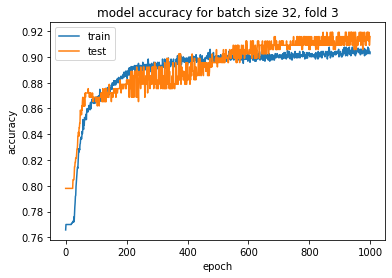

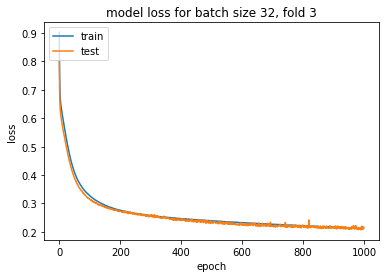

Epoch 1/1000
38/38 - 0s - loss: 0.7740 - accuracy: 0.7783 - val_loss: 0.7513 - val_accuracy: 0.7441
Epoch 2/1000
38/38 - 0s - loss: 0.6848 - accuracy: 0.7834 - val_loss: 0.7209 - val_accuracy: 0.7441
Epoch 3/1000
38/38 - 0s - loss: 0.6586 - accuracy: 0.7834 - val_loss: 0.7126 - val_accuracy: 0.7441
Epoch 4/1000
38/38 - 0s - loss: 0.6478 - accuracy: 0.7834 - val_loss: 0.7058 - val_accuracy: 0.7441
Epoch 5/1000
38/38 - 0s - loss: 0.6393 - accuracy: 0.7834 - val_loss: 0.6997 - val_accuracy: 0.7441
Epoch 6/1000
38/38 - 0s - loss: 0.6320 - accuracy: 0.7834 - val_loss: 0.6943 - val_accuracy: 0.7441
Epoch 7/1000
38/38 - 0s - loss: 0.6251 - accuracy: 0.7834 - val_loss: 0.6891 - val_accuracy: 0.7441
Epoch 8/1000
38/38 - 0s - loss: 0.6188 - accuracy: 0.7834 - val_loss: 0.6843 - val_accuracy: 0.7441
Epoch 9/1000
38/38 - 0s - loss: 0.6127 - accuracy: 0.7834 - val_loss: 0.6794 - val_accuracy: 0.7441
Epoch 10/1000
38/38 - 0s - loss: 0.6068 - accuracy: 0.7834 - val_loss: 0.6748 - val_accuracy: 0.7441

Epoch 83/1000
38/38 - 0s - loss: 0.3586 - accuracy: 0.8581 - val_loss: 0.4565 - val_accuracy: 0.8047
Epoch 84/1000
38/38 - 0s - loss: 0.3572 - accuracy: 0.8564 - val_loss: 0.4563 - val_accuracy: 0.8081
Epoch 85/1000
38/38 - 0s - loss: 0.3556 - accuracy: 0.8556 - val_loss: 0.4499 - val_accuracy: 0.8148
Epoch 86/1000
38/38 - 0s - loss: 0.3540 - accuracy: 0.8598 - val_loss: 0.4479 - val_accuracy: 0.8283
Epoch 87/1000
38/38 - 0s - loss: 0.3525 - accuracy: 0.8640 - val_loss: 0.4469 - val_accuracy: 0.8283
Epoch 88/1000
38/38 - 0s - loss: 0.3509 - accuracy: 0.8657 - val_loss: 0.4445 - val_accuracy: 0.8283
Epoch 89/1000
38/38 - 0s - loss: 0.3495 - accuracy: 0.8640 - val_loss: 0.4443 - val_accuracy: 0.8316
Epoch 90/1000
38/38 - 0s - loss: 0.3477 - accuracy: 0.8715 - val_loss: 0.4468 - val_accuracy: 0.8249
Epoch 91/1000
38/38 - 0s - loss: 0.3465 - accuracy: 0.8648 - val_loss: 0.4422 - val_accuracy: 0.8350
Epoch 92/1000
38/38 - 0s - loss: 0.3451 - accuracy: 0.8682 - val_loss: 0.4399 - val_accurac

Epoch 164/1000
38/38 - 0s - loss: 0.2830 - accuracy: 0.8825 - val_loss: 0.3860 - val_accuracy: 0.8384
Epoch 165/1000
38/38 - 0s - loss: 0.2826 - accuracy: 0.8816 - val_loss: 0.3845 - val_accuracy: 0.8384
Epoch 166/1000
38/38 - 0s - loss: 0.2821 - accuracy: 0.8816 - val_loss: 0.3881 - val_accuracy: 0.8384
Epoch 167/1000
38/38 - 0s - loss: 0.2818 - accuracy: 0.8791 - val_loss: 0.3818 - val_accuracy: 0.8384
Epoch 168/1000
38/38 - 0s - loss: 0.2809 - accuracy: 0.8816 - val_loss: 0.3821 - val_accuracy: 0.8384
Epoch 169/1000
38/38 - 0s - loss: 0.2806 - accuracy: 0.8825 - val_loss: 0.3831 - val_accuracy: 0.8384
Epoch 170/1000
38/38 - 0s - loss: 0.2800 - accuracy: 0.8850 - val_loss: 0.3847 - val_accuracy: 0.8384
Epoch 171/1000
38/38 - 0s - loss: 0.2797 - accuracy: 0.8816 - val_loss: 0.3802 - val_accuracy: 0.8350
Epoch 172/1000
38/38 - 0s - loss: 0.2792 - accuracy: 0.8816 - val_loss: 0.3823 - val_accuracy: 0.8384
Epoch 173/1000
38/38 - 0s - loss: 0.2792 - accuracy: 0.8799 - val_loss: 0.3818 - v

Epoch 245/1000
38/38 - 0s - loss: 0.2545 - accuracy: 0.8967 - val_loss: 0.3590 - val_accuracy: 0.8384
Epoch 246/1000
38/38 - 0s - loss: 0.2545 - accuracy: 0.8967 - val_loss: 0.3588 - val_accuracy: 0.8384
Epoch 247/1000
38/38 - 0s - loss: 0.2541 - accuracy: 0.8992 - val_loss: 0.3584 - val_accuracy: 0.8384
Epoch 248/1000
38/38 - 0s - loss: 0.2539 - accuracy: 0.8984 - val_loss: 0.3596 - val_accuracy: 0.8384
Epoch 249/1000
38/38 - 0s - loss: 0.2537 - accuracy: 0.8984 - val_loss: 0.3531 - val_accuracy: 0.8350
Epoch 250/1000
38/38 - 0s - loss: 0.2533 - accuracy: 0.8992 - val_loss: 0.3582 - val_accuracy: 0.8384
Epoch 251/1000
38/38 - 0s - loss: 0.2532 - accuracy: 0.8992 - val_loss: 0.3574 - val_accuracy: 0.8384
Epoch 252/1000
38/38 - 0s - loss: 0.2528 - accuracy: 0.8967 - val_loss: 0.3530 - val_accuracy: 0.8350
Epoch 253/1000
38/38 - 0s - loss: 0.2526 - accuracy: 0.8984 - val_loss: 0.3534 - val_accuracy: 0.8384
Epoch 254/1000
38/38 - 0s - loss: 0.2525 - accuracy: 0.8976 - val_loss: 0.3533 - v

Epoch 326/1000
38/38 - 0s - loss: 0.2389 - accuracy: 0.9026 - val_loss: 0.3499 - val_accuracy: 0.8384
Epoch 327/1000
38/38 - 0s - loss: 0.2389 - accuracy: 0.9009 - val_loss: 0.3444 - val_accuracy: 0.8283
Epoch 328/1000
38/38 - 0s - loss: 0.2388 - accuracy: 0.9043 - val_loss: 0.3395 - val_accuracy: 0.8316
Epoch 329/1000
38/38 - 0s - loss: 0.2381 - accuracy: 0.9051 - val_loss: 0.3436 - val_accuracy: 0.8316
Epoch 330/1000
38/38 - 0s - loss: 0.2382 - accuracy: 0.9018 - val_loss: 0.3434 - val_accuracy: 0.8316
Epoch 331/1000
38/38 - 0s - loss: 0.2383 - accuracy: 0.9018 - val_loss: 0.3402 - val_accuracy: 0.8350
Epoch 332/1000
38/38 - 0s - loss: 0.2380 - accuracy: 0.9018 - val_loss: 0.3406 - val_accuracy: 0.8384
Epoch 333/1000
38/38 - 0s - loss: 0.2380 - accuracy: 0.9060 - val_loss: 0.3432 - val_accuracy: 0.8316
Epoch 334/1000
38/38 - 0s - loss: 0.2376 - accuracy: 0.9026 - val_loss: 0.3391 - val_accuracy: 0.8350
Epoch 335/1000
38/38 - 0s - loss: 0.2376 - accuracy: 0.9068 - val_loss: 0.3438 - v

Epoch 407/1000
38/38 - 0s - loss: 0.2286 - accuracy: 0.9144 - val_loss: 0.3328 - val_accuracy: 0.8283
Epoch 408/1000
38/38 - 0s - loss: 0.2286 - accuracy: 0.9076 - val_loss: 0.3386 - val_accuracy: 0.8384
Epoch 409/1000
38/38 - 0s - loss: 0.2286 - accuracy: 0.9110 - val_loss: 0.3362 - val_accuracy: 0.8350
Epoch 410/1000
38/38 - 0s - loss: 0.2285 - accuracy: 0.9102 - val_loss: 0.3361 - val_accuracy: 0.8316
Epoch 411/1000
38/38 - 0s - loss: 0.2281 - accuracy: 0.9118 - val_loss: 0.3385 - val_accuracy: 0.8384
Epoch 412/1000
38/38 - 0s - loss: 0.2285 - accuracy: 0.9102 - val_loss: 0.3345 - val_accuracy: 0.8283
Epoch 413/1000
38/38 - 0s - loss: 0.2284 - accuracy: 0.9102 - val_loss: 0.3332 - val_accuracy: 0.8283
Epoch 414/1000
38/38 - 0s - loss: 0.2283 - accuracy: 0.9093 - val_loss: 0.3353 - val_accuracy: 0.8283
Epoch 415/1000
38/38 - 0s - loss: 0.2282 - accuracy: 0.9127 - val_loss: 0.3317 - val_accuracy: 0.8316
Epoch 416/1000
38/38 - 0s - loss: 0.2281 - accuracy: 0.9127 - val_loss: 0.3362 - v

Epoch 488/1000
38/38 - 0s - loss: 0.2220 - accuracy: 0.9093 - val_loss: 0.3293 - val_accuracy: 0.8418
Epoch 489/1000
38/38 - 0s - loss: 0.2220 - accuracy: 0.9102 - val_loss: 0.3284 - val_accuracy: 0.8384
Epoch 490/1000
38/38 - 0s - loss: 0.2216 - accuracy: 0.9110 - val_loss: 0.3368 - val_accuracy: 0.8451
Epoch 491/1000
38/38 - 0s - loss: 0.2222 - accuracy: 0.9102 - val_loss: 0.3337 - val_accuracy: 0.8418
Epoch 492/1000
38/38 - 0s - loss: 0.2220 - accuracy: 0.9110 - val_loss: 0.3307 - val_accuracy: 0.8350
Epoch 493/1000
38/38 - 0s - loss: 0.2216 - accuracy: 0.9085 - val_loss: 0.3278 - val_accuracy: 0.8384
Epoch 494/1000
38/38 - 0s - loss: 0.2215 - accuracy: 0.9093 - val_loss: 0.3298 - val_accuracy: 0.8350
Epoch 495/1000
38/38 - 0s - loss: 0.2213 - accuracy: 0.9110 - val_loss: 0.3325 - val_accuracy: 0.8384
Epoch 496/1000
38/38 - 0s - loss: 0.2212 - accuracy: 0.9110 - val_loss: 0.3371 - val_accuracy: 0.8451
Epoch 497/1000
38/38 - 0s - loss: 0.2214 - accuracy: 0.9127 - val_loss: 0.3280 - v

Epoch 569/1000
38/38 - 0s - loss: 0.2171 - accuracy: 0.9068 - val_loss: 0.3252 - val_accuracy: 0.8451
Epoch 570/1000
38/38 - 0s - loss: 0.2167 - accuracy: 0.9076 - val_loss: 0.3305 - val_accuracy: 0.8451
Epoch 571/1000
38/38 - 0s - loss: 0.2166 - accuracy: 0.9102 - val_loss: 0.3247 - val_accuracy: 0.8451
Epoch 572/1000
38/38 - 0s - loss: 0.2169 - accuracy: 0.9076 - val_loss: 0.3291 - val_accuracy: 0.8418
Epoch 573/1000
38/38 - 0s - loss: 0.2164 - accuracy: 0.9102 - val_loss: 0.3282 - val_accuracy: 0.8418
Epoch 574/1000
38/38 - 0s - loss: 0.2162 - accuracy: 0.9093 - val_loss: 0.3325 - val_accuracy: 0.8451
Epoch 575/1000
38/38 - 0s - loss: 0.2167 - accuracy: 0.9118 - val_loss: 0.3303 - val_accuracy: 0.8384
Epoch 576/1000
38/38 - 0s - loss: 0.2163 - accuracy: 0.9127 - val_loss: 0.3337 - val_accuracy: 0.8451
Epoch 577/1000
38/38 - 0s - loss: 0.2167 - accuracy: 0.9102 - val_loss: 0.3301 - val_accuracy: 0.8384
Epoch 578/1000
38/38 - 0s - loss: 0.2165 - accuracy: 0.9085 - val_loss: 0.3265 - v

Epoch 650/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9068 - val_loss: 0.3316 - val_accuracy: 0.8485
Epoch 651/1000
38/38 - 0s - loss: 0.2128 - accuracy: 0.9102 - val_loss: 0.3286 - val_accuracy: 0.8485
Epoch 652/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9118 - val_loss: 0.3384 - val_accuracy: 0.8384
Epoch 653/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9093 - val_loss: 0.3338 - val_accuracy: 0.8451
Epoch 654/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9127 - val_loss: 0.3292 - val_accuracy: 0.8519
Epoch 655/1000
38/38 - 0s - loss: 0.2119 - accuracy: 0.9093 - val_loss: 0.3213 - val_accuracy: 0.8519
Epoch 656/1000
38/38 - 0s - loss: 0.2131 - accuracy: 0.9085 - val_loss: 0.3256 - val_accuracy: 0.8485
Epoch 657/1000
38/38 - 0s - loss: 0.2126 - accuracy: 0.9118 - val_loss: 0.3241 - val_accuracy: 0.8485
Epoch 658/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9093 - val_loss: 0.3347 - val_accuracy: 0.8451
Epoch 659/1000
38/38 - 0s - loss: 0.2126 - accuracy: 0.9110 - val_loss: 0.3336 - v

Epoch 731/1000
38/38 - 0s - loss: 0.2094 - accuracy: 0.9093 - val_loss: 0.3251 - val_accuracy: 0.8485
Epoch 732/1000
38/38 - 0s - loss: 0.2092 - accuracy: 0.9102 - val_loss: 0.3301 - val_accuracy: 0.8552
Epoch 733/1000
38/38 - 0s - loss: 0.2096 - accuracy: 0.9102 - val_loss: 0.3363 - val_accuracy: 0.8485
Epoch 734/1000
38/38 - 0s - loss: 0.2092 - accuracy: 0.9118 - val_loss: 0.3314 - val_accuracy: 0.8519
Epoch 735/1000
38/38 - 0s - loss: 0.2096 - accuracy: 0.9144 - val_loss: 0.3300 - val_accuracy: 0.8552
Epoch 736/1000
38/38 - 0s - loss: 0.2091 - accuracy: 0.9135 - val_loss: 0.3287 - val_accuracy: 0.8519
Epoch 737/1000
38/38 - 0s - loss: 0.2091 - accuracy: 0.9135 - val_loss: 0.3268 - val_accuracy: 0.8519
Epoch 738/1000
38/38 - 0s - loss: 0.2090 - accuracy: 0.9093 - val_loss: 0.3223 - val_accuracy: 0.8451
Epoch 739/1000
38/38 - 0s - loss: 0.2094 - accuracy: 0.9118 - val_loss: 0.3321 - val_accuracy: 0.8519
Epoch 740/1000
38/38 - 0s - loss: 0.2090 - accuracy: 0.9118 - val_loss: 0.3299 - v

Epoch 812/1000
38/38 - 0s - loss: 0.2052 - accuracy: 0.9093 - val_loss: 0.3342 - val_accuracy: 0.8519
Epoch 813/1000
38/38 - 0s - loss: 0.2066 - accuracy: 0.9118 - val_loss: 0.3304 - val_accuracy: 0.8586
Epoch 814/1000
38/38 - 0s - loss: 0.2063 - accuracy: 0.9102 - val_loss: 0.3358 - val_accuracy: 0.8485
Epoch 815/1000
38/38 - 0s - loss: 0.2065 - accuracy: 0.9110 - val_loss: 0.3275 - val_accuracy: 0.8519
Epoch 816/1000
38/38 - 0s - loss: 0.2063 - accuracy: 0.9102 - val_loss: 0.3311 - val_accuracy: 0.8586
Epoch 817/1000
38/38 - 0s - loss: 0.2062 - accuracy: 0.9127 - val_loss: 0.3339 - val_accuracy: 0.8519
Epoch 818/1000
38/38 - 0s - loss: 0.2063 - accuracy: 0.9118 - val_loss: 0.3311 - val_accuracy: 0.8552
Epoch 819/1000
38/38 - 0s - loss: 0.2062 - accuracy: 0.9118 - val_loss: 0.3297 - val_accuracy: 0.8552
Epoch 820/1000
38/38 - 0s - loss: 0.2058 - accuracy: 0.9118 - val_loss: 0.3198 - val_accuracy: 0.8451
Epoch 821/1000
38/38 - 0s - loss: 0.2061 - accuracy: 0.9076 - val_loss: 0.3362 - v

Epoch 893/1000
38/38 - 0s - loss: 0.2036 - accuracy: 0.9135 - val_loss: 0.3307 - val_accuracy: 0.8552
Epoch 894/1000
38/38 - 0s - loss: 0.2032 - accuracy: 0.9135 - val_loss: 0.3259 - val_accuracy: 0.8485
Epoch 895/1000
38/38 - 0s - loss: 0.2034 - accuracy: 0.9110 - val_loss: 0.3285 - val_accuracy: 0.8552
Epoch 896/1000
38/38 - 0s - loss: 0.2039 - accuracy: 0.9118 - val_loss: 0.3235 - val_accuracy: 0.8451
Epoch 897/1000
38/38 - 0s - loss: 0.2033 - accuracy: 0.9127 - val_loss: 0.3277 - val_accuracy: 0.8519
Epoch 898/1000
38/38 - 0s - loss: 0.2033 - accuracy: 0.9135 - val_loss: 0.3318 - val_accuracy: 0.8586
Epoch 899/1000
38/38 - 0s - loss: 0.2034 - accuracy: 0.9127 - val_loss: 0.3278 - val_accuracy: 0.8485
Epoch 900/1000
38/38 - 0s - loss: 0.2032 - accuracy: 0.9135 - val_loss: 0.3298 - val_accuracy: 0.8552
Epoch 901/1000
38/38 - 0s - loss: 0.2034 - accuracy: 0.9110 - val_loss: 0.3285 - val_accuracy: 0.8519
Epoch 902/1000
38/38 - 0s - loss: 0.2034 - accuracy: 0.9135 - val_loss: 0.3257 - v

Epoch 974/1000
38/38 - 0s - loss: 0.2016 - accuracy: 0.9144 - val_loss: 0.3197 - val_accuracy: 0.8451
Epoch 975/1000
38/38 - 0s - loss: 0.2015 - accuracy: 0.9152 - val_loss: 0.3288 - val_accuracy: 0.8552
Epoch 976/1000
38/38 - 0s - loss: 0.2011 - accuracy: 0.9135 - val_loss: 0.3279 - val_accuracy: 0.8485
Epoch 977/1000
38/38 - 0s - loss: 0.2010 - accuracy: 0.9144 - val_loss: 0.3275 - val_accuracy: 0.8519
Epoch 978/1000
38/38 - 0s - loss: 0.2009 - accuracy: 0.9127 - val_loss: 0.3265 - val_accuracy: 0.8485
Epoch 979/1000
38/38 - 0s - loss: 0.2010 - accuracy: 0.9110 - val_loss: 0.3275 - val_accuracy: 0.8519
Epoch 980/1000
38/38 - 0s - loss: 0.2009 - accuracy: 0.9118 - val_loss: 0.3259 - val_accuracy: 0.8485
Epoch 981/1000
38/38 - 0s - loss: 0.2004 - accuracy: 0.9144 - val_loss: 0.3311 - val_accuracy: 0.8586
Epoch 982/1000
38/38 - 0s - loss: 0.2011 - accuracy: 0.9152 - val_loss: 0.3312 - val_accuracy: 0.8586
Epoch 983/1000
38/38 - 0s - loss: 0.2012 - accuracy: 0.9135 - val_loss: 0.3285 - v

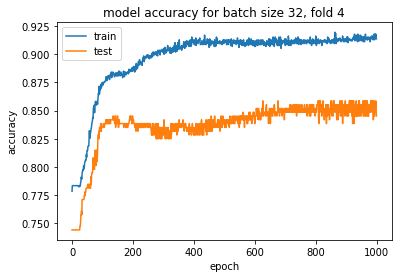

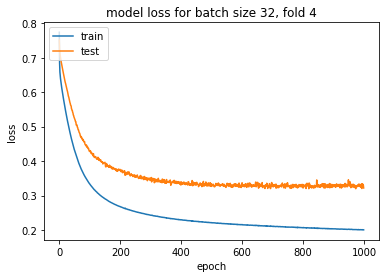

Epoch 1/1000
38/38 - 0s - loss: 1.0767 - accuracy: 0.3745 - val_loss: 1.0107 - val_accuracy: 0.6801
Epoch 2/1000
38/38 - 0s - loss: 0.9608 - accuracy: 0.7531 - val_loss: 0.9127 - val_accuracy: 0.7845
Epoch 3/1000
38/38 - 0s - loss: 0.8775 - accuracy: 0.7725 - val_loss: 0.8412 - val_accuracy: 0.7845
Epoch 4/1000
38/38 - 0s - loss: 0.8168 - accuracy: 0.7733 - val_loss: 0.7865 - val_accuracy: 0.7845
Epoch 5/1000
38/38 - 0s - loss: 0.7716 - accuracy: 0.7733 - val_loss: 0.7474 - val_accuracy: 0.7845
Epoch 6/1000
38/38 - 0s - loss: 0.7412 - accuracy: 0.7733 - val_loss: 0.7213 - val_accuracy: 0.7845
Epoch 7/1000
38/38 - 0s - loss: 0.7205 - accuracy: 0.7733 - val_loss: 0.7041 - val_accuracy: 0.7845
Epoch 8/1000
38/38 - 0s - loss: 0.7072 - accuracy: 0.7733 - val_loss: 0.6923 - val_accuracy: 0.7845
Epoch 9/1000
38/38 - 0s - loss: 0.6974 - accuracy: 0.7733 - val_loss: 0.6849 - val_accuracy: 0.7845
Epoch 10/1000
38/38 - 0s - loss: 0.6904 - accuracy: 0.7733 - val_loss: 0.6787 - val_accuracy: 0.7845

Epoch 83/1000
38/38 - 0s - loss: 0.4148 - accuracy: 0.8186 - val_loss: 0.4129 - val_accuracy: 0.8283
Epoch 84/1000
38/38 - 0s - loss: 0.4116 - accuracy: 0.8254 - val_loss: 0.4093 - val_accuracy: 0.8249
Epoch 85/1000
38/38 - 0s - loss: 0.4085 - accuracy: 0.8237 - val_loss: 0.4066 - val_accuracy: 0.8283
Epoch 86/1000
38/38 - 0s - loss: 0.4057 - accuracy: 0.8228 - val_loss: 0.4040 - val_accuracy: 0.8283
Epoch 87/1000
38/38 - 0s - loss: 0.4029 - accuracy: 0.8296 - val_loss: 0.4013 - val_accuracy: 0.8283
Epoch 88/1000
38/38 - 0s - loss: 0.3998 - accuracy: 0.8354 - val_loss: 0.3987 - val_accuracy: 0.8283
Epoch 89/1000
38/38 - 0s - loss: 0.3971 - accuracy: 0.8363 - val_loss: 0.3958 - val_accuracy: 0.8316
Epoch 90/1000
38/38 - 0s - loss: 0.3946 - accuracy: 0.8388 - val_loss: 0.3934 - val_accuracy: 0.8418
Epoch 91/1000
38/38 - 0s - loss: 0.3921 - accuracy: 0.8371 - val_loss: 0.3910 - val_accuracy: 0.8350
Epoch 92/1000
38/38 - 0s - loss: 0.3894 - accuracy: 0.8413 - val_loss: 0.3887 - val_accurac

Epoch 164/1000
38/38 - 0s - loss: 0.3024 - accuracy: 0.8833 - val_loss: 0.3075 - val_accuracy: 0.8687
Epoch 165/1000
38/38 - 0s - loss: 0.3021 - accuracy: 0.8833 - val_loss: 0.3068 - val_accuracy: 0.8687
Epoch 166/1000
38/38 - 0s - loss: 0.3012 - accuracy: 0.8808 - val_loss: 0.3066 - val_accuracy: 0.8721
Epoch 167/1000
38/38 - 0s - loss: 0.3010 - accuracy: 0.8808 - val_loss: 0.3067 - val_accuracy: 0.8754
Epoch 168/1000
38/38 - 0s - loss: 0.3004 - accuracy: 0.8799 - val_loss: 0.3054 - val_accuracy: 0.8687
Epoch 169/1000
38/38 - 0s - loss: 0.2996 - accuracy: 0.8825 - val_loss: 0.3055 - val_accuracy: 0.8754
Epoch 170/1000
38/38 - 0s - loss: 0.2989 - accuracy: 0.8866 - val_loss: 0.3046 - val_accuracy: 0.8721
Epoch 171/1000
38/38 - 0s - loss: 0.2988 - accuracy: 0.8833 - val_loss: 0.3042 - val_accuracy: 0.8721
Epoch 172/1000
38/38 - 0s - loss: 0.2982 - accuracy: 0.8799 - val_loss: 0.3032 - val_accuracy: 0.8754
Epoch 173/1000
38/38 - 0s - loss: 0.2977 - accuracy: 0.8799 - val_loss: 0.3031 - v

Epoch 245/1000
38/38 - 0s - loss: 0.2720 - accuracy: 0.8875 - val_loss: 0.2768 - val_accuracy: 0.8923
Epoch 246/1000
38/38 - 0s - loss: 0.2718 - accuracy: 0.8883 - val_loss: 0.2766 - val_accuracy: 0.8923
Epoch 247/1000
38/38 - 0s - loss: 0.2716 - accuracy: 0.8925 - val_loss: 0.2760 - val_accuracy: 0.8956
Epoch 248/1000
38/38 - 0s - loss: 0.2715 - accuracy: 0.8892 - val_loss: 0.2762 - val_accuracy: 0.8956
Epoch 249/1000
38/38 - 0s - loss: 0.2711 - accuracy: 0.8900 - val_loss: 0.2781 - val_accuracy: 0.8956
Epoch 250/1000
38/38 - 0s - loss: 0.2709 - accuracy: 0.8925 - val_loss: 0.2757 - val_accuracy: 0.8923
Epoch 251/1000
38/38 - 0s - loss: 0.2710 - accuracy: 0.8934 - val_loss: 0.2755 - val_accuracy: 0.8923
Epoch 252/1000
38/38 - 0s - loss: 0.2706 - accuracy: 0.8892 - val_loss: 0.2758 - val_accuracy: 0.8956
Epoch 253/1000
38/38 - 0s - loss: 0.2703 - accuracy: 0.8900 - val_loss: 0.2763 - val_accuracy: 0.8956
Epoch 254/1000
38/38 - 0s - loss: 0.2699 - accuracy: 0.8892 - val_loss: 0.2752 - v

Epoch 326/1000
38/38 - 0s - loss: 0.2572 - accuracy: 0.8950 - val_loss: 0.2603 - val_accuracy: 0.9057
Epoch 327/1000
38/38 - 0s - loss: 0.2575 - accuracy: 0.8934 - val_loss: 0.2598 - val_accuracy: 0.9057
Epoch 328/1000
38/38 - 0s - loss: 0.2573 - accuracy: 0.8950 - val_loss: 0.2609 - val_accuracy: 0.9057
Epoch 329/1000
38/38 - 0s - loss: 0.2569 - accuracy: 0.8934 - val_loss: 0.2600 - val_accuracy: 0.9091
Epoch 330/1000
38/38 - 0s - loss: 0.2567 - accuracy: 0.8959 - val_loss: 0.2596 - val_accuracy: 0.9057
Epoch 331/1000
38/38 - 0s - loss: 0.2567 - accuracy: 0.8934 - val_loss: 0.2598 - val_accuracy: 0.9091
Epoch 332/1000
38/38 - 0s - loss: 0.2566 - accuracy: 0.8942 - val_loss: 0.2601 - val_accuracy: 0.9091
Epoch 333/1000
38/38 - 0s - loss: 0.2565 - accuracy: 0.8925 - val_loss: 0.2597 - val_accuracy: 0.9091
Epoch 334/1000
38/38 - 0s - loss: 0.2563 - accuracy: 0.8950 - val_loss: 0.2597 - val_accuracy: 0.9091
Epoch 335/1000
38/38 - 0s - loss: 0.2562 - accuracy: 0.8942 - val_loss: 0.2589 - v

Epoch 407/1000
38/38 - 0s - loss: 0.2481 - accuracy: 0.8967 - val_loss: 0.2497 - val_accuracy: 0.9091
Epoch 408/1000
38/38 - 0s - loss: 0.2478 - accuracy: 0.8959 - val_loss: 0.2498 - val_accuracy: 0.9057
Epoch 409/1000
38/38 - 0s - loss: 0.2484 - accuracy: 0.8925 - val_loss: 0.2494 - val_accuracy: 0.9091
Epoch 410/1000
38/38 - 0s - loss: 0.2480 - accuracy: 0.9009 - val_loss: 0.2496 - val_accuracy: 0.9125
Epoch 411/1000
38/38 - 0s - loss: 0.2475 - accuracy: 0.8992 - val_loss: 0.2493 - val_accuracy: 0.9057
Epoch 412/1000
38/38 - 0s - loss: 0.2473 - accuracy: 0.8967 - val_loss: 0.2493 - val_accuracy: 0.9091
Epoch 413/1000
38/38 - 0s - loss: 0.2477 - accuracy: 0.8992 - val_loss: 0.2501 - val_accuracy: 0.9091
Epoch 414/1000
38/38 - 0s - loss: 0.2472 - accuracy: 0.8984 - val_loss: 0.2510 - val_accuracy: 0.9024
Epoch 415/1000
38/38 - 0s - loss: 0.2474 - accuracy: 0.8984 - val_loss: 0.2492 - val_accuracy: 0.9057
Epoch 416/1000
38/38 - 0s - loss: 0.2468 - accuracy: 0.9001 - val_loss: 0.2494 - v

Epoch 488/1000
38/38 - 0s - loss: 0.2409 - accuracy: 0.9001 - val_loss: 0.2426 - val_accuracy: 0.9057
Epoch 489/1000
38/38 - 0s - loss: 0.2411 - accuracy: 0.8992 - val_loss: 0.2423 - val_accuracy: 0.9057
Epoch 490/1000
38/38 - 0s - loss: 0.2407 - accuracy: 0.8976 - val_loss: 0.2422 - val_accuracy: 0.9057
Epoch 491/1000
38/38 - 0s - loss: 0.2411 - accuracy: 0.8976 - val_loss: 0.2425 - val_accuracy: 0.9057
Epoch 492/1000
38/38 - 0s - loss: 0.2407 - accuracy: 0.8984 - val_loss: 0.2427 - val_accuracy: 0.9024
Epoch 493/1000
38/38 - 0s - loss: 0.2406 - accuracy: 0.8967 - val_loss: 0.2431 - val_accuracy: 0.9057
Epoch 494/1000
38/38 - 0s - loss: 0.2403 - accuracy: 0.8967 - val_loss: 0.2439 - val_accuracy: 0.8990
Epoch 495/1000
38/38 - 0s - loss: 0.2403 - accuracy: 0.8959 - val_loss: 0.2425 - val_accuracy: 0.9024
Epoch 496/1000
38/38 - 0s - loss: 0.2400 - accuracy: 0.8984 - val_loss: 0.2417 - val_accuracy: 0.9057
Epoch 497/1000
38/38 - 0s - loss: 0.2401 - accuracy: 0.8959 - val_loss: 0.2425 - v

Epoch 569/1000
38/38 - 0s - loss: 0.2350 - accuracy: 0.9018 - val_loss: 0.2377 - val_accuracy: 0.9057
Epoch 570/1000
38/38 - 0s - loss: 0.2351 - accuracy: 0.8984 - val_loss: 0.2371 - val_accuracy: 0.8956
Epoch 571/1000
38/38 - 0s - loss: 0.2351 - accuracy: 0.8992 - val_loss: 0.2389 - val_accuracy: 0.8990
Epoch 572/1000
38/38 - 0s - loss: 0.2350 - accuracy: 0.8976 - val_loss: 0.2371 - val_accuracy: 0.8990
Epoch 573/1000
38/38 - 0s - loss: 0.2345 - accuracy: 0.9026 - val_loss: 0.2368 - val_accuracy: 0.9057
Epoch 574/1000
38/38 - 0s - loss: 0.2352 - accuracy: 0.9001 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 575/1000
38/38 - 0s - loss: 0.2349 - accuracy: 0.8992 - val_loss: 0.2370 - val_accuracy: 0.9024
Epoch 576/1000
38/38 - 0s - loss: 0.2345 - accuracy: 0.8992 - val_loss: 0.2362 - val_accuracy: 0.9057
Epoch 577/1000
38/38 - 0s - loss: 0.2347 - accuracy: 0.8992 - val_loss: 0.2385 - val_accuracy: 0.9057
Epoch 578/1000
38/38 - 0s - loss: 0.2349 - accuracy: 0.8959 - val_loss: 0.2373 - v

Epoch 650/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9026 - val_loss: 0.2333 - val_accuracy: 0.9057
Epoch 651/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9034 - val_loss: 0.2360 - val_accuracy: 0.8956
Epoch 652/1000
38/38 - 0s - loss: 0.2296 - accuracy: 0.8984 - val_loss: 0.2336 - val_accuracy: 0.9091
Epoch 653/1000
38/38 - 0s - loss: 0.2309 - accuracy: 0.8976 - val_loss: 0.2331 - val_accuracy: 0.9057
Epoch 654/1000
38/38 - 0s - loss: 0.2302 - accuracy: 0.9034 - val_loss: 0.2328 - val_accuracy: 0.9024
Epoch 655/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9018 - val_loss: 0.2363 - val_accuracy: 0.8956
Epoch 656/1000
38/38 - 0s - loss: 0.2302 - accuracy: 0.8984 - val_loss: 0.2340 - val_accuracy: 0.8990
Epoch 657/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9018 - val_loss: 0.2334 - val_accuracy: 0.8990
Epoch 658/1000
38/38 - 0s - loss: 0.2298 - accuracy: 0.8967 - val_loss: 0.2325 - val_accuracy: 0.9057
Epoch 659/1000
38/38 - 0s - loss: 0.2299 - accuracy: 0.9001 - val_loss: 0.2324 - v

Epoch 731/1000
38/38 - 0s - loss: 0.2258 - accuracy: 0.9018 - val_loss: 0.2305 - val_accuracy: 0.8990
Epoch 732/1000
38/38 - 0s - loss: 0.2258 - accuracy: 0.9026 - val_loss: 0.2304 - val_accuracy: 0.9024
Epoch 733/1000
38/38 - 0s - loss: 0.2258 - accuracy: 0.9018 - val_loss: 0.2295 - val_accuracy: 0.9125
Epoch 734/1000
38/38 - 0s - loss: 0.2256 - accuracy: 0.9034 - val_loss: 0.2314 - val_accuracy: 0.8956
Epoch 735/1000
38/38 - 0s - loss: 0.2255 - accuracy: 0.8992 - val_loss: 0.2293 - val_accuracy: 0.9024
Epoch 736/1000
38/38 - 0s - loss: 0.2259 - accuracy: 0.9001 - val_loss: 0.2286 - val_accuracy: 0.8990
Epoch 737/1000
38/38 - 0s - loss: 0.2260 - accuracy: 0.9009 - val_loss: 0.2312 - val_accuracy: 0.8956
Epoch 738/1000
38/38 - 0s - loss: 0.2260 - accuracy: 0.9001 - val_loss: 0.2321 - val_accuracy: 0.8956
Epoch 739/1000
38/38 - 0s - loss: 0.2255 - accuracy: 0.8976 - val_loss: 0.2290 - val_accuracy: 0.9057
Epoch 740/1000
38/38 - 0s - loss: 0.2253 - accuracy: 0.9009 - val_loss: 0.2297 - v

Epoch 812/1000
38/38 - 0s - loss: 0.2211 - accuracy: 0.9009 - val_loss: 0.2267 - val_accuracy: 0.9057
Epoch 813/1000
38/38 - 0s - loss: 0.2222 - accuracy: 0.9026 - val_loss: 0.2273 - val_accuracy: 0.9024
Epoch 814/1000
38/38 - 0s - loss: 0.2220 - accuracy: 0.9026 - val_loss: 0.2270 - val_accuracy: 0.8990
Epoch 815/1000
38/38 - 0s - loss: 0.2217 - accuracy: 0.9001 - val_loss: 0.2276 - val_accuracy: 0.9057
Epoch 816/1000
38/38 - 0s - loss: 0.2218 - accuracy: 0.9001 - val_loss: 0.2275 - val_accuracy: 0.9091
Epoch 817/1000
38/38 - 0s - loss: 0.2216 - accuracy: 0.8992 - val_loss: 0.2271 - val_accuracy: 0.9024
Epoch 818/1000
38/38 - 0s - loss: 0.2217 - accuracy: 0.9026 - val_loss: 0.2274 - val_accuracy: 0.9024
Epoch 819/1000
38/38 - 0s - loss: 0.2218 - accuracy: 0.9018 - val_loss: 0.2281 - val_accuracy: 0.8990
Epoch 820/1000
38/38 - 0s - loss: 0.2216 - accuracy: 0.9018 - val_loss: 0.2286 - val_accuracy: 0.8956
Epoch 821/1000
38/38 - 0s - loss: 0.2218 - accuracy: 0.8984 - val_loss: 0.2269 - v

Epoch 893/1000
38/38 - 0s - loss: 0.2181 - accuracy: 0.9043 - val_loss: 0.2255 - val_accuracy: 0.9024
Epoch 894/1000
38/38 - 0s - loss: 0.2182 - accuracy: 0.9009 - val_loss: 0.2266 - val_accuracy: 0.9024
Epoch 895/1000
38/38 - 0s - loss: 0.2181 - accuracy: 0.9018 - val_loss: 0.2254 - val_accuracy: 0.8990
Epoch 896/1000
38/38 - 0s - loss: 0.2183 - accuracy: 0.9026 - val_loss: 0.2251 - val_accuracy: 0.8990
Epoch 897/1000
38/38 - 0s - loss: 0.2181 - accuracy: 0.9043 - val_loss: 0.2269 - val_accuracy: 0.9024
Epoch 898/1000
38/38 - 0s - loss: 0.2183 - accuracy: 0.9043 - val_loss: 0.2287 - val_accuracy: 0.8956
Epoch 899/1000
38/38 - 0s - loss: 0.2187 - accuracy: 0.8992 - val_loss: 0.2254 - val_accuracy: 0.9057
Epoch 900/1000
38/38 - 0s - loss: 0.2178 - accuracy: 0.9018 - val_loss: 0.2266 - val_accuracy: 0.8990
Epoch 901/1000
38/38 - 0s - loss: 0.2180 - accuracy: 0.9034 - val_loss: 0.2284 - val_accuracy: 0.8956
Epoch 902/1000
38/38 - 0s - loss: 0.2184 - accuracy: 0.9026 - val_loss: 0.2266 - v

Epoch 974/1000
38/38 - 0s - loss: 0.2148 - accuracy: 0.9043 - val_loss: 0.2285 - val_accuracy: 0.8956
Epoch 975/1000
38/38 - 0s - loss: 0.2151 - accuracy: 0.9051 - val_loss: 0.2237 - val_accuracy: 0.8990
Epoch 976/1000
38/38 - 0s - loss: 0.2150 - accuracy: 0.9026 - val_loss: 0.2238 - val_accuracy: 0.9024
Epoch 977/1000
38/38 - 0s - loss: 0.2149 - accuracy: 0.9051 - val_loss: 0.2233 - val_accuracy: 0.9024
Epoch 978/1000
38/38 - 0s - loss: 0.2147 - accuracy: 0.9051 - val_loss: 0.2229 - val_accuracy: 0.8990
Epoch 979/1000
38/38 - 0s - loss: 0.2146 - accuracy: 0.9018 - val_loss: 0.2229 - val_accuracy: 0.8990
Epoch 980/1000
38/38 - 0s - loss: 0.2144 - accuracy: 0.9018 - val_loss: 0.2227 - val_accuracy: 0.9024
Epoch 981/1000
38/38 - 0s - loss: 0.2142 - accuracy: 0.9043 - val_loss: 0.2229 - val_accuracy: 0.9024
Epoch 982/1000
38/38 - 0s - loss: 0.2153 - accuracy: 0.9026 - val_loss: 0.2236 - val_accuracy: 0.8990
Epoch 983/1000
38/38 - 0s - loss: 0.2145 - accuracy: 0.9051 - val_loss: 0.2245 - v

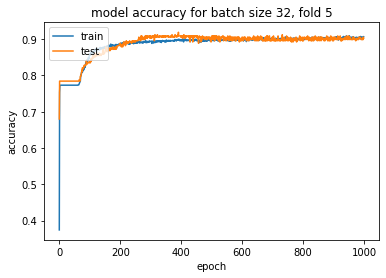

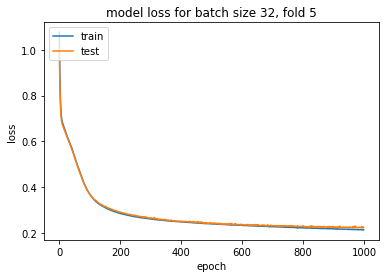

Epoch 1/1000
19/19 - 0s - loss: 1.3014 - accuracy: 0.1545 - val_loss: 1.1815 - val_accuracy: 0.1650
Epoch 2/1000
19/19 - 0s - loss: 1.1090 - accuracy: 0.3426 - val_loss: 1.0414 - val_accuracy: 0.6061
Epoch 3/1000
19/19 - 0s - loss: 1.0007 - accuracy: 0.7204 - val_loss: 0.9577 - val_accuracy: 0.7778
Epoch 4/1000
19/19 - 0s - loss: 0.9359 - accuracy: 0.7657 - val_loss: 0.9050 - val_accuracy: 0.7879
Epoch 5/1000
19/19 - 0s - loss: 0.8927 - accuracy: 0.7674 - val_loss: 0.8662 - val_accuracy: 0.7946
Epoch 6/1000
19/19 - 0s - loss: 0.8598 - accuracy: 0.7699 - val_loss: 0.8352 - val_accuracy: 0.7946
Epoch 7/1000
19/19 - 0s - loss: 0.8330 - accuracy: 0.7708 - val_loss: 0.8091 - val_accuracy: 0.7946
Epoch 8/1000
19/19 - 0s - loss: 0.8103 - accuracy: 0.7708 - val_loss: 0.7866 - val_accuracy: 0.7946
Epoch 9/1000
19/19 - 0s - loss: 0.7908 - accuracy: 0.7708 - val_loss: 0.7671 - val_accuracy: 0.7946
Epoch 10/1000
19/19 - 0s - loss: 0.7739 - accuracy: 0.7708 - val_loss: 0.7500 - val_accuracy: 0.7946

Epoch 83/1000
19/19 - 0s - loss: 0.5276 - accuracy: 0.7716 - val_loss: 0.5124 - val_accuracy: 0.7946
Epoch 84/1000
19/19 - 0s - loss: 0.5253 - accuracy: 0.7725 - val_loss: 0.5103 - val_accuracy: 0.7946
Epoch 85/1000
19/19 - 0s - loss: 0.5230 - accuracy: 0.7725 - val_loss: 0.5083 - val_accuracy: 0.7946
Epoch 86/1000
19/19 - 0s - loss: 0.5208 - accuracy: 0.7725 - val_loss: 0.5061 - val_accuracy: 0.7946
Epoch 87/1000
19/19 - 0s - loss: 0.5184 - accuracy: 0.7725 - val_loss: 0.5041 - val_accuracy: 0.7980
Epoch 88/1000
19/19 - 0s - loss: 0.5160 - accuracy: 0.7750 - val_loss: 0.5021 - val_accuracy: 0.7946
Epoch 89/1000
19/19 - 0s - loss: 0.5138 - accuracy: 0.7758 - val_loss: 0.5001 - val_accuracy: 0.7980
Epoch 90/1000
19/19 - 0s - loss: 0.5114 - accuracy: 0.7767 - val_loss: 0.4981 - val_accuracy: 0.7980
Epoch 91/1000
19/19 - 0s - loss: 0.5093 - accuracy: 0.7775 - val_loss: 0.4960 - val_accuracy: 0.7946
Epoch 92/1000
19/19 - 0s - loss: 0.5068 - accuracy: 0.7792 - val_loss: 0.4941 - val_accurac

Epoch 164/1000
19/19 - 0s - loss: 0.3818 - accuracy: 0.8531 - val_loss: 0.3786 - val_accuracy: 0.8620
Epoch 165/1000
19/19 - 0s - loss: 0.3807 - accuracy: 0.8539 - val_loss: 0.3774 - val_accuracy: 0.8620
Epoch 166/1000
19/19 - 0s - loss: 0.3797 - accuracy: 0.8522 - val_loss: 0.3763 - val_accuracy: 0.8620
Epoch 167/1000
19/19 - 0s - loss: 0.3786 - accuracy: 0.8522 - val_loss: 0.3752 - val_accuracy: 0.8620
Epoch 168/1000
19/19 - 0s - loss: 0.3776 - accuracy: 0.8547 - val_loss: 0.3742 - val_accuracy: 0.8620
Epoch 169/1000
19/19 - 0s - loss: 0.3766 - accuracy: 0.8531 - val_loss: 0.3731 - val_accuracy: 0.8620
Epoch 170/1000
19/19 - 0s - loss: 0.3754 - accuracy: 0.8539 - val_loss: 0.3722 - val_accuracy: 0.8620
Epoch 171/1000
19/19 - 0s - loss: 0.3746 - accuracy: 0.8547 - val_loss: 0.3712 - val_accuracy: 0.8620
Epoch 172/1000
19/19 - 0s - loss: 0.3735 - accuracy: 0.8539 - val_loss: 0.3704 - val_accuracy: 0.8586
Epoch 173/1000
19/19 - 0s - loss: 0.3726 - accuracy: 0.8531 - val_loss: 0.3694 - v

Epoch 245/1000
19/19 - 0s - loss: 0.3252 - accuracy: 0.8648 - val_loss: 0.3213 - val_accuracy: 0.8687
Epoch 246/1000
19/19 - 0s - loss: 0.3247 - accuracy: 0.8665 - val_loss: 0.3208 - val_accuracy: 0.8687
Epoch 247/1000
19/19 - 0s - loss: 0.3243 - accuracy: 0.8648 - val_loss: 0.3203 - val_accuracy: 0.8687
Epoch 248/1000
19/19 - 0s - loss: 0.3238 - accuracy: 0.8665 - val_loss: 0.3199 - val_accuracy: 0.8687
Epoch 249/1000
19/19 - 0s - loss: 0.3234 - accuracy: 0.8665 - val_loss: 0.3194 - val_accuracy: 0.8687
Epoch 250/1000
19/19 - 0s - loss: 0.3228 - accuracy: 0.8665 - val_loss: 0.3189 - val_accuracy: 0.8687
Epoch 251/1000
19/19 - 0s - loss: 0.3226 - accuracy: 0.8673 - val_loss: 0.3184 - val_accuracy: 0.8721
Epoch 252/1000
19/19 - 0s - loss: 0.3220 - accuracy: 0.8665 - val_loss: 0.3179 - val_accuracy: 0.8721
Epoch 253/1000
19/19 - 0s - loss: 0.3217 - accuracy: 0.8657 - val_loss: 0.3175 - val_accuracy: 0.8721
Epoch 254/1000
19/19 - 0s - loss: 0.3212 - accuracy: 0.8665 - val_loss: 0.3171 - v

Epoch 326/1000
19/19 - 0s - loss: 0.2983 - accuracy: 0.8732 - val_loss: 0.2932 - val_accuracy: 0.8721
Epoch 327/1000
19/19 - 0s - loss: 0.2981 - accuracy: 0.8715 - val_loss: 0.2928 - val_accuracy: 0.8721
Epoch 328/1000
19/19 - 0s - loss: 0.2978 - accuracy: 0.8732 - val_loss: 0.2927 - val_accuracy: 0.8721
Epoch 329/1000
19/19 - 0s - loss: 0.2978 - accuracy: 0.8732 - val_loss: 0.2923 - val_accuracy: 0.8721
Epoch 330/1000
19/19 - 0s - loss: 0.2973 - accuracy: 0.8741 - val_loss: 0.2921 - val_accuracy: 0.8721
Epoch 331/1000
19/19 - 0s - loss: 0.2970 - accuracy: 0.8732 - val_loss: 0.2918 - val_accuracy: 0.8721
Epoch 332/1000
19/19 - 0s - loss: 0.2969 - accuracy: 0.8724 - val_loss: 0.2915 - val_accuracy: 0.8721
Epoch 333/1000
19/19 - 0s - loss: 0.2967 - accuracy: 0.8732 - val_loss: 0.2913 - val_accuracy: 0.8721
Epoch 334/1000
19/19 - 0s - loss: 0.2964 - accuracy: 0.8741 - val_loss: 0.2910 - val_accuracy: 0.8721
Epoch 335/1000
19/19 - 0s - loss: 0.2962 - accuracy: 0.8757 - val_loss: 0.2908 - v

Epoch 407/1000
19/19 - 0s - loss: 0.2823 - accuracy: 0.8783 - val_loss: 0.2770 - val_accuracy: 0.8855
Epoch 408/1000
19/19 - 0s - loss: 0.2821 - accuracy: 0.8766 - val_loss: 0.2768 - val_accuracy: 0.8855
Epoch 409/1000
19/19 - 0s - loss: 0.2820 - accuracy: 0.8774 - val_loss: 0.2767 - val_accuracy: 0.8889
Epoch 410/1000
19/19 - 0s - loss: 0.2819 - accuracy: 0.8799 - val_loss: 0.2765 - val_accuracy: 0.8889
Epoch 411/1000
19/19 - 0s - loss: 0.2815 - accuracy: 0.8774 - val_loss: 0.2763 - val_accuracy: 0.8855
Epoch 412/1000
19/19 - 0s - loss: 0.2815 - accuracy: 0.8783 - val_loss: 0.2762 - val_accuracy: 0.8889
Epoch 413/1000
19/19 - 0s - loss: 0.2813 - accuracy: 0.8791 - val_loss: 0.2761 - val_accuracy: 0.8855
Epoch 414/1000
19/19 - 0s - loss: 0.2814 - accuracy: 0.8808 - val_loss: 0.2760 - val_accuracy: 0.8889
Epoch 415/1000
19/19 - 0s - loss: 0.2809 - accuracy: 0.8791 - val_loss: 0.2758 - val_accuracy: 0.8855
Epoch 416/1000
19/19 - 0s - loss: 0.2810 - accuracy: 0.8799 - val_loss: 0.2756 - v

Epoch 488/1000
19/19 - 0s - loss: 0.2717 - accuracy: 0.8900 - val_loss: 0.2671 - val_accuracy: 0.8923
Epoch 489/1000
19/19 - 0s - loss: 0.2717 - accuracy: 0.8900 - val_loss: 0.2670 - val_accuracy: 0.8923
Epoch 490/1000
19/19 - 0s - loss: 0.2715 - accuracy: 0.8900 - val_loss: 0.2670 - val_accuracy: 0.8923
Epoch 491/1000
19/19 - 0s - loss: 0.2713 - accuracy: 0.8908 - val_loss: 0.2668 - val_accuracy: 0.8923
Epoch 492/1000
19/19 - 0s - loss: 0.2712 - accuracy: 0.8883 - val_loss: 0.2667 - val_accuracy: 0.8923
Epoch 493/1000
19/19 - 0s - loss: 0.2711 - accuracy: 0.8883 - val_loss: 0.2665 - val_accuracy: 0.8923
Epoch 494/1000
19/19 - 0s - loss: 0.2711 - accuracy: 0.8917 - val_loss: 0.2664 - val_accuracy: 0.8923
Epoch 495/1000
19/19 - 0s - loss: 0.2709 - accuracy: 0.8892 - val_loss: 0.2663 - val_accuracy: 0.8923
Epoch 496/1000
19/19 - 0s - loss: 0.2707 - accuracy: 0.8900 - val_loss: 0.2665 - val_accuracy: 0.8923
Epoch 497/1000
19/19 - 0s - loss: 0.2709 - accuracy: 0.8883 - val_loss: 0.2662 - v

Epoch 569/1000
19/19 - 0s - loss: 0.2641 - accuracy: 0.8934 - val_loss: 0.2601 - val_accuracy: 0.8889
Epoch 570/1000
19/19 - 0s - loss: 0.2639 - accuracy: 0.8942 - val_loss: 0.2601 - val_accuracy: 0.8889
Epoch 571/1000
19/19 - 0s - loss: 0.2639 - accuracy: 0.8934 - val_loss: 0.2600 - val_accuracy: 0.8889
Epoch 572/1000
19/19 - 0s - loss: 0.2639 - accuracy: 0.8908 - val_loss: 0.2602 - val_accuracy: 0.8923
Epoch 573/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8917 - val_loss: 0.2601 - val_accuracy: 0.8923
Epoch 574/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8942 - val_loss: 0.2597 - val_accuracy: 0.8956
Epoch 575/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.8925 - val_loss: 0.2597 - val_accuracy: 0.8889
Epoch 576/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8950 - val_loss: 0.2596 - val_accuracy: 0.8956
Epoch 577/1000
19/19 - 0s - loss: 0.2634 - accuracy: 0.8917 - val_loss: 0.2595 - val_accuracy: 0.8956
Epoch 578/1000
19/19 - 0s - loss: 0.2632 - accuracy: 0.8925 - val_loss: 0.2595 - v

Epoch 650/1000
19/19 - 0s - loss: 0.2584 - accuracy: 0.8934 - val_loss: 0.2554 - val_accuracy: 0.8956
Epoch 651/1000
19/19 - 0s - loss: 0.2582 - accuracy: 0.8959 - val_loss: 0.2553 - val_accuracy: 0.8956
Epoch 652/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8917 - val_loss: 0.2556 - val_accuracy: 0.8956
Epoch 653/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8950 - val_loss: 0.2553 - val_accuracy: 0.8956
Epoch 654/1000
19/19 - 0s - loss: 0.2579 - accuracy: 0.8942 - val_loss: 0.2551 - val_accuracy: 0.8956
Epoch 655/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8925 - val_loss: 0.2550 - val_accuracy: 0.8956
Epoch 656/1000
19/19 - 0s - loss: 0.2578 - accuracy: 0.8925 - val_loss: 0.2550 - val_accuracy: 0.8956
Epoch 657/1000
19/19 - 0s - loss: 0.2577 - accuracy: 0.8942 - val_loss: 0.2551 - val_accuracy: 0.8956
Epoch 658/1000
19/19 - 0s - loss: 0.2579 - accuracy: 0.8959 - val_loss: 0.2549 - val_accuracy: 0.8956
Epoch 659/1000
19/19 - 0s - loss: 0.2577 - accuracy: 0.8925 - val_loss: 0.2548 - v

Epoch 731/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8925 - val_loss: 0.2521 - val_accuracy: 0.8956
Epoch 732/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8942 - val_loss: 0.2518 - val_accuracy: 0.8956
Epoch 733/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8934 - val_loss: 0.2520 - val_accuracy: 0.8956
Epoch 734/1000
19/19 - 0s - loss: 0.2532 - accuracy: 0.8950 - val_loss: 0.2518 - val_accuracy: 0.8956
Epoch 735/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8942 - val_loss: 0.2517 - val_accuracy: 0.8956
Epoch 736/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8976 - val_loss: 0.2517 - val_accuracy: 0.8956
Epoch 737/1000
19/19 - 0s - loss: 0.2533 - accuracy: 0.8959 - val_loss: 0.2520 - val_accuracy: 0.8956
Epoch 738/1000
19/19 - 0s - loss: 0.2533 - accuracy: 0.8959 - val_loss: 0.2517 - val_accuracy: 0.8956
Epoch 739/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8934 - val_loss: 0.2515 - val_accuracy: 0.8956
Epoch 740/1000
19/19 - 0s - loss: 0.2530 - accuracy: 0.8925 - val_loss: 0.2515 - v

Epoch 812/1000
19/19 - 0s - loss: 0.2498 - accuracy: 0.8942 - val_loss: 0.2491 - val_accuracy: 0.8956
Epoch 813/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8950 - val_loss: 0.2492 - val_accuracy: 0.8956
Epoch 814/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8934 - val_loss: 0.2493 - val_accuracy: 0.8956
Epoch 815/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8967 - val_loss: 0.2491 - val_accuracy: 0.8956
Epoch 816/1000
19/19 - 0s - loss: 0.2495 - accuracy: 0.8934 - val_loss: 0.2492 - val_accuracy: 0.8956
Epoch 817/1000
19/19 - 0s - loss: 0.2495 - accuracy: 0.8950 - val_loss: 0.2492 - val_accuracy: 0.8956
Epoch 818/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8959 - val_loss: 0.2491 - val_accuracy: 0.8956
Epoch 819/1000
19/19 - 0s - loss: 0.2491 - accuracy: 0.8976 - val_loss: 0.2488 - val_accuracy: 0.8990
Epoch 820/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8942 - val_loss: 0.2488 - val_accuracy: 0.8990
Epoch 821/1000
19/19 - 0s - loss: 0.2492 - accuracy: 0.8950 - val_loss: 0.2491 - v

Epoch 893/1000
19/19 - 0s - loss: 0.2462 - accuracy: 0.8959 - val_loss: 0.2468 - val_accuracy: 0.8956
Epoch 894/1000
19/19 - 0s - loss: 0.2462 - accuracy: 0.8976 - val_loss: 0.2465 - val_accuracy: 0.8923
Epoch 895/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8942 - val_loss: 0.2465 - val_accuracy: 0.8923
Epoch 896/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8942 - val_loss: 0.2464 - val_accuracy: 0.8956
Epoch 897/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8950 - val_loss: 0.2467 - val_accuracy: 0.8956
Epoch 898/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8942 - val_loss: 0.2466 - val_accuracy: 0.8956
Epoch 899/1000
19/19 - 0s - loss: 0.2459 - accuracy: 0.8967 - val_loss: 0.2464 - val_accuracy: 0.8956
Epoch 900/1000
19/19 - 0s - loss: 0.2462 - accuracy: 0.8950 - val_loss: 0.2463 - val_accuracy: 0.8923
Epoch 901/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.8934 - val_loss: 0.2466 - val_accuracy: 0.8956
Epoch 902/1000
19/19 - 0s - loss: 0.2456 - accuracy: 0.8967 - val_loss: 0.2468 - v

Epoch 974/1000
19/19 - 0s - loss: 0.2430 - accuracy: 0.8950 - val_loss: 0.2446 - val_accuracy: 0.8923
Epoch 975/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8967 - val_loss: 0.2445 - val_accuracy: 0.8923
Epoch 976/1000
19/19 - 0s - loss: 0.2431 - accuracy: 0.8976 - val_loss: 0.2445 - val_accuracy: 0.8923
Epoch 977/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8967 - val_loss: 0.2444 - val_accuracy: 0.8923
Epoch 978/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8967 - val_loss: 0.2443 - val_accuracy: 0.8923
Epoch 979/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8976 - val_loss: 0.2444 - val_accuracy: 0.8923
Epoch 980/1000
19/19 - 0s - loss: 0.2428 - accuracy: 0.8959 - val_loss: 0.2444 - val_accuracy: 0.8923
Epoch 981/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8967 - val_loss: 0.2445 - val_accuracy: 0.8923
Epoch 982/1000
19/19 - 0s - loss: 0.2426 - accuracy: 0.8967 - val_loss: 0.2447 - val_accuracy: 0.8956
Epoch 983/1000
19/19 - 0s - loss: 0.2428 - accuracy: 0.8959 - val_loss: 0.2443 - v

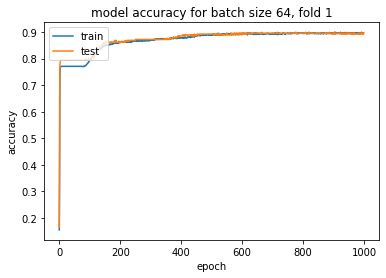

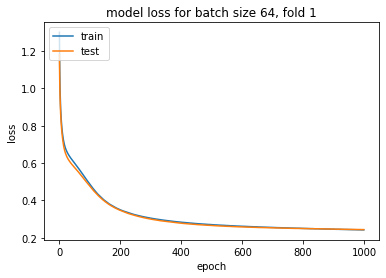

Epoch 1/1000
19/19 - 0s - loss: 0.9693 - accuracy: 0.7246 - val_loss: 0.8872 - val_accuracy: 0.7542
Epoch 2/1000
19/19 - 0s - loss: 0.8241 - accuracy: 0.7792 - val_loss: 0.7852 - val_accuracy: 0.7576
Epoch 3/1000
19/19 - 0s - loss: 0.7383 - accuracy: 0.7800 - val_loss: 0.7275 - val_accuracy: 0.7576
Epoch 4/1000
19/19 - 0s - loss: 0.6898 - accuracy: 0.7800 - val_loss: 0.6949 - val_accuracy: 0.7576
Epoch 5/1000
19/19 - 0s - loss: 0.6621 - accuracy: 0.7800 - val_loss: 0.6761 - val_accuracy: 0.7576
Epoch 6/1000
19/19 - 0s - loss: 0.6457 - accuracy: 0.7800 - val_loss: 0.6652 - val_accuracy: 0.7576
Epoch 7/1000
19/19 - 0s - loss: 0.6359 - accuracy: 0.7800 - val_loss: 0.6578 - val_accuracy: 0.7576
Epoch 8/1000
19/19 - 0s - loss: 0.6290 - accuracy: 0.7800 - val_loss: 0.6523 - val_accuracy: 0.7576
Epoch 9/1000
19/19 - 0s - loss: 0.6237 - accuracy: 0.7800 - val_loss: 0.6476 - val_accuracy: 0.7576
Epoch 10/1000
19/19 - 0s - loss: 0.6195 - accuracy: 0.7800 - val_loss: 0.6432 - val_accuracy: 0.7576

Epoch 83/1000
19/19 - 0s - loss: 0.4362 - accuracy: 0.8069 - val_loss: 0.4308 - val_accuracy: 0.8081
Epoch 84/1000
19/19 - 0s - loss: 0.4347 - accuracy: 0.8077 - val_loss: 0.4291 - val_accuracy: 0.8081
Epoch 85/1000
19/19 - 0s - loss: 0.4331 - accuracy: 0.8077 - val_loss: 0.4274 - val_accuracy: 0.8081
Epoch 86/1000
19/19 - 0s - loss: 0.4316 - accuracy: 0.8077 - val_loss: 0.4257 - val_accuracy: 0.8114
Epoch 87/1000
19/19 - 0s - loss: 0.4301 - accuracy: 0.8086 - val_loss: 0.4241 - val_accuracy: 0.8148
Epoch 88/1000
19/19 - 0s - loss: 0.4285 - accuracy: 0.8086 - val_loss: 0.4224 - val_accuracy: 0.8148
Epoch 89/1000
19/19 - 0s - loss: 0.4270 - accuracy: 0.8094 - val_loss: 0.4208 - val_accuracy: 0.8114
Epoch 90/1000
19/19 - 0s - loss: 0.4255 - accuracy: 0.8094 - val_loss: 0.4192 - val_accuracy: 0.8114
Epoch 91/1000
19/19 - 0s - loss: 0.4244 - accuracy: 0.8119 - val_loss: 0.4177 - val_accuracy: 0.8114
Epoch 92/1000
19/19 - 0s - loss: 0.4227 - accuracy: 0.8136 - val_loss: 0.4162 - val_accurac

Epoch 164/1000
19/19 - 0s - loss: 0.3568 - accuracy: 0.8573 - val_loss: 0.3442 - val_accuracy: 0.8754
Epoch 165/1000
19/19 - 0s - loss: 0.3563 - accuracy: 0.8539 - val_loss: 0.3433 - val_accuracy: 0.8754
Epoch 166/1000
19/19 - 0s - loss: 0.3556 - accuracy: 0.8539 - val_loss: 0.3425 - val_accuracy: 0.8754
Epoch 167/1000
19/19 - 0s - loss: 0.3549 - accuracy: 0.8547 - val_loss: 0.3417 - val_accuracy: 0.8754
Epoch 168/1000
19/19 - 0s - loss: 0.3545 - accuracy: 0.8564 - val_loss: 0.3412 - val_accuracy: 0.8754
Epoch 169/1000
19/19 - 0s - loss: 0.3539 - accuracy: 0.8564 - val_loss: 0.3406 - val_accuracy: 0.8754
Epoch 170/1000
19/19 - 0s - loss: 0.3530 - accuracy: 0.8539 - val_loss: 0.3399 - val_accuracy: 0.8754
Epoch 171/1000
19/19 - 0s - loss: 0.3525 - accuracy: 0.8539 - val_loss: 0.3393 - val_accuracy: 0.8754
Epoch 172/1000
19/19 - 0s - loss: 0.3519 - accuracy: 0.8547 - val_loss: 0.3390 - val_accuracy: 0.8754
Epoch 173/1000
19/19 - 0s - loss: 0.3514 - accuracy: 0.8522 - val_loss: 0.3383 - v

Epoch 245/1000
19/19 - 0s - loss: 0.3187 - accuracy: 0.8623 - val_loss: 0.3048 - val_accuracy: 0.8956
Epoch 246/1000
19/19 - 0s - loss: 0.3184 - accuracy: 0.8657 - val_loss: 0.3039 - val_accuracy: 0.8990
Epoch 247/1000
19/19 - 0s - loss: 0.3180 - accuracy: 0.8631 - val_loss: 0.3041 - val_accuracy: 0.8956
Epoch 248/1000
19/19 - 0s - loss: 0.3175 - accuracy: 0.8682 - val_loss: 0.3032 - val_accuracy: 0.8956
Epoch 249/1000
19/19 - 0s - loss: 0.3172 - accuracy: 0.8631 - val_loss: 0.3032 - val_accuracy: 0.8990
Epoch 250/1000
19/19 - 0s - loss: 0.3168 - accuracy: 0.8690 - val_loss: 0.3025 - val_accuracy: 0.8990
Epoch 251/1000
19/19 - 0s - loss: 0.3166 - accuracy: 0.8657 - val_loss: 0.3024 - val_accuracy: 0.8990
Epoch 252/1000
19/19 - 0s - loss: 0.3162 - accuracy: 0.8673 - val_loss: 0.3018 - val_accuracy: 0.8990
Epoch 253/1000
19/19 - 0s - loss: 0.3160 - accuracy: 0.8682 - val_loss: 0.3014 - val_accuracy: 0.8990
Epoch 254/1000
19/19 - 0s - loss: 0.3156 - accuracy: 0.8657 - val_loss: 0.3014 - v

Epoch 326/1000
19/19 - 0s - loss: 0.2952 - accuracy: 0.8799 - val_loss: 0.2834 - val_accuracy: 0.9024
Epoch 327/1000
19/19 - 0s - loss: 0.2951 - accuracy: 0.8791 - val_loss: 0.2835 - val_accuracy: 0.8990
Epoch 328/1000
19/19 - 0s - loss: 0.2947 - accuracy: 0.8799 - val_loss: 0.2829 - val_accuracy: 0.9024
Epoch 329/1000
19/19 - 0s - loss: 0.2946 - accuracy: 0.8799 - val_loss: 0.2833 - val_accuracy: 0.8990
Epoch 330/1000
19/19 - 0s - loss: 0.2942 - accuracy: 0.8791 - val_loss: 0.2826 - val_accuracy: 0.8990
Epoch 331/1000
19/19 - 0s - loss: 0.2940 - accuracy: 0.8799 - val_loss: 0.2830 - val_accuracy: 0.9024
Epoch 332/1000
19/19 - 0s - loss: 0.2938 - accuracy: 0.8799 - val_loss: 0.2830 - val_accuracy: 0.9024
Epoch 333/1000
19/19 - 0s - loss: 0.2937 - accuracy: 0.8774 - val_loss: 0.2824 - val_accuracy: 0.9024
Epoch 334/1000
19/19 - 0s - loss: 0.2934 - accuracy: 0.8783 - val_loss: 0.2829 - val_accuracy: 0.9024
Epoch 335/1000
19/19 - 0s - loss: 0.2932 - accuracy: 0.8808 - val_loss: 0.2824 - v

Epoch 407/1000
19/19 - 0s - loss: 0.2793 - accuracy: 0.8858 - val_loss: 0.2737 - val_accuracy: 0.9057
Epoch 408/1000
19/19 - 0s - loss: 0.2792 - accuracy: 0.8858 - val_loss: 0.2725 - val_accuracy: 0.9057
Epoch 409/1000
19/19 - 0s - loss: 0.2791 - accuracy: 0.8883 - val_loss: 0.2728 - val_accuracy: 0.9057
Epoch 410/1000
19/19 - 0s - loss: 0.2788 - accuracy: 0.8858 - val_loss: 0.2726 - val_accuracy: 0.9057
Epoch 411/1000
19/19 - 0s - loss: 0.2786 - accuracy: 0.8875 - val_loss: 0.2729 - val_accuracy: 0.9057
Epoch 412/1000
19/19 - 0s - loss: 0.2785 - accuracy: 0.8866 - val_loss: 0.2737 - val_accuracy: 0.9057
Epoch 413/1000
19/19 - 0s - loss: 0.2783 - accuracy: 0.8866 - val_loss: 0.2724 - val_accuracy: 0.9057
Epoch 414/1000
19/19 - 0s - loss: 0.2783 - accuracy: 0.8841 - val_loss: 0.2719 - val_accuracy: 0.9057
Epoch 415/1000
19/19 - 0s - loss: 0.2781 - accuracy: 0.8866 - val_loss: 0.2724 - val_accuracy: 0.9057
Epoch 416/1000
19/19 - 0s - loss: 0.2780 - accuracy: 0.8850 - val_loss: 0.2718 - v

Epoch 488/1000
19/19 - 0s - loss: 0.2683 - accuracy: 0.8925 - val_loss: 0.2677 - val_accuracy: 0.9057
Epoch 489/1000
19/19 - 0s - loss: 0.2684 - accuracy: 0.8908 - val_loss: 0.2677 - val_accuracy: 0.9057
Epoch 490/1000
19/19 - 0s - loss: 0.2680 - accuracy: 0.8892 - val_loss: 0.2668 - val_accuracy: 0.9024
Epoch 491/1000
19/19 - 0s - loss: 0.2680 - accuracy: 0.8917 - val_loss: 0.2674 - val_accuracy: 0.9057
Epoch 492/1000
19/19 - 0s - loss: 0.2677 - accuracy: 0.8934 - val_loss: 0.2673 - val_accuracy: 0.9057
Epoch 493/1000
19/19 - 0s - loss: 0.2677 - accuracy: 0.8925 - val_loss: 0.2679 - val_accuracy: 0.9057
Epoch 494/1000
19/19 - 0s - loss: 0.2678 - accuracy: 0.8925 - val_loss: 0.2679 - val_accuracy: 0.9057
Epoch 495/1000
19/19 - 0s - loss: 0.2674 - accuracy: 0.8908 - val_loss: 0.2675 - val_accuracy: 0.9057
Epoch 496/1000
19/19 - 0s - loss: 0.2672 - accuracy: 0.8883 - val_loss: 0.2663 - val_accuracy: 0.9024
Epoch 497/1000
19/19 - 0s - loss: 0.2675 - accuracy: 0.8925 - val_loss: 0.2669 - v

Epoch 569/1000
19/19 - 0s - loss: 0.2603 - accuracy: 0.8917 - val_loss: 0.2656 - val_accuracy: 0.9024
Epoch 570/1000
19/19 - 0s - loss: 0.2598 - accuracy: 0.8917 - val_loss: 0.2653 - val_accuracy: 0.9024
Epoch 571/1000
19/19 - 0s - loss: 0.2600 - accuracy: 0.8925 - val_loss: 0.2660 - val_accuracy: 0.9024
Epoch 572/1000
19/19 - 0s - loss: 0.2598 - accuracy: 0.8934 - val_loss: 0.2650 - val_accuracy: 0.9024
Epoch 573/1000
19/19 - 0s - loss: 0.2597 - accuracy: 0.8908 - val_loss: 0.2649 - val_accuracy: 0.9024
Epoch 574/1000
19/19 - 0s - loss: 0.2596 - accuracy: 0.8925 - val_loss: 0.2657 - val_accuracy: 0.9024
Epoch 575/1000
19/19 - 0s - loss: 0.2597 - accuracy: 0.8942 - val_loss: 0.2657 - val_accuracy: 0.9024
Epoch 576/1000
19/19 - 0s - loss: 0.2595 - accuracy: 0.8908 - val_loss: 0.2654 - val_accuracy: 0.9024
Epoch 577/1000
19/19 - 0s - loss: 0.2594 - accuracy: 0.8942 - val_loss: 0.2656 - val_accuracy: 0.9024
Epoch 578/1000
19/19 - 0s - loss: 0.2593 - accuracy: 0.8934 - val_loss: 0.2657 - v

Epoch 650/1000
19/19 - 0s - loss: 0.2542 - accuracy: 0.8925 - val_loss: 0.2653 - val_accuracy: 0.8990
Epoch 651/1000
19/19 - 0s - loss: 0.2539 - accuracy: 0.8925 - val_loss: 0.2652 - val_accuracy: 0.8990
Epoch 652/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8942 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 653/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8908 - val_loss: 0.2649 - val_accuracy: 0.8990
Epoch 654/1000
19/19 - 0s - loss: 0.2533 - accuracy: 0.8917 - val_loss: 0.2660 - val_accuracy: 0.8990
Epoch 655/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8942 - val_loss: 0.2661 - val_accuracy: 0.8990
Epoch 656/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8942 - val_loss: 0.2655 - val_accuracy: 0.8990
Epoch 657/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8942 - val_loss: 0.2653 - val_accuracy: 0.8990
Epoch 658/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8950 - val_loss: 0.2654 - val_accuracy: 0.8990
Epoch 659/1000
19/19 - 0s - loss: 0.2532 - accuracy: 0.8934 - val_loss: 0.2657 - v

Epoch 731/1000
19/19 - 0s - loss: 0.2489 - accuracy: 0.8908 - val_loss: 0.2647 - val_accuracy: 0.9024
Epoch 732/1000
19/19 - 0s - loss: 0.2490 - accuracy: 0.8950 - val_loss: 0.2649 - val_accuracy: 0.9024
Epoch 733/1000
19/19 - 0s - loss: 0.2489 - accuracy: 0.8925 - val_loss: 0.2646 - val_accuracy: 0.9024
Epoch 734/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8942 - val_loss: 0.2645 - val_accuracy: 0.9024
Epoch 735/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8942 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 736/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8942 - val_loss: 0.2647 - val_accuracy: 0.9024
Epoch 737/1000
19/19 - 0s - loss: 0.2486 - accuracy: 0.8934 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 738/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8950 - val_loss: 0.2645 - val_accuracy: 0.9024
Epoch 739/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8967 - val_loss: 0.2652 - val_accuracy: 0.9024
Epoch 740/1000
19/19 - 0s - loss: 0.2485 - accuracy: 0.8934 - val_loss: 0.2646 - v

Epoch 812/1000
19/19 - 0s - loss: 0.2450 - accuracy: 0.8959 - val_loss: 0.2643 - val_accuracy: 0.9024
Epoch 813/1000
19/19 - 0s - loss: 0.2452 - accuracy: 0.8950 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 814/1000
19/19 - 0s - loss: 0.2449 - accuracy: 0.8942 - val_loss: 0.2645 - val_accuracy: 0.9024
Epoch 815/1000
19/19 - 0s - loss: 0.2451 - accuracy: 0.8934 - val_loss: 0.2643 - val_accuracy: 0.9024
Epoch 816/1000
19/19 - 0s - loss: 0.2449 - accuracy: 0.8950 - val_loss: 0.2640 - val_accuracy: 0.9024
Epoch 817/1000
19/19 - 0s - loss: 0.2450 - accuracy: 0.8942 - val_loss: 0.2643 - val_accuracy: 0.9024
Epoch 818/1000
19/19 - 0s - loss: 0.2448 - accuracy: 0.8959 - val_loss: 0.2642 - val_accuracy: 0.9024
Epoch 819/1000
19/19 - 0s - loss: 0.2446 - accuracy: 0.8934 - val_loss: 0.2648 - val_accuracy: 0.9024
Epoch 820/1000
19/19 - 0s - loss: 0.2446 - accuracy: 0.8925 - val_loss: 0.2656 - val_accuracy: 0.8990
Epoch 821/1000
19/19 - 0s - loss: 0.2446 - accuracy: 0.8942 - val_loss: 0.2647 - v

Epoch 893/1000
19/19 - 0s - loss: 0.2415 - accuracy: 0.8959 - val_loss: 0.2666 - val_accuracy: 0.9057
Epoch 894/1000
19/19 - 0s - loss: 0.2412 - accuracy: 0.8984 - val_loss: 0.2673 - val_accuracy: 0.9024
Epoch 895/1000
19/19 - 0s - loss: 0.2413 - accuracy: 0.8942 - val_loss: 0.2672 - val_accuracy: 0.9057
Epoch 896/1000
19/19 - 0s - loss: 0.2411 - accuracy: 0.8950 - val_loss: 0.2669 - val_accuracy: 0.9057
Epoch 897/1000
19/19 - 0s - loss: 0.2413 - accuracy: 0.8976 - val_loss: 0.2669 - val_accuracy: 0.9057
Epoch 898/1000
19/19 - 0s - loss: 0.2413 - accuracy: 0.8984 - val_loss: 0.2665 - val_accuracy: 0.9057
Epoch 899/1000
19/19 - 0s - loss: 0.2410 - accuracy: 0.8967 - val_loss: 0.2668 - val_accuracy: 0.9057
Epoch 900/1000
19/19 - 0s - loss: 0.2413 - accuracy: 0.8967 - val_loss: 0.2666 - val_accuracy: 0.9057
Epoch 901/1000
19/19 - 0s - loss: 0.2410 - accuracy: 0.8976 - val_loss: 0.2665 - val_accuracy: 0.9057
Epoch 902/1000
19/19 - 0s - loss: 0.2408 - accuracy: 0.8967 - val_loss: 0.2663 - v

Epoch 974/1000
19/19 - 0s - loss: 0.2382 - accuracy: 0.8976 - val_loss: 0.2678 - val_accuracy: 0.9024
Epoch 975/1000
19/19 - 0s - loss: 0.2380 - accuracy: 0.8976 - val_loss: 0.2677 - val_accuracy: 0.9057
Epoch 976/1000
19/19 - 0s - loss: 0.2382 - accuracy: 0.9001 - val_loss: 0.2679 - val_accuracy: 0.9057
Epoch 977/1000
19/19 - 0s - loss: 0.2382 - accuracy: 0.9001 - val_loss: 0.2680 - val_accuracy: 0.9024
Epoch 978/1000
19/19 - 0s - loss: 0.2383 - accuracy: 0.8992 - val_loss: 0.2679 - val_accuracy: 0.9024
Epoch 979/1000
19/19 - 0s - loss: 0.2380 - accuracy: 0.8984 - val_loss: 0.2678 - val_accuracy: 0.9024
Epoch 980/1000
19/19 - 0s - loss: 0.2378 - accuracy: 0.8992 - val_loss: 0.2674 - val_accuracy: 0.9057
Epoch 981/1000
19/19 - 0s - loss: 0.2381 - accuracy: 0.8976 - val_loss: 0.2674 - val_accuracy: 0.9057
Epoch 982/1000
19/19 - 0s - loss: 0.2379 - accuracy: 0.9009 - val_loss: 0.2673 - val_accuracy: 0.9024
Epoch 983/1000
19/19 - 0s - loss: 0.2381 - accuracy: 0.8984 - val_loss: 0.2681 - v

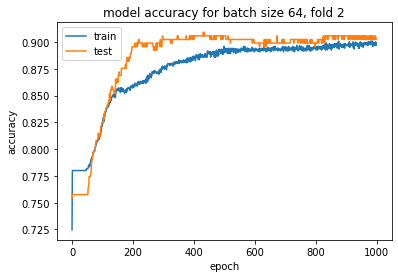

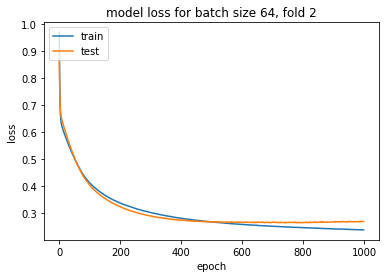

Epoch 1/1000
19/19 - 0s - loss: 0.9462 - accuracy: 0.6986 - val_loss: 0.8554 - val_accuracy: 0.7980
Epoch 2/1000
19/19 - 0s - loss: 0.8301 - accuracy: 0.7699 - val_loss: 0.7712 - val_accuracy: 0.7980
Epoch 3/1000
19/19 - 0s - loss: 0.7731 - accuracy: 0.7699 - val_loss: 0.7263 - val_accuracy: 0.7980
Epoch 4/1000
19/19 - 0s - loss: 0.7441 - accuracy: 0.7699 - val_loss: 0.7015 - val_accuracy: 0.7980
Epoch 5/1000
19/19 - 0s - loss: 0.7277 - accuracy: 0.7699 - val_loss: 0.6855 - val_accuracy: 0.7980
Epoch 6/1000
19/19 - 0s - loss: 0.7171 - accuracy: 0.7699 - val_loss: 0.6750 - val_accuracy: 0.7980
Epoch 7/1000
19/19 - 0s - loss: 0.7098 - accuracy: 0.7699 - val_loss: 0.6679 - val_accuracy: 0.7980
Epoch 8/1000
19/19 - 0s - loss: 0.7044 - accuracy: 0.7699 - val_loss: 0.6623 - val_accuracy: 0.7980
Epoch 9/1000
19/19 - 0s - loss: 0.7000 - accuracy: 0.7699 - val_loss: 0.6576 - val_accuracy: 0.7980
Epoch 10/1000
19/19 - 0s - loss: 0.6961 - accuracy: 0.7699 - val_loss: 0.6537 - val_accuracy: 0.7980

Epoch 83/1000
19/19 - 0s - loss: 0.5250 - accuracy: 0.7733 - val_loss: 0.4902 - val_accuracy: 0.8047
Epoch 84/1000
19/19 - 0s - loss: 0.5229 - accuracy: 0.7725 - val_loss: 0.4881 - val_accuracy: 0.8081
Epoch 85/1000
19/19 - 0s - loss: 0.5207 - accuracy: 0.7725 - val_loss: 0.4860 - val_accuracy: 0.8047
Epoch 86/1000
19/19 - 0s - loss: 0.5185 - accuracy: 0.7733 - val_loss: 0.4840 - val_accuracy: 0.8047
Epoch 87/1000
19/19 - 0s - loss: 0.5164 - accuracy: 0.7733 - val_loss: 0.4820 - val_accuracy: 0.8047
Epoch 88/1000
19/19 - 0s - loss: 0.5142 - accuracy: 0.7741 - val_loss: 0.4797 - val_accuracy: 0.8047
Epoch 89/1000
19/19 - 0s - loss: 0.5122 - accuracy: 0.7741 - val_loss: 0.4777 - val_accuracy: 0.8047
Epoch 90/1000
19/19 - 0s - loss: 0.5100 - accuracy: 0.7750 - val_loss: 0.4756 - val_accuracy: 0.8081
Epoch 91/1000
19/19 - 0s - loss: 0.5079 - accuracy: 0.7783 - val_loss: 0.4736 - val_accuracy: 0.8114
Epoch 92/1000
19/19 - 0s - loss: 0.5058 - accuracy: 0.7800 - val_loss: 0.4714 - val_accurac

Epoch 164/1000
19/19 - 0s - loss: 0.3932 - accuracy: 0.8321 - val_loss: 0.3651 - val_accuracy: 0.8620
Epoch 165/1000
19/19 - 0s - loss: 0.3921 - accuracy: 0.8354 - val_loss: 0.3637 - val_accuracy: 0.8653
Epoch 166/1000
19/19 - 0s - loss: 0.3911 - accuracy: 0.8354 - val_loss: 0.3626 - val_accuracy: 0.8653
Epoch 167/1000
19/19 - 0s - loss: 0.3900 - accuracy: 0.8338 - val_loss: 0.3618 - val_accuracy: 0.8653
Epoch 168/1000
19/19 - 0s - loss: 0.3890 - accuracy: 0.8354 - val_loss: 0.3607 - val_accuracy: 0.8653
Epoch 169/1000
19/19 - 0s - loss: 0.3880 - accuracy: 0.8371 - val_loss: 0.3598 - val_accuracy: 0.8653
Epoch 170/1000
19/19 - 0s - loss: 0.3868 - accuracy: 0.8396 - val_loss: 0.3590 - val_accuracy: 0.8620
Epoch 171/1000
19/19 - 0s - loss: 0.3859 - accuracy: 0.8421 - val_loss: 0.3580 - val_accuracy: 0.8620
Epoch 172/1000
19/19 - 0s - loss: 0.3849 - accuracy: 0.8396 - val_loss: 0.3577 - val_accuracy: 0.8620
Epoch 173/1000
19/19 - 0s - loss: 0.3841 - accuracy: 0.8405 - val_loss: 0.3568 - v

Epoch 245/1000
19/19 - 0s - loss: 0.3320 - accuracy: 0.8707 - val_loss: 0.3139 - val_accuracy: 0.8721
Epoch 246/1000
19/19 - 0s - loss: 0.3316 - accuracy: 0.8715 - val_loss: 0.3131 - val_accuracy: 0.8721
Epoch 247/1000
19/19 - 0s - loss: 0.3312 - accuracy: 0.8715 - val_loss: 0.3129 - val_accuracy: 0.8721
Epoch 248/1000
19/19 - 0s - loss: 0.3306 - accuracy: 0.8732 - val_loss: 0.3121 - val_accuracy: 0.8721
Epoch 249/1000
19/19 - 0s - loss: 0.3300 - accuracy: 0.8715 - val_loss: 0.3124 - val_accuracy: 0.8721
Epoch 250/1000
19/19 - 0s - loss: 0.3294 - accuracy: 0.8741 - val_loss: 0.3109 - val_accuracy: 0.8754
Epoch 251/1000
19/19 - 0s - loss: 0.3291 - accuracy: 0.8715 - val_loss: 0.3107 - val_accuracy: 0.8754
Epoch 252/1000
19/19 - 0s - loss: 0.3286 - accuracy: 0.8732 - val_loss: 0.3104 - val_accuracy: 0.8721
Epoch 253/1000
19/19 - 0s - loss: 0.3281 - accuracy: 0.8749 - val_loss: 0.3102 - val_accuracy: 0.8721
Epoch 254/1000
19/19 - 0s - loss: 0.3274 - accuracy: 0.8715 - val_loss: 0.3103 - v

Epoch 326/1000
19/19 - 0s - loss: 0.3011 - accuracy: 0.8783 - val_loss: 0.2898 - val_accuracy: 0.8687
Epoch 327/1000
19/19 - 0s - loss: 0.3008 - accuracy: 0.8791 - val_loss: 0.2895 - val_accuracy: 0.8687
Epoch 328/1000
19/19 - 0s - loss: 0.3005 - accuracy: 0.8774 - val_loss: 0.2894 - val_accuracy: 0.8687
Epoch 329/1000
19/19 - 0s - loss: 0.3004 - accuracy: 0.8808 - val_loss: 0.2892 - val_accuracy: 0.8687
Epoch 330/1000
19/19 - 0s - loss: 0.2999 - accuracy: 0.8783 - val_loss: 0.2882 - val_accuracy: 0.8687
Epoch 331/1000
19/19 - 0s - loss: 0.2997 - accuracy: 0.8783 - val_loss: 0.2885 - val_accuracy: 0.8687
Epoch 332/1000
19/19 - 0s - loss: 0.2993 - accuracy: 0.8783 - val_loss: 0.2888 - val_accuracy: 0.8687
Epoch 333/1000
19/19 - 0s - loss: 0.2993 - accuracy: 0.8791 - val_loss: 0.2882 - val_accuracy: 0.8687
Epoch 334/1000
19/19 - 0s - loss: 0.2989 - accuracy: 0.8791 - val_loss: 0.2882 - val_accuracy: 0.8687
Epoch 335/1000
19/19 - 0s - loss: 0.2987 - accuracy: 0.8791 - val_loss: 0.2881 - v

Epoch 407/1000
19/19 - 0s - loss: 0.2826 - accuracy: 0.8866 - val_loss: 0.2774 - val_accuracy: 0.8754
Epoch 408/1000
19/19 - 0s - loss: 0.2823 - accuracy: 0.8875 - val_loss: 0.2755 - val_accuracy: 0.8754
Epoch 409/1000
19/19 - 0s - loss: 0.2821 - accuracy: 0.8841 - val_loss: 0.2756 - val_accuracy: 0.8754
Epoch 410/1000
19/19 - 0s - loss: 0.2819 - accuracy: 0.8841 - val_loss: 0.2756 - val_accuracy: 0.8754
Epoch 411/1000
19/19 - 0s - loss: 0.2818 - accuracy: 0.8875 - val_loss: 0.2754 - val_accuracy: 0.8754
Epoch 412/1000
19/19 - 0s - loss: 0.2816 - accuracy: 0.8858 - val_loss: 0.2763 - val_accuracy: 0.8721
Epoch 413/1000
19/19 - 0s - loss: 0.2813 - accuracy: 0.8866 - val_loss: 0.2747 - val_accuracy: 0.8754
Epoch 414/1000
19/19 - 0s - loss: 0.2814 - accuracy: 0.8850 - val_loss: 0.2744 - val_accuracy: 0.8754
Epoch 415/1000
19/19 - 0s - loss: 0.2812 - accuracy: 0.8866 - val_loss: 0.2749 - val_accuracy: 0.8788
Epoch 416/1000
19/19 - 0s - loss: 0.2810 - accuracy: 0.8866 - val_loss: 0.2735 - v

Epoch 488/1000
19/19 - 0s - loss: 0.2710 - accuracy: 0.8866 - val_loss: 0.2666 - val_accuracy: 0.8754
Epoch 489/1000
19/19 - 0s - loss: 0.2711 - accuracy: 0.8883 - val_loss: 0.2666 - val_accuracy: 0.8754
Epoch 490/1000
19/19 - 0s - loss: 0.2708 - accuracy: 0.8892 - val_loss: 0.2652 - val_accuracy: 0.8822
Epoch 491/1000
19/19 - 0s - loss: 0.2709 - accuracy: 0.8875 - val_loss: 0.2654 - val_accuracy: 0.8788
Epoch 492/1000
19/19 - 0s - loss: 0.2705 - accuracy: 0.8892 - val_loss: 0.2656 - val_accuracy: 0.8822
Epoch 493/1000
19/19 - 0s - loss: 0.2707 - accuracy: 0.8875 - val_loss: 0.2665 - val_accuracy: 0.8822
Epoch 494/1000
19/19 - 0s - loss: 0.2704 - accuracy: 0.8875 - val_loss: 0.2669 - val_accuracy: 0.8788
Epoch 495/1000
19/19 - 0s - loss: 0.2703 - accuracy: 0.8892 - val_loss: 0.2661 - val_accuracy: 0.8822
Epoch 496/1000
19/19 - 0s - loss: 0.2701 - accuracy: 0.8900 - val_loss: 0.2645 - val_accuracy: 0.8822
Epoch 497/1000
19/19 - 0s - loss: 0.2700 - accuracy: 0.8892 - val_loss: 0.2660 - v

Epoch 569/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8908 - val_loss: 0.2596 - val_accuracy: 0.8822
Epoch 570/1000
19/19 - 0s - loss: 0.2632 - accuracy: 0.8908 - val_loss: 0.2592 - val_accuracy: 0.8822
Epoch 571/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8925 - val_loss: 0.2602 - val_accuracy: 0.8788
Epoch 572/1000
19/19 - 0s - loss: 0.2632 - accuracy: 0.8917 - val_loss: 0.2589 - val_accuracy: 0.8822
Epoch 573/1000
19/19 - 0s - loss: 0.2631 - accuracy: 0.8908 - val_loss: 0.2593 - val_accuracy: 0.8822
Epoch 574/1000
19/19 - 0s - loss: 0.2629 - accuracy: 0.8900 - val_loss: 0.2588 - val_accuracy: 0.8822
Epoch 575/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8917 - val_loss: 0.2587 - val_accuracy: 0.8822
Epoch 576/1000
19/19 - 0s - loss: 0.2629 - accuracy: 0.8900 - val_loss: 0.2587 - val_accuracy: 0.8855
Epoch 577/1000
19/19 - 0s - loss: 0.2630 - accuracy: 0.8917 - val_loss: 0.2581 - val_accuracy: 0.8889
Epoch 578/1000
19/19 - 0s - loss: 0.2630 - accuracy: 0.8892 - val_loss: 0.2593 - v

Epoch 650/1000
19/19 - 0s - loss: 0.2584 - accuracy: 0.8934 - val_loss: 0.2543 - val_accuracy: 0.8788
Epoch 651/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8908 - val_loss: 0.2543 - val_accuracy: 0.8788
Epoch 652/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8917 - val_loss: 0.2524 - val_accuracy: 0.8889
Epoch 653/1000
19/19 - 0s - loss: 0.2581 - accuracy: 0.8925 - val_loss: 0.2527 - val_accuracy: 0.8889
Epoch 654/1000
19/19 - 0s - loss: 0.2578 - accuracy: 0.8925 - val_loss: 0.2541 - val_accuracy: 0.8788
Epoch 655/1000
19/19 - 0s - loss: 0.2577 - accuracy: 0.8934 - val_loss: 0.2556 - val_accuracy: 0.8754
Epoch 656/1000
19/19 - 0s - loss: 0.2577 - accuracy: 0.8925 - val_loss: 0.2551 - val_accuracy: 0.8788
Epoch 657/1000
19/19 - 0s - loss: 0.2577 - accuracy: 0.8942 - val_loss: 0.2541 - val_accuracy: 0.8788
Epoch 658/1000
19/19 - 0s - loss: 0.2579 - accuracy: 0.8942 - val_loss: 0.2538 - val_accuracy: 0.8788
Epoch 659/1000
19/19 - 0s - loss: 0.2575 - accuracy: 0.8908 - val_loss: 0.2537 - v

Epoch 731/1000
19/19 - 0s - loss: 0.2540 - accuracy: 0.8934 - val_loss: 0.2503 - val_accuracy: 0.8855
Epoch 732/1000
19/19 - 0s - loss: 0.2541 - accuracy: 0.8942 - val_loss: 0.2507 - val_accuracy: 0.8855
Epoch 733/1000
19/19 - 0s - loss: 0.2539 - accuracy: 0.8934 - val_loss: 0.2500 - val_accuracy: 0.8855
Epoch 734/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8959 - val_loss: 0.2500 - val_accuracy: 0.8855
Epoch 735/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8942 - val_loss: 0.2494 - val_accuracy: 0.8855
Epoch 736/1000
19/19 - 0s - loss: 0.2538 - accuracy: 0.8959 - val_loss: 0.2496 - val_accuracy: 0.8855
Epoch 737/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8942 - val_loss: 0.2493 - val_accuracy: 0.8855
Epoch 738/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8942 - val_loss: 0.2500 - val_accuracy: 0.8855
Epoch 739/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8950 - val_loss: 0.2512 - val_accuracy: 0.8788
Epoch 740/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8950 - val_loss: 0.2499 - v

Epoch 812/1000
19/19 - 0s - loss: 0.2504 - accuracy: 0.8967 - val_loss: 0.2459 - val_accuracy: 0.8855
Epoch 813/1000
19/19 - 0s - loss: 0.2507 - accuracy: 0.8934 - val_loss: 0.2464 - val_accuracy: 0.8855
Epoch 814/1000
19/19 - 0s - loss: 0.2506 - accuracy: 0.8934 - val_loss: 0.2461 - val_accuracy: 0.8855
Epoch 815/1000
19/19 - 0s - loss: 0.2506 - accuracy: 0.8950 - val_loss: 0.2463 - val_accuracy: 0.8855
Epoch 816/1000
19/19 - 0s - loss: 0.2504 - accuracy: 0.8959 - val_loss: 0.2458 - val_accuracy: 0.8855
Epoch 817/1000
19/19 - 0s - loss: 0.2505 - accuracy: 0.8934 - val_loss: 0.2453 - val_accuracy: 0.8855
Epoch 818/1000
19/19 - 0s - loss: 0.2503 - accuracy: 0.8959 - val_loss: 0.2460 - val_accuracy: 0.8855
Epoch 819/1000
19/19 - 0s - loss: 0.2502 - accuracy: 0.8959 - val_loss: 0.2469 - val_accuracy: 0.8855
Epoch 820/1000
19/19 - 0s - loss: 0.2504 - accuracy: 0.8992 - val_loss: 0.2486 - val_accuracy: 0.8788
Epoch 821/1000
19/19 - 0s - loss: 0.2502 - accuracy: 0.8942 - val_loss: 0.2471 - v

Epoch 893/1000
19/19 - 0s - loss: 0.2478 - accuracy: 0.8976 - val_loss: 0.2447 - val_accuracy: 0.8889
Epoch 894/1000
19/19 - 0s - loss: 0.2476 - accuracy: 0.8934 - val_loss: 0.2447 - val_accuracy: 0.8889
Epoch 895/1000
19/19 - 0s - loss: 0.2478 - accuracy: 0.8959 - val_loss: 0.2444 - val_accuracy: 0.8889
Epoch 896/1000
19/19 - 0s - loss: 0.2477 - accuracy: 0.8950 - val_loss: 0.2446 - val_accuracy: 0.8889
Epoch 897/1000
19/19 - 0s - loss: 0.2477 - accuracy: 0.8959 - val_loss: 0.2437 - val_accuracy: 0.8889
Epoch 898/1000
19/19 - 0s - loss: 0.2475 - accuracy: 0.8950 - val_loss: 0.2435 - val_accuracy: 0.8889
Epoch 899/1000
19/19 - 0s - loss: 0.2476 - accuracy: 0.8942 - val_loss: 0.2443 - val_accuracy: 0.8889
Epoch 900/1000
19/19 - 0s - loss: 0.2475 - accuracy: 0.8942 - val_loss: 0.2437 - val_accuracy: 0.8889
Epoch 901/1000
19/19 - 0s - loss: 0.2476 - accuracy: 0.8950 - val_loss: 0.2435 - val_accuracy: 0.8889
Epoch 902/1000
19/19 - 0s - loss: 0.2474 - accuracy: 0.8942 - val_loss: 0.2438 - v

Epoch 974/1000
19/19 - 0s - loss: 0.2453 - accuracy: 0.8967 - val_loss: 0.2436 - val_accuracy: 0.8855
Epoch 975/1000
19/19 - 0s - loss: 0.2451 - accuracy: 0.8959 - val_loss: 0.2420 - val_accuracy: 0.8889
Epoch 976/1000
19/19 - 0s - loss: 0.2453 - accuracy: 0.8967 - val_loss: 0.2417 - val_accuracy: 0.8889
Epoch 977/1000
19/19 - 0s - loss: 0.2450 - accuracy: 0.8950 - val_loss: 0.2432 - val_accuracy: 0.8889
Epoch 978/1000
19/19 - 0s - loss: 0.2451 - accuracy: 0.8950 - val_loss: 0.2424 - val_accuracy: 0.8889
Epoch 979/1000
19/19 - 0s - loss: 0.2452 - accuracy: 0.8950 - val_loss: 0.2423 - val_accuracy: 0.8889
Epoch 980/1000
19/19 - 0s - loss: 0.2448 - accuracy: 0.8959 - val_loss: 0.2416 - val_accuracy: 0.8889
Epoch 981/1000
19/19 - 0s - loss: 0.2449 - accuracy: 0.8950 - val_loss: 0.2406 - val_accuracy: 0.8923
Epoch 982/1000
19/19 - 0s - loss: 0.2451 - accuracy: 0.8942 - val_loss: 0.2403 - val_accuracy: 0.8923
Epoch 983/1000
19/19 - 0s - loss: 0.2452 - accuracy: 0.8950 - val_loss: 0.2417 - v

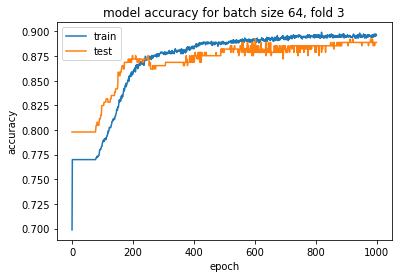

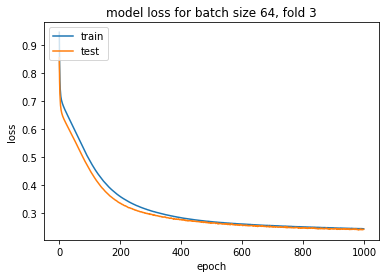

Epoch 1/1000
19/19 - 0s - loss: 1.0483 - accuracy: 0.3174 - val_loss: 0.9543 - val_accuracy: 0.6465
Epoch 2/1000
19/19 - 0s - loss: 0.8917 - accuracy: 0.7565 - val_loss: 0.8381 - val_accuracy: 0.7441
Epoch 3/1000
19/19 - 0s - loss: 0.7832 - accuracy: 0.7834 - val_loss: 0.7624 - val_accuracy: 0.7441
Epoch 4/1000
19/19 - 0s - loss: 0.7138 - accuracy: 0.7834 - val_loss: 0.7175 - val_accuracy: 0.7441
Epoch 5/1000
19/19 - 0s - loss: 0.6709 - accuracy: 0.7834 - val_loss: 0.6910 - val_accuracy: 0.7441
Epoch 6/1000
19/19 - 0s - loss: 0.6445 - accuracy: 0.7834 - val_loss: 0.6766 - val_accuracy: 0.7441
Epoch 7/1000
19/19 - 0s - loss: 0.6286 - accuracy: 0.7834 - val_loss: 0.6685 - val_accuracy: 0.7441
Epoch 8/1000
19/19 - 0s - loss: 0.6186 - accuracy: 0.7834 - val_loss: 0.6637 - val_accuracy: 0.7441
Epoch 9/1000
19/19 - 0s - loss: 0.6118 - accuracy: 0.7834 - val_loss: 0.6606 - val_accuracy: 0.7441
Epoch 10/1000
19/19 - 0s - loss: 0.6069 - accuracy: 0.7834 - val_loss: 0.6584 - val_accuracy: 0.7441

Epoch 83/1000
19/19 - 0s - loss: 0.4179 - accuracy: 0.8237 - val_loss: 0.4911 - val_accuracy: 0.7912
Epoch 84/1000
19/19 - 0s - loss: 0.4161 - accuracy: 0.8254 - val_loss: 0.4896 - val_accuracy: 0.7912
Epoch 85/1000
19/19 - 0s - loss: 0.4143 - accuracy: 0.8228 - val_loss: 0.4876 - val_accuracy: 0.7912
Epoch 86/1000
19/19 - 0s - loss: 0.4124 - accuracy: 0.8254 - val_loss: 0.4857 - val_accuracy: 0.7946
Epoch 87/1000
19/19 - 0s - loss: 0.4106 - accuracy: 0.8296 - val_loss: 0.4842 - val_accuracy: 0.7946
Epoch 88/1000
19/19 - 0s - loss: 0.4090 - accuracy: 0.8304 - val_loss: 0.4827 - val_accuracy: 0.7946
Epoch 89/1000
19/19 - 0s - loss: 0.4073 - accuracy: 0.8296 - val_loss: 0.4811 - val_accuracy: 0.7946
Epoch 90/1000
19/19 - 0s - loss: 0.4055 - accuracy: 0.8312 - val_loss: 0.4802 - val_accuracy: 0.7946
Epoch 91/1000
19/19 - 0s - loss: 0.4038 - accuracy: 0.8321 - val_loss: 0.4785 - val_accuracy: 0.7946
Epoch 92/1000
19/19 - 0s - loss: 0.4021 - accuracy: 0.8338 - val_loss: 0.4770 - val_accurac

Epoch 164/1000
19/19 - 0s - loss: 0.3293 - accuracy: 0.8690 - val_loss: 0.4155 - val_accuracy: 0.8384
Epoch 165/1000
19/19 - 0s - loss: 0.3288 - accuracy: 0.8699 - val_loss: 0.4153 - val_accuracy: 0.8384
Epoch 166/1000
19/19 - 0s - loss: 0.3283 - accuracy: 0.8682 - val_loss: 0.4154 - val_accuracy: 0.8384
Epoch 167/1000
19/19 - 0s - loss: 0.3278 - accuracy: 0.8699 - val_loss: 0.4143 - val_accuracy: 0.8384
Epoch 168/1000
19/19 - 0s - loss: 0.3270 - accuracy: 0.8690 - val_loss: 0.4138 - val_accuracy: 0.8384
Epoch 169/1000
19/19 - 0s - loss: 0.3266 - accuracy: 0.8690 - val_loss: 0.4137 - val_accuracy: 0.8384
Epoch 170/1000
19/19 - 0s - loss: 0.3259 - accuracy: 0.8699 - val_loss: 0.4129 - val_accuracy: 0.8384
Epoch 171/1000
19/19 - 0s - loss: 0.3255 - accuracy: 0.8707 - val_loss: 0.4131 - val_accuracy: 0.8384
Epoch 172/1000
19/19 - 0s - loss: 0.3248 - accuracy: 0.8707 - val_loss: 0.4115 - val_accuracy: 0.8384
Epoch 173/1000
19/19 - 0s - loss: 0.3245 - accuracy: 0.8707 - val_loss: 0.4111 - v

Epoch 245/1000
19/19 - 0s - loss: 0.2969 - accuracy: 0.8732 - val_loss: 0.3881 - val_accuracy: 0.8316
Epoch 246/1000
19/19 - 0s - loss: 0.2968 - accuracy: 0.8749 - val_loss: 0.3883 - val_accuracy: 0.8316
Epoch 247/1000
19/19 - 0s - loss: 0.2965 - accuracy: 0.8732 - val_loss: 0.3879 - val_accuracy: 0.8316
Epoch 248/1000
19/19 - 0s - loss: 0.2962 - accuracy: 0.8741 - val_loss: 0.3880 - val_accuracy: 0.8316
Epoch 249/1000
19/19 - 0s - loss: 0.2958 - accuracy: 0.8715 - val_loss: 0.3867 - val_accuracy: 0.8316
Epoch 250/1000
19/19 - 0s - loss: 0.2954 - accuracy: 0.8749 - val_loss: 0.3873 - val_accuracy: 0.8316
Epoch 251/1000
19/19 - 0s - loss: 0.2954 - accuracy: 0.8732 - val_loss: 0.3870 - val_accuracy: 0.8316
Epoch 252/1000
19/19 - 0s - loss: 0.2950 - accuracy: 0.8732 - val_loss: 0.3865 - val_accuracy: 0.8316
Epoch 253/1000
19/19 - 0s - loss: 0.2947 - accuracy: 0.8741 - val_loss: 0.3852 - val_accuracy: 0.8316
Epoch 254/1000
19/19 - 0s - loss: 0.2944 - accuracy: 0.8741 - val_loss: 0.3849 - v

Epoch 326/1000
19/19 - 0s - loss: 0.2782 - accuracy: 0.8783 - val_loss: 0.3714 - val_accuracy: 0.8316
Epoch 327/1000
19/19 - 0s - loss: 0.2780 - accuracy: 0.8749 - val_loss: 0.3707 - val_accuracy: 0.8316
Epoch 328/1000
19/19 - 0s - loss: 0.2779 - accuracy: 0.8766 - val_loss: 0.3705 - val_accuracy: 0.8316
Epoch 329/1000
19/19 - 0s - loss: 0.2777 - accuracy: 0.8766 - val_loss: 0.3708 - val_accuracy: 0.8316
Epoch 330/1000
19/19 - 0s - loss: 0.2775 - accuracy: 0.8783 - val_loss: 0.3709 - val_accuracy: 0.8316
Epoch 331/1000
19/19 - 0s - loss: 0.2772 - accuracy: 0.8766 - val_loss: 0.3700 - val_accuracy: 0.8316
Epoch 332/1000
19/19 - 0s - loss: 0.2770 - accuracy: 0.8774 - val_loss: 0.3692 - val_accuracy: 0.8316
Epoch 333/1000
19/19 - 0s - loss: 0.2768 - accuracy: 0.8808 - val_loss: 0.3695 - val_accuracy: 0.8316
Epoch 334/1000
19/19 - 0s - loss: 0.2766 - accuracy: 0.8766 - val_loss: 0.3683 - val_accuracy: 0.8316
Epoch 335/1000
19/19 - 0s - loss: 0.2765 - accuracy: 0.8791 - val_loss: 0.3691 - v

Epoch 407/1000
19/19 - 0s - loss: 0.2636 - accuracy: 0.8883 - val_loss: 0.3563 - val_accuracy: 0.8316
Epoch 408/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.8892 - val_loss: 0.3579 - val_accuracy: 0.8316
Epoch 409/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8875 - val_loss: 0.3578 - val_accuracy: 0.8316
Epoch 410/1000
19/19 - 0s - loss: 0.2632 - accuracy: 0.8875 - val_loss: 0.3572 - val_accuracy: 0.8316
Epoch 411/1000
19/19 - 0s - loss: 0.2629 - accuracy: 0.8883 - val_loss: 0.3566 - val_accuracy: 0.8316
Epoch 412/1000
19/19 - 0s - loss: 0.2630 - accuracy: 0.8883 - val_loss: 0.3560 - val_accuracy: 0.8316
Epoch 413/1000
19/19 - 0s - loss: 0.2630 - accuracy: 0.8892 - val_loss: 0.3558 - val_accuracy: 0.8316
Epoch 414/1000
19/19 - 0s - loss: 0.2626 - accuracy: 0.8892 - val_loss: 0.3564 - val_accuracy: 0.8316
Epoch 415/1000
19/19 - 0s - loss: 0.2625 - accuracy: 0.8866 - val_loss: 0.3554 - val_accuracy: 0.8316
Epoch 416/1000
19/19 - 0s - loss: 0.2623 - accuracy: 0.8883 - val_loss: 0.3553 - v

Epoch 488/1000
19/19 - 0s - loss: 0.2527 - accuracy: 0.8900 - val_loss: 0.3468 - val_accuracy: 0.8316
Epoch 489/1000
19/19 - 0s - loss: 0.2526 - accuracy: 0.8875 - val_loss: 0.3459 - val_accuracy: 0.8283
Epoch 490/1000
19/19 - 0s - loss: 0.2523 - accuracy: 0.8908 - val_loss: 0.3476 - val_accuracy: 0.8316
Epoch 491/1000
19/19 - 0s - loss: 0.2526 - accuracy: 0.8883 - val_loss: 0.3471 - val_accuracy: 0.8316
Epoch 492/1000
19/19 - 0s - loss: 0.2523 - accuracy: 0.8900 - val_loss: 0.3462 - val_accuracy: 0.8283
Epoch 493/1000
19/19 - 0s - loss: 0.2521 - accuracy: 0.8908 - val_loss: 0.3447 - val_accuracy: 0.8283
Epoch 494/1000
19/19 - 0s - loss: 0.2518 - accuracy: 0.8892 - val_loss: 0.3444 - val_accuracy: 0.8283
Epoch 495/1000
19/19 - 0s - loss: 0.2518 - accuracy: 0.8900 - val_loss: 0.3453 - val_accuracy: 0.8283
Epoch 496/1000
19/19 - 0s - loss: 0.2517 - accuracy: 0.8908 - val_loss: 0.3461 - val_accuracy: 0.8283
Epoch 497/1000
19/19 - 0s - loss: 0.2515 - accuracy: 0.8883 - val_loss: 0.3449 - v

Epoch 569/1000
19/19 - 0s - loss: 0.2444 - accuracy: 0.8976 - val_loss: 0.3368 - val_accuracy: 0.8350
Epoch 570/1000
19/19 - 0s - loss: 0.2440 - accuracy: 0.8976 - val_loss: 0.3375 - val_accuracy: 0.8316
Epoch 571/1000
19/19 - 0s - loss: 0.2440 - accuracy: 0.8942 - val_loss: 0.3370 - val_accuracy: 0.8350
Epoch 572/1000
19/19 - 0s - loss: 0.2439 - accuracy: 0.8992 - val_loss: 0.3377 - val_accuracy: 0.8316
Epoch 573/1000
19/19 - 0s - loss: 0.2438 - accuracy: 0.8984 - val_loss: 0.3376 - val_accuracy: 0.8350
Epoch 574/1000
19/19 - 0s - loss: 0.2436 - accuracy: 0.8984 - val_loss: 0.3391 - val_accuracy: 0.8384
Epoch 575/1000
19/19 - 0s - loss: 0.2437 - accuracy: 0.8967 - val_loss: 0.3382 - val_accuracy: 0.8350
Epoch 576/1000
19/19 - 0s - loss: 0.2434 - accuracy: 0.8959 - val_loss: 0.3388 - val_accuracy: 0.8350
Epoch 577/1000
19/19 - 0s - loss: 0.2435 - accuracy: 0.8967 - val_loss: 0.3387 - val_accuracy: 0.8350
Epoch 578/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8984 - val_loss: 0.3374 - v

Epoch 650/1000
19/19 - 0s - loss: 0.2375 - accuracy: 0.9043 - val_loss: 0.3325 - val_accuracy: 0.8384
Epoch 651/1000
19/19 - 0s - loss: 0.2375 - accuracy: 0.9060 - val_loss: 0.3318 - val_accuracy: 0.8384
Epoch 652/1000
19/19 - 0s - loss: 0.2374 - accuracy: 0.9051 - val_loss: 0.3342 - val_accuracy: 0.8384
Epoch 653/1000
19/19 - 0s - loss: 0.2373 - accuracy: 0.9051 - val_loss: 0.3346 - val_accuracy: 0.8384
Epoch 654/1000
19/19 - 0s - loss: 0.2373 - accuracy: 0.9043 - val_loss: 0.3324 - val_accuracy: 0.8384
Epoch 655/1000
19/19 - 0s - loss: 0.2369 - accuracy: 0.9051 - val_loss: 0.3301 - val_accuracy: 0.8384
Epoch 656/1000
19/19 - 0s - loss: 0.2371 - accuracy: 0.9060 - val_loss: 0.3308 - val_accuracy: 0.8384
Epoch 657/1000
19/19 - 0s - loss: 0.2370 - accuracy: 0.9076 - val_loss: 0.3306 - val_accuracy: 0.8384
Epoch 658/1000
19/19 - 0s - loss: 0.2369 - accuracy: 0.9068 - val_loss: 0.3319 - val_accuracy: 0.8384
Epoch 659/1000
19/19 - 0s - loss: 0.2368 - accuracy: 0.9076 - val_loss: 0.3325 - v

Epoch 731/1000
19/19 - 0s - loss: 0.2320 - accuracy: 0.9076 - val_loss: 0.3270 - val_accuracy: 0.8384
Epoch 732/1000
19/19 - 0s - loss: 0.2320 - accuracy: 0.9076 - val_loss: 0.3278 - val_accuracy: 0.8418
Epoch 733/1000
19/19 - 0s - loss: 0.2320 - accuracy: 0.9085 - val_loss: 0.3284 - val_accuracy: 0.8418
Epoch 734/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9060 - val_loss: 0.3290 - val_accuracy: 0.8418
Epoch 735/1000
19/19 - 0s - loss: 0.2320 - accuracy: 0.9068 - val_loss: 0.3292 - val_accuracy: 0.8418
Epoch 736/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9076 - val_loss: 0.3293 - val_accuracy: 0.8418
Epoch 737/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9068 - val_loss: 0.3283 - val_accuracy: 0.8418
Epoch 738/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9076 - val_loss: 0.3264 - val_accuracy: 0.8384
Epoch 739/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9085 - val_loss: 0.3279 - val_accuracy: 0.8418
Epoch 740/1000
19/19 - 0s - loss: 0.2314 - accuracy: 0.9060 - val_loss: 0.3282 - v

Epoch 812/1000
19/19 - 0s - loss: 0.2275 - accuracy: 0.9102 - val_loss: 0.3263 - val_accuracy: 0.8384
Epoch 813/1000
19/19 - 0s - loss: 0.2276 - accuracy: 0.9093 - val_loss: 0.3247 - val_accuracy: 0.8384
Epoch 814/1000
19/19 - 0s - loss: 0.2277 - accuracy: 0.9085 - val_loss: 0.3263 - val_accuracy: 0.8384
Epoch 815/1000
19/19 - 0s - loss: 0.2275 - accuracy: 0.9085 - val_loss: 0.3261 - val_accuracy: 0.8384
Epoch 816/1000
19/19 - 0s - loss: 0.2275 - accuracy: 0.9085 - val_loss: 0.3261 - val_accuracy: 0.8384
Epoch 817/1000
19/19 - 0s - loss: 0.2275 - accuracy: 0.9068 - val_loss: 0.3269 - val_accuracy: 0.8384
Epoch 818/1000
19/19 - 0s - loss: 0.2273 - accuracy: 0.9093 - val_loss: 0.3258 - val_accuracy: 0.8384
Epoch 819/1000
19/19 - 0s - loss: 0.2272 - accuracy: 0.9085 - val_loss: 0.3255 - val_accuracy: 0.8384
Epoch 820/1000
19/19 - 0s - loss: 0.2272 - accuracy: 0.9102 - val_loss: 0.3243 - val_accuracy: 0.8350
Epoch 821/1000
19/19 - 0s - loss: 0.2271 - accuracy: 0.9076 - val_loss: 0.3261 - v

Epoch 893/1000
19/19 - 0s - loss: 0.2237 - accuracy: 0.9093 - val_loss: 0.3246 - val_accuracy: 0.8350
Epoch 894/1000
19/19 - 0s - loss: 0.2237 - accuracy: 0.9110 - val_loss: 0.3222 - val_accuracy: 0.8316
Epoch 895/1000
19/19 - 0s - loss: 0.2237 - accuracy: 0.9093 - val_loss: 0.3231 - val_accuracy: 0.8350
Epoch 896/1000
19/19 - 0s - loss: 0.2236 - accuracy: 0.9093 - val_loss: 0.3229 - val_accuracy: 0.8350
Epoch 897/1000
19/19 - 0s - loss: 0.2236 - accuracy: 0.9110 - val_loss: 0.3221 - val_accuracy: 0.8316
Epoch 898/1000
19/19 - 0s - loss: 0.2235 - accuracy: 0.9118 - val_loss: 0.3228 - val_accuracy: 0.8350
Epoch 899/1000
19/19 - 0s - loss: 0.2236 - accuracy: 0.9110 - val_loss: 0.3221 - val_accuracy: 0.8316
Epoch 900/1000
19/19 - 0s - loss: 0.2233 - accuracy: 0.9085 - val_loss: 0.3228 - val_accuracy: 0.8350
Epoch 901/1000
19/19 - 0s - loss: 0.2234 - accuracy: 0.9102 - val_loss: 0.3229 - val_accuracy: 0.8350
Epoch 902/1000
19/19 - 0s - loss: 0.2235 - accuracy: 0.9118 - val_loss: 0.3221 - v

Epoch 974/1000
19/19 - 0s - loss: 0.2205 - accuracy: 0.9135 - val_loss: 0.3196 - val_accuracy: 0.8350
Epoch 975/1000
19/19 - 0s - loss: 0.2205 - accuracy: 0.9135 - val_loss: 0.3222 - val_accuracy: 0.8316
Epoch 976/1000
19/19 - 0s - loss: 0.2204 - accuracy: 0.9118 - val_loss: 0.3222 - val_accuracy: 0.8316
Epoch 977/1000
19/19 - 0s - loss: 0.2203 - accuracy: 0.9135 - val_loss: 0.3212 - val_accuracy: 0.8316
Epoch 978/1000
19/19 - 0s - loss: 0.2204 - accuracy: 0.9118 - val_loss: 0.3215 - val_accuracy: 0.8316
Epoch 979/1000
19/19 - 0s - loss: 0.2203 - accuracy: 0.9118 - val_loss: 0.3220 - val_accuracy: 0.8316
Epoch 980/1000
19/19 - 0s - loss: 0.2201 - accuracy: 0.9135 - val_loss: 0.3215 - val_accuracy: 0.8316
Epoch 981/1000
19/19 - 0s - loss: 0.2202 - accuracy: 0.9102 - val_loss: 0.3230 - val_accuracy: 0.8316
Epoch 982/1000
19/19 - 0s - loss: 0.2202 - accuracy: 0.9102 - val_loss: 0.3235 - val_accuracy: 0.8316
Epoch 983/1000
19/19 - 0s - loss: 0.2204 - accuracy: 0.9118 - val_loss: 0.3224 - v

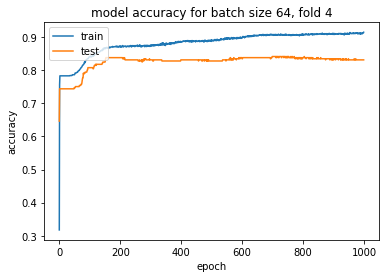

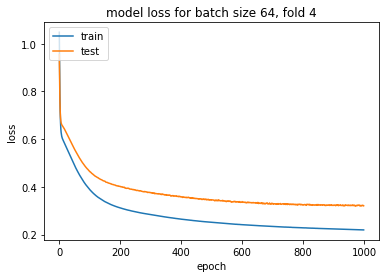

Epoch 1/1000
19/19 - 0s - loss: 0.9536 - accuracy: 0.7204 - val_loss: 0.8777 - val_accuracy: 0.7744
Epoch 2/1000
19/19 - 0s - loss: 0.8350 - accuracy: 0.7775 - val_loss: 0.7841 - val_accuracy: 0.7845
Epoch 3/1000
19/19 - 0s - loss: 0.7646 - accuracy: 0.7767 - val_loss: 0.7273 - val_accuracy: 0.7845
Epoch 4/1000
19/19 - 0s - loss: 0.7217 - accuracy: 0.7767 - val_loss: 0.6925 - val_accuracy: 0.7845
Epoch 5/1000
19/19 - 0s - loss: 0.6944 - accuracy: 0.7767 - val_loss: 0.6691 - val_accuracy: 0.7845
Epoch 6/1000
19/19 - 0s - loss: 0.6760 - accuracy: 0.7767 - val_loss: 0.6533 - val_accuracy: 0.7845
Epoch 7/1000
19/19 - 0s - loss: 0.6626 - accuracy: 0.7750 - val_loss: 0.6418 - val_accuracy: 0.7845
Epoch 8/1000
19/19 - 0s - loss: 0.6524 - accuracy: 0.7733 - val_loss: 0.6328 - val_accuracy: 0.7845
Epoch 9/1000
19/19 - 0s - loss: 0.6439 - accuracy: 0.7733 - val_loss: 0.6255 - val_accuracy: 0.7845
Epoch 10/1000
19/19 - 0s - loss: 0.6365 - accuracy: 0.7733 - val_loss: 0.6193 - val_accuracy: 0.7845

Epoch 81/1000
19/19 - 0s - loss: 0.4261 - accuracy: 0.8178 - val_loss: 0.4370 - val_accuracy: 0.8148
Epoch 82/1000
19/19 - 0s - loss: 0.4244 - accuracy: 0.8270 - val_loss: 0.4352 - val_accuracy: 0.8148
Epoch 83/1000
19/19 - 0s - loss: 0.4226 - accuracy: 0.8262 - val_loss: 0.4335 - val_accuracy: 0.8182
Epoch 84/1000
19/19 - 0s - loss: 0.4210 - accuracy: 0.8304 - val_loss: 0.4317 - val_accuracy: 0.8182
Epoch 85/1000
19/19 - 0s - loss: 0.4193 - accuracy: 0.8279 - val_loss: 0.4302 - val_accuracy: 0.8182
Epoch 86/1000
19/19 - 0s - loss: 0.4177 - accuracy: 0.8287 - val_loss: 0.4289 - val_accuracy: 0.8249
Epoch 87/1000
19/19 - 0s - loss: 0.4159 - accuracy: 0.8321 - val_loss: 0.4275 - val_accuracy: 0.8249
Epoch 88/1000
19/19 - 0s - loss: 0.4144 - accuracy: 0.8312 - val_loss: 0.4258 - val_accuracy: 0.8249
Epoch 89/1000
19/19 - 0s - loss: 0.4129 - accuracy: 0.8321 - val_loss: 0.4243 - val_accuracy: 0.8249
Epoch 90/1000
19/19 - 0s - loss: 0.4114 - accuracy: 0.8321 - val_loss: 0.4227 - val_accurac

Epoch 162/1000
19/19 - 0s - loss: 0.3393 - accuracy: 0.8732 - val_loss: 0.3534 - val_accuracy: 0.8552
Epoch 163/1000
19/19 - 0s - loss: 0.3387 - accuracy: 0.8707 - val_loss: 0.3531 - val_accuracy: 0.8552
Epoch 164/1000
19/19 - 0s - loss: 0.3379 - accuracy: 0.8749 - val_loss: 0.3523 - val_accuracy: 0.8552
Epoch 165/1000
19/19 - 0s - loss: 0.3376 - accuracy: 0.8715 - val_loss: 0.3516 - val_accuracy: 0.8552
Epoch 166/1000
19/19 - 0s - loss: 0.3369 - accuracy: 0.8732 - val_loss: 0.3506 - val_accuracy: 0.8552
Epoch 167/1000
19/19 - 0s - loss: 0.3362 - accuracy: 0.8707 - val_loss: 0.3504 - val_accuracy: 0.8586
Epoch 168/1000
19/19 - 0s - loss: 0.3360 - accuracy: 0.8724 - val_loss: 0.3495 - val_accuracy: 0.8586
Epoch 169/1000
19/19 - 0s - loss: 0.3350 - accuracy: 0.8724 - val_loss: 0.3493 - val_accuracy: 0.8586
Epoch 170/1000
19/19 - 0s - loss: 0.3344 - accuracy: 0.8741 - val_loss: 0.3485 - val_accuracy: 0.8586
Epoch 171/1000
19/19 - 0s - loss: 0.3338 - accuracy: 0.8715 - val_loss: 0.3476 - v

Epoch 243/1000
19/19 - 0s - loss: 0.3032 - accuracy: 0.8808 - val_loss: 0.3145 - val_accuracy: 0.8653
Epoch 244/1000
19/19 - 0s - loss: 0.3029 - accuracy: 0.8799 - val_loss: 0.3140 - val_accuracy: 0.8653
Epoch 245/1000
19/19 - 0s - loss: 0.3027 - accuracy: 0.8816 - val_loss: 0.3138 - val_accuracy: 0.8653
Epoch 246/1000
19/19 - 0s - loss: 0.3025 - accuracy: 0.8825 - val_loss: 0.3133 - val_accuracy: 0.8653
Epoch 247/1000
19/19 - 0s - loss: 0.3022 - accuracy: 0.8825 - val_loss: 0.3130 - val_accuracy: 0.8653
Epoch 248/1000
19/19 - 0s - loss: 0.3021 - accuracy: 0.8825 - val_loss: 0.3128 - val_accuracy: 0.8653
Epoch 249/1000
19/19 - 0s - loss: 0.3013 - accuracy: 0.8808 - val_loss: 0.3131 - val_accuracy: 0.8721
Epoch 250/1000
19/19 - 0s - loss: 0.3011 - accuracy: 0.8808 - val_loss: 0.3123 - val_accuracy: 0.8653
Epoch 251/1000
19/19 - 0s - loss: 0.3010 - accuracy: 0.8816 - val_loss: 0.3118 - val_accuracy: 0.8653
Epoch 252/1000
19/19 - 0s - loss: 0.3006 - accuracy: 0.8816 - val_loss: 0.3116 - v

Epoch 324/1000
19/19 - 0s - loss: 0.2841 - accuracy: 0.8850 - val_loss: 0.2929 - val_accuracy: 0.8889
Epoch 325/1000
19/19 - 0s - loss: 0.2841 - accuracy: 0.8850 - val_loss: 0.2925 - val_accuracy: 0.8923
Epoch 326/1000
19/19 - 0s - loss: 0.2838 - accuracy: 0.8850 - val_loss: 0.2918 - val_accuracy: 0.8822
Epoch 327/1000
19/19 - 0s - loss: 0.2837 - accuracy: 0.8833 - val_loss: 0.2918 - val_accuracy: 0.8889
Epoch 328/1000
19/19 - 0s - loss: 0.2836 - accuracy: 0.8858 - val_loss: 0.2919 - val_accuracy: 0.8923
Epoch 329/1000
19/19 - 0s - loss: 0.2832 - accuracy: 0.8875 - val_loss: 0.2916 - val_accuracy: 0.8923
Epoch 330/1000
19/19 - 0s - loss: 0.2830 - accuracy: 0.8841 - val_loss: 0.2914 - val_accuracy: 0.8889
Epoch 331/1000
19/19 - 0s - loss: 0.2831 - accuracy: 0.8883 - val_loss: 0.2911 - val_accuracy: 0.8889
Epoch 332/1000
19/19 - 0s - loss: 0.2829 - accuracy: 0.8858 - val_loss: 0.2910 - val_accuracy: 0.8923
Epoch 333/1000
19/19 - 0s - loss: 0.2828 - accuracy: 0.8825 - val_loss: 0.2911 - v

Epoch 405/1000
19/19 - 0s - loss: 0.2724 - accuracy: 0.8883 - val_loss: 0.2782 - val_accuracy: 0.8956
Epoch 406/1000
19/19 - 0s - loss: 0.2719 - accuracy: 0.8892 - val_loss: 0.2790 - val_accuracy: 0.8923
Epoch 407/1000
19/19 - 0s - loss: 0.2721 - accuracy: 0.8892 - val_loss: 0.2780 - val_accuracy: 0.8956
Epoch 408/1000
19/19 - 0s - loss: 0.2717 - accuracy: 0.8900 - val_loss: 0.2778 - val_accuracy: 0.8956
Epoch 409/1000
19/19 - 0s - loss: 0.2718 - accuracy: 0.8866 - val_loss: 0.2774 - val_accuracy: 0.8956
Epoch 410/1000
19/19 - 0s - loss: 0.2718 - accuracy: 0.8900 - val_loss: 0.2775 - val_accuracy: 0.8956
Epoch 411/1000
19/19 - 0s - loss: 0.2714 - accuracy: 0.8917 - val_loss: 0.2772 - val_accuracy: 0.8956
Epoch 412/1000
19/19 - 0s - loss: 0.2714 - accuracy: 0.8908 - val_loss: 0.2773 - val_accuracy: 0.8956
Epoch 413/1000
19/19 - 0s - loss: 0.2717 - accuracy: 0.8892 - val_loss: 0.2773 - val_accuracy: 0.8956
Epoch 414/1000
19/19 - 0s - loss: 0.2713 - accuracy: 0.8892 - val_loss: 0.2772 - v

Epoch 486/1000
19/19 - 0s - loss: 0.2640 - accuracy: 0.8892 - val_loss: 0.2685 - val_accuracy: 0.8956
Epoch 487/1000
19/19 - 0s - loss: 0.2642 - accuracy: 0.8892 - val_loss: 0.2687 - val_accuracy: 0.8956
Epoch 488/1000
19/19 - 0s - loss: 0.2643 - accuracy: 0.8883 - val_loss: 0.2684 - val_accuracy: 0.8956
Epoch 489/1000
19/19 - 0s - loss: 0.2640 - accuracy: 0.8908 - val_loss: 0.2677 - val_accuracy: 0.8990
Epoch 490/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8883 - val_loss: 0.2674 - val_accuracy: 0.9024
Epoch 491/1000
19/19 - 0s - loss: 0.2641 - accuracy: 0.8892 - val_loss: 0.2675 - val_accuracy: 0.8990
Epoch 492/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8900 - val_loss: 0.2679 - val_accuracy: 0.8956
Epoch 493/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8875 - val_loss: 0.2678 - val_accuracy: 0.8956
Epoch 494/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8883 - val_loss: 0.2685 - val_accuracy: 0.8923
Epoch 495/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.8875 - val_loss: 0.2674 - v

Epoch 567/1000
19/19 - 0s - loss: 0.2582 - accuracy: 0.8900 - val_loss: 0.2610 - val_accuracy: 0.9024
Epoch 568/1000
19/19 - 0s - loss: 0.2584 - accuracy: 0.8883 - val_loss: 0.2605 - val_accuracy: 0.9024
Epoch 569/1000
19/19 - 0s - loss: 0.2581 - accuracy: 0.8900 - val_loss: 0.2602 - val_accuracy: 0.9057
Epoch 570/1000
19/19 - 0s - loss: 0.2581 - accuracy: 0.8892 - val_loss: 0.2604 - val_accuracy: 0.9024
Epoch 571/1000
19/19 - 0s - loss: 0.2578 - accuracy: 0.8892 - val_loss: 0.2608 - val_accuracy: 0.9024
Epoch 572/1000
19/19 - 0s - loss: 0.2580 - accuracy: 0.8892 - val_loss: 0.2602 - val_accuracy: 0.9024
Epoch 573/1000
19/19 - 0s - loss: 0.2578 - accuracy: 0.8908 - val_loss: 0.2597 - val_accuracy: 0.9125
Epoch 574/1000
19/19 - 0s - loss: 0.2579 - accuracy: 0.8892 - val_loss: 0.2597 - val_accuracy: 0.9057
Epoch 575/1000
19/19 - 0s - loss: 0.2575 - accuracy: 0.8908 - val_loss: 0.2598 - val_accuracy: 0.9024
Epoch 576/1000
19/19 - 0s - loss: 0.2576 - accuracy: 0.8900 - val_loss: 0.2596 - v

Epoch 648/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8900 - val_loss: 0.2549 - val_accuracy: 0.9091
Epoch 649/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8900 - val_loss: 0.2545 - val_accuracy: 0.9125
Epoch 650/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8892 - val_loss: 0.2548 - val_accuracy: 0.9091
Epoch 651/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8917 - val_loss: 0.2553 - val_accuracy: 0.9091
Epoch 652/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8908 - val_loss: 0.2541 - val_accuracy: 0.9125
Epoch 653/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8900 - val_loss: 0.2540 - val_accuracy: 0.9158
Epoch 654/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8917 - val_loss: 0.2546 - val_accuracy: 0.9125
Epoch 655/1000
19/19 - 0s - loss: 0.2533 - accuracy: 0.8908 - val_loss: 0.2553 - val_accuracy: 0.9091
Epoch 656/1000
19/19 - 0s - loss: 0.2530 - accuracy: 0.8934 - val_loss: 0.2548 - val_accuracy: 0.9057
Epoch 657/1000
19/19 - 0s - loss: 0.2531 - accuracy: 0.8892 - val_loss: 0.2547 - v

Epoch 729/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8942 - val_loss: 0.2505 - val_accuracy: 0.9158
Epoch 730/1000
19/19 - 0s - loss: 0.2499 - accuracy: 0.8934 - val_loss: 0.2503 - val_accuracy: 0.9158
Epoch 731/1000
19/19 - 0s - loss: 0.2495 - accuracy: 0.8934 - val_loss: 0.2505 - val_accuracy: 0.9125
Epoch 732/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8934 - val_loss: 0.2501 - val_accuracy: 0.9158
Epoch 733/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8942 - val_loss: 0.2498 - val_accuracy: 0.9125
Epoch 734/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8942 - val_loss: 0.2500 - val_accuracy: 0.9158
Epoch 735/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8934 - val_loss: 0.2494 - val_accuracy: 0.9125
Epoch 736/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8917 - val_loss: 0.2495 - val_accuracy: 0.9125
Epoch 737/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8959 - val_loss: 0.2499 - val_accuracy: 0.9158
Epoch 738/1000
19/19 - 0s - loss: 0.2496 - accuracy: 0.8959 - val_loss: 0.2504 - v

Epoch 810/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8959 - val_loss: 0.2477 - val_accuracy: 0.9091
Epoch 811/1000
19/19 - 0s - loss: 0.2466 - accuracy: 0.8925 - val_loss: 0.2467 - val_accuracy: 0.9158
Epoch 812/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8934 - val_loss: 0.2459 - val_accuracy: 0.9125
Epoch 813/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8950 - val_loss: 0.2464 - val_accuracy: 0.9158
Epoch 814/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8942 - val_loss: 0.2460 - val_accuracy: 0.9158
Epoch 815/1000
19/19 - 0s - loss: 0.2459 - accuracy: 0.8942 - val_loss: 0.2461 - val_accuracy: 0.9158
Epoch 816/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.8934 - val_loss: 0.2462 - val_accuracy: 0.9158
Epoch 817/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.8959 - val_loss: 0.2457 - val_accuracy: 0.9125
Epoch 818/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8950 - val_loss: 0.2460 - val_accuracy: 0.9158
Epoch 819/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.8950 - val_loss: 0.2465 - v

Epoch 891/1000
19/19 - 0s - loss: 0.2436 - accuracy: 0.8950 - val_loss: 0.2435 - val_accuracy: 0.9192
Epoch 892/1000
19/19 - 0s - loss: 0.2435 - accuracy: 0.8950 - val_loss: 0.2432 - val_accuracy: 0.9192
Epoch 893/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8950 - val_loss: 0.2431 - val_accuracy: 0.9192
Epoch 894/1000
19/19 - 0s - loss: 0.2434 - accuracy: 0.8934 - val_loss: 0.2434 - val_accuracy: 0.9192
Epoch 895/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8934 - val_loss: 0.2432 - val_accuracy: 0.9192
Epoch 896/1000
19/19 - 0s - loss: 0.2434 - accuracy: 0.8942 - val_loss: 0.2430 - val_accuracy: 0.9192
Epoch 897/1000
19/19 - 0s - loss: 0.2434 - accuracy: 0.8950 - val_loss: 0.2436 - val_accuracy: 0.9192
Epoch 898/1000
19/19 - 0s - loss: 0.2434 - accuracy: 0.8934 - val_loss: 0.2442 - val_accuracy: 0.9125
Epoch 899/1000
19/19 - 0s - loss: 0.2436 - accuracy: 0.8925 - val_loss: 0.2434 - val_accuracy: 0.9192
Epoch 900/1000
19/19 - 0s - loss: 0.2432 - accuracy: 0.8934 - val_loss: 0.2431 - v

Epoch 972/1000
19/19 - 0s - loss: 0.2412 - accuracy: 0.8925 - val_loss: 0.2408 - val_accuracy: 0.9192
Epoch 973/1000
19/19 - 0s - loss: 0.2409 - accuracy: 0.8950 - val_loss: 0.2404 - val_accuracy: 0.9192
Epoch 974/1000
19/19 - 0s - loss: 0.2409 - accuracy: 0.8959 - val_loss: 0.2415 - val_accuracy: 0.9125
Epoch 975/1000
19/19 - 0s - loss: 0.2410 - accuracy: 0.8934 - val_loss: 0.2402 - val_accuracy: 0.9192
Epoch 976/1000
19/19 - 0s - loss: 0.2409 - accuracy: 0.8959 - val_loss: 0.2405 - val_accuracy: 0.9192
Epoch 977/1000
19/19 - 0s - loss: 0.2409 - accuracy: 0.8950 - val_loss: 0.2408 - val_accuracy: 0.9192
Epoch 978/1000
19/19 - 0s - loss: 0.2408 - accuracy: 0.8950 - val_loss: 0.2401 - val_accuracy: 0.9192
Epoch 979/1000
19/19 - 0s - loss: 0.2408 - accuracy: 0.8942 - val_loss: 0.2402 - val_accuracy: 0.9192
Epoch 980/1000
19/19 - 0s - loss: 0.2407 - accuracy: 0.8959 - val_loss: 0.2401 - val_accuracy: 0.9192
Epoch 981/1000
19/19 - 0s - loss: 0.2407 - accuracy: 0.8934 - val_loss: 0.2398 - v

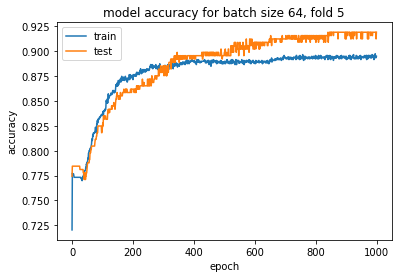

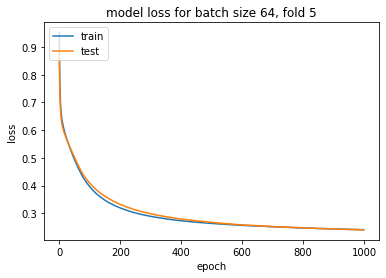

In [11]:
test_acc=[]
train_acc=[]
acc=[]
# i = batch size, for each batch size, go through the 5-fold validation
for i in [4,8,16,32,64]:
    for fold in range(no_folds):
        start, end = fold*nf, (fold+1)*nf
        x_test, y_test = trainX[start:end], trainY[start:end]
        x_train  = np.append(trainX[:start], trainX[end:], axis=0)
        y_train = np.append(trainY[:start], trainY[end:], axis=0) 

        model = keras.Sequential([
            keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(0.000001)),
            keras.layers.Dense(NUM_CLASSES, activation='softmax')])

        model.compile(optimizer='sgd', 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train,
                        epochs=epochs,
                        verbose=2,
                        use_multiprocessing=True,
                        batch_size = i,
                        callbacks = [tb,te],
                        validation_data=(x_test, y_test))

        test_acc.append(history.history['val_accuracy'][epochs-1])
        train_acc.append(history.history['accuracy'][epochs-1])

        info = np.array([min(history.history['val_loss']), 
                          max(history.history['val_accuracy']), 
                          sum(tb.times)/len(tb.times), 
                          sum(te.times)/len(te.times)])

        info = np.array(info)
        paras = np.concatenate((paras,[info]))


        print('fold %d test accuracy %g decay parameter %d'%(fold+1, test_acc[fold], i))
        
        acc.append(history.history['val_accuracy'])
    
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy for batch size %d, fold %d'%(i,fold+1))
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig("./%s/bs%d_f%d_accuracy.png"%(save_path,i,fold+1))
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss for batch size %d, fold %d'%(i,fold+1))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig("./%s/bs%d_f%d_loss.png"%(save_path,i,fold+1))
        plt.show()
    
    

In [14]:
print('* mean accuracy = %g *'% np.mean(test_acc))
print(paras)
print('time for a weight update: %g s'%np.average(tb.times))
print(len(tb.times))

* mean accuracy = 0.896027 *
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.28690490e-01 9.25925910e-01 3.74186834e-04 1.58518794e-01]
 [2.23969996e-01 9.32659924e-01 3.71560538e-04 1.56964306e-01]
 [1.71010599e-01 9.49494958e-01 3.66825159e-04 1.53294351e-01]
 [3.04055482e-01 8.78787875e-01 3.65110828e-04 1.53503039e-01]
 [1.78218648e-01 9.32659924e-01 3.63806634e-04 1.53354678e-01]
 [2.02113673e-01 9.22558904e-01 3.64323944e-04 8.48115344e-02]
 [2.34653562e-01 9.22558904e-01 3.64504371e-04 8.43224981e-02]
 [1.75161615e-01 9.42760944e-01 3.64895124e-04 8.45265205e-02]
 [3.12465131e-01 8.85521889e-01 3.65185091e-04 8.47232974e-02]
 [2.12150499e-01 9.19191897e-01 3.66001686e-04 8.58346393e-02]
 [2.24796355e-01 9.25925910e-01 3.66726667e-04 5.01028628e-02]
 [2.47781262e-01 9.12457883e-01 3.67558984e-04 5.04054847e-02]
 [2.03600824e-01 9.22558904e-01 3.68380484e-04 5.05891130e-02]
 [3.22153419e-01 8.65319848e-01 3.69108978e-04 5.02083542e-02]
 [2.18168437e-01 9.1919189

In [12]:
paras_del = np.delete(paras,0,0)
entropy, accuracy, time_batch, time_epoch = paras_del[:,0], paras_del[:,1], paras_del[:, 2], paras_del[:, 3]

In [ ]:
print(entropy)
print(time_batch)
print(len(time_batch))
print(range(len(batch_sizes)))

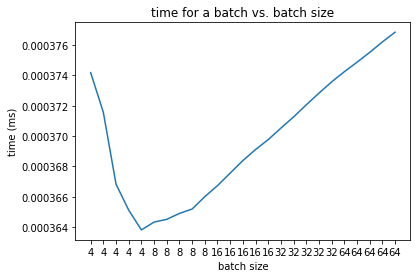

In [31]:
plt.figure(3)
plt.plot(range(len(batch_sizes)), time_batch)
plt.xticks(range(len(batch_sizes)), batch_sizes)
plt.xlabel('batch size')
plt.ylabel('time (ms)')
plt.savefig("./%s/time_batch_VS_bs.png"%(save_path))
plt.title('time for a batch vs. batch size')
plt.savefig("./%s/time_batch_VS_bs.png"%(save_path))

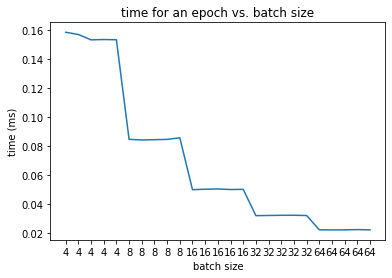

In [30]:
plt.figure(1)
plt.plot(range(len(batch_sizes)), time_epoch)
plt.xticks(range(len(batch_sizes)), batch_sizes)
plt.xlabel('batch size')
plt.ylabel('time (ms)')
plt.title('time for an epoch vs. batch size')
plt.savefig("./%s/1_e_vs_bs.png"%(save_path))

[0.15329435086250306, 0.08432249808311462, 0.05010286283493042, 0.03221332788467407, 0.022387535333633423]


Text(0.5, 1.0, 'minimun time for an epoch vs. batch size')

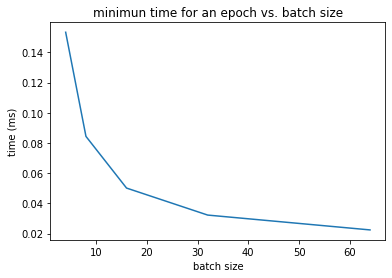

In [23]:

b4_min=np.min(time_epoch[:5])
b8_min=np.min(time_epoch[5:10])
b16_min=np.min(time_epoch[10:15])
b32_min=np.min(time_epoch[15:20])
b64_min=np.min(time_epoch[20:25])
min_time_e =[b4_min,b8_min,b16_min,b32_min,b64_min]

print(min_time_e)

plt.figure(1)
plt.plot(([4,8,16,32,64]), min_time_e)
# plt.xticks(([4,8,16,32,64]))
plt.xlabel('batch size')
plt.ylabel('time (ms)')
plt.title('minimun time for an epoch vs. batch size')

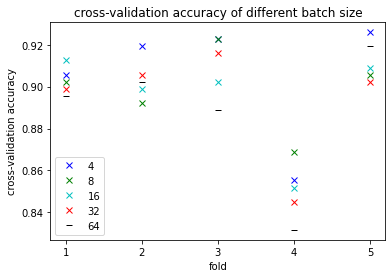

In [32]:
plt.figure(1)
# plt.plot([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5], acc, marker = 'x', linestyle = 'None')
plt.plot([1, 2, 3, 4, 5], test_acc[:5], label="4", marker = 'x', linestyle = 'None',color="b", )
plt.plot([1, 2, 3, 4, 5], test_acc[5:10], label="8", marker = 'x', linestyle = 'None',color="g")
plt.plot([1, 2, 3, 4, 5], test_acc[10:15], label="16", marker = 'x', linestyle = 'None',color="c")
plt.plot([1, 2, 3, 4, 5], test_acc[15:20], label="32", marker = 'x', linestyle = 'None',color="r")
plt.plot([1, 2, 3, 4, 5], test_acc[20:25], label="64",marker = '_', linestyle = 'None',color="k")
plt.xticks([1, 2, 3, 4, 5])
plt.legend(loc='lower left')
plt.xlabel('fold')
plt.ylabel('cross-validation accuracy')
plt.title("cross-validation accuracy of different batch size")
plt.savefig("./%s/cv_a_VS_fold.png"%(save_path))
plt.show()

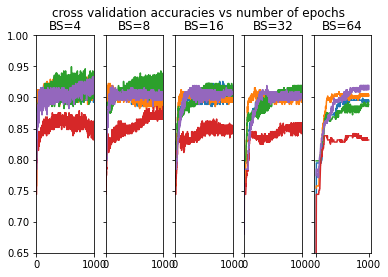

In [33]:
# cross validation accuracies against the number of epochs

fig, axs = plt.subplots(1,5, sharey=True)
fig.suptitle('cross validation accuracies vs number of epochs')
fig.savefig("./%s/cross_vali_against_epochs.png"%(save_path))
axs[0].axis([0, 1000, 0.65, 1.0])
axs[1].axis([0, 1000, 0.65, 1.0])
axs[2].axis([0, 1000, 0.65, 1.0])
axs[3].axis([0, 1000, 0.65, 1.0])

axs[0].set_title("BS=4")
axs[0].plot(acc[0])
axs[0].plot(acc[1])
axs[0].plot(acc[2])
axs[0].plot(acc[3])
axs[0].plot(acc[4])

axs[1].set_title("BS=8")
axs[1].plot(acc[5])
axs[1].plot(acc[6])
axs[1].plot(acc[7])
axs[1].plot(acc[8])
axs[1].plot(acc[9])

axs[2].set_title("BS=16")
axs[2].plot(acc[10])
axs[2].plot(acc[11])
axs[2].plot(acc[12])
axs[2].plot(acc[13])
axs[2].plot(acc[14])

axs[3].set_title("BS=32")
axs[3].plot(acc[15])
axs[3].plot(acc[16])
axs[3].plot(acc[17])
axs[3].plot(acc[18])
axs[3].plot(acc[19])

axs[4].set_title("BS=64")
axs[4].plot(acc[20])
axs[4].plot(acc[21])
axs[4].plot(acc[22])
axs[4].plot(acc[23])
axs[4].plot(acc[24])


In [ ]:
testX = trainX[-638:]
testY = trainY[-638:]

In [ ]:
model = load_model('modela2.h5')
model.summary()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

[0.8787878751754761, 0.8855218887329102, 0.8653198480606079, 0.8585858345031738, 0.8417508602142334]


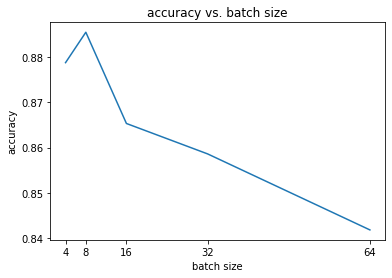

In [24]:
b4_min_acc=np.min(accuracy[:5])
b8_min_acc=np.min(accuracy[5:10])
b16_min_acc=np.min(accuracy[10:15])
b32_min_acc=np.min(accuracy[15:20])
b64_min_acc=np.min(accuracy[20:25])
min_acc =[b4_min_acc,b8_min_acc,b16_min_acc,b32_min_acc,b64_min_acc]

print(min_acc)

plt.plot([4,8,16,32,64], min_acc)
plt.xticks([4,8,16,32,64], [4,8,16,32,64])
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.title('accuracy vs. batch size')
plt.savefig("./%s/min_cv_accuracy_vs_batch_size.png"%(save_path))

[0.9239057183265686, 0.9185185074806214, 0.9090908885002136, 0.9037036895751953, 0.8922559022903442]


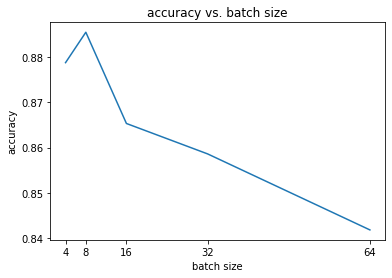

In [25]:
b4_mean_acc=np.mean(accuracy[:5])
b8_mean_acc=np.mean(accuracy[5:10])
b16_mean_acc=np.mean(accuracy[10:15])
b32_mean_acc=np.mean(accuracy[15:20])
b64_mean_acc=np.mean(accuracy[20:25])
mean_acc =[b4_mean_acc,b8_mean_acc,b16_mean_acc,b32_mean_acc,b64_mean_acc]

print(mean_acc)

plt.plot([4,8,16,32,64], min_acc)
plt.xticks([4,8,16,32,64], [4,8,16,32,64])
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.title('accuracy vs. batch size')
plt.savefig("./%s/mean_cv_accuracy_vs_batch_size.png"%(save_path))